# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done 
    print(dones)# see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]


When finished, you can close the environment.

In [6]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

deque([array([1.18999997])], maxlen=100)
Episode 1	Average Score: 1.19deque([array([1.18999997]), array([0.16])], maxlen=100)
Episode 2	Average Score: 0.67deque([array([1.18999997]), array([0.16]), array([0.53999999])], maxlen=100)
Episode 3	Average Score: 0.63deque([array([1.18999997]), array([0.16]), array([0.53999999]), array([0.25999999])], maxlen=100)
Episode 4	Average Score: 0.54deque([array([1.18999997]), array([0.16]), array([0.53999999]), array([0.25999999]), array([0.16])], maxlen=100)
Episode 5	Average Score: 0.46deque([array([1.18999997]), array([0.16]), array([0.53999999]), array([0.25999999]), array([0.16]), array([0.])], maxlen=100)
Episode 6	Average Score: 0.38deque([array([1.18999997]), array([0.16]), array([0.53999999]), array([0.25999999]), array([0.16]), array([0.]), array([0.21])], maxlen=100)
Episode 7	Average Score: 0.36deque([array([1.18999997]), array([0.16]), array([0.53999999]), array([0.25999999]), array([0.16]), array([0.]), array([0.21]), array([0.19])], m

Episode 28	Average Score: 0.53deque([array([1.18999997]), array([0.16]), array([0.53999999]), array([0.25999999]), array([0.16]), array([0.]), array([0.21]), array([0.19]), array([0.90999998]), array([0.88999998]), array([1.09999998]), array([0.]), array([0.22]), array([0.25999999]), array([0.51999999]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.18]), array([1.32999997]), array([0.09]), array([1.80999996]), array([0.44999999]), array([2.04999995]), array([1.28999997]), array([0.90999998]), array([1.76999996])], maxlen=100)
Episode 29	Average Score: 0.57deque([array([1.18999997]), array([0.16]), array([0.53999999]), array([0.25999999]), array([0.16]), array([0.]), array([0.21]), array([0.19]), array([0.90999998]), array([0.88999998]), array([1.09999998]), array([0.]), array([0.22]), array([0.25999999]), array([0.51999999]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.18]), array([1.32999997]), array([0.09]), array([1.80999996

Episode 41	Average Score: 0.89deque([array([1.18999997]), array([0.16]), array([0.53999999]), array([0.25999999]), array([0.16]), array([0.]), array([0.21]), array([0.19]), array([0.90999998]), array([0.88999998]), array([1.09999998]), array([0.]), array([0.22]), array([0.25999999]), array([0.51999999]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.18]), array([1.32999997]), array([0.09]), array([1.80999996]), array([0.44999999]), array([2.04999995]), array([1.28999997]), array([0.90999998]), array([1.76999996]), array([1.46999997]), array([1.12999997]), array([2.55999994]), array([1.80999996]), array([1.26999997]), array([2.33999995]), array([0.92999998]), array([2.18999995]), array([0.44999999]), array([2.58999994]), array([1.61999996]), array([1.60999996]), array([2.08999995])], maxlen=100)
Episode 42	Average Score: 0.92deque([array([1.18999997]), array([0.16]), array([0.53999999]), array([0.25999999]), array([0.16]), array([0.]), array([0.21]), array([0

Episode 50	Average Score: 0.99deque([array([1.18999997]), array([0.16]), array([0.53999999]), array([0.25999999]), array([0.16]), array([0.]), array([0.21]), array([0.19]), array([0.90999998]), array([0.88999998]), array([1.09999998]), array([0.]), array([0.22]), array([0.25999999]), array([0.51999999]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.18]), array([1.32999997]), array([0.09]), array([1.80999996]), array([0.44999999]), array([2.04999995]), array([1.28999997]), array([0.90999998]), array([1.76999996]), array([1.46999997]), array([1.12999997]), array([2.55999994]), array([1.80999996]), array([1.26999997]), array([2.33999995]), array([0.92999998]), array([2.18999995]), array([0.44999999]), array([2.58999994]), array([1.61999996]), array([1.60999996]), array([2.08999995]), array([0.65999999]), array([0.81999998]), array([2.06999995]), array([0.88999998]), array([1.58999996]), array([1.45999997]), array([1.59999996]), array([1.77999996]), array([1.14

Episode 58	Average Score: 1.03deque([array([1.18999997]), array([0.16]), array([0.53999999]), array([0.25999999]), array([0.16]), array([0.]), array([0.21]), array([0.19]), array([0.90999998]), array([0.88999998]), array([1.09999998]), array([0.]), array([0.22]), array([0.25999999]), array([0.51999999]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.18]), array([1.32999997]), array([0.09]), array([1.80999996]), array([0.44999999]), array([2.04999995]), array([1.28999997]), array([0.90999998]), array([1.76999996]), array([1.46999997]), array([1.12999997]), array([2.55999994]), array([1.80999996]), array([1.26999997]), array([2.33999995]), array([0.92999998]), array([2.18999995]), array([0.44999999]), array([2.58999994]), array([1.61999996]), array([1.60999996]), array([2.08999995]), array([0.65999999]), array([0.81999998]), array([2.06999995]), array([0.88999998]), array([1.58999996]), array([1.45999997]), array([1.59999996]), array([1.77999996]), array([1.14

Episode 65	Average Score: 1.04deque([array([1.18999997]), array([0.16]), array([0.53999999]), array([0.25999999]), array([0.16]), array([0.]), array([0.21]), array([0.19]), array([0.90999998]), array([0.88999998]), array([1.09999998]), array([0.]), array([0.22]), array([0.25999999]), array([0.51999999]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.18]), array([1.32999997]), array([0.09]), array([1.80999996]), array([0.44999999]), array([2.04999995]), array([1.28999997]), array([0.90999998]), array([1.76999996]), array([1.46999997]), array([1.12999997]), array([2.55999994]), array([1.80999996]), array([1.26999997]), array([2.33999995]), array([0.92999998]), array([2.18999995]), array([0.44999999]), array([2.58999994]), array([1.61999996]), array([1.60999996]), array([2.08999995]), array([0.65999999]), array([0.81999998]), array([2.06999995]), array([0.88999998]), array([1.58999996]), array([1.45999997]), array([1.59999996]), array([1.77999996]), array([1.14

Episode 71	Average Score: 1.12deque([array([1.18999997]), array([0.16]), array([0.53999999]), array([0.25999999]), array([0.16]), array([0.]), array([0.21]), array([0.19]), array([0.90999998]), array([0.88999998]), array([1.09999998]), array([0.]), array([0.22]), array([0.25999999]), array([0.51999999]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.18]), array([1.32999997]), array([0.09]), array([1.80999996]), array([0.44999999]), array([2.04999995]), array([1.28999997]), array([0.90999998]), array([1.76999996]), array([1.46999997]), array([1.12999997]), array([2.55999994]), array([1.80999996]), array([1.26999997]), array([2.33999995]), array([0.92999998]), array([2.18999995]), array([0.44999999]), array([2.58999994]), array([1.61999996]), array([1.60999996]), array([2.08999995]), array([0.65999999]), array([0.81999998]), array([2.06999995]), array([0.88999998]), array([1.58999996]), array([1.45999997]), array([1.59999996]), array([1.77999996]), array([1.14

Episode 77	Average Score: 1.19deque([array([1.18999997]), array([0.16]), array([0.53999999]), array([0.25999999]), array([0.16]), array([0.]), array([0.21]), array([0.19]), array([0.90999998]), array([0.88999998]), array([1.09999998]), array([0.]), array([0.22]), array([0.25999999]), array([0.51999999]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.18]), array([1.32999997]), array([0.09]), array([1.80999996]), array([0.44999999]), array([2.04999995]), array([1.28999997]), array([0.90999998]), array([1.76999996]), array([1.46999997]), array([1.12999997]), array([2.55999994]), array([1.80999996]), array([1.26999997]), array([2.33999995]), array([0.92999998]), array([2.18999995]), array([0.44999999]), array([2.58999994]), array([1.61999996]), array([1.60999996]), array([2.08999995]), array([0.65999999]), array([0.81999998]), array([2.06999995]), array([0.88999998]), array([1.58999996]), array([1.45999997]), array([1.59999996]), array([1.77999996]), array([1.14

Episode 83	Average Score: 1.22deque([array([1.18999997]), array([0.16]), array([0.53999999]), array([0.25999999]), array([0.16]), array([0.]), array([0.21]), array([0.19]), array([0.90999998]), array([0.88999998]), array([1.09999998]), array([0.]), array([0.22]), array([0.25999999]), array([0.51999999]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.18]), array([1.32999997]), array([0.09]), array([1.80999996]), array([0.44999999]), array([2.04999995]), array([1.28999997]), array([0.90999998]), array([1.76999996]), array([1.46999997]), array([1.12999997]), array([2.55999994]), array([1.80999996]), array([1.26999997]), array([2.33999995]), array([0.92999998]), array([2.18999995]), array([0.44999999]), array([2.58999994]), array([1.61999996]), array([1.60999996]), array([2.08999995]), array([0.65999999]), array([0.81999998]), array([2.06999995]), array([0.88999998]), array([1.58999996]), array([1.45999997]), array([1.59999996]), array([1.77999996]), array([1.14

Episode 88	Average Score: 1.24deque([array([1.18999997]), array([0.16]), array([0.53999999]), array([0.25999999]), array([0.16]), array([0.]), array([0.21]), array([0.19]), array([0.90999998]), array([0.88999998]), array([1.09999998]), array([0.]), array([0.22]), array([0.25999999]), array([0.51999999]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.18]), array([1.32999997]), array([0.09]), array([1.80999996]), array([0.44999999]), array([2.04999995]), array([1.28999997]), array([0.90999998]), array([1.76999996]), array([1.46999997]), array([1.12999997]), array([2.55999994]), array([1.80999996]), array([1.26999997]), array([2.33999995]), array([0.92999998]), array([2.18999995]), array([0.44999999]), array([2.58999994]), array([1.61999996]), array([1.60999996]), array([2.08999995]), array([0.65999999]), array([0.81999998]), array([2.06999995]), array([0.88999998]), array([1.58999996]), array([1.45999997]), array([1.59999996]), array([1.77999996]), array([1.14

Episode 93	Average Score: 1.25deque([array([1.18999997]), array([0.16]), array([0.53999999]), array([0.25999999]), array([0.16]), array([0.]), array([0.21]), array([0.19]), array([0.90999998]), array([0.88999998]), array([1.09999998]), array([0.]), array([0.22]), array([0.25999999]), array([0.51999999]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.18]), array([1.32999997]), array([0.09]), array([1.80999996]), array([0.44999999]), array([2.04999995]), array([1.28999997]), array([0.90999998]), array([1.76999996]), array([1.46999997]), array([1.12999997]), array([2.55999994]), array([1.80999996]), array([1.26999997]), array([2.33999995]), array([0.92999998]), array([2.18999995]), array([0.44999999]), array([2.58999994]), array([1.61999996]), array([1.60999996]), array([2.08999995]), array([0.65999999]), array([0.81999998]), array([2.06999995]), array([0.88999998]), array([1.58999996]), array([1.45999997]), array([1.59999996]), array([1.77999996]), array([1.14

Episode 98	Average Score: 1.28deque([array([1.18999997]), array([0.16]), array([0.53999999]), array([0.25999999]), array([0.16]), array([0.]), array([0.21]), array([0.19]), array([0.90999998]), array([0.88999998]), array([1.09999998]), array([0.]), array([0.22]), array([0.25999999]), array([0.51999999]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.18]), array([1.32999997]), array([0.09]), array([1.80999996]), array([0.44999999]), array([2.04999995]), array([1.28999997]), array([0.90999998]), array([1.76999996]), array([1.46999997]), array([1.12999997]), array([2.55999994]), array([1.80999996]), array([1.26999997]), array([2.33999995]), array([0.92999998]), array([2.18999995]), array([0.44999999]), array([2.58999994]), array([1.61999996]), array([1.60999996]), array([2.08999995]), array([0.65999999]), array([0.81999998]), array([2.06999995]), array([0.88999998]), array([1.58999996]), array([1.45999997]), array([1.59999996]), array([1.77999996]), array([1.14

Episode 102	Average Score: 1.33deque([array([0.25999999]), array([0.16]), array([0.]), array([0.21]), array([0.19]), array([0.90999998]), array([0.88999998]), array([1.09999998]), array([0.]), array([0.22]), array([0.25999999]), array([0.51999999]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.18]), array([1.32999997]), array([0.09]), array([1.80999996]), array([0.44999999]), array([2.04999995]), array([1.28999997]), array([0.90999998]), array([1.76999996]), array([1.46999997]), array([1.12999997]), array([2.55999994]), array([1.80999996]), array([1.26999997]), array([2.33999995]), array([0.92999998]), array([2.18999995]), array([0.44999999]), array([2.58999994]), array([1.61999996]), array([1.60999996]), array([2.08999995]), array([0.65999999]), array([0.81999998]), array([2.06999995]), array([0.88999998]), array([1.58999996]), array([1.45999997]), array([1.59999996]), array([1.77999996]), array([1.14999997]), array([0.37999999]), array([1.86999996]), arra

Episode 106	Average Score: 1.39deque([array([0.19]), array([0.90999998]), array([0.88999998]), array([1.09999998]), array([0.]), array([0.22]), array([0.25999999]), array([0.51999999]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.18]), array([1.32999997]), array([0.09]), array([1.80999996]), array([0.44999999]), array([2.04999995]), array([1.28999997]), array([0.90999998]), array([1.76999996]), array([1.46999997]), array([1.12999997]), array([2.55999994]), array([1.80999996]), array([1.26999997]), array([2.33999995]), array([0.92999998]), array([2.18999995]), array([0.44999999]), array([2.58999994]), array([1.61999996]), array([1.60999996]), array([2.08999995]), array([0.65999999]), array([0.81999998]), array([2.06999995]), array([0.88999998]), array([1.58999996]), array([1.45999997]), array([1.59999996]), array([1.77999996]), array([1.14999997]), array([0.37999999]), array([1.86999996]), array([1.44999997]), array([1.93999996]), array([1.25999997]), array

Episode 110	Average Score: 1.44deque([array([0.]), array([0.22]), array([0.25999999]), array([0.51999999]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.18]), array([1.32999997]), array([0.09]), array([1.80999996]), array([0.44999999]), array([2.04999995]), array([1.28999997]), array([0.90999998]), array([1.76999996]), array([1.46999997]), array([1.12999997]), array([2.55999994]), array([1.80999996]), array([1.26999997]), array([2.33999995]), array([0.92999998]), array([2.18999995]), array([0.44999999]), array([2.58999994]), array([1.61999996]), array([1.60999996]), array([2.08999995]), array([0.65999999]), array([0.81999998]), array([2.06999995]), array([0.88999998]), array([1.58999996]), array([1.45999997]), array([1.59999996]), array([1.77999996]), array([1.14999997]), array([0.37999999]), array([1.86999996]), array([1.44999997]), array([1.93999996]), array([1.25999997]), array([1.44999997]), array([0.72999998]), array([0.47999999]), array([1.15999997]),

Episode 114	Average Score: 1.52deque([array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.18]), array([1.32999997]), array([0.09]), array([1.80999996]), array([0.44999999]), array([2.04999995]), array([1.28999997]), array([0.90999998]), array([1.76999996]), array([1.46999997]), array([1.12999997]), array([2.55999994]), array([1.80999996]), array([1.26999997]), array([2.33999995]), array([0.92999998]), array([2.18999995]), array([0.44999999]), array([2.58999994]), array([1.61999996]), array([1.60999996]), array([2.08999995]), array([0.65999999]), array([0.81999998]), array([2.06999995]), array([0.88999998]), array([1.58999996]), array([1.45999997]), array([1.59999996]), array([1.77999996]), array([1.14999997]), array([0.37999999]), array([1.86999996]), array([1.44999997]), array([1.93999996]), array([1.25999997]), array([1.44999997]), array([0.72999998]), array([0.47999999]), array([1.15999997]), array([1.25999997]), array([2.19999995]), array([1.35999997]), array(

Episode 118	Average Score: 1.59deque([array([0.]), array([0.18]), array([1.32999997]), array([0.09]), array([1.80999996]), array([0.44999999]), array([2.04999995]), array([1.28999997]), array([0.90999998]), array([1.76999996]), array([1.46999997]), array([1.12999997]), array([2.55999994]), array([1.80999996]), array([1.26999997]), array([2.33999995]), array([0.92999998]), array([2.18999995]), array([0.44999999]), array([2.58999994]), array([1.61999996]), array([1.60999996]), array([2.08999995]), array([0.65999999]), array([0.81999998]), array([2.06999995]), array([0.88999998]), array([1.58999996]), array([1.45999997]), array([1.59999996]), array([1.77999996]), array([1.14999997]), array([0.37999999]), array([1.86999996]), array([1.44999997]), array([1.93999996]), array([1.25999997]), array([1.44999997]), array([0.72999998]), array([0.47999999]), array([1.15999997]), array([1.25999997]), array([2.19999995]), array([1.35999997]), array([0.83999998]), array([0.89999998]), array([0.6599999

Episode 122	Average Score: 1.62deque([array([1.80999996]), array([0.44999999]), array([2.04999995]), array([1.28999997]), array([0.90999998]), array([1.76999996]), array([1.46999997]), array([1.12999997]), array([2.55999994]), array([1.80999996]), array([1.26999997]), array([2.33999995]), array([0.92999998]), array([2.18999995]), array([0.44999999]), array([2.58999994]), array([1.61999996]), array([1.60999996]), array([2.08999995]), array([0.65999999]), array([0.81999998]), array([2.06999995]), array([0.88999998]), array([1.58999996]), array([1.45999997]), array([1.59999996]), array([1.77999996]), array([1.14999997]), array([0.37999999]), array([1.86999996]), array([1.44999997]), array([1.93999996]), array([1.25999997]), array([1.44999997]), array([0.72999998]), array([0.47999999]), array([1.15999997]), array([1.25999997]), array([2.19999995]), array([1.35999997]), array([0.83999998]), array([0.89999998]), array([0.65999999]), array([1.69999996]), array([1.72999996]), array([2.85999994

Episode 126	Average Score: 1.62deque([array([0.90999998]), array([1.76999996]), array([1.46999997]), array([1.12999997]), array([2.55999994]), array([1.80999996]), array([1.26999997]), array([2.33999995]), array([0.92999998]), array([2.18999995]), array([0.44999999]), array([2.58999994]), array([1.61999996]), array([1.60999996]), array([2.08999995]), array([0.65999999]), array([0.81999998]), array([2.06999995]), array([0.88999998]), array([1.58999996]), array([1.45999997]), array([1.59999996]), array([1.77999996]), array([1.14999997]), array([0.37999999]), array([1.86999996]), array([1.44999997]), array([1.93999996]), array([1.25999997]), array([1.44999997]), array([0.72999998]), array([0.47999999]), array([1.15999997]), array([1.25999997]), array([2.19999995]), array([1.35999997]), array([0.83999998]), array([0.89999998]), array([0.65999999]), array([1.69999996]), array([1.72999996]), array([2.85999994]), array([2.36999995]), array([2.63999994]), array([1.80999996]), array([2.59999994

Episode 130	Average Score: 1.66deque([array([2.55999994]), array([1.80999996]), array([1.26999997]), array([2.33999995]), array([0.92999998]), array([2.18999995]), array([0.44999999]), array([2.58999994]), array([1.61999996]), array([1.60999996]), array([2.08999995]), array([0.65999999]), array([0.81999998]), array([2.06999995]), array([0.88999998]), array([1.58999996]), array([1.45999997]), array([1.59999996]), array([1.77999996]), array([1.14999997]), array([0.37999999]), array([1.86999996]), array([1.44999997]), array([1.93999996]), array([1.25999997]), array([1.44999997]), array([0.72999998]), array([0.47999999]), array([1.15999997]), array([1.25999997]), array([2.19999995]), array([1.35999997]), array([0.83999998]), array([0.89999998]), array([0.65999999]), array([1.69999996]), array([1.72999996]), array([2.85999994]), array([2.36999995]), array([2.63999994]), array([1.80999996]), array([2.59999994]), array([1.58999996]), array([2.23999995]), array([1.20999997]), array([2.15999995

Episode 134	Average Score: 1.68deque([array([0.92999998]), array([2.18999995]), array([0.44999999]), array([2.58999994]), array([1.61999996]), array([1.60999996]), array([2.08999995]), array([0.65999999]), array([0.81999998]), array([2.06999995]), array([0.88999998]), array([1.58999996]), array([1.45999997]), array([1.59999996]), array([1.77999996]), array([1.14999997]), array([0.37999999]), array([1.86999996]), array([1.44999997]), array([1.93999996]), array([1.25999997]), array([1.44999997]), array([0.72999998]), array([0.47999999]), array([1.15999997]), array([1.25999997]), array([2.19999995]), array([1.35999997]), array([0.83999998]), array([0.89999998]), array([0.65999999]), array([1.69999996]), array([1.72999996]), array([2.85999994]), array([2.36999995]), array([2.63999994]), array([1.80999996]), array([2.59999994]), array([1.58999996]), array([2.23999995]), array([1.20999997]), array([2.15999995]), array([1.30999997]), array([1.57999996]), array([2.70999994]), array([1.79999996

Episode 138	Average Score: 1.75deque([array([1.61999996]), array([1.60999996]), array([2.08999995]), array([0.65999999]), array([0.81999998]), array([2.06999995]), array([0.88999998]), array([1.58999996]), array([1.45999997]), array([1.59999996]), array([1.77999996]), array([1.14999997]), array([0.37999999]), array([1.86999996]), array([1.44999997]), array([1.93999996]), array([1.25999997]), array([1.44999997]), array([0.72999998]), array([0.47999999]), array([1.15999997]), array([1.25999997]), array([2.19999995]), array([1.35999997]), array([0.83999998]), array([0.89999998]), array([0.65999999]), array([1.69999996]), array([1.72999996]), array([2.85999994]), array([2.36999995]), array([2.63999994]), array([1.80999996]), array([2.59999994]), array([1.58999996]), array([2.23999995]), array([1.20999997]), array([2.15999995]), array([1.30999997]), array([1.57999996]), array([2.70999994]), array([1.79999996]), array([1.39999997]), array([1.09999998]), array([0.91999998]), array([1.58999996

Episode 142	Average Score: 1.78deque([array([0.81999998]), array([2.06999995]), array([0.88999998]), array([1.58999996]), array([1.45999997]), array([1.59999996]), array([1.77999996]), array([1.14999997]), array([0.37999999]), array([1.86999996]), array([1.44999997]), array([1.93999996]), array([1.25999997]), array([1.44999997]), array([0.72999998]), array([0.47999999]), array([1.15999997]), array([1.25999997]), array([2.19999995]), array([1.35999997]), array([0.83999998]), array([0.89999998]), array([0.65999999]), array([1.69999996]), array([1.72999996]), array([2.85999994]), array([2.36999995]), array([2.63999994]), array([1.80999996]), array([2.59999994]), array([1.58999996]), array([2.23999995]), array([1.20999997]), array([2.15999995]), array([1.30999997]), array([1.57999996]), array([2.70999994]), array([1.79999996]), array([1.39999997]), array([1.09999998]), array([0.91999998]), array([1.58999996]), array([1.38999997]), array([2.15999995]), array([1.89999996]), array([1.63999996

Episode 146	Average Score: 1.87deque([array([1.45999997]), array([1.59999996]), array([1.77999996]), array([1.14999997]), array([0.37999999]), array([1.86999996]), array([1.44999997]), array([1.93999996]), array([1.25999997]), array([1.44999997]), array([0.72999998]), array([0.47999999]), array([1.15999997]), array([1.25999997]), array([2.19999995]), array([1.35999997]), array([0.83999998]), array([0.89999998]), array([0.65999999]), array([1.69999996]), array([1.72999996]), array([2.85999994]), array([2.36999995]), array([2.63999994]), array([1.80999996]), array([2.59999994]), array([1.58999996]), array([2.23999995]), array([1.20999997]), array([2.15999995]), array([1.30999997]), array([1.57999996]), array([2.70999994]), array([1.79999996]), array([1.39999997]), array([1.09999998]), array([0.91999998]), array([1.58999996]), array([1.38999997]), array([2.15999995]), array([1.89999996]), array([1.63999996]), array([1.69999996]), array([0.45999999]), array([2.74999994]), array([0.67999998

Episode 150	Average Score: 1.90deque([array([0.37999999]), array([1.86999996]), array([1.44999997]), array([1.93999996]), array([1.25999997]), array([1.44999997]), array([0.72999998]), array([0.47999999]), array([1.15999997]), array([1.25999997]), array([2.19999995]), array([1.35999997]), array([0.83999998]), array([0.89999998]), array([0.65999999]), array([1.69999996]), array([1.72999996]), array([2.85999994]), array([2.36999995]), array([2.63999994]), array([1.80999996]), array([2.59999994]), array([1.58999996]), array([2.23999995]), array([1.20999997]), array([2.15999995]), array([1.30999997]), array([1.57999996]), array([2.70999994]), array([1.79999996]), array([1.39999997]), array([1.09999998]), array([0.91999998]), array([1.58999996]), array([1.38999997]), array([2.15999995]), array([1.89999996]), array([1.63999996]), array([1.69999996]), array([0.45999999]), array([2.74999994]), array([0.67999998]), array([2.38999995]), array([0.86999998]), array([1.13999997]), array([2.02999995

Episode 154	Average Score: 1.96deque([array([1.25999997]), array([1.44999997]), array([0.72999998]), array([0.47999999]), array([1.15999997]), array([1.25999997]), array([2.19999995]), array([1.35999997]), array([0.83999998]), array([0.89999998]), array([0.65999999]), array([1.69999996]), array([1.72999996]), array([2.85999994]), array([2.36999995]), array([2.63999994]), array([1.80999996]), array([2.59999994]), array([1.58999996]), array([2.23999995]), array([1.20999997]), array([2.15999995]), array([1.30999997]), array([1.57999996]), array([2.70999994]), array([1.79999996]), array([1.39999997]), array([1.09999998]), array([0.91999998]), array([1.58999996]), array([1.38999997]), array([2.15999995]), array([1.89999996]), array([1.63999996]), array([1.69999996]), array([0.45999999]), array([2.74999994]), array([0.67999998]), array([2.38999995]), array([0.86999998]), array([1.13999997]), array([2.02999995]), array([2.69999994]), array([2.06999995]), array([2.07999995]), array([2.60999994

Episode 158	Average Score: 1.98deque([array([1.15999997]), array([1.25999997]), array([2.19999995]), array([1.35999997]), array([0.83999998]), array([0.89999998]), array([0.65999999]), array([1.69999996]), array([1.72999996]), array([2.85999994]), array([2.36999995]), array([2.63999994]), array([1.80999996]), array([2.59999994]), array([1.58999996]), array([2.23999995]), array([1.20999997]), array([2.15999995]), array([1.30999997]), array([1.57999996]), array([2.70999994]), array([1.79999996]), array([1.39999997]), array([1.09999998]), array([0.91999998]), array([1.58999996]), array([1.38999997]), array([2.15999995]), array([1.89999996]), array([1.63999996]), array([1.69999996]), array([0.45999999]), array([2.74999994]), array([0.67999998]), array([2.38999995]), array([0.86999998]), array([1.13999997]), array([2.02999995]), array([2.69999994]), array([2.06999995]), array([2.07999995]), array([2.60999994]), array([1.75999996]), array([2.31999995]), array([1.32999997]), array([1.23999997

Episode 162	Average Score: 2.02deque([array([0.83999998]), array([0.89999998]), array([0.65999999]), array([1.69999996]), array([1.72999996]), array([2.85999994]), array([2.36999995]), array([2.63999994]), array([1.80999996]), array([2.59999994]), array([1.58999996]), array([2.23999995]), array([1.20999997]), array([2.15999995]), array([1.30999997]), array([1.57999996]), array([2.70999994]), array([1.79999996]), array([1.39999997]), array([1.09999998]), array([0.91999998]), array([1.58999996]), array([1.38999997]), array([2.15999995]), array([1.89999996]), array([1.63999996]), array([1.69999996]), array([0.45999999]), array([2.74999994]), array([0.67999998]), array([2.38999995]), array([0.86999998]), array([1.13999997]), array([2.02999995]), array([2.69999994]), array([2.06999995]), array([2.07999995]), array([2.60999994]), array([1.75999996]), array([2.31999995]), array([1.32999997]), array([1.23999997]), array([1.94999996]), array([2.20999995]), array([1.68999996]), array([1.63999996

Episode 166	Average Score: 2.11deque([array([1.72999996]), array([2.85999994]), array([2.36999995]), array([2.63999994]), array([1.80999996]), array([2.59999994]), array([1.58999996]), array([2.23999995]), array([1.20999997]), array([2.15999995]), array([1.30999997]), array([1.57999996]), array([2.70999994]), array([1.79999996]), array([1.39999997]), array([1.09999998]), array([0.91999998]), array([1.58999996]), array([1.38999997]), array([2.15999995]), array([1.89999996]), array([1.63999996]), array([1.69999996]), array([0.45999999]), array([2.74999994]), array([0.67999998]), array([2.38999995]), array([0.86999998]), array([1.13999997]), array([2.02999995]), array([2.69999994]), array([2.06999995]), array([2.07999995]), array([2.60999994]), array([1.75999996]), array([2.31999995]), array([1.32999997]), array([1.23999997]), array([1.94999996]), array([2.20999995]), array([1.68999996]), array([1.63999996]), array([1.92999996]), array([4.2999999]), array([2.92999993]), array([1.33999997]

Episode 170	Average Score: 2.16deque([array([1.80999996]), array([2.59999994]), array([1.58999996]), array([2.23999995]), array([1.20999997]), array([2.15999995]), array([1.30999997]), array([1.57999996]), array([2.70999994]), array([1.79999996]), array([1.39999997]), array([1.09999998]), array([0.91999998]), array([1.58999996]), array([1.38999997]), array([2.15999995]), array([1.89999996]), array([1.63999996]), array([1.69999996]), array([0.45999999]), array([2.74999994]), array([0.67999998]), array([2.38999995]), array([0.86999998]), array([1.13999997]), array([2.02999995]), array([2.69999994]), array([2.06999995]), array([2.07999995]), array([2.60999994]), array([1.75999996]), array([2.31999995]), array([1.32999997]), array([1.23999997]), array([1.94999996]), array([2.20999995]), array([1.68999996]), array([1.63999996]), array([1.92999996]), array([4.2999999]), array([2.92999993]), array([1.33999997]), array([1.40999997]), array([1.40999997]), array([2.60999994]), array([1.70999996]

Episode 174	Average Score: 2.15deque([array([1.20999997]), array([2.15999995]), array([1.30999997]), array([1.57999996]), array([2.70999994]), array([1.79999996]), array([1.39999997]), array([1.09999998]), array([0.91999998]), array([1.58999996]), array([1.38999997]), array([2.15999995]), array([1.89999996]), array([1.63999996]), array([1.69999996]), array([0.45999999]), array([2.74999994]), array([0.67999998]), array([2.38999995]), array([0.86999998]), array([1.13999997]), array([2.02999995]), array([2.69999994]), array([2.06999995]), array([2.07999995]), array([2.60999994]), array([1.75999996]), array([2.31999995]), array([1.32999997]), array([1.23999997]), array([1.94999996]), array([2.20999995]), array([1.68999996]), array([1.63999996]), array([1.92999996]), array([4.2999999]), array([2.92999993]), array([1.33999997]), array([1.40999997]), array([1.40999997]), array([2.60999994]), array([1.70999996]), array([1.03999998]), array([1.81999996]), array([1.13999997]), array([1.17999997]

Episode 178	Average Score: 2.19deque([array([2.70999994]), array([1.79999996]), array([1.39999997]), array([1.09999998]), array([0.91999998]), array([1.58999996]), array([1.38999997]), array([2.15999995]), array([1.89999996]), array([1.63999996]), array([1.69999996]), array([0.45999999]), array([2.74999994]), array([0.67999998]), array([2.38999995]), array([0.86999998]), array([1.13999997]), array([2.02999995]), array([2.69999994]), array([2.06999995]), array([2.07999995]), array([2.60999994]), array([1.75999996]), array([2.31999995]), array([1.32999997]), array([1.23999997]), array([1.94999996]), array([2.20999995]), array([1.68999996]), array([1.63999996]), array([1.92999996]), array([4.2999999]), array([2.92999993]), array([1.33999997]), array([1.40999997]), array([1.40999997]), array([2.60999994]), array([1.70999996]), array([1.03999998]), array([1.81999996]), array([1.13999997]), array([1.17999997]), array([0.96999998]), array([0.86999998]), array([0.94999998]), array([1.09999998]

Episode 182	Average Score: 2.18deque([array([0.91999998]), array([1.58999996]), array([1.38999997]), array([2.15999995]), array([1.89999996]), array([1.63999996]), array([1.69999996]), array([0.45999999]), array([2.74999994]), array([0.67999998]), array([2.38999995]), array([0.86999998]), array([1.13999997]), array([2.02999995]), array([2.69999994]), array([2.06999995]), array([2.07999995]), array([2.60999994]), array([1.75999996]), array([2.31999995]), array([1.32999997]), array([1.23999997]), array([1.94999996]), array([2.20999995]), array([1.68999996]), array([1.63999996]), array([1.92999996]), array([4.2999999]), array([2.92999993]), array([1.33999997]), array([1.40999997]), array([1.40999997]), array([2.60999994]), array([1.70999996]), array([1.03999998]), array([1.81999996]), array([1.13999997]), array([1.17999997]), array([0.96999998]), array([0.86999998]), array([0.94999998]), array([1.09999998]), array([1.65999996]), array([4.13999991]), array([0.62999999]), array([1.90999996]

Episode 186	Average Score: 2.20deque([array([1.89999996]), array([1.63999996]), array([1.69999996]), array([0.45999999]), array([2.74999994]), array([0.67999998]), array([2.38999995]), array([0.86999998]), array([1.13999997]), array([2.02999995]), array([2.69999994]), array([2.06999995]), array([2.07999995]), array([2.60999994]), array([1.75999996]), array([2.31999995]), array([1.32999997]), array([1.23999997]), array([1.94999996]), array([2.20999995]), array([1.68999996]), array([1.63999996]), array([1.92999996]), array([4.2999999]), array([2.92999993]), array([1.33999997]), array([1.40999997]), array([1.40999997]), array([2.60999994]), array([1.70999996]), array([1.03999998]), array([1.81999996]), array([1.13999997]), array([1.17999997]), array([0.96999998]), array([0.86999998]), array([0.94999998]), array([1.09999998]), array([1.65999996]), array([4.13999991]), array([0.62999999]), array([1.90999996]), array([2.86999994]), array([1.21999997]), array([3.22999993]), array([1.48999997]

Episode 190	Average Score: 2.23deque([array([2.74999994]), array([0.67999998]), array([2.38999995]), array([0.86999998]), array([1.13999997]), array([2.02999995]), array([2.69999994]), array([2.06999995]), array([2.07999995]), array([2.60999994]), array([1.75999996]), array([2.31999995]), array([1.32999997]), array([1.23999997]), array([1.94999996]), array([2.20999995]), array([1.68999996]), array([1.63999996]), array([1.92999996]), array([4.2999999]), array([2.92999993]), array([1.33999997]), array([1.40999997]), array([1.40999997]), array([2.60999994]), array([1.70999996]), array([1.03999998]), array([1.81999996]), array([1.13999997]), array([1.17999997]), array([0.96999998]), array([0.86999998]), array([0.94999998]), array([1.09999998]), array([1.65999996]), array([4.13999991]), array([0.62999999]), array([1.90999996]), array([2.86999994]), array([1.21999997]), array([3.22999993]), array([1.48999997]), array([2.01999995]), array([3.05999993]), array([2.48999994]), array([3.38999992]

Episode 194	Average Score: 2.29deque([array([1.13999997]), array([2.02999995]), array([2.69999994]), array([2.06999995]), array([2.07999995]), array([2.60999994]), array([1.75999996]), array([2.31999995]), array([1.32999997]), array([1.23999997]), array([1.94999996]), array([2.20999995]), array([1.68999996]), array([1.63999996]), array([1.92999996]), array([4.2999999]), array([2.92999993]), array([1.33999997]), array([1.40999997]), array([1.40999997]), array([2.60999994]), array([1.70999996]), array([1.03999998]), array([1.81999996]), array([1.13999997]), array([1.17999997]), array([0.96999998]), array([0.86999998]), array([0.94999998]), array([1.09999998]), array([1.65999996]), array([4.13999991]), array([0.62999999]), array([1.90999996]), array([2.86999994]), array([1.21999997]), array([3.22999993]), array([1.48999997]), array([2.01999995]), array([3.05999993]), array([2.48999994]), array([3.38999992]), array([4.24999991]), array([2.44999995]), array([2.55999994]), array([3.35999992]

Episode 198	Average Score: 2.35deque([array([2.07999995]), array([2.60999994]), array([1.75999996]), array([2.31999995]), array([1.32999997]), array([1.23999997]), array([1.94999996]), array([2.20999995]), array([1.68999996]), array([1.63999996]), array([1.92999996]), array([4.2999999]), array([2.92999993]), array([1.33999997]), array([1.40999997]), array([1.40999997]), array([2.60999994]), array([1.70999996]), array([1.03999998]), array([1.81999996]), array([1.13999997]), array([1.17999997]), array([0.96999998]), array([0.86999998]), array([0.94999998]), array([1.09999998]), array([1.65999996]), array([4.13999991]), array([0.62999999]), array([1.90999996]), array([2.86999994]), array([1.21999997]), array([3.22999993]), array([1.48999997]), array([2.01999995]), array([3.05999993]), array([2.48999994]), array([3.38999992]), array([4.24999991]), array([2.44999995]), array([2.55999994]), array([3.35999992]), array([2.65999994]), array([4.97999989]), array([1.47999997]), array([4.3399999])

Episode 202	Average Score: 2.36deque([array([1.32999997]), array([1.23999997]), array([1.94999996]), array([2.20999995]), array([1.68999996]), array([1.63999996]), array([1.92999996]), array([4.2999999]), array([2.92999993]), array([1.33999997]), array([1.40999997]), array([1.40999997]), array([2.60999994]), array([1.70999996]), array([1.03999998]), array([1.81999996]), array([1.13999997]), array([1.17999997]), array([0.96999998]), array([0.86999998]), array([0.94999998]), array([1.09999998]), array([1.65999996]), array([4.13999991]), array([0.62999999]), array([1.90999996]), array([2.86999994]), array([1.21999997]), array([3.22999993]), array([1.48999997]), array([2.01999995]), array([3.05999993]), array([2.48999994]), array([3.38999992]), array([4.24999991]), array([2.44999995]), array([2.55999994]), array([3.35999992]), array([2.65999994]), array([4.97999989]), array([1.47999997]), array([4.3399999]), array([2.38999995]), array([1.09999998]), array([3.74999992]), array([2.00999996])

Episode 206	Average Score: 2.37deque([array([1.68999996]), array([1.63999996]), array([1.92999996]), array([4.2999999]), array([2.92999993]), array([1.33999997]), array([1.40999997]), array([1.40999997]), array([2.60999994]), array([1.70999996]), array([1.03999998]), array([1.81999996]), array([1.13999997]), array([1.17999997]), array([0.96999998]), array([0.86999998]), array([0.94999998]), array([1.09999998]), array([1.65999996]), array([4.13999991]), array([0.62999999]), array([1.90999996]), array([2.86999994]), array([1.21999997]), array([3.22999993]), array([1.48999997]), array([2.01999995]), array([3.05999993]), array([2.48999994]), array([3.38999992]), array([4.24999991]), array([2.44999995]), array([2.55999994]), array([3.35999992]), array([2.65999994]), array([4.97999989]), array([1.47999997]), array([4.3399999]), array([2.38999995]), array([1.09999998]), array([3.74999992]), array([2.00999996]), array([2.93999993]), array([1.53999997]), array([3.59999992]), array([3.10999993])

Episode 210	Average Score: 2.42deque([array([2.92999993]), array([1.33999997]), array([1.40999997]), array([1.40999997]), array([2.60999994]), array([1.70999996]), array([1.03999998]), array([1.81999996]), array([1.13999997]), array([1.17999997]), array([0.96999998]), array([0.86999998]), array([0.94999998]), array([1.09999998]), array([1.65999996]), array([4.13999991]), array([0.62999999]), array([1.90999996]), array([2.86999994]), array([1.21999997]), array([3.22999993]), array([1.48999997]), array([2.01999995]), array([3.05999993]), array([2.48999994]), array([3.38999992]), array([4.24999991]), array([2.44999995]), array([2.55999994]), array([3.35999992]), array([2.65999994]), array([4.97999989]), array([1.47999997]), array([4.3399999]), array([2.38999995]), array([1.09999998]), array([3.74999992]), array([2.00999996]), array([2.93999993]), array([1.53999997]), array([3.59999992]), array([3.10999993]), array([2.23999995]), array([2.43999995]), array([1.18999997]), array([2.30999995]

Episode 214	Average Score: 2.43deque([array([2.60999994]), array([1.70999996]), array([1.03999998]), array([1.81999996]), array([1.13999997]), array([1.17999997]), array([0.96999998]), array([0.86999998]), array([0.94999998]), array([1.09999998]), array([1.65999996]), array([4.13999991]), array([0.62999999]), array([1.90999996]), array([2.86999994]), array([1.21999997]), array([3.22999993]), array([1.48999997]), array([2.01999995]), array([3.05999993]), array([2.48999994]), array([3.38999992]), array([4.24999991]), array([2.44999995]), array([2.55999994]), array([3.35999992]), array([2.65999994]), array([4.97999989]), array([1.47999997]), array([4.3399999]), array([2.38999995]), array([1.09999998]), array([3.74999992]), array([2.00999996]), array([2.93999993]), array([1.53999997]), array([3.59999992]), array([3.10999993]), array([2.23999995]), array([2.43999995]), array([1.18999997]), array([2.30999995]), array([1.30999997]), array([1.06999998]), array([2.24999995]), array([2.93999993]

Episode 218	Average Score: 2.48deque([array([1.13999997]), array([1.17999997]), array([0.96999998]), array([0.86999998]), array([0.94999998]), array([1.09999998]), array([1.65999996]), array([4.13999991]), array([0.62999999]), array([1.90999996]), array([2.86999994]), array([1.21999997]), array([3.22999993]), array([1.48999997]), array([2.01999995]), array([3.05999993]), array([2.48999994]), array([3.38999992]), array([4.24999991]), array([2.44999995]), array([2.55999994]), array([3.35999992]), array([2.65999994]), array([4.97999989]), array([1.47999997]), array([4.3399999]), array([2.38999995]), array([1.09999998]), array([3.74999992]), array([2.00999996]), array([2.93999993]), array([1.53999997]), array([3.59999992]), array([3.10999993]), array([2.23999995]), array([2.43999995]), array([1.18999997]), array([2.30999995]), array([1.30999997]), array([1.06999998]), array([2.24999995]), array([2.93999993]), array([3.44999992]), array([3.35999992]), array([2.82999994]), array([3.99999991]

Episode 222	Average Score: 2.55deque([array([0.94999998]), array([1.09999998]), array([1.65999996]), array([4.13999991]), array([0.62999999]), array([1.90999996]), array([2.86999994]), array([1.21999997]), array([3.22999993]), array([1.48999997]), array([2.01999995]), array([3.05999993]), array([2.48999994]), array([3.38999992]), array([4.24999991]), array([2.44999995]), array([2.55999994]), array([3.35999992]), array([2.65999994]), array([4.97999989]), array([1.47999997]), array([4.3399999]), array([2.38999995]), array([1.09999998]), array([3.74999992]), array([2.00999996]), array([2.93999993]), array([1.53999997]), array([3.59999992]), array([3.10999993]), array([2.23999995]), array([2.43999995]), array([1.18999997]), array([2.30999995]), array([1.30999997]), array([1.06999998]), array([2.24999995]), array([2.93999993]), array([3.44999992]), array([3.35999992]), array([2.82999994]), array([3.99999991]), array([2.25999995]), array([4.13999991]), array([4.77999989]), array([2.02999995]

Episode 226	Average Score: 2.62deque([array([0.62999999]), array([1.90999996]), array([2.86999994]), array([1.21999997]), array([3.22999993]), array([1.48999997]), array([2.01999995]), array([3.05999993]), array([2.48999994]), array([3.38999992]), array([4.24999991]), array([2.44999995]), array([2.55999994]), array([3.35999992]), array([2.65999994]), array([4.97999989]), array([1.47999997]), array([4.3399999]), array([2.38999995]), array([1.09999998]), array([3.74999992]), array([2.00999996]), array([2.93999993]), array([1.53999997]), array([3.59999992]), array([3.10999993]), array([2.23999995]), array([2.43999995]), array([1.18999997]), array([2.30999995]), array([1.30999997]), array([1.06999998]), array([2.24999995]), array([2.93999993]), array([3.44999992]), array([3.35999992]), array([2.82999994]), array([3.99999991]), array([2.25999995]), array([4.13999991]), array([4.77999989]), array([2.02999995]), array([2.34999995]), array([1.73999996]), array([1.61999996]), array([2.87999994]

Episode 230	Average Score: 2.64deque([array([3.22999993]), array([1.48999997]), array([2.01999995]), array([3.05999993]), array([2.48999994]), array([3.38999992]), array([4.24999991]), array([2.44999995]), array([2.55999994]), array([3.35999992]), array([2.65999994]), array([4.97999989]), array([1.47999997]), array([4.3399999]), array([2.38999995]), array([1.09999998]), array([3.74999992]), array([2.00999996]), array([2.93999993]), array([1.53999997]), array([3.59999992]), array([3.10999993]), array([2.23999995]), array([2.43999995]), array([1.18999997]), array([2.30999995]), array([1.30999997]), array([1.06999998]), array([2.24999995]), array([2.93999993]), array([3.44999992]), array([3.35999992]), array([2.82999994]), array([3.99999991]), array([2.25999995]), array([4.13999991]), array([4.77999989]), array([2.02999995]), array([2.34999995]), array([1.73999996]), array([1.61999996]), array([2.87999994]), array([1.78999996]), array([2.04999995]), array([4.08999991]), array([2.92999993]

Episode 234	Average Score: 2.71deque([array([2.48999994]), array([3.38999992]), array([4.24999991]), array([2.44999995]), array([2.55999994]), array([3.35999992]), array([2.65999994]), array([4.97999989]), array([1.47999997]), array([4.3399999]), array([2.38999995]), array([1.09999998]), array([3.74999992]), array([2.00999996]), array([2.93999993]), array([1.53999997]), array([3.59999992]), array([3.10999993]), array([2.23999995]), array([2.43999995]), array([1.18999997]), array([2.30999995]), array([1.30999997]), array([1.06999998]), array([2.24999995]), array([2.93999993]), array([3.44999992]), array([3.35999992]), array([2.82999994]), array([3.99999991]), array([2.25999995]), array([4.13999991]), array([4.77999989]), array([2.02999995]), array([2.34999995]), array([1.73999996]), array([1.61999996]), array([2.87999994]), array([1.78999996]), array([2.04999995]), array([4.08999991]), array([2.92999993]), array([1.35999997]), array([1.46999997]), array([1.93999996]), array([2.08999995]

Episode 238	Average Score: 2.72deque([array([2.55999994]), array([3.35999992]), array([2.65999994]), array([4.97999989]), array([1.47999997]), array([4.3399999]), array([2.38999995]), array([1.09999998]), array([3.74999992]), array([2.00999996]), array([2.93999993]), array([1.53999997]), array([3.59999992]), array([3.10999993]), array([2.23999995]), array([2.43999995]), array([1.18999997]), array([2.30999995]), array([1.30999997]), array([1.06999998]), array([2.24999995]), array([2.93999993]), array([3.44999992]), array([3.35999992]), array([2.82999994]), array([3.99999991]), array([2.25999995]), array([4.13999991]), array([4.77999989]), array([2.02999995]), array([2.34999995]), array([1.73999996]), array([1.61999996]), array([2.87999994]), array([1.78999996]), array([2.04999995]), array([4.08999991]), array([2.92999993]), array([1.35999997]), array([1.46999997]), array([1.93999996]), array([2.08999995]), array([1.49999997]), array([1.10999998]), array([0.48999999]), array([3.26999993]

Episode 242	Average Score: 2.72deque([array([1.47999997]), array([4.3399999]), array([2.38999995]), array([1.09999998]), array([3.74999992]), array([2.00999996]), array([2.93999993]), array([1.53999997]), array([3.59999992]), array([3.10999993]), array([2.23999995]), array([2.43999995]), array([1.18999997]), array([2.30999995]), array([1.30999997]), array([1.06999998]), array([2.24999995]), array([2.93999993]), array([3.44999992]), array([3.35999992]), array([2.82999994]), array([3.99999991]), array([2.25999995]), array([4.13999991]), array([4.77999989]), array([2.02999995]), array([2.34999995]), array([1.73999996]), array([1.61999996]), array([2.87999994]), array([1.78999996]), array([2.04999995]), array([4.08999991]), array([2.92999993]), array([1.35999997]), array([1.46999997]), array([1.93999996]), array([2.08999995]), array([1.49999997]), array([1.10999998]), array([0.48999999]), array([3.26999993]), array([2.47999994]), array([2.47999994]), array([1.76999996]), array([2.65999994]

Episode 246	Average Score: 2.71deque([array([3.74999992]), array([2.00999996]), array([2.93999993]), array([1.53999997]), array([3.59999992]), array([3.10999993]), array([2.23999995]), array([2.43999995]), array([1.18999997]), array([2.30999995]), array([1.30999997]), array([1.06999998]), array([2.24999995]), array([2.93999993]), array([3.44999992]), array([3.35999992]), array([2.82999994]), array([3.99999991]), array([2.25999995]), array([4.13999991]), array([4.77999989]), array([2.02999995]), array([2.34999995]), array([1.73999996]), array([1.61999996]), array([2.87999994]), array([1.78999996]), array([2.04999995]), array([4.08999991]), array([2.92999993]), array([1.35999997]), array([1.46999997]), array([1.93999996]), array([2.08999995]), array([1.49999997]), array([1.10999998]), array([0.48999999]), array([3.26999993]), array([2.47999994]), array([2.47999994]), array([1.76999996]), array([2.65999994]), array([3.13999993]), array([3.17999993]), array([1.55999997]), array([2.24999995

Episode 250	Average Score: 2.70deque([array([3.59999992]), array([3.10999993]), array([2.23999995]), array([2.43999995]), array([1.18999997]), array([2.30999995]), array([1.30999997]), array([1.06999998]), array([2.24999995]), array([2.93999993]), array([3.44999992]), array([3.35999992]), array([2.82999994]), array([3.99999991]), array([2.25999995]), array([4.13999991]), array([4.77999989]), array([2.02999995]), array([2.34999995]), array([1.73999996]), array([1.61999996]), array([2.87999994]), array([1.78999996]), array([2.04999995]), array([4.08999991]), array([2.92999993]), array([1.35999997]), array([1.46999997]), array([1.93999996]), array([2.08999995]), array([1.49999997]), array([1.10999998]), array([0.48999999]), array([3.26999993]), array([2.47999994]), array([2.47999994]), array([1.76999996]), array([2.65999994]), array([3.13999993]), array([3.17999993]), array([1.55999997]), array([2.24999995]), array([5.39999988]), array([3.42999992]), array([3.71999992]), array([1.83999996

Episode 254	Average Score: 2.75deque([array([1.18999997]), array([2.30999995]), array([1.30999997]), array([1.06999998]), array([2.24999995]), array([2.93999993]), array([3.44999992]), array([3.35999992]), array([2.82999994]), array([3.99999991]), array([2.25999995]), array([4.13999991]), array([4.77999989]), array([2.02999995]), array([2.34999995]), array([1.73999996]), array([1.61999996]), array([2.87999994]), array([1.78999996]), array([2.04999995]), array([4.08999991]), array([2.92999993]), array([1.35999997]), array([1.46999997]), array([1.93999996]), array([2.08999995]), array([1.49999997]), array([1.10999998]), array([0.48999999]), array([3.26999993]), array([2.47999994]), array([2.47999994]), array([1.76999996]), array([2.65999994]), array([3.13999993]), array([3.17999993]), array([1.55999997]), array([2.24999995]), array([5.39999988]), array([3.42999992]), array([3.71999992]), array([1.83999996]), array([3.11999993]), array([2.44999995]), array([1.40999997]), array([2.95999993

Episode 258	Average Score: 2.81deque([array([2.24999995]), array([2.93999993]), array([3.44999992]), array([3.35999992]), array([2.82999994]), array([3.99999991]), array([2.25999995]), array([4.13999991]), array([4.77999989]), array([2.02999995]), array([2.34999995]), array([1.73999996]), array([1.61999996]), array([2.87999994]), array([1.78999996]), array([2.04999995]), array([4.08999991]), array([2.92999993]), array([1.35999997]), array([1.46999997]), array([1.93999996]), array([2.08999995]), array([1.49999997]), array([1.10999998]), array([0.48999999]), array([3.26999993]), array([2.47999994]), array([2.47999994]), array([1.76999996]), array([2.65999994]), array([3.13999993]), array([3.17999993]), array([1.55999997]), array([2.24999995]), array([5.39999988]), array([3.42999992]), array([3.71999992]), array([1.83999996]), array([3.11999993]), array([2.44999995]), array([1.40999997]), array([2.95999993]), array([3.20999993]), array([1.63999996]), array([2.74999994]), array([2.43999995

Episode 262	Average Score: 2.83deque([array([2.82999994]), array([3.99999991]), array([2.25999995]), array([4.13999991]), array([4.77999989]), array([2.02999995]), array([2.34999995]), array([1.73999996]), array([1.61999996]), array([2.87999994]), array([1.78999996]), array([2.04999995]), array([4.08999991]), array([2.92999993]), array([1.35999997]), array([1.46999997]), array([1.93999996]), array([2.08999995]), array([1.49999997]), array([1.10999998]), array([0.48999999]), array([3.26999993]), array([2.47999994]), array([2.47999994]), array([1.76999996]), array([2.65999994]), array([3.13999993]), array([3.17999993]), array([1.55999997]), array([2.24999995]), array([5.39999988]), array([3.42999992]), array([3.71999992]), array([1.83999996]), array([3.11999993]), array([2.44999995]), array([1.40999997]), array([2.95999993]), array([3.20999993]), array([1.63999996]), array([2.74999994]), array([2.43999995]), array([1.41999997]), array([4.12999991]), array([1.61999996]), array([3.37999992

Episode 266	Average Score: 2.87deque([array([4.77999989]), array([2.02999995]), array([2.34999995]), array([1.73999996]), array([1.61999996]), array([2.87999994]), array([1.78999996]), array([2.04999995]), array([4.08999991]), array([2.92999993]), array([1.35999997]), array([1.46999997]), array([1.93999996]), array([2.08999995]), array([1.49999997]), array([1.10999998]), array([0.48999999]), array([3.26999993]), array([2.47999994]), array([2.47999994]), array([1.76999996]), array([2.65999994]), array([3.13999993]), array([3.17999993]), array([1.55999997]), array([2.24999995]), array([5.39999988]), array([3.42999992]), array([3.71999992]), array([1.83999996]), array([3.11999993]), array([2.44999995]), array([1.40999997]), array([2.95999993]), array([3.20999993]), array([1.63999996]), array([2.74999994]), array([2.43999995]), array([1.41999997]), array([4.12999991]), array([1.61999996]), array([3.37999992]), array([2.63999994]), array([1.32999997]), array([4.5299999]), array([3.15999993]

Episode 270	Average Score: 2.91deque([array([1.61999996]), array([2.87999994]), array([1.78999996]), array([2.04999995]), array([4.08999991]), array([2.92999993]), array([1.35999997]), array([1.46999997]), array([1.93999996]), array([2.08999995]), array([1.49999997]), array([1.10999998]), array([0.48999999]), array([3.26999993]), array([2.47999994]), array([2.47999994]), array([1.76999996]), array([2.65999994]), array([3.13999993]), array([3.17999993]), array([1.55999997]), array([2.24999995]), array([5.39999988]), array([3.42999992]), array([3.71999992]), array([1.83999996]), array([3.11999993]), array([2.44999995]), array([1.40999997]), array([2.95999993]), array([3.20999993]), array([1.63999996]), array([2.74999994]), array([2.43999995]), array([1.41999997]), array([4.12999991]), array([1.61999996]), array([3.37999992]), array([2.63999994]), array([1.32999997]), array([4.5299999]), array([3.15999993]), array([2.45999995]), array([3.24999993]), array([4.17999991]), array([1.77999996]

Episode 274	Average Score: 3.00deque([array([4.08999991]), array([2.92999993]), array([1.35999997]), array([1.46999997]), array([1.93999996]), array([2.08999995]), array([1.49999997]), array([1.10999998]), array([0.48999999]), array([3.26999993]), array([2.47999994]), array([2.47999994]), array([1.76999996]), array([2.65999994]), array([3.13999993]), array([3.17999993]), array([1.55999997]), array([2.24999995]), array([5.39999988]), array([3.42999992]), array([3.71999992]), array([1.83999996]), array([3.11999993]), array([2.44999995]), array([1.40999997]), array([2.95999993]), array([3.20999993]), array([1.63999996]), array([2.74999994]), array([2.43999995]), array([1.41999997]), array([4.12999991]), array([1.61999996]), array([3.37999992]), array([2.63999994]), array([1.32999997]), array([4.5299999]), array([3.15999993]), array([2.45999995]), array([3.24999993]), array([4.17999991]), array([1.77999996]), array([2.18999995]), array([3.56999992]), array([2.42999995]), array([4.09999991]

Episode 278	Average Score: 2.99deque([array([1.93999996]), array([2.08999995]), array([1.49999997]), array([1.10999998]), array([0.48999999]), array([3.26999993]), array([2.47999994]), array([2.47999994]), array([1.76999996]), array([2.65999994]), array([3.13999993]), array([3.17999993]), array([1.55999997]), array([2.24999995]), array([5.39999988]), array([3.42999992]), array([3.71999992]), array([1.83999996]), array([3.11999993]), array([2.44999995]), array([1.40999997]), array([2.95999993]), array([3.20999993]), array([1.63999996]), array([2.74999994]), array([2.43999995]), array([1.41999997]), array([4.12999991]), array([1.61999996]), array([3.37999992]), array([2.63999994]), array([1.32999997]), array([4.5299999]), array([3.15999993]), array([2.45999995]), array([3.24999993]), array([4.17999991]), array([1.77999996]), array([2.18999995]), array([3.56999992]), array([2.42999995]), array([4.09999991]), array([2.58999994]), array([2.27999995]), array([2.79999994]), array([2.80999994]

Episode 282	Average Score: 3.06deque([array([0.48999999]), array([3.26999993]), array([2.47999994]), array([2.47999994]), array([1.76999996]), array([2.65999994]), array([3.13999993]), array([3.17999993]), array([1.55999997]), array([2.24999995]), array([5.39999988]), array([3.42999992]), array([3.71999992]), array([1.83999996]), array([3.11999993]), array([2.44999995]), array([1.40999997]), array([2.95999993]), array([3.20999993]), array([1.63999996]), array([2.74999994]), array([2.43999995]), array([1.41999997]), array([4.12999991]), array([1.61999996]), array([3.37999992]), array([2.63999994]), array([1.32999997]), array([4.5299999]), array([3.15999993]), array([2.45999995]), array([3.24999993]), array([4.17999991]), array([1.77999996]), array([2.18999995]), array([3.56999992]), array([2.42999995]), array([4.09999991]), array([2.58999994]), array([2.27999995]), array([2.79999994]), array([2.80999994]), array([3.69999992]), array([3.94999991]), array([1.10999998]), array([3.14999993]

Episode 286	Average Score: 3.10deque([array([1.76999996]), array([2.65999994]), array([3.13999993]), array([3.17999993]), array([1.55999997]), array([2.24999995]), array([5.39999988]), array([3.42999992]), array([3.71999992]), array([1.83999996]), array([3.11999993]), array([2.44999995]), array([1.40999997]), array([2.95999993]), array([3.20999993]), array([1.63999996]), array([2.74999994]), array([2.43999995]), array([1.41999997]), array([4.12999991]), array([1.61999996]), array([3.37999992]), array([2.63999994]), array([1.32999997]), array([4.5299999]), array([3.15999993]), array([2.45999995]), array([3.24999993]), array([4.17999991]), array([1.77999996]), array([2.18999995]), array([3.56999992]), array([2.42999995]), array([4.09999991]), array([2.58999994]), array([2.27999995]), array([2.79999994]), array([2.80999994]), array([3.69999992]), array([3.94999991]), array([1.10999998]), array([3.14999993]), array([2.73999994]), array([3.90999991]), array([3.30999993]), array([5.18999988]

Episode 290	Average Score: 3.09deque([array([1.55999997]), array([2.24999995]), array([5.39999988]), array([3.42999992]), array([3.71999992]), array([1.83999996]), array([3.11999993]), array([2.44999995]), array([1.40999997]), array([2.95999993]), array([3.20999993]), array([1.63999996]), array([2.74999994]), array([2.43999995]), array([1.41999997]), array([4.12999991]), array([1.61999996]), array([3.37999992]), array([2.63999994]), array([1.32999997]), array([4.5299999]), array([3.15999993]), array([2.45999995]), array([3.24999993]), array([4.17999991]), array([1.77999996]), array([2.18999995]), array([3.56999992]), array([2.42999995]), array([4.09999991]), array([2.58999994]), array([2.27999995]), array([2.79999994]), array([2.80999994]), array([3.69999992]), array([3.94999991]), array([1.10999998]), array([3.14999993]), array([2.73999994]), array([3.90999991]), array([3.30999993]), array([5.18999988]), array([3.10999993]), array([2.73999994]), array([3.01999993]), array([2.85999994]

Episode 294	Average Score: 3.08deque([array([3.71999992]), array([1.83999996]), array([3.11999993]), array([2.44999995]), array([1.40999997]), array([2.95999993]), array([3.20999993]), array([1.63999996]), array([2.74999994]), array([2.43999995]), array([1.41999997]), array([4.12999991]), array([1.61999996]), array([3.37999992]), array([2.63999994]), array([1.32999997]), array([4.5299999]), array([3.15999993]), array([2.45999995]), array([3.24999993]), array([4.17999991]), array([1.77999996]), array([2.18999995]), array([3.56999992]), array([2.42999995]), array([4.09999991]), array([2.58999994]), array([2.27999995]), array([2.79999994]), array([2.80999994]), array([3.69999992]), array([3.94999991]), array([1.10999998]), array([3.14999993]), array([2.73999994]), array([3.90999991]), array([3.30999993]), array([5.18999988]), array([3.10999993]), array([2.73999994]), array([3.01999993]), array([2.85999994]), array([4.99999989]), array([3.73999992]), array([3.67999992]), array([1.47999997]

Episode 298	Average Score: 3.05deque([array([1.40999997]), array([2.95999993]), array([3.20999993]), array([1.63999996]), array([2.74999994]), array([2.43999995]), array([1.41999997]), array([4.12999991]), array([1.61999996]), array([3.37999992]), array([2.63999994]), array([1.32999997]), array([4.5299999]), array([3.15999993]), array([2.45999995]), array([3.24999993]), array([4.17999991]), array([1.77999996]), array([2.18999995]), array([3.56999992]), array([2.42999995]), array([4.09999991]), array([2.58999994]), array([2.27999995]), array([2.79999994]), array([2.80999994]), array([3.69999992]), array([3.94999991]), array([1.10999998]), array([3.14999993]), array([2.73999994]), array([3.90999991]), array([3.30999993]), array([5.18999988]), array([3.10999993]), array([2.73999994]), array([3.01999993]), array([2.85999994]), array([4.99999989]), array([3.73999992]), array([3.67999992]), array([1.47999997]), array([2.46999994]), array([2.80999994]), array([1.63999996]), array([4.09999991]

Episode 302	Average Score: 3.09deque([array([2.74999994]), array([2.43999995]), array([1.41999997]), array([4.12999991]), array([1.61999996]), array([3.37999992]), array([2.63999994]), array([1.32999997]), array([4.5299999]), array([3.15999993]), array([2.45999995]), array([3.24999993]), array([4.17999991]), array([1.77999996]), array([2.18999995]), array([3.56999992]), array([2.42999995]), array([4.09999991]), array([2.58999994]), array([2.27999995]), array([2.79999994]), array([2.80999994]), array([3.69999992]), array([3.94999991]), array([1.10999998]), array([3.14999993]), array([2.73999994]), array([3.90999991]), array([3.30999993]), array([5.18999988]), array([3.10999993]), array([2.73999994]), array([3.01999993]), array([2.85999994]), array([4.99999989]), array([3.73999992]), array([3.67999992]), array([1.47999997]), array([2.46999994]), array([2.80999994]), array([1.63999996]), array([4.09999991]), array([3.07999993]), array([2.21999995]), array([2.51999994]), array([4.17999991]

Episode 306	Average Score: 3.17deque([array([1.61999996]), array([3.37999992]), array([2.63999994]), array([1.32999997]), array([4.5299999]), array([3.15999993]), array([2.45999995]), array([3.24999993]), array([4.17999991]), array([1.77999996]), array([2.18999995]), array([3.56999992]), array([2.42999995]), array([4.09999991]), array([2.58999994]), array([2.27999995]), array([2.79999994]), array([2.80999994]), array([3.69999992]), array([3.94999991]), array([1.10999998]), array([3.14999993]), array([2.73999994]), array([3.90999991]), array([3.30999993]), array([5.18999988]), array([3.10999993]), array([2.73999994]), array([3.01999993]), array([2.85999994]), array([4.99999989]), array([3.73999992]), array([3.67999992]), array([1.47999997]), array([2.46999994]), array([2.80999994]), array([1.63999996]), array([4.09999991]), array([3.07999993]), array([2.21999995]), array([2.51999994]), array([4.17999991]), array([0.59999999]), array([2.93999993]), array([4.3599999]), array([2.73999994])

Episode 310	Average Score: 3.15deque([array([4.5299999]), array([3.15999993]), array([2.45999995]), array([3.24999993]), array([4.17999991]), array([1.77999996]), array([2.18999995]), array([3.56999992]), array([2.42999995]), array([4.09999991]), array([2.58999994]), array([2.27999995]), array([2.79999994]), array([2.80999994]), array([3.69999992]), array([3.94999991]), array([1.10999998]), array([3.14999993]), array([2.73999994]), array([3.90999991]), array([3.30999993]), array([5.18999988]), array([3.10999993]), array([2.73999994]), array([3.01999993]), array([2.85999994]), array([4.99999989]), array([3.73999992]), array([3.67999992]), array([1.47999997]), array([2.46999994]), array([2.80999994]), array([1.63999996]), array([4.09999991]), array([3.07999993]), array([2.21999995]), array([2.51999994]), array([4.17999991]), array([0.59999999]), array([2.93999993]), array([4.3599999]), array([2.73999994]), array([4.69999989]), array([2.46999994]), array([4.4299999]), array([1.95999996]),

Episode 314	Average Score: 3.16deque([array([4.17999991]), array([1.77999996]), array([2.18999995]), array([3.56999992]), array([2.42999995]), array([4.09999991]), array([2.58999994]), array([2.27999995]), array([2.79999994]), array([2.80999994]), array([3.69999992]), array([3.94999991]), array([1.10999998]), array([3.14999993]), array([2.73999994]), array([3.90999991]), array([3.30999993]), array([5.18999988]), array([3.10999993]), array([2.73999994]), array([3.01999993]), array([2.85999994]), array([4.99999989]), array([3.73999992]), array([3.67999992]), array([1.47999997]), array([2.46999994]), array([2.80999994]), array([1.63999996]), array([4.09999991]), array([3.07999993]), array([2.21999995]), array([2.51999994]), array([4.17999991]), array([0.59999999]), array([2.93999993]), array([4.3599999]), array([2.73999994]), array([4.69999989]), array([2.46999994]), array([4.4299999]), array([1.95999996]), array([4.6299999]), array([2.58999994]), array([2.99999993]), array([1.14999997]),

Episode 318	Average Score: 3.14deque([array([2.42999995]), array([4.09999991]), array([2.58999994]), array([2.27999995]), array([2.79999994]), array([2.80999994]), array([3.69999992]), array([3.94999991]), array([1.10999998]), array([3.14999993]), array([2.73999994]), array([3.90999991]), array([3.30999993]), array([5.18999988]), array([3.10999993]), array([2.73999994]), array([3.01999993]), array([2.85999994]), array([4.99999989]), array([3.73999992]), array([3.67999992]), array([1.47999997]), array([2.46999994]), array([2.80999994]), array([1.63999996]), array([4.09999991]), array([3.07999993]), array([2.21999995]), array([2.51999994]), array([4.17999991]), array([0.59999999]), array([2.93999993]), array([4.3599999]), array([2.73999994]), array([4.69999989]), array([2.46999994]), array([4.4299999]), array([1.95999996]), array([4.6299999]), array([2.58999994]), array([2.99999993]), array([1.14999997]), array([4.75999989]), array([2.72999994]), array([7.15999984]), array([3.10999993]),

Episode 322	Average Score: 3.15deque([array([2.79999994]), array([2.80999994]), array([3.69999992]), array([3.94999991]), array([1.10999998]), array([3.14999993]), array([2.73999994]), array([3.90999991]), array([3.30999993]), array([5.18999988]), array([3.10999993]), array([2.73999994]), array([3.01999993]), array([2.85999994]), array([4.99999989]), array([3.73999992]), array([3.67999992]), array([1.47999997]), array([2.46999994]), array([2.80999994]), array([1.63999996]), array([4.09999991]), array([3.07999993]), array([2.21999995]), array([2.51999994]), array([4.17999991]), array([0.59999999]), array([2.93999993]), array([4.3599999]), array([2.73999994]), array([4.69999989]), array([2.46999994]), array([4.4299999]), array([1.95999996]), array([4.6299999]), array([2.58999994]), array([2.99999993]), array([1.14999997]), array([4.75999989]), array([2.72999994]), array([7.15999984]), array([3.10999993]), array([3.93999991]), array([1.93999996]), array([4.01999991]), array([7.00999984]),

Episode 326	Average Score: 3.15deque([array([1.10999998]), array([3.14999993]), array([2.73999994]), array([3.90999991]), array([3.30999993]), array([5.18999988]), array([3.10999993]), array([2.73999994]), array([3.01999993]), array([2.85999994]), array([4.99999989]), array([3.73999992]), array([3.67999992]), array([1.47999997]), array([2.46999994]), array([2.80999994]), array([1.63999996]), array([4.09999991]), array([3.07999993]), array([2.21999995]), array([2.51999994]), array([4.17999991]), array([0.59999999]), array([2.93999993]), array([4.3599999]), array([2.73999994]), array([4.69999989]), array([2.46999994]), array([4.4299999]), array([1.95999996]), array([4.6299999]), array([2.58999994]), array([2.99999993]), array([1.14999997]), array([4.75999989]), array([2.72999994]), array([7.15999984]), array([3.10999993]), array([3.93999991]), array([1.93999996]), array([4.01999991]), array([7.00999984]), array([4.4399999]), array([2.56999994]), array([4.17999991]), array([5.04999989]), 

Episode 330	Average Score: 3.11deque([array([3.30999993]), array([5.18999988]), array([3.10999993]), array([2.73999994]), array([3.01999993]), array([2.85999994]), array([4.99999989]), array([3.73999992]), array([3.67999992]), array([1.47999997]), array([2.46999994]), array([2.80999994]), array([1.63999996]), array([4.09999991]), array([3.07999993]), array([2.21999995]), array([2.51999994]), array([4.17999991]), array([0.59999999]), array([2.93999993]), array([4.3599999]), array([2.73999994]), array([4.69999989]), array([2.46999994]), array([4.4299999]), array([1.95999996]), array([4.6299999]), array([2.58999994]), array([2.99999993]), array([1.14999997]), array([4.75999989]), array([2.72999994]), array([7.15999984]), array([3.10999993]), array([3.93999991]), array([1.93999996]), array([4.01999991]), array([7.00999984]), array([4.4399999]), array([2.56999994]), array([4.17999991]), array([5.04999989]), array([4.6699999]), array([1.38999997]), array([3.37999992]), array([1.37999997]), a

Episode 334	Average Score: 3.08deque([array([3.01999993]), array([2.85999994]), array([4.99999989]), array([3.73999992]), array([3.67999992]), array([1.47999997]), array([2.46999994]), array([2.80999994]), array([1.63999996]), array([4.09999991]), array([3.07999993]), array([2.21999995]), array([2.51999994]), array([4.17999991]), array([0.59999999]), array([2.93999993]), array([4.3599999]), array([2.73999994]), array([4.69999989]), array([2.46999994]), array([4.4299999]), array([1.95999996]), array([4.6299999]), array([2.58999994]), array([2.99999993]), array([1.14999997]), array([4.75999989]), array([2.72999994]), array([7.15999984]), array([3.10999993]), array([3.93999991]), array([1.93999996]), array([4.01999991]), array([7.00999984]), array([4.4399999]), array([2.56999994]), array([4.17999991]), array([5.04999989]), array([4.6699999]), array([1.38999997]), array([3.37999992]), array([1.37999997]), array([4.07999991]), array([2.33999995]), array([3.67999992]), array([2.99999993]), a

Episode 338	Average Score: 3.06deque([array([3.67999992]), array([1.47999997]), array([2.46999994]), array([2.80999994]), array([1.63999996]), array([4.09999991]), array([3.07999993]), array([2.21999995]), array([2.51999994]), array([4.17999991]), array([0.59999999]), array([2.93999993]), array([4.3599999]), array([2.73999994]), array([4.69999989]), array([2.46999994]), array([4.4299999]), array([1.95999996]), array([4.6299999]), array([2.58999994]), array([2.99999993]), array([1.14999997]), array([4.75999989]), array([2.72999994]), array([7.15999984]), array([3.10999993]), array([3.93999991]), array([1.93999996]), array([4.01999991]), array([7.00999984]), array([4.4399999]), array([2.56999994]), array([4.17999991]), array([5.04999989]), array([4.6699999]), array([1.38999997]), array([3.37999992]), array([1.37999997]), array([4.07999991]), array([2.33999995]), array([3.67999992]), array([2.99999993]), array([3.98999991]), array([4.12999991]), array([2.58999994]), array([3.01999993]), a

Episode 342	Average Score: 3.06deque([array([1.63999996]), array([4.09999991]), array([3.07999993]), array([2.21999995]), array([2.51999994]), array([4.17999991]), array([0.59999999]), array([2.93999993]), array([4.3599999]), array([2.73999994]), array([4.69999989]), array([2.46999994]), array([4.4299999]), array([1.95999996]), array([4.6299999]), array([2.58999994]), array([2.99999993]), array([1.14999997]), array([4.75999989]), array([2.72999994]), array([7.15999984]), array([3.10999993]), array([3.93999991]), array([1.93999996]), array([4.01999991]), array([7.00999984]), array([4.4399999]), array([2.56999994]), array([4.17999991]), array([5.04999989]), array([4.6699999]), array([1.38999997]), array([3.37999992]), array([1.37999997]), array([4.07999991]), array([2.33999995]), array([3.67999992]), array([2.99999993]), array([3.98999991]), array([4.12999991]), array([2.58999994]), array([3.01999993]), array([1.61999996]), array([2.38999995]), array([3.16999993]), array([1.56999996]), a

Episode 346	Average Score: 3.05deque([array([2.51999994]), array([4.17999991]), array([0.59999999]), array([2.93999993]), array([4.3599999]), array([2.73999994]), array([4.69999989]), array([2.46999994]), array([4.4299999]), array([1.95999996]), array([4.6299999]), array([2.58999994]), array([2.99999993]), array([1.14999997]), array([4.75999989]), array([2.72999994]), array([7.15999984]), array([3.10999993]), array([3.93999991]), array([1.93999996]), array([4.01999991]), array([7.00999984]), array([4.4399999]), array([2.56999994]), array([4.17999991]), array([5.04999989]), array([4.6699999]), array([1.38999997]), array([3.37999992]), array([1.37999997]), array([4.07999991]), array([2.33999995]), array([3.67999992]), array([2.99999993]), array([3.98999991]), array([4.12999991]), array([2.58999994]), array([3.01999993]), array([1.61999996]), array([2.38999995]), array([3.16999993]), array([1.56999996]), array([2.76999994]), array([2.83999994]), array([1.87999996]), array([2.44999995]), a

Episode 350	Average Score: 3.05deque([array([4.3599999]), array([2.73999994]), array([4.69999989]), array([2.46999994]), array([4.4299999]), array([1.95999996]), array([4.6299999]), array([2.58999994]), array([2.99999993]), array([1.14999997]), array([4.75999989]), array([2.72999994]), array([7.15999984]), array([3.10999993]), array([3.93999991]), array([1.93999996]), array([4.01999991]), array([7.00999984]), array([4.4399999]), array([2.56999994]), array([4.17999991]), array([5.04999989]), array([4.6699999]), array([1.38999997]), array([3.37999992]), array([1.37999997]), array([4.07999991]), array([2.33999995]), array([3.67999992]), array([2.99999993]), array([3.98999991]), array([4.12999991]), array([2.58999994]), array([3.01999993]), array([1.61999996]), array([2.38999995]), array([3.16999993]), array([1.56999996]), array([2.76999994]), array([2.83999994]), array([1.87999996]), array([2.44999995]), array([3.68999992]), array([3.79999992]), array([2.41999995]), array([1.67999996]), a

Episode 354	Average Score: 3.02deque([array([4.4299999]), array([1.95999996]), array([4.6299999]), array([2.58999994]), array([2.99999993]), array([1.14999997]), array([4.75999989]), array([2.72999994]), array([7.15999984]), array([3.10999993]), array([3.93999991]), array([1.93999996]), array([4.01999991]), array([7.00999984]), array([4.4399999]), array([2.56999994]), array([4.17999991]), array([5.04999989]), array([4.6699999]), array([1.38999997]), array([3.37999992]), array([1.37999997]), array([4.07999991]), array([2.33999995]), array([3.67999992]), array([2.99999993]), array([3.98999991]), array([4.12999991]), array([2.58999994]), array([3.01999993]), array([1.61999996]), array([2.38999995]), array([3.16999993]), array([1.56999996]), array([2.76999994]), array([2.83999994]), array([1.87999996]), array([2.44999995]), array([3.68999992]), array([3.79999992]), array([2.41999995]), array([1.67999996]), array([1.38999997]), array([4.5899999]), array([5.44999988]), array([2.03999995]), a

Episode 358	Average Score: 2.99deque([array([2.99999993]), array([1.14999997]), array([4.75999989]), array([2.72999994]), array([7.15999984]), array([3.10999993]), array([3.93999991]), array([1.93999996]), array([4.01999991]), array([7.00999984]), array([4.4399999]), array([2.56999994]), array([4.17999991]), array([5.04999989]), array([4.6699999]), array([1.38999997]), array([3.37999992]), array([1.37999997]), array([4.07999991]), array([2.33999995]), array([3.67999992]), array([2.99999993]), array([3.98999991]), array([4.12999991]), array([2.58999994]), array([3.01999993]), array([1.61999996]), array([2.38999995]), array([3.16999993]), array([1.56999996]), array([2.76999994]), array([2.83999994]), array([1.87999996]), array([2.44999995]), array([3.68999992]), array([3.79999992]), array([2.41999995]), array([1.67999996]), array([1.38999997]), array([4.5899999]), array([5.44999988]), array([2.03999995]), array([1.85999996]), array([5.21999988]), array([4.4799999]), array([5.19999988]), 

Episode 362	Average Score: 2.97deque([array([7.15999984]), array([3.10999993]), array([3.93999991]), array([1.93999996]), array([4.01999991]), array([7.00999984]), array([4.4399999]), array([2.56999994]), array([4.17999991]), array([5.04999989]), array([4.6699999]), array([1.38999997]), array([3.37999992]), array([1.37999997]), array([4.07999991]), array([2.33999995]), array([3.67999992]), array([2.99999993]), array([3.98999991]), array([4.12999991]), array([2.58999994]), array([3.01999993]), array([1.61999996]), array([2.38999995]), array([3.16999993]), array([1.56999996]), array([2.76999994]), array([2.83999994]), array([1.87999996]), array([2.44999995]), array([3.68999992]), array([3.79999992]), array([2.41999995]), array([1.67999996]), array([1.38999997]), array([4.5899999]), array([5.44999988]), array([2.03999995]), array([1.85999996]), array([5.21999988]), array([4.4799999]), array([5.19999988]), array([1.63999996]), array([1.60999996]), array([2.59999994]), array([3.95999991]), 

Episode 366	Average Score: 2.92deque([array([4.01999991]), array([7.00999984]), array([4.4399999]), array([2.56999994]), array([4.17999991]), array([5.04999989]), array([4.6699999]), array([1.38999997]), array([3.37999992]), array([1.37999997]), array([4.07999991]), array([2.33999995]), array([3.67999992]), array([2.99999993]), array([3.98999991]), array([4.12999991]), array([2.58999994]), array([3.01999993]), array([1.61999996]), array([2.38999995]), array([3.16999993]), array([1.56999996]), array([2.76999994]), array([2.83999994]), array([1.87999996]), array([2.44999995]), array([3.68999992]), array([3.79999992]), array([2.41999995]), array([1.67999996]), array([1.38999997]), array([4.5899999]), array([5.44999988]), array([2.03999995]), array([1.85999996]), array([5.21999988]), array([4.4799999]), array([5.19999988]), array([1.63999996]), array([1.60999996]), array([2.59999994]), array([3.95999991]), array([1.83999996]), array([2.86999994]), array([2.02999995]), array([2.66999994]), 

Episode 370	Average Score: 2.81deque([array([4.17999991]), array([5.04999989]), array([4.6699999]), array([1.38999997]), array([3.37999992]), array([1.37999997]), array([4.07999991]), array([2.33999995]), array([3.67999992]), array([2.99999993]), array([3.98999991]), array([4.12999991]), array([2.58999994]), array([3.01999993]), array([1.61999996]), array([2.38999995]), array([3.16999993]), array([1.56999996]), array([2.76999994]), array([2.83999994]), array([1.87999996]), array([2.44999995]), array([3.68999992]), array([3.79999992]), array([2.41999995]), array([1.67999996]), array([1.38999997]), array([4.5899999]), array([5.44999988]), array([2.03999995]), array([1.85999996]), array([5.21999988]), array([4.4799999]), array([5.19999988]), array([1.63999996]), array([1.60999996]), array([2.59999994]), array([3.95999991]), array([1.83999996]), array([2.86999994]), array([2.02999995]), array([2.66999994]), array([4.75999989]), array([0.91999998]), array([3.27999993]), array([2.68999994]),

Episode 374	Average Score: 2.78deque([array([3.37999992]), array([1.37999997]), array([4.07999991]), array([2.33999995]), array([3.67999992]), array([2.99999993]), array([3.98999991]), array([4.12999991]), array([2.58999994]), array([3.01999993]), array([1.61999996]), array([2.38999995]), array([3.16999993]), array([1.56999996]), array([2.76999994]), array([2.83999994]), array([1.87999996]), array([2.44999995]), array([3.68999992]), array([3.79999992]), array([2.41999995]), array([1.67999996]), array([1.38999997]), array([4.5899999]), array([5.44999988]), array([2.03999995]), array([1.85999996]), array([5.21999988]), array([4.4799999]), array([5.19999988]), array([1.63999996]), array([1.60999996]), array([2.59999994]), array([3.95999991]), array([1.83999996]), array([2.86999994]), array([2.02999995]), array([2.66999994]), array([4.75999989]), array([0.91999998]), array([3.27999993]), array([2.68999994]), array([2.44999995]), array([3.95999991]), array([3.21999993]), array([2.19999995])

Episode 378	Average Score: 2.81deque([array([3.67999992]), array([2.99999993]), array([3.98999991]), array([4.12999991]), array([2.58999994]), array([3.01999993]), array([1.61999996]), array([2.38999995]), array([3.16999993]), array([1.56999996]), array([2.76999994]), array([2.83999994]), array([1.87999996]), array([2.44999995]), array([3.68999992]), array([3.79999992]), array([2.41999995]), array([1.67999996]), array([1.38999997]), array([4.5899999]), array([5.44999988]), array([2.03999995]), array([1.85999996]), array([5.21999988]), array([4.4799999]), array([5.19999988]), array([1.63999996]), array([1.60999996]), array([2.59999994]), array([3.95999991]), array([1.83999996]), array([2.86999994]), array([2.02999995]), array([2.66999994]), array([4.75999989]), array([0.91999998]), array([3.27999993]), array([2.68999994]), array([2.44999995]), array([3.95999991]), array([3.21999993]), array([2.19999995]), array([3.59999992]), array([3.20999993]), array([2.54999994]), array([4.19999991])

Episode 382	Average Score: 2.84deque([array([2.58999994]), array([3.01999993]), array([1.61999996]), array([2.38999995]), array([3.16999993]), array([1.56999996]), array([2.76999994]), array([2.83999994]), array([1.87999996]), array([2.44999995]), array([3.68999992]), array([3.79999992]), array([2.41999995]), array([1.67999996]), array([1.38999997]), array([4.5899999]), array([5.44999988]), array([2.03999995]), array([1.85999996]), array([5.21999988]), array([4.4799999]), array([5.19999988]), array([1.63999996]), array([1.60999996]), array([2.59999994]), array([3.95999991]), array([1.83999996]), array([2.86999994]), array([2.02999995]), array([2.66999994]), array([4.75999989]), array([0.91999998]), array([3.27999993]), array([2.68999994]), array([2.44999995]), array([3.95999991]), array([3.21999993]), array([2.19999995]), array([3.59999992]), array([3.20999993]), array([2.54999994]), array([4.19999991]), array([2.01999995]), array([2.49999994]), array([0.91999998]), array([1.28999997])

Episode 386	Average Score: 2.87deque([array([3.16999993]), array([1.56999996]), array([2.76999994]), array([2.83999994]), array([1.87999996]), array([2.44999995]), array([3.68999992]), array([3.79999992]), array([2.41999995]), array([1.67999996]), array([1.38999997]), array([4.5899999]), array([5.44999988]), array([2.03999995]), array([1.85999996]), array([5.21999988]), array([4.4799999]), array([5.19999988]), array([1.63999996]), array([1.60999996]), array([2.59999994]), array([3.95999991]), array([1.83999996]), array([2.86999994]), array([2.02999995]), array([2.66999994]), array([4.75999989]), array([0.91999998]), array([3.27999993]), array([2.68999994]), array([2.44999995]), array([3.95999991]), array([3.21999993]), array([2.19999995]), array([3.59999992]), array([3.20999993]), array([2.54999994]), array([4.19999991]), array([2.01999995]), array([2.49999994]), array([0.91999998]), array([1.28999997]), array([2.12999995]), array([4.06999991]), array([2.35999995]), array([2.93999993])

Episode 390	Average Score: 2.93deque([array([1.87999996]), array([2.44999995]), array([3.68999992]), array([3.79999992]), array([2.41999995]), array([1.67999996]), array([1.38999997]), array([4.5899999]), array([5.44999988]), array([2.03999995]), array([1.85999996]), array([5.21999988]), array([4.4799999]), array([5.19999988]), array([1.63999996]), array([1.60999996]), array([2.59999994]), array([3.95999991]), array([1.83999996]), array([2.86999994]), array([2.02999995]), array([2.66999994]), array([4.75999989]), array([0.91999998]), array([3.27999993]), array([2.68999994]), array([2.44999995]), array([3.95999991]), array([3.21999993]), array([2.19999995]), array([3.59999992]), array([3.20999993]), array([2.54999994]), array([4.19999991]), array([2.01999995]), array([2.49999994]), array([0.91999998]), array([1.28999997]), array([2.12999995]), array([4.06999991]), array([2.35999995]), array([2.93999993]), array([3.76999992]), array([2.48999994]), array([2.07999995]), array([3.03999993])

Episode 394	Average Score: 2.98deque([array([2.41999995]), array([1.67999996]), array([1.38999997]), array([4.5899999]), array([5.44999988]), array([2.03999995]), array([1.85999996]), array([5.21999988]), array([4.4799999]), array([5.19999988]), array([1.63999996]), array([1.60999996]), array([2.59999994]), array([3.95999991]), array([1.83999996]), array([2.86999994]), array([2.02999995]), array([2.66999994]), array([4.75999989]), array([0.91999998]), array([3.27999993]), array([2.68999994]), array([2.44999995]), array([3.95999991]), array([3.21999993]), array([2.19999995]), array([3.59999992]), array([3.20999993]), array([2.54999994]), array([4.19999991]), array([2.01999995]), array([2.49999994]), array([0.91999998]), array([1.28999997]), array([2.12999995]), array([4.06999991]), array([2.35999995]), array([2.93999993]), array([3.76999992]), array([2.48999994]), array([2.07999995]), array([3.03999993]), array([3.75999992]), array([2.36999995]), array([3.22999993]), array([2.00999996])

Episode 398	Average Score: 3.07deque([array([5.44999988]), array([2.03999995]), array([1.85999996]), array([5.21999988]), array([4.4799999]), array([5.19999988]), array([1.63999996]), array([1.60999996]), array([2.59999994]), array([3.95999991]), array([1.83999996]), array([2.86999994]), array([2.02999995]), array([2.66999994]), array([4.75999989]), array([0.91999998]), array([3.27999993]), array([2.68999994]), array([2.44999995]), array([3.95999991]), array([3.21999993]), array([2.19999995]), array([3.59999992]), array([3.20999993]), array([2.54999994]), array([4.19999991]), array([2.01999995]), array([2.49999994]), array([0.91999998]), array([1.28999997]), array([2.12999995]), array([4.06999991]), array([2.35999995]), array([2.93999993]), array([3.76999992]), array([2.48999994]), array([2.07999995]), array([3.03999993]), array([3.75999992]), array([2.36999995]), array([3.22999993]), array([2.00999996]), array([3.90999991]), array([1.49999997]), array([4.75999989]), array([2.42999995]

Episode 402	Average Score: 3.06deque([array([4.4799999]), array([5.19999988]), array([1.63999996]), array([1.60999996]), array([2.59999994]), array([3.95999991]), array([1.83999996]), array([2.86999994]), array([2.02999995]), array([2.66999994]), array([4.75999989]), array([0.91999998]), array([3.27999993]), array([2.68999994]), array([2.44999995]), array([3.95999991]), array([3.21999993]), array([2.19999995]), array([3.59999992]), array([3.20999993]), array([2.54999994]), array([4.19999991]), array([2.01999995]), array([2.49999994]), array([0.91999998]), array([1.28999997]), array([2.12999995]), array([4.06999991]), array([2.35999995]), array([2.93999993]), array([3.76999992]), array([2.48999994]), array([2.07999995]), array([3.03999993]), array([3.75999992]), array([2.36999995]), array([3.22999993]), array([2.00999996]), array([3.90999991]), array([1.49999997]), array([4.75999989]), array([2.42999995]), array([1.36999997]), array([2.50999994]), array([3.21999993]), array([2.45999995]

Episode 406	Average Score: 3.06deque([array([2.59999994]), array([3.95999991]), array([1.83999996]), array([2.86999994]), array([2.02999995]), array([2.66999994]), array([4.75999989]), array([0.91999998]), array([3.27999993]), array([2.68999994]), array([2.44999995]), array([3.95999991]), array([3.21999993]), array([2.19999995]), array([3.59999992]), array([3.20999993]), array([2.54999994]), array([4.19999991]), array([2.01999995]), array([2.49999994]), array([0.91999998]), array([1.28999997]), array([2.12999995]), array([4.06999991]), array([2.35999995]), array([2.93999993]), array([3.76999992]), array([2.48999994]), array([2.07999995]), array([3.03999993]), array([3.75999992]), array([2.36999995]), array([3.22999993]), array([2.00999996]), array([3.90999991]), array([1.49999997]), array([4.75999989]), array([2.42999995]), array([1.36999997]), array([2.50999994]), array([3.21999993]), array([2.45999995]), array([1.60999996]), array([2.82999994]), array([4.05999991]), array([2.82999994

Episode 410	Average Score: 3.10deque([array([2.02999995]), array([2.66999994]), array([4.75999989]), array([0.91999998]), array([3.27999993]), array([2.68999994]), array([2.44999995]), array([3.95999991]), array([3.21999993]), array([2.19999995]), array([3.59999992]), array([3.20999993]), array([2.54999994]), array([4.19999991]), array([2.01999995]), array([2.49999994]), array([0.91999998]), array([1.28999997]), array([2.12999995]), array([4.06999991]), array([2.35999995]), array([2.93999993]), array([3.76999992]), array([2.48999994]), array([2.07999995]), array([3.03999993]), array([3.75999992]), array([2.36999995]), array([3.22999993]), array([2.00999996]), array([3.90999991]), array([1.49999997]), array([4.75999989]), array([2.42999995]), array([1.36999997]), array([2.50999994]), array([3.21999993]), array([2.45999995]), array([1.60999996]), array([2.82999994]), array([4.05999991]), array([2.82999994]), array([1.91999996]), array([2.10999995]), array([2.43999995]), array([3.93999991

Episode 414	Average Score: 3.18deque([array([3.27999993]), array([2.68999994]), array([2.44999995]), array([3.95999991]), array([3.21999993]), array([2.19999995]), array([3.59999992]), array([3.20999993]), array([2.54999994]), array([4.19999991]), array([2.01999995]), array([2.49999994]), array([0.91999998]), array([1.28999997]), array([2.12999995]), array([4.06999991]), array([2.35999995]), array([2.93999993]), array([3.76999992]), array([2.48999994]), array([2.07999995]), array([3.03999993]), array([3.75999992]), array([2.36999995]), array([3.22999993]), array([2.00999996]), array([3.90999991]), array([1.49999997]), array([4.75999989]), array([2.42999995]), array([1.36999997]), array([2.50999994]), array([3.21999993]), array([2.45999995]), array([1.60999996]), array([2.82999994]), array([4.05999991]), array([2.82999994]), array([1.91999996]), array([2.10999995]), array([2.43999995]), array([3.93999991]), array([2.24999995]), array([2.47999994]), array([2.24999995]), array([2.48999994

Episode 418	Average Score: 3.23deque([array([3.21999993]), array([2.19999995]), array([3.59999992]), array([3.20999993]), array([2.54999994]), array([4.19999991]), array([2.01999995]), array([2.49999994]), array([0.91999998]), array([1.28999997]), array([2.12999995]), array([4.06999991]), array([2.35999995]), array([2.93999993]), array([3.76999992]), array([2.48999994]), array([2.07999995]), array([3.03999993]), array([3.75999992]), array([2.36999995]), array([3.22999993]), array([2.00999996]), array([3.90999991]), array([1.49999997]), array([4.75999989]), array([2.42999995]), array([1.36999997]), array([2.50999994]), array([3.21999993]), array([2.45999995]), array([1.60999996]), array([2.82999994]), array([4.05999991]), array([2.82999994]), array([1.91999996]), array([2.10999995]), array([2.43999995]), array([3.93999991]), array([2.24999995]), array([2.47999994]), array([2.24999995]), array([2.48999994]), array([2.44999995]), array([3.15999993]), array([3.61999992]), array([2.15999995

Episode 422	Average Score: 3.24deque([array([2.54999994]), array([4.19999991]), array([2.01999995]), array([2.49999994]), array([0.91999998]), array([1.28999997]), array([2.12999995]), array([4.06999991]), array([2.35999995]), array([2.93999993]), array([3.76999992]), array([2.48999994]), array([2.07999995]), array([3.03999993]), array([3.75999992]), array([2.36999995]), array([3.22999993]), array([2.00999996]), array([3.90999991]), array([1.49999997]), array([4.75999989]), array([2.42999995]), array([1.36999997]), array([2.50999994]), array([3.21999993]), array([2.45999995]), array([1.60999996]), array([2.82999994]), array([4.05999991]), array([2.82999994]), array([1.91999996]), array([2.10999995]), array([2.43999995]), array([3.93999991]), array([2.24999995]), array([2.47999994]), array([2.24999995]), array([2.48999994]), array([2.44999995]), array([3.15999993]), array([3.61999992]), array([2.15999995]), array([2.24999995]), array([1.37999997]), array([1.84999996]), array([1.43999997

Episode 426	Average Score: 3.25deque([array([0.91999998]), array([1.28999997]), array([2.12999995]), array([4.06999991]), array([2.35999995]), array([2.93999993]), array([3.76999992]), array([2.48999994]), array([2.07999995]), array([3.03999993]), array([3.75999992]), array([2.36999995]), array([3.22999993]), array([2.00999996]), array([3.90999991]), array([1.49999997]), array([4.75999989]), array([2.42999995]), array([1.36999997]), array([2.50999994]), array([3.21999993]), array([2.45999995]), array([1.60999996]), array([2.82999994]), array([4.05999991]), array([2.82999994]), array([1.91999996]), array([2.10999995]), array([2.43999995]), array([3.93999991]), array([2.24999995]), array([2.47999994]), array([2.24999995]), array([2.48999994]), array([2.44999995]), array([3.15999993]), array([3.61999992]), array([2.15999995]), array([2.24999995]), array([1.37999997]), array([1.84999996]), array([1.43999997]), array([2.10999995]), array([3.44999992]), array([1.81999996]), array([3.55999992

Episode 430	Average Score: 3.41deque([array([2.35999995]), array([2.93999993]), array([3.76999992]), array([2.48999994]), array([2.07999995]), array([3.03999993]), array([3.75999992]), array([2.36999995]), array([3.22999993]), array([2.00999996]), array([3.90999991]), array([1.49999997]), array([4.75999989]), array([2.42999995]), array([1.36999997]), array([2.50999994]), array([3.21999993]), array([2.45999995]), array([1.60999996]), array([2.82999994]), array([4.05999991]), array([2.82999994]), array([1.91999996]), array([2.10999995]), array([2.43999995]), array([3.93999991]), array([2.24999995]), array([2.47999994]), array([2.24999995]), array([2.48999994]), array([2.44999995]), array([3.15999993]), array([3.61999992]), array([2.15999995]), array([2.24999995]), array([1.37999997]), array([1.84999996]), array([1.43999997]), array([2.10999995]), array([3.44999992]), array([1.81999996]), array([3.55999992]), array([4.17999991]), array([3.17999993]), array([2.42999995]), array([3.00999993

Episode 434	Average Score: 3.41deque([array([2.07999995]), array([3.03999993]), array([3.75999992]), array([2.36999995]), array([3.22999993]), array([2.00999996]), array([3.90999991]), array([1.49999997]), array([4.75999989]), array([2.42999995]), array([1.36999997]), array([2.50999994]), array([3.21999993]), array([2.45999995]), array([1.60999996]), array([2.82999994]), array([4.05999991]), array([2.82999994]), array([1.91999996]), array([2.10999995]), array([2.43999995]), array([3.93999991]), array([2.24999995]), array([2.47999994]), array([2.24999995]), array([2.48999994]), array([2.44999995]), array([3.15999993]), array([3.61999992]), array([2.15999995]), array([2.24999995]), array([1.37999997]), array([1.84999996]), array([1.43999997]), array([2.10999995]), array([3.44999992]), array([1.81999996]), array([3.55999992]), array([4.17999991]), array([3.17999993]), array([2.42999995]), array([3.00999993]), array([4.83999989]), array([3.46999992]), array([4.3599999]), array([4.23999991]

Episode 438	Average Score: 3.45deque([array([3.22999993]), array([2.00999996]), array([3.90999991]), array([1.49999997]), array([4.75999989]), array([2.42999995]), array([1.36999997]), array([2.50999994]), array([3.21999993]), array([2.45999995]), array([1.60999996]), array([2.82999994]), array([4.05999991]), array([2.82999994]), array([1.91999996]), array([2.10999995]), array([2.43999995]), array([3.93999991]), array([2.24999995]), array([2.47999994]), array([2.24999995]), array([2.48999994]), array([2.44999995]), array([3.15999993]), array([3.61999992]), array([2.15999995]), array([2.24999995]), array([1.37999997]), array([1.84999996]), array([1.43999997]), array([2.10999995]), array([3.44999992]), array([1.81999996]), array([3.55999992]), array([4.17999991]), array([3.17999993]), array([2.42999995]), array([3.00999993]), array([4.83999989]), array([3.46999992]), array([4.3599999]), array([4.23999991]), array([4.10999991]), array([4.11999991]), array([1.85999996]), array([4.07999991]

Episode 442	Average Score: 3.49deque([array([4.75999989]), array([2.42999995]), array([1.36999997]), array([2.50999994]), array([3.21999993]), array([2.45999995]), array([1.60999996]), array([2.82999994]), array([4.05999991]), array([2.82999994]), array([1.91999996]), array([2.10999995]), array([2.43999995]), array([3.93999991]), array([2.24999995]), array([2.47999994]), array([2.24999995]), array([2.48999994]), array([2.44999995]), array([3.15999993]), array([3.61999992]), array([2.15999995]), array([2.24999995]), array([1.37999997]), array([1.84999996]), array([1.43999997]), array([2.10999995]), array([3.44999992]), array([1.81999996]), array([3.55999992]), array([4.17999991]), array([3.17999993]), array([2.42999995]), array([3.00999993]), array([4.83999989]), array([3.46999992]), array([4.3599999]), array([4.23999991]), array([4.10999991]), array([4.11999991]), array([1.85999996]), array([4.07999991]), array([4.2999999]), array([7.39999983]), array([3.85999991]), array([2.43999995])

Episode 446	Average Score: 3.53deque([array([3.21999993]), array([2.45999995]), array([1.60999996]), array([2.82999994]), array([4.05999991]), array([2.82999994]), array([1.91999996]), array([2.10999995]), array([2.43999995]), array([3.93999991]), array([2.24999995]), array([2.47999994]), array([2.24999995]), array([2.48999994]), array([2.44999995]), array([3.15999993]), array([3.61999992]), array([2.15999995]), array([2.24999995]), array([1.37999997]), array([1.84999996]), array([1.43999997]), array([2.10999995]), array([3.44999992]), array([1.81999996]), array([3.55999992]), array([4.17999991]), array([3.17999993]), array([2.42999995]), array([3.00999993]), array([4.83999989]), array([3.46999992]), array([4.3599999]), array([4.23999991]), array([4.10999991]), array([4.11999991]), array([1.85999996]), array([4.07999991]), array([4.2999999]), array([7.39999983]), array([3.85999991]), array([2.43999995]), array([2.20999995]), array([3.81999991]), array([2.64999994]), array([6.12999986])

Episode 450	Average Score: 3.60deque([array([4.05999991]), array([2.82999994]), array([1.91999996]), array([2.10999995]), array([2.43999995]), array([3.93999991]), array([2.24999995]), array([2.47999994]), array([2.24999995]), array([2.48999994]), array([2.44999995]), array([3.15999993]), array([3.61999992]), array([2.15999995]), array([2.24999995]), array([1.37999997]), array([1.84999996]), array([1.43999997]), array([2.10999995]), array([3.44999992]), array([1.81999996]), array([3.55999992]), array([4.17999991]), array([3.17999993]), array([2.42999995]), array([3.00999993]), array([4.83999989]), array([3.46999992]), array([4.3599999]), array([4.23999991]), array([4.10999991]), array([4.11999991]), array([1.85999996]), array([4.07999991]), array([4.2999999]), array([7.39999983]), array([3.85999991]), array([2.43999995]), array([2.20999995]), array([3.81999991]), array([2.64999994]), array([6.12999986]), array([3.49999992]), array([2.90999993]), array([6.11999986]), array([3.50999992])

Episode 454	Average Score: 3.62deque([array([2.43999995]), array([3.93999991]), array([2.24999995]), array([2.47999994]), array([2.24999995]), array([2.48999994]), array([2.44999995]), array([3.15999993]), array([3.61999992]), array([2.15999995]), array([2.24999995]), array([1.37999997]), array([1.84999996]), array([1.43999997]), array([2.10999995]), array([3.44999992]), array([1.81999996]), array([3.55999992]), array([4.17999991]), array([3.17999993]), array([2.42999995]), array([3.00999993]), array([4.83999989]), array([3.46999992]), array([4.3599999]), array([4.23999991]), array([4.10999991]), array([4.11999991]), array([1.85999996]), array([4.07999991]), array([4.2999999]), array([7.39999983]), array([3.85999991]), array([2.43999995]), array([2.20999995]), array([3.81999991]), array([2.64999994]), array([6.12999986]), array([3.49999992]), array([2.90999993]), array([6.11999986]), array([3.50999992]), array([5.72999987]), array([3.41999992]), array([1.00999998]), array([4.75999989])

Episode 458	Average Score: 3.72deque([array([2.24999995]), array([2.48999994]), array([2.44999995]), array([3.15999993]), array([3.61999992]), array([2.15999995]), array([2.24999995]), array([1.37999997]), array([1.84999996]), array([1.43999997]), array([2.10999995]), array([3.44999992]), array([1.81999996]), array([3.55999992]), array([4.17999991]), array([3.17999993]), array([2.42999995]), array([3.00999993]), array([4.83999989]), array([3.46999992]), array([4.3599999]), array([4.23999991]), array([4.10999991]), array([4.11999991]), array([1.85999996]), array([4.07999991]), array([4.2999999]), array([7.39999983]), array([3.85999991]), array([2.43999995]), array([2.20999995]), array([3.81999991]), array([2.64999994]), array([6.12999986]), array([3.49999992]), array([2.90999993]), array([6.11999986]), array([3.50999992]), array([5.72999987]), array([3.41999992]), array([1.00999998]), array([4.75999989]), array([4.01999991]), array([5.32999988]), array([2.50999994]), array([3.45999992])

Episode 462	Average Score: 3.77deque([array([3.61999992]), array([2.15999995]), array([2.24999995]), array([1.37999997]), array([1.84999996]), array([1.43999997]), array([2.10999995]), array([3.44999992]), array([1.81999996]), array([3.55999992]), array([4.17999991]), array([3.17999993]), array([2.42999995]), array([3.00999993]), array([4.83999989]), array([3.46999992]), array([4.3599999]), array([4.23999991]), array([4.10999991]), array([4.11999991]), array([1.85999996]), array([4.07999991]), array([4.2999999]), array([7.39999983]), array([3.85999991]), array([2.43999995]), array([2.20999995]), array([3.81999991]), array([2.64999994]), array([6.12999986]), array([3.49999992]), array([2.90999993]), array([6.11999986]), array([3.50999992]), array([5.72999987]), array([3.41999992]), array([1.00999998]), array([4.75999989]), array([4.01999991]), array([5.32999988]), array([2.50999994]), array([3.45999992]), array([4.3699999]), array([4.08999991]), array([2.28999995]), array([4.2599999]), 

Episode 466	Average Score: 3.81deque([array([1.84999996]), array([1.43999997]), array([2.10999995]), array([3.44999992]), array([1.81999996]), array([3.55999992]), array([4.17999991]), array([3.17999993]), array([2.42999995]), array([3.00999993]), array([4.83999989]), array([3.46999992]), array([4.3599999]), array([4.23999991]), array([4.10999991]), array([4.11999991]), array([1.85999996]), array([4.07999991]), array([4.2999999]), array([7.39999983]), array([3.85999991]), array([2.43999995]), array([2.20999995]), array([3.81999991]), array([2.64999994]), array([6.12999986]), array([3.49999992]), array([2.90999993]), array([6.11999986]), array([3.50999992]), array([5.72999987]), array([3.41999992]), array([1.00999998]), array([4.75999989]), array([4.01999991]), array([5.32999988]), array([2.50999994]), array([3.45999992]), array([4.3699999]), array([4.08999991]), array([2.28999995]), array([4.2599999]), array([3.49999992]), array([3.41999992]), array([5.11999989]), array([7.02999984]), 

Episode 470	Average Score: 3.90deque([array([1.81999996]), array([3.55999992]), array([4.17999991]), array([3.17999993]), array([2.42999995]), array([3.00999993]), array([4.83999989]), array([3.46999992]), array([4.3599999]), array([4.23999991]), array([4.10999991]), array([4.11999991]), array([1.85999996]), array([4.07999991]), array([4.2999999]), array([7.39999983]), array([3.85999991]), array([2.43999995]), array([2.20999995]), array([3.81999991]), array([2.64999994]), array([6.12999986]), array([3.49999992]), array([2.90999993]), array([6.11999986]), array([3.50999992]), array([5.72999987]), array([3.41999992]), array([1.00999998]), array([4.75999989]), array([4.01999991]), array([5.32999988]), array([2.50999994]), array([3.45999992]), array([4.3699999]), array([4.08999991]), array([2.28999995]), array([4.2599999]), array([3.49999992]), array([3.41999992]), array([5.11999989]), array([7.02999984]), array([4.85999989]), array([3.56999992]), array([5.33999988]), array([3.52999992]), 

Episode 474	Average Score: 3.88deque([array([2.42999995]), array([3.00999993]), array([4.83999989]), array([3.46999992]), array([4.3599999]), array([4.23999991]), array([4.10999991]), array([4.11999991]), array([1.85999996]), array([4.07999991]), array([4.2999999]), array([7.39999983]), array([3.85999991]), array([2.43999995]), array([2.20999995]), array([3.81999991]), array([2.64999994]), array([6.12999986]), array([3.49999992]), array([2.90999993]), array([6.11999986]), array([3.50999992]), array([5.72999987]), array([3.41999992]), array([1.00999998]), array([4.75999989]), array([4.01999991]), array([5.32999988]), array([2.50999994]), array([3.45999992]), array([4.3699999]), array([4.08999991]), array([2.28999995]), array([4.2599999]), array([3.49999992]), array([3.41999992]), array([5.11999989]), array([7.02999984]), array([4.85999989]), array([3.56999992]), array([5.33999988]), array([3.52999992]), array([1.82999996]), array([4.3899999]), array([0.69999998]), array([6.93999984]), a

Episode 478	Average Score: 3.86deque([array([4.3599999]), array([4.23999991]), array([4.10999991]), array([4.11999991]), array([1.85999996]), array([4.07999991]), array([4.2999999]), array([7.39999983]), array([3.85999991]), array([2.43999995]), array([2.20999995]), array([3.81999991]), array([2.64999994]), array([6.12999986]), array([3.49999992]), array([2.90999993]), array([6.11999986]), array([3.50999992]), array([5.72999987]), array([3.41999992]), array([1.00999998]), array([4.75999989]), array([4.01999991]), array([5.32999988]), array([2.50999994]), array([3.45999992]), array([4.3699999]), array([4.08999991]), array([2.28999995]), array([4.2599999]), array([3.49999992]), array([3.41999992]), array([5.11999989]), array([7.02999984]), array([4.85999989]), array([3.56999992]), array([5.33999988]), array([3.52999992]), array([1.82999996]), array([4.3899999]), array([0.69999998]), array([6.93999984]), array([2.01999995]), array([3.52999992]), array([3.26999993]), array([1.34999997]), a

Episode 482	Average Score: 3.95deque([array([1.85999996]), array([4.07999991]), array([4.2999999]), array([7.39999983]), array([3.85999991]), array([2.43999995]), array([2.20999995]), array([3.81999991]), array([2.64999994]), array([6.12999986]), array([3.49999992]), array([2.90999993]), array([6.11999986]), array([3.50999992]), array([5.72999987]), array([3.41999992]), array([1.00999998]), array([4.75999989]), array([4.01999991]), array([5.32999988]), array([2.50999994]), array([3.45999992]), array([4.3699999]), array([4.08999991]), array([2.28999995]), array([4.2599999]), array([3.49999992]), array([3.41999992]), array([5.11999989]), array([7.02999984]), array([4.85999989]), array([3.56999992]), array([5.33999988]), array([3.52999992]), array([1.82999996]), array([4.3899999]), array([0.69999998]), array([6.93999984]), array([2.01999995]), array([3.52999992]), array([3.26999993]), array([1.34999997]), array([4.99999989]), array([1.41999997]), array([13.71999969]), array([3.92999991]),

Episode 486	Average Score: 4.03deque([array([3.85999991]), array([2.43999995]), array([2.20999995]), array([3.81999991]), array([2.64999994]), array([6.12999986]), array([3.49999992]), array([2.90999993]), array([6.11999986]), array([3.50999992]), array([5.72999987]), array([3.41999992]), array([1.00999998]), array([4.75999989]), array([4.01999991]), array([5.32999988]), array([2.50999994]), array([3.45999992]), array([4.3699999]), array([4.08999991]), array([2.28999995]), array([4.2599999]), array([3.49999992]), array([3.41999992]), array([5.11999989]), array([7.02999984]), array([4.85999989]), array([3.56999992]), array([5.33999988]), array([3.52999992]), array([1.82999996]), array([4.3899999]), array([0.69999998]), array([6.93999984]), array([2.01999995]), array([3.52999992]), array([3.26999993]), array([1.34999997]), array([4.99999989]), array([1.41999997]), array([13.71999969]), array([3.92999991]), array([3.49999992]), array([2.01999995]), array([1.90999996]), array([4.81999989])

Episode 490	Average Score: 4.16deque([array([2.64999994]), array([6.12999986]), array([3.49999992]), array([2.90999993]), array([6.11999986]), array([3.50999992]), array([5.72999987]), array([3.41999992]), array([1.00999998]), array([4.75999989]), array([4.01999991]), array([5.32999988]), array([2.50999994]), array([3.45999992]), array([4.3699999]), array([4.08999991]), array([2.28999995]), array([4.2599999]), array([3.49999992]), array([3.41999992]), array([5.11999989]), array([7.02999984]), array([4.85999989]), array([3.56999992]), array([5.33999988]), array([3.52999992]), array([1.82999996]), array([4.3899999]), array([0.69999998]), array([6.93999984]), array([2.01999995]), array([3.52999992]), array([3.26999993]), array([1.34999997]), array([4.99999989]), array([1.41999997]), array([13.71999969]), array([3.92999991]), array([3.49999992]), array([2.01999995]), array([1.90999996]), array([4.81999989]), array([4.3999999]), array([5.59999987]), array([3.97999991]), array([4.6299999]), 

Episode 494	Average Score: 4.14deque([array([6.11999986]), array([3.50999992]), array([5.72999987]), array([3.41999992]), array([1.00999998]), array([4.75999989]), array([4.01999991]), array([5.32999988]), array([2.50999994]), array([3.45999992]), array([4.3699999]), array([4.08999991]), array([2.28999995]), array([4.2599999]), array([3.49999992]), array([3.41999992]), array([5.11999989]), array([7.02999984]), array([4.85999989]), array([3.56999992]), array([5.33999988]), array([3.52999992]), array([1.82999996]), array([4.3899999]), array([0.69999998]), array([6.93999984]), array([2.01999995]), array([3.52999992]), array([3.26999993]), array([1.34999997]), array([4.99999989]), array([1.41999997]), array([13.71999969]), array([3.92999991]), array([3.49999992]), array([2.01999995]), array([1.90999996]), array([4.81999989]), array([4.3999999]), array([5.59999987]), array([3.97999991]), array([4.6299999]), array([1.74999996]), array([6.96999984]), array([2.36999995]), array([1.94999996]), 

Episode 498	Average Score: 4.23deque([array([1.00999998]), array([4.75999989]), array([4.01999991]), array([5.32999988]), array([2.50999994]), array([3.45999992]), array([4.3699999]), array([4.08999991]), array([2.28999995]), array([4.2599999]), array([3.49999992]), array([3.41999992]), array([5.11999989]), array([7.02999984]), array([4.85999989]), array([3.56999992]), array([5.33999988]), array([3.52999992]), array([1.82999996]), array([4.3899999]), array([0.69999998]), array([6.93999984]), array([2.01999995]), array([3.52999992]), array([3.26999993]), array([1.34999997]), array([4.99999989]), array([1.41999997]), array([13.71999969]), array([3.92999991]), array([3.49999992]), array([2.01999995]), array([1.90999996]), array([4.81999989]), array([4.3999999]), array([5.59999987]), array([3.97999991]), array([4.6299999]), array([1.74999996]), array([6.96999984]), array([2.36999995]), array([1.94999996]), array([4.4399999]), array([2.71999994]), array([1.30999997]), array([5.68999987]), a

Episode 502	Average Score: 4.25deque([array([2.50999994]), array([3.45999992]), array([4.3699999]), array([4.08999991]), array([2.28999995]), array([4.2599999]), array([3.49999992]), array([3.41999992]), array([5.11999989]), array([7.02999984]), array([4.85999989]), array([3.56999992]), array([5.33999988]), array([3.52999992]), array([1.82999996]), array([4.3899999]), array([0.69999998]), array([6.93999984]), array([2.01999995]), array([3.52999992]), array([3.26999993]), array([1.34999997]), array([4.99999989]), array([1.41999997]), array([13.71999969]), array([3.92999991]), array([3.49999992]), array([2.01999995]), array([1.90999996]), array([4.81999989]), array([4.3999999]), array([5.59999987]), array([3.97999991]), array([4.6299999]), array([1.74999996]), array([6.96999984]), array([2.36999995]), array([1.94999996]), array([4.4399999]), array([2.71999994]), array([1.30999997]), array([5.68999987]), array([4.15999991]), array([4.79999989]), array([5.26999988]), array([3.40999992]), a

Episode 506	Average Score: 4.21deque([array([2.28999995]), array([4.2599999]), array([3.49999992]), array([3.41999992]), array([5.11999989]), array([7.02999984]), array([4.85999989]), array([3.56999992]), array([5.33999988]), array([3.52999992]), array([1.82999996]), array([4.3899999]), array([0.69999998]), array([6.93999984]), array([2.01999995]), array([3.52999992]), array([3.26999993]), array([1.34999997]), array([4.99999989]), array([1.41999997]), array([13.71999969]), array([3.92999991]), array([3.49999992]), array([2.01999995]), array([1.90999996]), array([4.81999989]), array([4.3999999]), array([5.59999987]), array([3.97999991]), array([4.6299999]), array([1.74999996]), array([6.96999984]), array([2.36999995]), array([1.94999996]), array([4.4399999]), array([2.71999994]), array([1.30999997]), array([5.68999987]), array([4.15999991]), array([4.79999989]), array([5.26999988]), array([3.40999992]), array([2.61999994]), array([3.07999993]), array([2.87999994]), array([4.92999989]), 

Episode 510	Average Score: 4.34deque([array([5.11999989]), array([7.02999984]), array([4.85999989]), array([3.56999992]), array([5.33999988]), array([3.52999992]), array([1.82999996]), array([4.3899999]), array([0.69999998]), array([6.93999984]), array([2.01999995]), array([3.52999992]), array([3.26999993]), array([1.34999997]), array([4.99999989]), array([1.41999997]), array([13.71999969]), array([3.92999991]), array([3.49999992]), array([2.01999995]), array([1.90999996]), array([4.81999989]), array([4.3999999]), array([5.59999987]), array([3.97999991]), array([4.6299999]), array([1.74999996]), array([6.96999984]), array([2.36999995]), array([1.94999996]), array([4.4399999]), array([2.71999994]), array([1.30999997]), array([5.68999987]), array([4.15999991]), array([4.79999989]), array([5.26999988]), array([3.40999992]), array([2.61999994]), array([3.07999993]), array([2.87999994]), array([4.92999989]), array([3.45999992]), array([2.41999995]), array([5.03999989]), array([6.96999984]),

Episode 514	Average Score: 4.34deque([array([5.33999988]), array([3.52999992]), array([1.82999996]), array([4.3899999]), array([0.69999998]), array([6.93999984]), array([2.01999995]), array([3.52999992]), array([3.26999993]), array([1.34999997]), array([4.99999989]), array([1.41999997]), array([13.71999969]), array([3.92999991]), array([3.49999992]), array([2.01999995]), array([1.90999996]), array([4.81999989]), array([4.3999999]), array([5.59999987]), array([3.97999991]), array([4.6299999]), array([1.74999996]), array([6.96999984]), array([2.36999995]), array([1.94999996]), array([4.4399999]), array([2.71999994]), array([1.30999997]), array([5.68999987]), array([4.15999991]), array([4.79999989]), array([5.26999988]), array([3.40999992]), array([2.61999994]), array([3.07999993]), array([2.87999994]), array([4.92999989]), array([3.45999992]), array([2.41999995]), array([5.03999989]), array([6.96999984]), array([6.08999986]), array([5.13999989]), array([3.89999991]), array([0.66999999]),

Episode 518	Average Score: 4.36deque([array([0.69999998]), array([6.93999984]), array([2.01999995]), array([3.52999992]), array([3.26999993]), array([1.34999997]), array([4.99999989]), array([1.41999997]), array([13.71999969]), array([3.92999991]), array([3.49999992]), array([2.01999995]), array([1.90999996]), array([4.81999989]), array([4.3999999]), array([5.59999987]), array([3.97999991]), array([4.6299999]), array([1.74999996]), array([6.96999984]), array([2.36999995]), array([1.94999996]), array([4.4399999]), array([2.71999994]), array([1.30999997]), array([5.68999987]), array([4.15999991]), array([4.79999989]), array([5.26999988]), array([3.40999992]), array([2.61999994]), array([3.07999993]), array([2.87999994]), array([4.92999989]), array([3.45999992]), array([2.41999995]), array([5.03999989]), array([6.96999984]), array([6.08999986]), array([5.13999989]), array([3.89999991]), array([0.66999999]), array([4.4099999]), array([0.95999998]), array([3.89999991]), array([8.38999981]),

Episode 522	Average Score: 4.38deque([array([3.26999993]), array([1.34999997]), array([4.99999989]), array([1.41999997]), array([13.71999969]), array([3.92999991]), array([3.49999992]), array([2.01999995]), array([1.90999996]), array([4.81999989]), array([4.3999999]), array([5.59999987]), array([3.97999991]), array([4.6299999]), array([1.74999996]), array([6.96999984]), array([2.36999995]), array([1.94999996]), array([4.4399999]), array([2.71999994]), array([1.30999997]), array([5.68999987]), array([4.15999991]), array([4.79999989]), array([5.26999988]), array([3.40999992]), array([2.61999994]), array([3.07999993]), array([2.87999994]), array([4.92999989]), array([3.45999992]), array([2.41999995]), array([5.03999989]), array([6.96999984]), array([6.08999986]), array([5.13999989]), array([3.89999991]), array([0.66999999]), array([4.4099999]), array([0.95999998]), array([3.89999991]), array([8.38999981]), array([2.52999994]), array([4.5599999]), array([4.5099999]), array([2.69999994]), a

Episode 526	Average Score: 4.43deque([array([13.71999969]), array([3.92999991]), array([3.49999992]), array([2.01999995]), array([1.90999996]), array([4.81999989]), array([4.3999999]), array([5.59999987]), array([3.97999991]), array([4.6299999]), array([1.74999996]), array([6.96999984]), array([2.36999995]), array([1.94999996]), array([4.4399999]), array([2.71999994]), array([1.30999997]), array([5.68999987]), array([4.15999991]), array([4.79999989]), array([5.26999988]), array([3.40999992]), array([2.61999994]), array([3.07999993]), array([2.87999994]), array([4.92999989]), array([3.45999992]), array([2.41999995]), array([5.03999989]), array([6.96999984]), array([6.08999986]), array([5.13999989]), array([3.89999991]), array([0.66999999]), array([4.4099999]), array([0.95999998]), array([3.89999991]), array([8.38999981]), array([2.52999994]), array([4.5599999]), array([4.5099999]), array([2.69999994]), array([4.00999991]), array([1.20999997]), array([4.17999991]), array([3.15999993]), a

Episode 530	Average Score: 4.40deque([array([1.90999996]), array([4.81999989]), array([4.3999999]), array([5.59999987]), array([3.97999991]), array([4.6299999]), array([1.74999996]), array([6.96999984]), array([2.36999995]), array([1.94999996]), array([4.4399999]), array([2.71999994]), array([1.30999997]), array([5.68999987]), array([4.15999991]), array([4.79999989]), array([5.26999988]), array([3.40999992]), array([2.61999994]), array([3.07999993]), array([2.87999994]), array([4.92999989]), array([3.45999992]), array([2.41999995]), array([5.03999989]), array([6.96999984]), array([6.08999986]), array([5.13999989]), array([3.89999991]), array([0.66999999]), array([4.4099999]), array([0.95999998]), array([3.89999991]), array([8.38999981]), array([2.52999994]), array([4.5599999]), array([4.5099999]), array([2.69999994]), array([4.00999991]), array([1.20999997]), array([4.17999991]), array([3.15999993]), array([2.76999994]), array([4.75999989]), array([1.43999997]), array([1.74999996]), ar

Episode 534	Average Score: 4.52deque([array([3.97999991]), array([4.6299999]), array([1.74999996]), array([6.96999984]), array([2.36999995]), array([1.94999996]), array([4.4399999]), array([2.71999994]), array([1.30999997]), array([5.68999987]), array([4.15999991]), array([4.79999989]), array([5.26999988]), array([3.40999992]), array([2.61999994]), array([3.07999993]), array([2.87999994]), array([4.92999989]), array([3.45999992]), array([2.41999995]), array([5.03999989]), array([6.96999984]), array([6.08999986]), array([5.13999989]), array([3.89999991]), array([0.66999999]), array([4.4099999]), array([0.95999998]), array([3.89999991]), array([8.38999981]), array([2.52999994]), array([4.5599999]), array([4.5099999]), array([2.69999994]), array([4.00999991]), array([1.20999997]), array([4.17999991]), array([3.15999993]), array([2.76999994]), array([4.75999989]), array([1.43999997]), array([1.74999996]), array([2.63999994]), array([5.82999987]), array([5.17999988]), array([7.81999983]), a

Episode 538	Average Score: 4.57deque([array([2.36999995]), array([1.94999996]), array([4.4399999]), array([2.71999994]), array([1.30999997]), array([5.68999987]), array([4.15999991]), array([4.79999989]), array([5.26999988]), array([3.40999992]), array([2.61999994]), array([3.07999993]), array([2.87999994]), array([4.92999989]), array([3.45999992]), array([2.41999995]), array([5.03999989]), array([6.96999984]), array([6.08999986]), array([5.13999989]), array([3.89999991]), array([0.66999999]), array([4.4099999]), array([0.95999998]), array([3.89999991]), array([8.38999981]), array([2.52999994]), array([4.5599999]), array([4.5099999]), array([2.69999994]), array([4.00999991]), array([1.20999997]), array([4.17999991]), array([3.15999993]), array([2.76999994]), array([4.75999989]), array([1.43999997]), array([1.74999996]), array([2.63999994]), array([5.82999987]), array([5.17999988]), array([7.81999983]), array([6.31999986]), array([6.36999986]), array([4.93999989]), array([6.20999986]), 

Episode 542	Average Score: 4.64deque([array([1.30999997]), array([5.68999987]), array([4.15999991]), array([4.79999989]), array([5.26999988]), array([3.40999992]), array([2.61999994]), array([3.07999993]), array([2.87999994]), array([4.92999989]), array([3.45999992]), array([2.41999995]), array([5.03999989]), array([6.96999984]), array([6.08999986]), array([5.13999989]), array([3.89999991]), array([0.66999999]), array([4.4099999]), array([0.95999998]), array([3.89999991]), array([8.38999981]), array([2.52999994]), array([4.5599999]), array([4.5099999]), array([2.69999994]), array([4.00999991]), array([1.20999997]), array([4.17999991]), array([3.15999993]), array([2.76999994]), array([4.75999989]), array([1.43999997]), array([1.74999996]), array([2.63999994]), array([5.82999987]), array([5.17999988]), array([7.81999983]), array([6.31999986]), array([6.36999986]), array([4.93999989]), array([6.20999986]), array([5.10999989]), array([6.06999986]), array([5.13999989]), array([10.76999976])

Episode 546	Average Score: 4.69deque([array([5.26999988]), array([3.40999992]), array([2.61999994]), array([3.07999993]), array([2.87999994]), array([4.92999989]), array([3.45999992]), array([2.41999995]), array([5.03999989]), array([6.96999984]), array([6.08999986]), array([5.13999989]), array([3.89999991]), array([0.66999999]), array([4.4099999]), array([0.95999998]), array([3.89999991]), array([8.38999981]), array([2.52999994]), array([4.5599999]), array([4.5099999]), array([2.69999994]), array([4.00999991]), array([1.20999997]), array([4.17999991]), array([3.15999993]), array([2.76999994]), array([4.75999989]), array([1.43999997]), array([1.74999996]), array([2.63999994]), array([5.82999987]), array([5.17999988]), array([7.81999983]), array([6.31999986]), array([6.36999986]), array([4.93999989]), array([6.20999986]), array([5.10999989]), array([6.06999986]), array([5.13999989]), array([10.76999976]), array([6.62999985]), array([2.03999995]), array([4.4599999]), array([3.49999992]),

Episode 550	Average Score: 4.78deque([array([2.87999994]), array([4.92999989]), array([3.45999992]), array([2.41999995]), array([5.03999989]), array([6.96999984]), array([6.08999986]), array([5.13999989]), array([3.89999991]), array([0.66999999]), array([4.4099999]), array([0.95999998]), array([3.89999991]), array([8.38999981]), array([2.52999994]), array([4.5599999]), array([4.5099999]), array([2.69999994]), array([4.00999991]), array([1.20999997]), array([4.17999991]), array([3.15999993]), array([2.76999994]), array([4.75999989]), array([1.43999997]), array([1.74999996]), array([2.63999994]), array([5.82999987]), array([5.17999988]), array([7.81999983]), array([6.31999986]), array([6.36999986]), array([4.93999989]), array([6.20999986]), array([5.10999989]), array([6.06999986]), array([5.13999989]), array([10.76999976]), array([6.62999985]), array([2.03999995]), array([4.4599999]), array([3.49999992]), array([4.4499999]), array([2.72999994]), array([15.64999965]), array([4.80999989]),

Episode 554	Average Score: 4.85deque([array([5.03999989]), array([6.96999984]), array([6.08999986]), array([5.13999989]), array([3.89999991]), array([0.66999999]), array([4.4099999]), array([0.95999998]), array([3.89999991]), array([8.38999981]), array([2.52999994]), array([4.5599999]), array([4.5099999]), array([2.69999994]), array([4.00999991]), array([1.20999997]), array([4.17999991]), array([3.15999993]), array([2.76999994]), array([4.75999989]), array([1.43999997]), array([1.74999996]), array([2.63999994]), array([5.82999987]), array([5.17999988]), array([7.81999983]), array([6.31999986]), array([6.36999986]), array([4.93999989]), array([6.20999986]), array([5.10999989]), array([6.06999986]), array([5.13999989]), array([10.76999976]), array([6.62999985]), array([2.03999995]), array([4.4599999]), array([3.49999992]), array([4.4499999]), array([2.72999994]), array([15.64999965]), array([4.80999989]), array([4.6799999]), array([3.80999991]), array([2.12999995]), array([3.58999992]), 

Episode 558	Average Score: 4.87deque([array([3.89999991]), array([0.66999999]), array([4.4099999]), array([0.95999998]), array([3.89999991]), array([8.38999981]), array([2.52999994]), array([4.5599999]), array([4.5099999]), array([2.69999994]), array([4.00999991]), array([1.20999997]), array([4.17999991]), array([3.15999993]), array([2.76999994]), array([4.75999989]), array([1.43999997]), array([1.74999996]), array([2.63999994]), array([5.82999987]), array([5.17999988]), array([7.81999983]), array([6.31999986]), array([6.36999986]), array([4.93999989]), array([6.20999986]), array([5.10999989]), array([6.06999986]), array([5.13999989]), array([10.76999976]), array([6.62999985]), array([2.03999995]), array([4.4599999]), array([3.49999992]), array([4.4499999]), array([2.72999994]), array([15.64999965]), array([4.80999989]), array([4.6799999]), array([3.80999991]), array([2.12999995]), array([3.58999992]), array([5.46999988]), array([3.32999993]), array([1.83999996]), array([4.4299999]), a

Episode 562	Average Score: 4.90deque([array([3.89999991]), array([8.38999981]), array([2.52999994]), array([4.5599999]), array([4.5099999]), array([2.69999994]), array([4.00999991]), array([1.20999997]), array([4.17999991]), array([3.15999993]), array([2.76999994]), array([4.75999989]), array([1.43999997]), array([1.74999996]), array([2.63999994]), array([5.82999987]), array([5.17999988]), array([7.81999983]), array([6.31999986]), array([6.36999986]), array([4.93999989]), array([6.20999986]), array([5.10999989]), array([6.06999986]), array([5.13999989]), array([10.76999976]), array([6.62999985]), array([2.03999995]), array([4.4599999]), array([3.49999992]), array([4.4499999]), array([2.72999994]), array([15.64999965]), array([4.80999989]), array([4.6799999]), array([3.80999991]), array([2.12999995]), array([3.58999992]), array([5.46999988]), array([3.32999993]), array([1.83999996]), array([4.4299999]), array([1.99999996]), array([9.77999978]), array([6.89999985]), array([4.83999989]), 

Episode 566	Average Score: 4.96deque([array([4.5099999]), array([2.69999994]), array([4.00999991]), array([1.20999997]), array([4.17999991]), array([3.15999993]), array([2.76999994]), array([4.75999989]), array([1.43999997]), array([1.74999996]), array([2.63999994]), array([5.82999987]), array([5.17999988]), array([7.81999983]), array([6.31999986]), array([6.36999986]), array([4.93999989]), array([6.20999986]), array([5.10999989]), array([6.06999986]), array([5.13999989]), array([10.76999976]), array([6.62999985]), array([2.03999995]), array([4.4599999]), array([3.49999992]), array([4.4499999]), array([2.72999994]), array([15.64999965]), array([4.80999989]), array([4.6799999]), array([3.80999991]), array([2.12999995]), array([3.58999992]), array([5.46999988]), array([3.32999993]), array([1.83999996]), array([4.4299999]), array([1.99999996]), array([9.77999978]), array([6.89999985]), array([4.83999989]), array([5.26999988]), array([3.33999993]), array([6.58999985]), array([5.37999988]),

Episode 570	Average Score: 5.05deque([array([4.17999991]), array([3.15999993]), array([2.76999994]), array([4.75999989]), array([1.43999997]), array([1.74999996]), array([2.63999994]), array([5.82999987]), array([5.17999988]), array([7.81999983]), array([6.31999986]), array([6.36999986]), array([4.93999989]), array([6.20999986]), array([5.10999989]), array([6.06999986]), array([5.13999989]), array([10.76999976]), array([6.62999985]), array([2.03999995]), array([4.4599999]), array([3.49999992]), array([4.4499999]), array([2.72999994]), array([15.64999965]), array([4.80999989]), array([4.6799999]), array([3.80999991]), array([2.12999995]), array([3.58999992]), array([5.46999988]), array([3.32999993]), array([1.83999996]), array([4.4299999]), array([1.99999996]), array([9.77999978]), array([6.89999985]), array([4.83999989]), array([5.26999988]), array([3.33999993]), array([6.58999985]), array([5.37999988]), array([5.08999989]), array([4.6099999]), array([5.40999988]), array([3.89999991]),

Episode 574	Average Score: 5.22deque([array([1.43999997]), array([1.74999996]), array([2.63999994]), array([5.82999987]), array([5.17999988]), array([7.81999983]), array([6.31999986]), array([6.36999986]), array([4.93999989]), array([6.20999986]), array([5.10999989]), array([6.06999986]), array([5.13999989]), array([10.76999976]), array([6.62999985]), array([2.03999995]), array([4.4599999]), array([3.49999992]), array([4.4499999]), array([2.72999994]), array([15.64999965]), array([4.80999989]), array([4.6799999]), array([3.80999991]), array([2.12999995]), array([3.58999992]), array([5.46999988]), array([3.32999993]), array([1.83999996]), array([4.4299999]), array([1.99999996]), array([9.77999978]), array([6.89999985]), array([4.83999989]), array([5.26999988]), array([3.33999993]), array([6.58999985]), array([5.37999988]), array([5.08999989]), array([4.6099999]), array([5.40999988]), array([3.89999991]), array([2.05999995]), array([6.77999985]), array([1.10999998]), array([4.2799999]), 

Episode 578	Average Score: 5.45deque([array([5.17999988]), array([7.81999983]), array([6.31999986]), array([6.36999986]), array([4.93999989]), array([6.20999986]), array([5.10999989]), array([6.06999986]), array([5.13999989]), array([10.76999976]), array([6.62999985]), array([2.03999995]), array([4.4599999]), array([3.49999992]), array([4.4499999]), array([2.72999994]), array([15.64999965]), array([4.80999989]), array([4.6799999]), array([3.80999991]), array([2.12999995]), array([3.58999992]), array([5.46999988]), array([3.32999993]), array([1.83999996]), array([4.4299999]), array([1.99999996]), array([9.77999978]), array([6.89999985]), array([4.83999989]), array([5.26999988]), array([3.33999993]), array([6.58999985]), array([5.37999988]), array([5.08999989]), array([4.6099999]), array([5.40999988]), array([3.89999991]), array([2.05999995]), array([6.77999985]), array([1.10999998]), array([4.2799999]), array([4.74999989]), array([2.11999995]), array([8.14999982]), array([2.69999994]), 

Episode 582	Average Score: 5.46deque([array([4.93999989]), array([6.20999986]), array([5.10999989]), array([6.06999986]), array([5.13999989]), array([10.76999976]), array([6.62999985]), array([2.03999995]), array([4.4599999]), array([3.49999992]), array([4.4499999]), array([2.72999994]), array([15.64999965]), array([4.80999989]), array([4.6799999]), array([3.80999991]), array([2.12999995]), array([3.58999992]), array([5.46999988]), array([3.32999993]), array([1.83999996]), array([4.4299999]), array([1.99999996]), array([9.77999978]), array([6.89999985]), array([4.83999989]), array([5.26999988]), array([3.33999993]), array([6.58999985]), array([5.37999988]), array([5.08999989]), array([4.6099999]), array([5.40999988]), array([3.89999991]), array([2.05999995]), array([6.77999985]), array([1.10999998]), array([4.2799999]), array([4.74999989]), array([2.11999995]), array([8.14999982]), array([2.69999994]), array([4.97999989]), array([4.09999991]), array([3.39999992]), array([6.86999985]), 

Episode 586	Average Score: 5.41deque([array([5.13999989]), array([10.76999976]), array([6.62999985]), array([2.03999995]), array([4.4599999]), array([3.49999992]), array([4.4499999]), array([2.72999994]), array([15.64999965]), array([4.80999989]), array([4.6799999]), array([3.80999991]), array([2.12999995]), array([3.58999992]), array([5.46999988]), array([3.32999993]), array([1.83999996]), array([4.4299999]), array([1.99999996]), array([9.77999978]), array([6.89999985]), array([4.83999989]), array([5.26999988]), array([3.33999993]), array([6.58999985]), array([5.37999988]), array([5.08999989]), array([4.6099999]), array([5.40999988]), array([3.89999991]), array([2.05999995]), array([6.77999985]), array([1.10999998]), array([4.2799999]), array([4.74999989]), array([2.11999995]), array([8.14999982]), array([2.69999994]), array([4.97999989]), array([4.09999991]), array([3.39999992]), array([6.86999985]), array([4.91999989]), array([8.31999981]), array([7.56999983]), array([4.91999989]), 

Episode 590	Average Score: 5.33deque([array([4.4599999]), array([3.49999992]), array([4.4499999]), array([2.72999994]), array([15.64999965]), array([4.80999989]), array([4.6799999]), array([3.80999991]), array([2.12999995]), array([3.58999992]), array([5.46999988]), array([3.32999993]), array([1.83999996]), array([4.4299999]), array([1.99999996]), array([9.77999978]), array([6.89999985]), array([4.83999989]), array([5.26999988]), array([3.33999993]), array([6.58999985]), array([5.37999988]), array([5.08999989]), array([4.6099999]), array([5.40999988]), array([3.89999991]), array([2.05999995]), array([6.77999985]), array([1.10999998]), array([4.2799999]), array([4.74999989]), array([2.11999995]), array([8.14999982]), array([2.69999994]), array([4.97999989]), array([4.09999991]), array([3.39999992]), array([6.86999985]), array([4.91999989]), array([8.31999981]), array([7.56999983]), array([4.91999989]), array([4.6399999]), array([3.47999992]), array([5.80999987]), array([8.29999981]), ar

Episode 594	Average Score: 5.38deque([array([15.64999965]), array([4.80999989]), array([4.6799999]), array([3.80999991]), array([2.12999995]), array([3.58999992]), array([5.46999988]), array([3.32999993]), array([1.83999996]), array([4.4299999]), array([1.99999996]), array([9.77999978]), array([6.89999985]), array([4.83999989]), array([5.26999988]), array([3.33999993]), array([6.58999985]), array([5.37999988]), array([5.08999989]), array([4.6099999]), array([5.40999988]), array([3.89999991]), array([2.05999995]), array([6.77999985]), array([1.10999998]), array([4.2799999]), array([4.74999989]), array([2.11999995]), array([8.14999982]), array([2.69999994]), array([4.97999989]), array([4.09999991]), array([3.39999992]), array([6.86999985]), array([4.91999989]), array([8.31999981]), array([7.56999983]), array([4.91999989]), array([4.6399999]), array([3.47999992]), array([5.80999987]), array([8.29999981]), array([3.36999992]), array([2.80999994]), array([9.91999978]), array([2.11999995]), 

Episode 598	Average Score: 5.24deque([array([2.12999995]), array([3.58999992]), array([5.46999988]), array([3.32999993]), array([1.83999996]), array([4.4299999]), array([1.99999996]), array([9.77999978]), array([6.89999985]), array([4.83999989]), array([5.26999988]), array([3.33999993]), array([6.58999985]), array([5.37999988]), array([5.08999989]), array([4.6099999]), array([5.40999988]), array([3.89999991]), array([2.05999995]), array([6.77999985]), array([1.10999998]), array([4.2799999]), array([4.74999989]), array([2.11999995]), array([8.14999982]), array([2.69999994]), array([4.97999989]), array([4.09999991]), array([3.39999992]), array([6.86999985]), array([4.91999989]), array([8.31999981]), array([7.56999983]), array([4.91999989]), array([4.6399999]), array([3.47999992]), array([5.80999987]), array([8.29999981]), array([3.36999992]), array([2.80999994]), array([9.91999978]), array([2.11999995]), array([7.75999983]), array([6.14999986]), array([6.34999986]), array([4.19999991]), 

Episode 602	Average Score: 5.40deque([array([1.83999996]), array([4.4299999]), array([1.99999996]), array([9.77999978]), array([6.89999985]), array([4.83999989]), array([5.26999988]), array([3.33999993]), array([6.58999985]), array([5.37999988]), array([5.08999989]), array([4.6099999]), array([5.40999988]), array([3.89999991]), array([2.05999995]), array([6.77999985]), array([1.10999998]), array([4.2799999]), array([4.74999989]), array([2.11999995]), array([8.14999982]), array([2.69999994]), array([4.97999989]), array([4.09999991]), array([3.39999992]), array([6.86999985]), array([4.91999989]), array([8.31999981]), array([7.56999983]), array([4.91999989]), array([4.6399999]), array([3.47999992]), array([5.80999987]), array([8.29999981]), array([3.36999992]), array([2.80999994]), array([9.91999978]), array([2.11999995]), array([7.75999983]), array([6.14999986]), array([6.34999986]), array([4.19999991]), array([2.43999995]), array([6.71999985]), array([4.19999991]), array([8.08999982]), 

Episode 606	Average Score: 5.46deque([array([6.89999985]), array([4.83999989]), array([5.26999988]), array([3.33999993]), array([6.58999985]), array([5.37999988]), array([5.08999989]), array([4.6099999]), array([5.40999988]), array([3.89999991]), array([2.05999995]), array([6.77999985]), array([1.10999998]), array([4.2799999]), array([4.74999989]), array([2.11999995]), array([8.14999982]), array([2.69999994]), array([4.97999989]), array([4.09999991]), array([3.39999992]), array([6.86999985]), array([4.91999989]), array([8.31999981]), array([7.56999983]), array([4.91999989]), array([4.6399999]), array([3.47999992]), array([5.80999987]), array([8.29999981]), array([3.36999992]), array([2.80999994]), array([9.91999978]), array([2.11999995]), array([7.75999983]), array([6.14999986]), array([6.34999986]), array([4.19999991]), array([2.43999995]), array([6.71999985]), array([4.19999991]), array([8.08999982]), array([6.16999986]), array([9.0899998]), array([3.56999992]), array([5.80999987]), 

Episode 610	Average Score: 5.44deque([array([6.58999985]), array([5.37999988]), array([5.08999989]), array([4.6099999]), array([5.40999988]), array([3.89999991]), array([2.05999995]), array([6.77999985]), array([1.10999998]), array([4.2799999]), array([4.74999989]), array([2.11999995]), array([8.14999982]), array([2.69999994]), array([4.97999989]), array([4.09999991]), array([3.39999992]), array([6.86999985]), array([4.91999989]), array([8.31999981]), array([7.56999983]), array([4.91999989]), array([4.6399999]), array([3.47999992]), array([5.80999987]), array([8.29999981]), array([3.36999992]), array([2.80999994]), array([9.91999978]), array([2.11999995]), array([7.75999983]), array([6.14999986]), array([6.34999986]), array([4.19999991]), array([2.43999995]), array([6.71999985]), array([4.19999991]), array([8.08999982]), array([6.16999986]), array([9.0899998]), array([3.56999992]), array([5.80999987]), array([2.88999994]), array([7.60999983]), array([4.4299999]), array([9.38999979]), a

Episode 614	Average Score: 5.52deque([array([5.40999988]), array([3.89999991]), array([2.05999995]), array([6.77999985]), array([1.10999998]), array([4.2799999]), array([4.74999989]), array([2.11999995]), array([8.14999982]), array([2.69999994]), array([4.97999989]), array([4.09999991]), array([3.39999992]), array([6.86999985]), array([4.91999989]), array([8.31999981]), array([7.56999983]), array([4.91999989]), array([4.6399999]), array([3.47999992]), array([5.80999987]), array([8.29999981]), array([3.36999992]), array([2.80999994]), array([9.91999978]), array([2.11999995]), array([7.75999983]), array([6.14999986]), array([6.34999986]), array([4.19999991]), array([2.43999995]), array([6.71999985]), array([4.19999991]), array([8.08999982]), array([6.16999986]), array([9.0899998]), array([3.56999992]), array([5.80999987]), array([2.88999994]), array([7.60999983]), array([4.4299999]), array([9.38999979]), array([0.86999998]), array([6.36999986]), array([7.21999984]), array([2.42999995]), 

Episode 618	Average Score: 5.52deque([array([1.10999998]), array([4.2799999]), array([4.74999989]), array([2.11999995]), array([8.14999982]), array([2.69999994]), array([4.97999989]), array([4.09999991]), array([3.39999992]), array([6.86999985]), array([4.91999989]), array([8.31999981]), array([7.56999983]), array([4.91999989]), array([4.6399999]), array([3.47999992]), array([5.80999987]), array([8.29999981]), array([3.36999992]), array([2.80999994]), array([9.91999978]), array([2.11999995]), array([7.75999983]), array([6.14999986]), array([6.34999986]), array([4.19999991]), array([2.43999995]), array([6.71999985]), array([4.19999991]), array([8.08999982]), array([6.16999986]), array([9.0899998]), array([3.56999992]), array([5.80999987]), array([2.88999994]), array([7.60999983]), array([4.4299999]), array([9.38999979]), array([0.86999998]), array([6.36999986]), array([7.21999984]), array([2.42999995]), array([1.31999997]), array([6.60999985]), array([3.30999993]), array([4.20999991]), 

Episode 622	Average Score: 5.57deque([array([8.14999982]), array([2.69999994]), array([4.97999989]), array([4.09999991]), array([3.39999992]), array([6.86999985]), array([4.91999989]), array([8.31999981]), array([7.56999983]), array([4.91999989]), array([4.6399999]), array([3.47999992]), array([5.80999987]), array([8.29999981]), array([3.36999992]), array([2.80999994]), array([9.91999978]), array([2.11999995]), array([7.75999983]), array([6.14999986]), array([6.34999986]), array([4.19999991]), array([2.43999995]), array([6.71999985]), array([4.19999991]), array([8.08999982]), array([6.16999986]), array([9.0899998]), array([3.56999992]), array([5.80999987]), array([2.88999994]), array([7.60999983]), array([4.4299999]), array([9.38999979]), array([0.86999998]), array([6.36999986]), array([7.21999984]), array([2.42999995]), array([1.31999997]), array([6.60999985]), array([3.30999993]), array([4.20999991]), array([7.68999983]), array([3.68999992]), array([8.41999981]), array([7.91999982]),

Episode 626	Average Score: 5.60deque([array([3.39999992]), array([6.86999985]), array([4.91999989]), array([8.31999981]), array([7.56999983]), array([4.91999989]), array([4.6399999]), array([3.47999992]), array([5.80999987]), array([8.29999981]), array([3.36999992]), array([2.80999994]), array([9.91999978]), array([2.11999995]), array([7.75999983]), array([6.14999986]), array([6.34999986]), array([4.19999991]), array([2.43999995]), array([6.71999985]), array([4.19999991]), array([8.08999982]), array([6.16999986]), array([9.0899998]), array([3.56999992]), array([5.80999987]), array([2.88999994]), array([7.60999983]), array([4.4299999]), array([9.38999979]), array([0.86999998]), array([6.36999986]), array([7.21999984]), array([2.42999995]), array([1.31999997]), array([6.60999985]), array([3.30999993]), array([4.20999991]), array([7.68999983]), array([3.68999992]), array([8.41999981]), array([7.91999982]), array([4.18999991]), array([10.67999976]), array([5.55999988]), array([4.3399999]),

Episode 630	Average Score: 5.69deque([array([7.56999983]), array([4.91999989]), array([4.6399999]), array([3.47999992]), array([5.80999987]), array([8.29999981]), array([3.36999992]), array([2.80999994]), array([9.91999978]), array([2.11999995]), array([7.75999983]), array([6.14999986]), array([6.34999986]), array([4.19999991]), array([2.43999995]), array([6.71999985]), array([4.19999991]), array([8.08999982]), array([6.16999986]), array([9.0899998]), array([3.56999992]), array([5.80999987]), array([2.88999994]), array([7.60999983]), array([4.4299999]), array([9.38999979]), array([0.86999998]), array([6.36999986]), array([7.21999984]), array([2.42999995]), array([1.31999997]), array([6.60999985]), array([3.30999993]), array([4.20999991]), array([7.68999983]), array([3.68999992]), array([8.41999981]), array([7.91999982]), array([4.18999991]), array([10.67999976]), array([5.55999988]), array([4.3399999]), array([7.46999983]), array([17.60999961]), array([5.02999989]), array([7.35999984])

Episode 634	Average Score: 5.65deque([array([5.80999987]), array([8.29999981]), array([3.36999992]), array([2.80999994]), array([9.91999978]), array([2.11999995]), array([7.75999983]), array([6.14999986]), array([6.34999986]), array([4.19999991]), array([2.43999995]), array([6.71999985]), array([4.19999991]), array([8.08999982]), array([6.16999986]), array([9.0899998]), array([3.56999992]), array([5.80999987]), array([2.88999994]), array([7.60999983]), array([4.4299999]), array([9.38999979]), array([0.86999998]), array([6.36999986]), array([7.21999984]), array([2.42999995]), array([1.31999997]), array([6.60999985]), array([3.30999993]), array([4.20999991]), array([7.68999983]), array([3.68999992]), array([8.41999981]), array([7.91999982]), array([4.18999991]), array([10.67999976]), array([5.55999988]), array([4.3399999]), array([7.46999983]), array([17.60999961]), array([5.02999989]), array([7.35999984]), array([3.81999991]), array([7.14999984]), array([6.78999985]), array([7.73999983]

Episode 638	Average Score: 5.71deque([array([9.91999978]), array([2.11999995]), array([7.75999983]), array([6.14999986]), array([6.34999986]), array([4.19999991]), array([2.43999995]), array([6.71999985]), array([4.19999991]), array([8.08999982]), array([6.16999986]), array([9.0899998]), array([3.56999992]), array([5.80999987]), array([2.88999994]), array([7.60999983]), array([4.4299999]), array([9.38999979]), array([0.86999998]), array([6.36999986]), array([7.21999984]), array([2.42999995]), array([1.31999997]), array([6.60999985]), array([3.30999993]), array([4.20999991]), array([7.68999983]), array([3.68999992]), array([8.41999981]), array([7.91999982]), array([4.18999991]), array([10.67999976]), array([5.55999988]), array([4.3399999]), array([7.46999983]), array([17.60999961]), array([5.02999989]), array([7.35999984]), array([3.81999991]), array([7.14999984]), array([6.78999985]), array([7.73999983]), array([4.5399999]), array([1.01999998]), array([5.17999988]), array([7.98999982])

Episode 642	Average Score: 5.74deque([array([6.34999986]), array([4.19999991]), array([2.43999995]), array([6.71999985]), array([4.19999991]), array([8.08999982]), array([6.16999986]), array([9.0899998]), array([3.56999992]), array([5.80999987]), array([2.88999994]), array([7.60999983]), array([4.4299999]), array([9.38999979]), array([0.86999998]), array([6.36999986]), array([7.21999984]), array([2.42999995]), array([1.31999997]), array([6.60999985]), array([3.30999993]), array([4.20999991]), array([7.68999983]), array([3.68999992]), array([8.41999981]), array([7.91999982]), array([4.18999991]), array([10.67999976]), array([5.55999988]), array([4.3399999]), array([7.46999983]), array([17.60999961]), array([5.02999989]), array([7.35999984]), array([3.81999991]), array([7.14999984]), array([6.78999985]), array([7.73999983]), array([4.5399999]), array([1.01999998]), array([5.17999988]), array([7.98999982]), array([3.47999992]), array([6.94999984]), array([4.6599999]), array([1.88999996]),

Episode 646	Average Score: 5.84deque([array([4.19999991]), array([8.08999982]), array([6.16999986]), array([9.0899998]), array([3.56999992]), array([5.80999987]), array([2.88999994]), array([7.60999983]), array([4.4299999]), array([9.38999979]), array([0.86999998]), array([6.36999986]), array([7.21999984]), array([2.42999995]), array([1.31999997]), array([6.60999985]), array([3.30999993]), array([4.20999991]), array([7.68999983]), array([3.68999992]), array([8.41999981]), array([7.91999982]), array([4.18999991]), array([10.67999976]), array([5.55999988]), array([4.3399999]), array([7.46999983]), array([17.60999961]), array([5.02999989]), array([7.35999984]), array([3.81999991]), array([7.14999984]), array([6.78999985]), array([7.73999983]), array([4.5399999]), array([1.01999998]), array([5.17999988]), array([7.98999982]), array([3.47999992]), array([6.94999984]), array([4.6599999]), array([1.88999996]), array([6.74999985]), array([2.14999995]), array([1.71999996]), array([7.11999984]),

Episode 650	Average Score: 5.88deque([array([3.56999992]), array([5.80999987]), array([2.88999994]), array([7.60999983]), array([4.4299999]), array([9.38999979]), array([0.86999998]), array([6.36999986]), array([7.21999984]), array([2.42999995]), array([1.31999997]), array([6.60999985]), array([3.30999993]), array([4.20999991]), array([7.68999983]), array([3.68999992]), array([8.41999981]), array([7.91999982]), array([4.18999991]), array([10.67999976]), array([5.55999988]), array([4.3399999]), array([7.46999983]), array([17.60999961]), array([5.02999989]), array([7.35999984]), array([3.81999991]), array([7.14999984]), array([6.78999985]), array([7.73999983]), array([4.5399999]), array([1.01999998]), array([5.17999988]), array([7.98999982]), array([3.47999992]), array([6.94999984]), array([4.6599999]), array([1.88999996]), array([6.74999985]), array([2.14999995]), array([1.71999996]), array([7.11999984]), array([8.38999981]), array([3.30999993]), array([4.20999991]), array([2.12999995])

Episode 654	Average Score: 5.91deque([array([4.4299999]), array([9.38999979]), array([0.86999998]), array([6.36999986]), array([7.21999984]), array([2.42999995]), array([1.31999997]), array([6.60999985]), array([3.30999993]), array([4.20999991]), array([7.68999983]), array([3.68999992]), array([8.41999981]), array([7.91999982]), array([4.18999991]), array([10.67999976]), array([5.55999988]), array([4.3399999]), array([7.46999983]), array([17.60999961]), array([5.02999989]), array([7.35999984]), array([3.81999991]), array([7.14999984]), array([6.78999985]), array([7.73999983]), array([4.5399999]), array([1.01999998]), array([5.17999988]), array([7.98999982]), array([3.47999992]), array([6.94999984]), array([4.6599999]), array([1.88999996]), array([6.74999985]), array([2.14999995]), array([1.71999996]), array([7.11999984]), array([8.38999981]), array([3.30999993]), array([4.20999991]), array([2.12999995]), array([5.09999989]), array([4.6299999]), array([7.97999982]), array([8.65999981]),

Episode 658	Average Score: 5.96deque([array([7.21999984]), array([2.42999995]), array([1.31999997]), array([6.60999985]), array([3.30999993]), array([4.20999991]), array([7.68999983]), array([3.68999992]), array([8.41999981]), array([7.91999982]), array([4.18999991]), array([10.67999976]), array([5.55999988]), array([4.3399999]), array([7.46999983]), array([17.60999961]), array([5.02999989]), array([7.35999984]), array([3.81999991]), array([7.14999984]), array([6.78999985]), array([7.73999983]), array([4.5399999]), array([1.01999998]), array([5.17999988]), array([7.98999982]), array([3.47999992]), array([6.94999984]), array([4.6599999]), array([1.88999996]), array([6.74999985]), array([2.14999995]), array([1.71999996]), array([7.11999984]), array([8.38999981]), array([3.30999993]), array([4.20999991]), array([2.12999995]), array([5.09999989]), array([4.6299999]), array([7.97999982]), array([8.65999981]), array([9.39999979]), array([3.20999993]), array([4.3199999]), array([6.18999986]),

Episode 662	Average Score: 6.00deque([array([3.30999993]), array([4.20999991]), array([7.68999983]), array([3.68999992]), array([8.41999981]), array([7.91999982]), array([4.18999991]), array([10.67999976]), array([5.55999988]), array([4.3399999]), array([7.46999983]), array([17.60999961]), array([5.02999989]), array([7.35999984]), array([3.81999991]), array([7.14999984]), array([6.78999985]), array([7.73999983]), array([4.5399999]), array([1.01999998]), array([5.17999988]), array([7.98999982]), array([3.47999992]), array([6.94999984]), array([4.6599999]), array([1.88999996]), array([6.74999985]), array([2.14999995]), array([1.71999996]), array([7.11999984]), array([8.38999981]), array([3.30999993]), array([4.20999991]), array([2.12999995]), array([5.09999989]), array([4.6299999]), array([7.97999982]), array([8.65999981]), array([9.39999979]), array([3.20999993]), array([4.3199999]), array([6.18999986]), array([3.85999991]), array([6.08999986]), array([3.86999991]), array([8.07999982]),

Episode 666	Average Score: 6.02deque([array([8.41999981]), array([7.91999982]), array([4.18999991]), array([10.67999976]), array([5.55999988]), array([4.3399999]), array([7.46999983]), array([17.60999961]), array([5.02999989]), array([7.35999984]), array([3.81999991]), array([7.14999984]), array([6.78999985]), array([7.73999983]), array([4.5399999]), array([1.01999998]), array([5.17999988]), array([7.98999982]), array([3.47999992]), array([6.94999984]), array([4.6599999]), array([1.88999996]), array([6.74999985]), array([2.14999995]), array([1.71999996]), array([7.11999984]), array([8.38999981]), array([3.30999993]), array([4.20999991]), array([2.12999995]), array([5.09999989]), array([4.6299999]), array([7.97999982]), array([8.65999981]), array([9.39999979]), array([3.20999993]), array([4.3199999]), array([6.18999986]), array([3.85999991]), array([6.08999986]), array([3.86999991]), array([8.07999982]), array([6.23999986]), array([7.01999984]), array([5.41999988]), array([7.25999984]),

Episode 670	Average Score: 6.07deque([array([5.55999988]), array([4.3399999]), array([7.46999983]), array([17.60999961]), array([5.02999989]), array([7.35999984]), array([3.81999991]), array([7.14999984]), array([6.78999985]), array([7.73999983]), array([4.5399999]), array([1.01999998]), array([5.17999988]), array([7.98999982]), array([3.47999992]), array([6.94999984]), array([4.6599999]), array([1.88999996]), array([6.74999985]), array([2.14999995]), array([1.71999996]), array([7.11999984]), array([8.38999981]), array([3.30999993]), array([4.20999991]), array([2.12999995]), array([5.09999989]), array([4.6299999]), array([7.97999982]), array([8.65999981]), array([9.39999979]), array([3.20999993]), array([4.3199999]), array([6.18999986]), array([3.85999991]), array([6.08999986]), array([3.86999991]), array([8.07999982]), array([6.23999986]), array([7.01999984]), array([5.41999988]), array([7.25999984]), array([8.66999981]), array([7.98999982]), array([3.81999991]), array([2.09999995]), 

Episode 674	Average Score: 5.95deque([array([5.02999989]), array([7.35999984]), array([3.81999991]), array([7.14999984]), array([6.78999985]), array([7.73999983]), array([4.5399999]), array([1.01999998]), array([5.17999988]), array([7.98999982]), array([3.47999992]), array([6.94999984]), array([4.6599999]), array([1.88999996]), array([6.74999985]), array([2.14999995]), array([1.71999996]), array([7.11999984]), array([8.38999981]), array([3.30999993]), array([4.20999991]), array([2.12999995]), array([5.09999989]), array([4.6299999]), array([7.97999982]), array([8.65999981]), array([9.39999979]), array([3.20999993]), array([4.3199999]), array([6.18999986]), array([3.85999991]), array([6.08999986]), array([3.86999991]), array([8.07999982]), array([6.23999986]), array([7.01999984]), array([5.41999988]), array([7.25999984]), array([8.66999981]), array([7.98999982]), array([3.81999991]), array([2.09999995]), array([2.30999995]), array([8.51999981]), array([3.57999992]), array([5.34999988]), 

Episode 678	Average Score: 5.75deque([array([6.78999985]), array([7.73999983]), array([4.5399999]), array([1.01999998]), array([5.17999988]), array([7.98999982]), array([3.47999992]), array([6.94999984]), array([4.6599999]), array([1.88999996]), array([6.74999985]), array([2.14999995]), array([1.71999996]), array([7.11999984]), array([8.38999981]), array([3.30999993]), array([4.20999991]), array([2.12999995]), array([5.09999989]), array([4.6299999]), array([7.97999982]), array([8.65999981]), array([9.39999979]), array([3.20999993]), array([4.3199999]), array([6.18999986]), array([3.85999991]), array([6.08999986]), array([3.86999991]), array([8.07999982]), array([6.23999986]), array([7.01999984]), array([5.41999988]), array([7.25999984]), array([8.66999981]), array([7.98999982]), array([3.81999991]), array([2.09999995]), array([2.30999995]), array([8.51999981]), array([3.57999992]), array([5.34999988]), array([5.03999989]), array([5.79999987]), array([4.81999989]), array([6.78999985]), 

Episode 682	Average Score: 5.67deque([array([5.17999988]), array([7.98999982]), array([3.47999992]), array([6.94999984]), array([4.6599999]), array([1.88999996]), array([6.74999985]), array([2.14999995]), array([1.71999996]), array([7.11999984]), array([8.38999981]), array([3.30999993]), array([4.20999991]), array([2.12999995]), array([5.09999989]), array([4.6299999]), array([7.97999982]), array([8.65999981]), array([9.39999979]), array([3.20999993]), array([4.3199999]), array([6.18999986]), array([3.85999991]), array([6.08999986]), array([3.86999991]), array([8.07999982]), array([6.23999986]), array([7.01999984]), array([5.41999988]), array([7.25999984]), array([8.66999981]), array([7.98999982]), array([3.81999991]), array([2.09999995]), array([2.30999995]), array([8.51999981]), array([3.57999992]), array([5.34999988]), array([5.03999989]), array([5.79999987]), array([4.81999989]), array([6.78999985]), array([2.75999994]), array([7.84999982]), array([7.42999983]), array([6.19999986]),

Episode 686	Average Score: 5.74deque([array([4.6599999]), array([1.88999996]), array([6.74999985]), array([2.14999995]), array([1.71999996]), array([7.11999984]), array([8.38999981]), array([3.30999993]), array([4.20999991]), array([2.12999995]), array([5.09999989]), array([4.6299999]), array([7.97999982]), array([8.65999981]), array([9.39999979]), array([3.20999993]), array([4.3199999]), array([6.18999986]), array([3.85999991]), array([6.08999986]), array([3.86999991]), array([8.07999982]), array([6.23999986]), array([7.01999984]), array([5.41999988]), array([7.25999984]), array([8.66999981]), array([7.98999982]), array([3.81999991]), array([2.09999995]), array([2.30999995]), array([8.51999981]), array([3.57999992]), array([5.34999988]), array([5.03999989]), array([5.79999987]), array([4.81999989]), array([6.78999985]), array([2.75999994]), array([7.84999982]), array([7.42999983]), array([6.19999986]), array([7.24999984]), array([9.69999978]), array([7.37999984]), array([2.38999995]),

Episode 690	Average Score: 5.78deque([array([1.71999996]), array([7.11999984]), array([8.38999981]), array([3.30999993]), array([4.20999991]), array([2.12999995]), array([5.09999989]), array([4.6299999]), array([7.97999982]), array([8.65999981]), array([9.39999979]), array([3.20999993]), array([4.3199999]), array([6.18999986]), array([3.85999991]), array([6.08999986]), array([3.86999991]), array([8.07999982]), array([6.23999986]), array([7.01999984]), array([5.41999988]), array([7.25999984]), array([8.66999981]), array([7.98999982]), array([3.81999991]), array([2.09999995]), array([2.30999995]), array([8.51999981]), array([3.57999992]), array([5.34999988]), array([5.03999989]), array([5.79999987]), array([4.81999989]), array([6.78999985]), array([2.75999994]), array([7.84999982]), array([7.42999983]), array([6.19999986]), array([7.24999984]), array([9.69999978]), array([7.37999984]), array([2.38999995]), array([2.38999995]), array([7.12999984]), array([6.43999986]), array([3.75999992])

Episode 694	Average Score: 5.91deque([array([4.20999991]), array([2.12999995]), array([5.09999989]), array([4.6299999]), array([7.97999982]), array([8.65999981]), array([9.39999979]), array([3.20999993]), array([4.3199999]), array([6.18999986]), array([3.85999991]), array([6.08999986]), array([3.86999991]), array([8.07999982]), array([6.23999986]), array([7.01999984]), array([5.41999988]), array([7.25999984]), array([8.66999981]), array([7.98999982]), array([3.81999991]), array([2.09999995]), array([2.30999995]), array([8.51999981]), array([3.57999992]), array([5.34999988]), array([5.03999989]), array([5.79999987]), array([4.81999989]), array([6.78999985]), array([2.75999994]), array([7.84999982]), array([7.42999983]), array([6.19999986]), array([7.24999984]), array([9.69999978]), array([7.37999984]), array([2.38999995]), array([2.38999995]), array([7.12999984]), array([6.43999986]), array([3.75999992]), array([8.8999998]), array([4.5599999]), array([8.9799998]), array([5.96999987]), a

Episode 698	Average Score: 6.17deque([array([7.97999982]), array([8.65999981]), array([9.39999979]), array([3.20999993]), array([4.3199999]), array([6.18999986]), array([3.85999991]), array([6.08999986]), array([3.86999991]), array([8.07999982]), array([6.23999986]), array([7.01999984]), array([5.41999988]), array([7.25999984]), array([8.66999981]), array([7.98999982]), array([3.81999991]), array([2.09999995]), array([2.30999995]), array([8.51999981]), array([3.57999992]), array([5.34999988]), array([5.03999989]), array([5.79999987]), array([4.81999989]), array([6.78999985]), array([2.75999994]), array([7.84999982]), array([7.42999983]), array([6.19999986]), array([7.24999984]), array([9.69999978]), array([7.37999984]), array([2.38999995]), array([2.38999995]), array([7.12999984]), array([6.43999986]), array([3.75999992]), array([8.8999998]), array([4.5599999]), array([8.9799998]), array([5.96999987]), array([6.10999986]), array([4.6799999]), array([7.23999984]), array([8.66999981]), a

Episode 702	Average Score: 6.15deque([array([4.3199999]), array([6.18999986]), array([3.85999991]), array([6.08999986]), array([3.86999991]), array([8.07999982]), array([6.23999986]), array([7.01999984]), array([5.41999988]), array([7.25999984]), array([8.66999981]), array([7.98999982]), array([3.81999991]), array([2.09999995]), array([2.30999995]), array([8.51999981]), array([3.57999992]), array([5.34999988]), array([5.03999989]), array([5.79999987]), array([4.81999989]), array([6.78999985]), array([2.75999994]), array([7.84999982]), array([7.42999983]), array([6.19999986]), array([7.24999984]), array([9.69999978]), array([7.37999984]), array([2.38999995]), array([2.38999995]), array([7.12999984]), array([6.43999986]), array([3.75999992]), array([8.8999998]), array([4.5599999]), array([8.9799998]), array([5.96999987]), array([6.10999986]), array([4.6799999]), array([7.23999984]), array([8.66999981]), array([8.57999981]), array([2.32999995]), array([9.27999979]), array([7.31999984]), a

Episode 706	Average Score: 6.26deque([array([3.86999991]), array([8.07999982]), array([6.23999986]), array([7.01999984]), array([5.41999988]), array([7.25999984]), array([8.66999981]), array([7.98999982]), array([3.81999991]), array([2.09999995]), array([2.30999995]), array([8.51999981]), array([3.57999992]), array([5.34999988]), array([5.03999989]), array([5.79999987]), array([4.81999989]), array([6.78999985]), array([2.75999994]), array([7.84999982]), array([7.42999983]), array([6.19999986]), array([7.24999984]), array([9.69999978]), array([7.37999984]), array([2.38999995]), array([2.38999995]), array([7.12999984]), array([6.43999986]), array([3.75999992]), array([8.8999998]), array([4.5599999]), array([8.9799998]), array([5.96999987]), array([6.10999986]), array([4.6799999]), array([7.23999984]), array([8.66999981]), array([8.57999981]), array([2.32999995]), array([9.27999979]), array([7.31999984]), array([10.53999976]), array([10.47999977]), array([4.81999989]), array([5.56999988])

Episode 710	Average Score: 6.32deque([array([5.41999988]), array([7.25999984]), array([8.66999981]), array([7.98999982]), array([3.81999991]), array([2.09999995]), array([2.30999995]), array([8.51999981]), array([3.57999992]), array([5.34999988]), array([5.03999989]), array([5.79999987]), array([4.81999989]), array([6.78999985]), array([2.75999994]), array([7.84999982]), array([7.42999983]), array([6.19999986]), array([7.24999984]), array([9.69999978]), array([7.37999984]), array([2.38999995]), array([2.38999995]), array([7.12999984]), array([6.43999986]), array([3.75999992]), array([8.8999998]), array([4.5599999]), array([8.9799998]), array([5.96999987]), array([6.10999986]), array([4.6799999]), array([7.23999984]), array([8.66999981]), array([8.57999981]), array([2.32999995]), array([9.27999979]), array([7.31999984]), array([10.53999976]), array([10.47999977]), array([4.81999989]), array([5.56999988]), array([3.88999991]), array([9.0199998]), array([4.4199999]), array([6.76999985]), 

Episode 714	Average Score: 6.26deque([array([3.81999991]), array([2.09999995]), array([2.30999995]), array([8.51999981]), array([3.57999992]), array([5.34999988]), array([5.03999989]), array([5.79999987]), array([4.81999989]), array([6.78999985]), array([2.75999994]), array([7.84999982]), array([7.42999983]), array([6.19999986]), array([7.24999984]), array([9.69999978]), array([7.37999984]), array([2.38999995]), array([2.38999995]), array([7.12999984]), array([6.43999986]), array([3.75999992]), array([8.8999998]), array([4.5599999]), array([8.9799998]), array([5.96999987]), array([6.10999986]), array([4.6799999]), array([7.23999984]), array([8.66999981]), array([8.57999981]), array([2.32999995]), array([9.27999979]), array([7.31999984]), array([10.53999976]), array([10.47999977]), array([4.81999989]), array([5.56999988]), array([3.88999991]), array([9.0199998]), array([4.4199999]), array([6.76999985]), array([6.67999985]), array([6.82999985]), array([8.01999982]), array([4.19999991]), 

Episode 718	Average Score: 6.28deque([array([3.57999992]), array([5.34999988]), array([5.03999989]), array([5.79999987]), array([4.81999989]), array([6.78999985]), array([2.75999994]), array([7.84999982]), array([7.42999983]), array([6.19999986]), array([7.24999984]), array([9.69999978]), array([7.37999984]), array([2.38999995]), array([2.38999995]), array([7.12999984]), array([6.43999986]), array([3.75999992]), array([8.8999998]), array([4.5599999]), array([8.9799998]), array([5.96999987]), array([6.10999986]), array([4.6799999]), array([7.23999984]), array([8.66999981]), array([8.57999981]), array([2.32999995]), array([9.27999979]), array([7.31999984]), array([10.53999976]), array([10.47999977]), array([4.81999989]), array([5.56999988]), array([3.88999991]), array([9.0199998]), array([4.4199999]), array([6.76999985]), array([6.67999985]), array([6.82999985]), array([8.01999982]), array([4.19999991]), array([2.65999994]), array([5.52999988]), array([7.94999982]), array([4.88999989]), 

Episode 722	Average Score: 6.31deque([array([4.81999989]), array([6.78999985]), array([2.75999994]), array([7.84999982]), array([7.42999983]), array([6.19999986]), array([7.24999984]), array([9.69999978]), array([7.37999984]), array([2.38999995]), array([2.38999995]), array([7.12999984]), array([6.43999986]), array([3.75999992]), array([8.8999998]), array([4.5599999]), array([8.9799998]), array([5.96999987]), array([6.10999986]), array([4.6799999]), array([7.23999984]), array([8.66999981]), array([8.57999981]), array([2.32999995]), array([9.27999979]), array([7.31999984]), array([10.53999976]), array([10.47999977]), array([4.81999989]), array([5.56999988]), array([3.88999991]), array([9.0199998]), array([4.4199999]), array([6.76999985]), array([6.67999985]), array([6.82999985]), array([8.01999982]), array([4.19999991]), array([2.65999994]), array([5.52999988]), array([7.94999982]), array([4.88999989]), array([4.81999989]), array([5.56999988]), array([13.2999997]), array([4.24999991]), 

Episode 726	Average Score: 6.44deque([array([7.42999983]), array([6.19999986]), array([7.24999984]), array([9.69999978]), array([7.37999984]), array([2.38999995]), array([2.38999995]), array([7.12999984]), array([6.43999986]), array([3.75999992]), array([8.8999998]), array([4.5599999]), array([8.9799998]), array([5.96999987]), array([6.10999986]), array([4.6799999]), array([7.23999984]), array([8.66999981]), array([8.57999981]), array([2.32999995]), array([9.27999979]), array([7.31999984]), array([10.53999976]), array([10.47999977]), array([4.81999989]), array([5.56999988]), array([3.88999991]), array([9.0199998]), array([4.4199999]), array([6.76999985]), array([6.67999985]), array([6.82999985]), array([8.01999982]), array([4.19999991]), array([2.65999994]), array([5.52999988]), array([7.94999982]), array([4.88999989]), array([4.81999989]), array([5.56999988]), array([13.2999997]), array([4.24999991]), array([6.26999986]), array([6.72999985]), array([3.28999993]), array([3.72999992]), 

Episode 730	Average Score: 6.45deque([array([7.37999984]), array([2.38999995]), array([2.38999995]), array([7.12999984]), array([6.43999986]), array([3.75999992]), array([8.8999998]), array([4.5599999]), array([8.9799998]), array([5.96999987]), array([6.10999986]), array([4.6799999]), array([7.23999984]), array([8.66999981]), array([8.57999981]), array([2.32999995]), array([9.27999979]), array([7.31999984]), array([10.53999976]), array([10.47999977]), array([4.81999989]), array([5.56999988]), array([3.88999991]), array([9.0199998]), array([4.4199999]), array([6.76999985]), array([6.67999985]), array([6.82999985]), array([8.01999982]), array([4.19999991]), array([2.65999994]), array([5.52999988]), array([7.94999982]), array([4.88999989]), array([4.81999989]), array([5.56999988]), array([13.2999997]), array([4.24999991]), array([6.26999986]), array([6.72999985]), array([3.28999993]), array([3.72999992]), array([2.61999994]), array([0.]), array([1.29999997]), array([6.02999987]), array([6

Episode 734	Average Score: 6.55deque([array([6.43999986]), array([3.75999992]), array([8.8999998]), array([4.5599999]), array([8.9799998]), array([5.96999987]), array([6.10999986]), array([4.6799999]), array([7.23999984]), array([8.66999981]), array([8.57999981]), array([2.32999995]), array([9.27999979]), array([7.31999984]), array([10.53999976]), array([10.47999977]), array([4.81999989]), array([5.56999988]), array([3.88999991]), array([9.0199998]), array([4.4199999]), array([6.76999985]), array([6.67999985]), array([6.82999985]), array([8.01999982]), array([4.19999991]), array([2.65999994]), array([5.52999988]), array([7.94999982]), array([4.88999989]), array([4.81999989]), array([5.56999988]), array([13.2999997]), array([4.24999991]), array([6.26999986]), array([6.72999985]), array([3.28999993]), array([3.72999992]), array([2.61999994]), array([0.]), array([1.29999997]), array([6.02999987]), array([6.54999985]), array([6.97999984]), array([2.95999993]), array([2.85999994]), array([4

Episode 738	Average Score: 6.60deque([array([8.9799998]), array([5.96999987]), array([6.10999986]), array([4.6799999]), array([7.23999984]), array([8.66999981]), array([8.57999981]), array([2.32999995]), array([9.27999979]), array([7.31999984]), array([10.53999976]), array([10.47999977]), array([4.81999989]), array([5.56999988]), array([3.88999991]), array([9.0199998]), array([4.4199999]), array([6.76999985]), array([6.67999985]), array([6.82999985]), array([8.01999982]), array([4.19999991]), array([2.65999994]), array([5.52999988]), array([7.94999982]), array([4.88999989]), array([4.81999989]), array([5.56999988]), array([13.2999997]), array([4.24999991]), array([6.26999986]), array([6.72999985]), array([3.28999993]), array([3.72999992]), array([2.61999994]), array([0.]), array([1.29999997]), array([6.02999987]), array([6.54999985]), array([6.97999984]), array([2.95999993]), array([2.85999994]), array([4.74999989]), array([6.26999986]), array([3.95999991]), array([5.56999988]), array(

Episode 742	Average Score: 6.60deque([array([7.23999984]), array([8.66999981]), array([8.57999981]), array([2.32999995]), array([9.27999979]), array([7.31999984]), array([10.53999976]), array([10.47999977]), array([4.81999989]), array([5.56999988]), array([3.88999991]), array([9.0199998]), array([4.4199999]), array([6.76999985]), array([6.67999985]), array([6.82999985]), array([8.01999982]), array([4.19999991]), array([2.65999994]), array([5.52999988]), array([7.94999982]), array([4.88999989]), array([4.81999989]), array([5.56999988]), array([13.2999997]), array([4.24999991]), array([6.26999986]), array([6.72999985]), array([3.28999993]), array([3.72999992]), array([2.61999994]), array([0.]), array([1.29999997]), array([6.02999987]), array([6.54999985]), array([6.97999984]), array([2.95999993]), array([2.85999994]), array([4.74999989]), array([6.26999986]), array([3.95999991]), array([5.56999988]), array([8.8199998]), array([6.11999986]), array([2.29999995]), array([8.04999982]), array

Episode 746	Average Score: 6.64deque([array([9.27999979]), array([7.31999984]), array([10.53999976]), array([10.47999977]), array([4.81999989]), array([5.56999988]), array([3.88999991]), array([9.0199998]), array([4.4199999]), array([6.76999985]), array([6.67999985]), array([6.82999985]), array([8.01999982]), array([4.19999991]), array([2.65999994]), array([5.52999988]), array([7.94999982]), array([4.88999989]), array([4.81999989]), array([5.56999988]), array([13.2999997]), array([4.24999991]), array([6.26999986]), array([6.72999985]), array([3.28999993]), array([3.72999992]), array([2.61999994]), array([0.]), array([1.29999997]), array([6.02999987]), array([6.54999985]), array([6.97999984]), array([2.95999993]), array([2.85999994]), array([4.74999989]), array([6.26999986]), array([3.95999991]), array([5.56999988]), array([8.8199998]), array([6.11999986]), array([2.29999995]), array([8.04999982]), array([7.97999982]), array([6.38999986]), array([8.58999981]), array([7.07999984]), array

Episode 750	Average Score: 6.60deque([array([4.81999989]), array([5.56999988]), array([3.88999991]), array([9.0199998]), array([4.4199999]), array([6.76999985]), array([6.67999985]), array([6.82999985]), array([8.01999982]), array([4.19999991]), array([2.65999994]), array([5.52999988]), array([7.94999982]), array([4.88999989]), array([4.81999989]), array([5.56999988]), array([13.2999997]), array([4.24999991]), array([6.26999986]), array([6.72999985]), array([3.28999993]), array([3.72999992]), array([2.61999994]), array([0.]), array([1.29999997]), array([6.02999987]), array([6.54999985]), array([6.97999984]), array([2.95999993]), array([2.85999994]), array([4.74999989]), array([6.26999986]), array([3.95999991]), array([5.56999988]), array([8.8199998]), array([6.11999986]), array([2.29999995]), array([8.04999982]), array([7.97999982]), array([6.38999986]), array([8.58999981]), array([7.07999984]), array([10.95999976]), array([12.16999973]), array([10.17999977]), array([12.33999972]), arr

Episode 754	Average Score: 6.65deque([array([4.4199999]), array([6.76999985]), array([6.67999985]), array([6.82999985]), array([8.01999982]), array([4.19999991]), array([2.65999994]), array([5.52999988]), array([7.94999982]), array([4.88999989]), array([4.81999989]), array([5.56999988]), array([13.2999997]), array([4.24999991]), array([6.26999986]), array([6.72999985]), array([3.28999993]), array([3.72999992]), array([2.61999994]), array([0.]), array([1.29999997]), array([6.02999987]), array([6.54999985]), array([6.97999984]), array([2.95999993]), array([2.85999994]), array([4.74999989]), array([6.26999986]), array([3.95999991]), array([5.56999988]), array([8.8199998]), array([6.11999986]), array([2.29999995]), array([8.04999982]), array([7.97999982]), array([6.38999986]), array([8.58999981]), array([7.07999984]), array([10.95999976]), array([12.16999973]), array([10.17999977]), array([12.33999972]), array([5.71999987]), array([1.72999996]), array([8.7999998]), array([8.50999981]), arr

Episode 758	Average Score: 6.66deque([array([8.01999982]), array([4.19999991]), array([2.65999994]), array([5.52999988]), array([7.94999982]), array([4.88999989]), array([4.81999989]), array([5.56999988]), array([13.2999997]), array([4.24999991]), array([6.26999986]), array([6.72999985]), array([3.28999993]), array([3.72999992]), array([2.61999994]), array([0.]), array([1.29999997]), array([6.02999987]), array([6.54999985]), array([6.97999984]), array([2.95999993]), array([2.85999994]), array([4.74999989]), array([6.26999986]), array([3.95999991]), array([5.56999988]), array([8.8199998]), array([6.11999986]), array([2.29999995]), array([8.04999982]), array([7.97999982]), array([6.38999986]), array([8.58999981]), array([7.07999984]), array([10.95999976]), array([12.16999973]), array([10.17999977]), array([12.33999972]), array([5.71999987]), array([1.72999996]), array([8.7999998]), array([8.50999981]), array([9.74999978]), array([9.0099998]), array([3.01999993]), array([6.02999987]), arr

Episode 762	Average Score: 6.72deque([array([7.94999982]), array([4.88999989]), array([4.81999989]), array([5.56999988]), array([13.2999997]), array([4.24999991]), array([6.26999986]), array([6.72999985]), array([3.28999993]), array([3.72999992]), array([2.61999994]), array([0.]), array([1.29999997]), array([6.02999987]), array([6.54999985]), array([6.97999984]), array([2.95999993]), array([2.85999994]), array([4.74999989]), array([6.26999986]), array([3.95999991]), array([5.56999988]), array([8.8199998]), array([6.11999986]), array([2.29999995]), array([8.04999982]), array([7.97999982]), array([6.38999986]), array([8.58999981]), array([7.07999984]), array([10.95999976]), array([12.16999973]), array([10.17999977]), array([12.33999972]), array([5.71999987]), array([1.72999996]), array([8.7999998]), array([8.50999981]), array([9.74999978]), array([9.0099998]), array([3.01999993]), array([6.02999987]), array([9.96999978]), array([6.85999985]), array([11.56999974]), array([6.46999986]), ar

Episode 766	Average Score: 6.70deque([array([13.2999997]), array([4.24999991]), array([6.26999986]), array([6.72999985]), array([3.28999993]), array([3.72999992]), array([2.61999994]), array([0.]), array([1.29999997]), array([6.02999987]), array([6.54999985]), array([6.97999984]), array([2.95999993]), array([2.85999994]), array([4.74999989]), array([6.26999986]), array([3.95999991]), array([5.56999988]), array([8.8199998]), array([6.11999986]), array([2.29999995]), array([8.04999982]), array([7.97999982]), array([6.38999986]), array([8.58999981]), array([7.07999984]), array([10.95999976]), array([12.16999973]), array([10.17999977]), array([12.33999972]), array([5.71999987]), array([1.72999996]), array([8.7999998]), array([8.50999981]), array([9.74999978]), array([9.0099998]), array([3.01999993]), array([6.02999987]), array([9.96999978]), array([6.85999985]), array([11.56999974]), array([6.46999986]), array([5.47999988]), array([7.18999984]), array([2.32999995]), array([7.19999984]), ar

Episode 770	Average Score: 6.72deque([array([3.28999993]), array([3.72999992]), array([2.61999994]), array([0.]), array([1.29999997]), array([6.02999987]), array([6.54999985]), array([6.97999984]), array([2.95999993]), array([2.85999994]), array([4.74999989]), array([6.26999986]), array([3.95999991]), array([5.56999988]), array([8.8199998]), array([6.11999986]), array([2.29999995]), array([8.04999982]), array([7.97999982]), array([6.38999986]), array([8.58999981]), array([7.07999984]), array([10.95999976]), array([12.16999973]), array([10.17999977]), array([12.33999972]), array([5.71999987]), array([1.72999996]), array([8.7999998]), array([8.50999981]), array([9.74999978]), array([9.0099998]), array([3.01999993]), array([6.02999987]), array([9.96999978]), array([6.85999985]), array([11.56999974]), array([6.46999986]), array([5.47999988]), array([7.18999984]), array([2.32999995]), array([7.19999984]), array([5.49999988]), array([6.01999987]), array([5.26999988]), array([2.36999995]), ar

Episode 774	Average Score: 6.85deque([array([1.29999997]), array([6.02999987]), array([6.54999985]), array([6.97999984]), array([2.95999993]), array([2.85999994]), array([4.74999989]), array([6.26999986]), array([3.95999991]), array([5.56999988]), array([8.8199998]), array([6.11999986]), array([2.29999995]), array([8.04999982]), array([7.97999982]), array([6.38999986]), array([8.58999981]), array([7.07999984]), array([10.95999976]), array([12.16999973]), array([10.17999977]), array([12.33999972]), array([5.71999987]), array([1.72999996]), array([8.7999998]), array([8.50999981]), array([9.74999978]), array([9.0099998]), array([3.01999993]), array([6.02999987]), array([9.96999978]), array([6.85999985]), array([11.56999974]), array([6.46999986]), array([5.47999988]), array([7.18999984]), array([2.32999995]), array([7.19999984]), array([5.49999988]), array([6.01999987]), array([5.26999988]), array([2.36999995]), array([4.6399999]), array([6.53999985]), array([10.17999977]), array([4.709999

Episode 778	Average Score: 7.05deque([array([2.95999993]), array([2.85999994]), array([4.74999989]), array([6.26999986]), array([3.95999991]), array([5.56999988]), array([8.8199998]), array([6.11999986]), array([2.29999995]), array([8.04999982]), array([7.97999982]), array([6.38999986]), array([8.58999981]), array([7.07999984]), array([10.95999976]), array([12.16999973]), array([10.17999977]), array([12.33999972]), array([5.71999987]), array([1.72999996]), array([8.7999998]), array([8.50999981]), array([9.74999978]), array([9.0099998]), array([3.01999993]), array([6.02999987]), array([9.96999978]), array([6.85999985]), array([11.56999974]), array([6.46999986]), array([5.47999988]), array([7.18999984]), array([2.32999995]), array([7.19999984]), array([5.49999988]), array([6.01999987]), array([5.26999988]), array([2.36999995]), array([4.6399999]), array([6.53999985]), array([10.17999977]), array([4.70999989]), array([4.24999991]), array([5.83999987]), array([9.88999978]), array([8.169999

Episode 782	Average Score: 7.19deque([array([3.95999991]), array([5.56999988]), array([8.8199998]), array([6.11999986]), array([2.29999995]), array([8.04999982]), array([7.97999982]), array([6.38999986]), array([8.58999981]), array([7.07999984]), array([10.95999976]), array([12.16999973]), array([10.17999977]), array([12.33999972]), array([5.71999987]), array([1.72999996]), array([8.7999998]), array([8.50999981]), array([9.74999978]), array([9.0099998]), array([3.01999993]), array([6.02999987]), array([9.96999978]), array([6.85999985]), array([11.56999974]), array([6.46999986]), array([5.47999988]), array([7.18999984]), array([2.32999995]), array([7.19999984]), array([5.49999988]), array([6.01999987]), array([5.26999988]), array([2.36999995]), array([4.6399999]), array([6.53999985]), array([10.17999977]), array([4.70999989]), array([4.24999991]), array([5.83999987]), array([9.88999978]), array([8.16999982]), array([9.30999979]), array([5.70999987]), array([11.32999975]), array([7.83999

Episode 786	Average Score: 7.36deque([array([2.29999995]), array([8.04999982]), array([7.97999982]), array([6.38999986]), array([8.58999981]), array([7.07999984]), array([10.95999976]), array([12.16999973]), array([10.17999977]), array([12.33999972]), array([5.71999987]), array([1.72999996]), array([8.7999998]), array([8.50999981]), array([9.74999978]), array([9.0099998]), array([3.01999993]), array([6.02999987]), array([9.96999978]), array([6.85999985]), array([11.56999974]), array([6.46999986]), array([5.47999988]), array([7.18999984]), array([2.32999995]), array([7.19999984]), array([5.49999988]), array([6.01999987]), array([5.26999988]), array([2.36999995]), array([4.6399999]), array([6.53999985]), array([10.17999977]), array([4.70999989]), array([4.24999991]), array([5.83999987]), array([9.88999978]), array([8.16999982]), array([9.30999979]), array([5.70999987]), array([11.32999975]), array([7.83999982]), array([5.02999989]), array([6.43999986]), array([8.22999982]), array([8.8799

Episode 790	Average Score: 7.47deque([array([8.58999981]), array([7.07999984]), array([10.95999976]), array([12.16999973]), array([10.17999977]), array([12.33999972]), array([5.71999987]), array([1.72999996]), array([8.7999998]), array([8.50999981]), array([9.74999978]), array([9.0099998]), array([3.01999993]), array([6.02999987]), array([9.96999978]), array([6.85999985]), array([11.56999974]), array([6.46999986]), array([5.47999988]), array([7.18999984]), array([2.32999995]), array([7.19999984]), array([5.49999988]), array([6.01999987]), array([5.26999988]), array([2.36999995]), array([4.6399999]), array([6.53999985]), array([10.17999977]), array([4.70999989]), array([4.24999991]), array([5.83999987]), array([9.88999978]), array([8.16999982]), array([9.30999979]), array([5.70999987]), array([11.32999975]), array([7.83999982]), array([5.02999989]), array([6.43999986]), array([8.22999982]), array([8.8799998]), array([7.77999983]), array([4.4099999]), array([9.0499998]), array([8.0599998

Episode 794	Average Score: 7.42deque([array([10.17999977]), array([12.33999972]), array([5.71999987]), array([1.72999996]), array([8.7999998]), array([8.50999981]), array([9.74999978]), array([9.0099998]), array([3.01999993]), array([6.02999987]), array([9.96999978]), array([6.85999985]), array([11.56999974]), array([6.46999986]), array([5.47999988]), array([7.18999984]), array([2.32999995]), array([7.19999984]), array([5.49999988]), array([6.01999987]), array([5.26999988]), array([2.36999995]), array([4.6399999]), array([6.53999985]), array([10.17999977]), array([4.70999989]), array([4.24999991]), array([5.83999987]), array([9.88999978]), array([8.16999982]), array([9.30999979]), array([5.70999987]), array([11.32999975]), array([7.83999982]), array([5.02999989]), array([6.43999986]), array([8.22999982]), array([8.8799998]), array([7.77999983]), array([4.4099999]), array([9.0499998]), array([8.05999982]), array([9.67999978]), array([6.95999984]), array([7.16999984]), array([5.11999989]

Episode 798	Average Score: 7.36deque([array([8.7999998]), array([8.50999981]), array([9.74999978]), array([9.0099998]), array([3.01999993]), array([6.02999987]), array([9.96999978]), array([6.85999985]), array([11.56999974]), array([6.46999986]), array([5.47999988]), array([7.18999984]), array([2.32999995]), array([7.19999984]), array([5.49999988]), array([6.01999987]), array([5.26999988]), array([2.36999995]), array([4.6399999]), array([6.53999985]), array([10.17999977]), array([4.70999989]), array([4.24999991]), array([5.83999987]), array([9.88999978]), array([8.16999982]), array([9.30999979]), array([5.70999987]), array([11.32999975]), array([7.83999982]), array([5.02999989]), array([6.43999986]), array([8.22999982]), array([8.8799998]), array([7.77999983]), array([4.4099999]), array([9.0499998]), array([8.05999982]), array([9.67999978]), array([6.95999984]), array([7.16999984]), array([5.11999989]), array([6.92999985]), array([9.60999979]), array([10.85999976]), array([4.76999989])

Episode 802	Average Score: 7.40deque([array([3.01999993]), array([6.02999987]), array([9.96999978]), array([6.85999985]), array([11.56999974]), array([6.46999986]), array([5.47999988]), array([7.18999984]), array([2.32999995]), array([7.19999984]), array([5.49999988]), array([6.01999987]), array([5.26999988]), array([2.36999995]), array([4.6399999]), array([6.53999985]), array([10.17999977]), array([4.70999989]), array([4.24999991]), array([5.83999987]), array([9.88999978]), array([8.16999982]), array([9.30999979]), array([5.70999987]), array([11.32999975]), array([7.83999982]), array([5.02999989]), array([6.43999986]), array([8.22999982]), array([8.8799998]), array([7.77999983]), array([4.4099999]), array([9.0499998]), array([8.05999982]), array([9.67999978]), array([6.95999984]), array([7.16999984]), array([5.11999989]), array([6.92999985]), array([9.60999979]), array([10.85999976]), array([4.76999989]), array([7.64999983]), array([4.81999989]), array([2.87999994]), array([7.43999983

Episode 806	Average Score: 7.52deque([array([11.56999974]), array([6.46999986]), array([5.47999988]), array([7.18999984]), array([2.32999995]), array([7.19999984]), array([5.49999988]), array([6.01999987]), array([5.26999988]), array([2.36999995]), array([4.6399999]), array([6.53999985]), array([10.17999977]), array([4.70999989]), array([4.24999991]), array([5.83999987]), array([9.88999978]), array([8.16999982]), array([9.30999979]), array([5.70999987]), array([11.32999975]), array([7.83999982]), array([5.02999989]), array([6.43999986]), array([8.22999982]), array([8.8799998]), array([7.77999983]), array([4.4099999]), array([9.0499998]), array([8.05999982]), array([9.67999978]), array([6.95999984]), array([7.16999984]), array([5.11999989]), array([6.92999985]), array([9.60999979]), array([10.85999976]), array([4.76999989]), array([7.64999983]), array([4.81999989]), array([2.87999994]), array([7.43999983]), array([10.62999976]), array([3.29999993]), array([5.40999988]), array([12.709999

Episode 810	Average Score: 7.69deque([array([2.32999995]), array([7.19999984]), array([5.49999988]), array([6.01999987]), array([5.26999988]), array([2.36999995]), array([4.6399999]), array([6.53999985]), array([10.17999977]), array([4.70999989]), array([4.24999991]), array([5.83999987]), array([9.88999978]), array([8.16999982]), array([9.30999979]), array([5.70999987]), array([11.32999975]), array([7.83999982]), array([5.02999989]), array([6.43999986]), array([8.22999982]), array([8.8799998]), array([7.77999983]), array([4.4099999]), array([9.0499998]), array([8.05999982]), array([9.67999978]), array([6.95999984]), array([7.16999984]), array([5.11999989]), array([6.92999985]), array([9.60999979]), array([10.85999976]), array([4.76999989]), array([7.64999983]), array([4.81999989]), array([2.87999994]), array([7.43999983]), array([10.62999976]), array([3.29999993]), array([5.40999988]), array([12.70999972]), array([7.94999982]), array([6.42999986]), array([5.70999987]), array([10.529999

Episode 814	Average Score: 7.72deque([array([5.26999988]), array([2.36999995]), array([4.6399999]), array([6.53999985]), array([10.17999977]), array([4.70999989]), array([4.24999991]), array([5.83999987]), array([9.88999978]), array([8.16999982]), array([9.30999979]), array([5.70999987]), array([11.32999975]), array([7.83999982]), array([5.02999989]), array([6.43999986]), array([8.22999982]), array([8.8799998]), array([7.77999983]), array([4.4099999]), array([9.0499998]), array([8.05999982]), array([9.67999978]), array([6.95999984]), array([7.16999984]), array([5.11999989]), array([6.92999985]), array([9.60999979]), array([10.85999976]), array([4.76999989]), array([7.64999983]), array([4.81999989]), array([2.87999994]), array([7.43999983]), array([10.62999976]), array([3.29999993]), array([5.40999988]), array([12.70999972]), array([7.94999982]), array([6.42999986]), array([5.70999987]), array([10.52999976]), array([5.19999988]), array([10.01999978]), array([7.15999984]), array([4.32999

Episode 818	Average Score: 7.93deque([array([10.17999977]), array([4.70999989]), array([4.24999991]), array([5.83999987]), array([9.88999978]), array([8.16999982]), array([9.30999979]), array([5.70999987]), array([11.32999975]), array([7.83999982]), array([5.02999989]), array([6.43999986]), array([8.22999982]), array([8.8799998]), array([7.77999983]), array([4.4099999]), array([9.0499998]), array([8.05999982]), array([9.67999978]), array([6.95999984]), array([7.16999984]), array([5.11999989]), array([6.92999985]), array([9.60999979]), array([10.85999976]), array([4.76999989]), array([7.64999983]), array([4.81999989]), array([2.87999994]), array([7.43999983]), array([10.62999976]), array([3.29999993]), array([5.40999988]), array([12.70999972]), array([7.94999982]), array([6.42999986]), array([5.70999987]), array([10.52999976]), array([5.19999988]), array([10.01999978]), array([7.15999984]), array([4.3299999]), array([6.22999986]), array([4.4799999]), array([4.5299999]), array([7.2299998

Episode 822	Average Score: 8.02deque([array([9.88999978]), array([8.16999982]), array([9.30999979]), array([5.70999987]), array([11.32999975]), array([7.83999982]), array([5.02999989]), array([6.43999986]), array([8.22999982]), array([8.8799998]), array([7.77999983]), array([4.4099999]), array([9.0499998]), array([8.05999982]), array([9.67999978]), array([6.95999984]), array([7.16999984]), array([5.11999989]), array([6.92999985]), array([9.60999979]), array([10.85999976]), array([4.76999989]), array([7.64999983]), array([4.81999989]), array([2.87999994]), array([7.43999983]), array([10.62999976]), array([3.29999993]), array([5.40999988]), array([12.70999972]), array([7.94999982]), array([6.42999986]), array([5.70999987]), array([10.52999976]), array([5.19999988]), array([10.01999978]), array([7.15999984]), array([4.3299999]), array([6.22999986]), array([4.4799999]), array([4.5299999]), array([7.22999984]), array([5.68999987]), array([10.93999976]), array([5.85999987]), array([6.6199998

Episode 826	Average Score: 8.12deque([array([11.32999975]), array([7.83999982]), array([5.02999989]), array([6.43999986]), array([8.22999982]), array([8.8799998]), array([7.77999983]), array([4.4099999]), array([9.0499998]), array([8.05999982]), array([9.67999978]), array([6.95999984]), array([7.16999984]), array([5.11999989]), array([6.92999985]), array([9.60999979]), array([10.85999976]), array([4.76999989]), array([7.64999983]), array([4.81999989]), array([2.87999994]), array([7.43999983]), array([10.62999976]), array([3.29999993]), array([5.40999988]), array([12.70999972]), array([7.94999982]), array([6.42999986]), array([5.70999987]), array([10.52999976]), array([5.19999988]), array([10.01999978]), array([7.15999984]), array([4.3299999]), array([6.22999986]), array([4.4799999]), array([4.5299999]), array([7.22999984]), array([5.68999987]), array([10.93999976]), array([5.85999987]), array([6.61999985]), array([7.70999983]), array([5.90999987]), array([9.43999979]), array([6.3899998

Episode 830	Average Score: 8.33deque([array([8.22999982]), array([8.8799998]), array([7.77999983]), array([4.4099999]), array([9.0499998]), array([8.05999982]), array([9.67999978]), array([6.95999984]), array([7.16999984]), array([5.11999989]), array([6.92999985]), array([9.60999979]), array([10.85999976]), array([4.76999989]), array([7.64999983]), array([4.81999989]), array([2.87999994]), array([7.43999983]), array([10.62999976]), array([3.29999993]), array([5.40999988]), array([12.70999972]), array([7.94999982]), array([6.42999986]), array([5.70999987]), array([10.52999976]), array([5.19999988]), array([10.01999978]), array([7.15999984]), array([4.3299999]), array([6.22999986]), array([4.4799999]), array([4.5299999]), array([7.22999984]), array([5.68999987]), array([10.93999976]), array([5.85999987]), array([6.61999985]), array([7.70999983]), array([5.90999987]), array([9.43999979]), array([6.38999986]), array([6.97999984]), array([12.68999972]), array([7.43999983]), array([8.2799998

Episode 834	Average Score: 8.38deque([array([9.0499998]), array([8.05999982]), array([9.67999978]), array([6.95999984]), array([7.16999984]), array([5.11999989]), array([6.92999985]), array([9.60999979]), array([10.85999976]), array([4.76999989]), array([7.64999983]), array([4.81999989]), array([2.87999994]), array([7.43999983]), array([10.62999976]), array([3.29999993]), array([5.40999988]), array([12.70999972]), array([7.94999982]), array([6.42999986]), array([5.70999987]), array([10.52999976]), array([5.19999988]), array([10.01999978]), array([7.15999984]), array([4.3299999]), array([6.22999986]), array([4.4799999]), array([4.5299999]), array([7.22999984]), array([5.68999987]), array([10.93999976]), array([5.85999987]), array([6.61999985]), array([7.70999983]), array([5.90999987]), array([9.43999979]), array([6.38999986]), array([6.97999984]), array([12.68999972]), array([7.43999983]), array([8.27999981]), array([6.36999986]), array([5.87999987]), array([9.30999979]), array([12.7099

Episode 838	Average Score: 8.44deque([array([7.16999984]), array([5.11999989]), array([6.92999985]), array([9.60999979]), array([10.85999976]), array([4.76999989]), array([7.64999983]), array([4.81999989]), array([2.87999994]), array([7.43999983]), array([10.62999976]), array([3.29999993]), array([5.40999988]), array([12.70999972]), array([7.94999982]), array([6.42999986]), array([5.70999987]), array([10.52999976]), array([5.19999988]), array([10.01999978]), array([7.15999984]), array([4.3299999]), array([6.22999986]), array([4.4799999]), array([4.5299999]), array([7.22999984]), array([5.68999987]), array([10.93999976]), array([5.85999987]), array([6.61999985]), array([7.70999983]), array([5.90999987]), array([9.43999979]), array([6.38999986]), array([6.97999984]), array([12.68999972]), array([7.43999983]), array([8.27999981]), array([6.36999986]), array([5.87999987]), array([9.30999979]), array([12.70999972]), array([2.71999994]), array([11.33999975]), array([10.57999976]), array([13.

Episode 842	Average Score: 8.43deque([array([10.85999976]), array([4.76999989]), array([7.64999983]), array([4.81999989]), array([2.87999994]), array([7.43999983]), array([10.62999976]), array([3.29999993]), array([5.40999988]), array([12.70999972]), array([7.94999982]), array([6.42999986]), array([5.70999987]), array([10.52999976]), array([5.19999988]), array([10.01999978]), array([7.15999984]), array([4.3299999]), array([6.22999986]), array([4.4799999]), array([4.5299999]), array([7.22999984]), array([5.68999987]), array([10.93999976]), array([5.85999987]), array([6.61999985]), array([7.70999983]), array([5.90999987]), array([9.43999979]), array([6.38999986]), array([6.97999984]), array([12.68999972]), array([7.43999983]), array([8.27999981]), array([6.36999986]), array([5.87999987]), array([9.30999979]), array([12.70999972]), array([2.71999994]), array([11.33999975]), array([10.57999976]), array([13.5099997]), array([6.64999985]), array([8.8899998]), array([9.86999978]), array([7.61

Episode 846	Average Score: 8.61deque([array([2.87999994]), array([7.43999983]), array([10.62999976]), array([3.29999993]), array([5.40999988]), array([12.70999972]), array([7.94999982]), array([6.42999986]), array([5.70999987]), array([10.52999976]), array([5.19999988]), array([10.01999978]), array([7.15999984]), array([4.3299999]), array([6.22999986]), array([4.4799999]), array([4.5299999]), array([7.22999984]), array([5.68999987]), array([10.93999976]), array([5.85999987]), array([6.61999985]), array([7.70999983]), array([5.90999987]), array([9.43999979]), array([6.38999986]), array([6.97999984]), array([12.68999972]), array([7.43999983]), array([8.27999981]), array([6.36999986]), array([5.87999987]), array([9.30999979]), array([12.70999972]), array([2.71999994]), array([11.33999975]), array([10.57999976]), array([13.5099997]), array([6.64999985]), array([8.8899998]), array([9.86999978]), array([7.61999983]), array([8.9399998]), array([5.60999987]), array([6.76999985]), array([5.5899

Episode 850	Average Score: 8.78deque([array([5.40999988]), array([12.70999972]), array([7.94999982]), array([6.42999986]), array([5.70999987]), array([10.52999976]), array([5.19999988]), array([10.01999978]), array([7.15999984]), array([4.3299999]), array([6.22999986]), array([4.4799999]), array([4.5299999]), array([7.22999984]), array([5.68999987]), array([10.93999976]), array([5.85999987]), array([6.61999985]), array([7.70999983]), array([5.90999987]), array([9.43999979]), array([6.38999986]), array([6.97999984]), array([12.68999972]), array([7.43999983]), array([8.27999981]), array([6.36999986]), array([5.87999987]), array([9.30999979]), array([12.70999972]), array([2.71999994]), array([11.33999975]), array([10.57999976]), array([13.5099997]), array([6.64999985]), array([8.8899998]), array([9.86999978]), array([7.61999983]), array([8.9399998]), array([5.60999987]), array([6.76999985]), array([5.58999988]), array([9.72999978]), array([9.48999979]), array([10.74999976]), array([9.7599

Episode 854	Average Score: 8.95deque([array([5.70999987]), array([10.52999976]), array([5.19999988]), array([10.01999978]), array([7.15999984]), array([4.3299999]), array([6.22999986]), array([4.4799999]), array([4.5299999]), array([7.22999984]), array([5.68999987]), array([10.93999976]), array([5.85999987]), array([6.61999985]), array([7.70999983]), array([5.90999987]), array([9.43999979]), array([6.38999986]), array([6.97999984]), array([12.68999972]), array([7.43999983]), array([8.27999981]), array([6.36999986]), array([5.87999987]), array([9.30999979]), array([12.70999972]), array([2.71999994]), array([11.33999975]), array([10.57999976]), array([13.5099997]), array([6.64999985]), array([8.8899998]), array([9.86999978]), array([7.61999983]), array([8.9399998]), array([5.60999987]), array([6.76999985]), array([5.58999988]), array([9.72999978]), array([9.48999979]), array([10.74999976]), array([9.75999978]), array([5.24999988]), array([8.57999981]), array([5.89999987]), array([11.5499

Episode 858	Average Score: 9.07deque([array([7.15999984]), array([4.3299999]), array([6.22999986]), array([4.4799999]), array([4.5299999]), array([7.22999984]), array([5.68999987]), array([10.93999976]), array([5.85999987]), array([6.61999985]), array([7.70999983]), array([5.90999987]), array([9.43999979]), array([6.38999986]), array([6.97999984]), array([12.68999972]), array([7.43999983]), array([8.27999981]), array([6.36999986]), array([5.87999987]), array([9.30999979]), array([12.70999972]), array([2.71999994]), array([11.33999975]), array([10.57999976]), array([13.5099997]), array([6.64999985]), array([8.8899998]), array([9.86999978]), array([7.61999983]), array([8.9399998]), array([5.60999987]), array([6.76999985]), array([5.58999988]), array([9.72999978]), array([9.48999979]), array([10.74999976]), array([9.75999978]), array([5.24999988]), array([8.57999981]), array([5.89999987]), array([11.54999974]), array([6.42999986]), array([7.79999983]), array([10.54999976]), array([15.3199

Episode 862	Average Score: 9.21deque([array([4.5299999]), array([7.22999984]), array([5.68999987]), array([10.93999976]), array([5.85999987]), array([6.61999985]), array([7.70999983]), array([5.90999987]), array([9.43999979]), array([6.38999986]), array([6.97999984]), array([12.68999972]), array([7.43999983]), array([8.27999981]), array([6.36999986]), array([5.87999987]), array([9.30999979]), array([12.70999972]), array([2.71999994]), array([11.33999975]), array([10.57999976]), array([13.5099997]), array([6.64999985]), array([8.8899998]), array([9.86999978]), array([7.61999983]), array([8.9399998]), array([5.60999987]), array([6.76999985]), array([5.58999988]), array([9.72999978]), array([9.48999979]), array([10.74999976]), array([9.75999978]), array([5.24999988]), array([8.57999981]), array([5.89999987]), array([11.54999974]), array([6.42999986]), array([7.79999983]), array([10.54999976]), array([15.31999966]), array([6.14999986]), array([11.11999975]), array([17.32999961]), array([10

Episode 866	Average Score: 9.42deque([array([5.85999987]), array([6.61999985]), array([7.70999983]), array([5.90999987]), array([9.43999979]), array([6.38999986]), array([6.97999984]), array([12.68999972]), array([7.43999983]), array([8.27999981]), array([6.36999986]), array([5.87999987]), array([9.30999979]), array([12.70999972]), array([2.71999994]), array([11.33999975]), array([10.57999976]), array([13.5099997]), array([6.64999985]), array([8.8899998]), array([9.86999978]), array([7.61999983]), array([8.9399998]), array([5.60999987]), array([6.76999985]), array([5.58999988]), array([9.72999978]), array([9.48999979]), array([10.74999976]), array([9.75999978]), array([5.24999988]), array([8.57999981]), array([5.89999987]), array([11.54999974]), array([6.42999986]), array([7.79999983]), array([10.54999976]), array([15.31999966]), array([6.14999986]), array([11.11999975]), array([17.32999961]), array([10.15999977]), array([8.9999998]), array([5.09999989]), array([4.3999999]), array([6.3

Episode 870	Average Score: 9.37deque([array([9.43999979]), array([6.38999986]), array([6.97999984]), array([12.68999972]), array([7.43999983]), array([8.27999981]), array([6.36999986]), array([5.87999987]), array([9.30999979]), array([12.70999972]), array([2.71999994]), array([11.33999975]), array([10.57999976]), array([13.5099997]), array([6.64999985]), array([8.8899998]), array([9.86999978]), array([7.61999983]), array([8.9399998]), array([5.60999987]), array([6.76999985]), array([5.58999988]), array([9.72999978]), array([9.48999979]), array([10.74999976]), array([9.75999978]), array([5.24999988]), array([8.57999981]), array([5.89999987]), array([11.54999974]), array([6.42999986]), array([7.79999983]), array([10.54999976]), array([15.31999966]), array([6.14999986]), array([11.11999975]), array([17.32999961]), array([10.15999977]), array([8.9999998]), array([5.09999989]), array([4.3999999]), array([6.38999986]), array([9.30999979]), array([10.02999978]), array([7.98999982]), array([8.

Episode 874	Average Score: 9.45deque([array([7.43999983]), array([8.27999981]), array([6.36999986]), array([5.87999987]), array([9.30999979]), array([12.70999972]), array([2.71999994]), array([11.33999975]), array([10.57999976]), array([13.5099997]), array([6.64999985]), array([8.8899998]), array([9.86999978]), array([7.61999983]), array([8.9399998]), array([5.60999987]), array([6.76999985]), array([5.58999988]), array([9.72999978]), array([9.48999979]), array([10.74999976]), array([9.75999978]), array([5.24999988]), array([8.57999981]), array([5.89999987]), array([11.54999974]), array([6.42999986]), array([7.79999983]), array([10.54999976]), array([15.31999966]), array([6.14999986]), array([11.11999975]), array([17.32999961]), array([10.15999977]), array([8.9999998]), array([5.09999989]), array([4.3999999]), array([6.38999986]), array([9.30999979]), array([10.02999978]), array([7.98999982]), array([8.05999982]), array([12.85999971]), array([5.09999989]), array([11.59999974]), array([1

Episode 878	Average Score: 9.37deque([array([9.30999979]), array([12.70999972]), array([2.71999994]), array([11.33999975]), array([10.57999976]), array([13.5099997]), array([6.64999985]), array([8.8899998]), array([9.86999978]), array([7.61999983]), array([8.9399998]), array([5.60999987]), array([6.76999985]), array([5.58999988]), array([9.72999978]), array([9.48999979]), array([10.74999976]), array([9.75999978]), array([5.24999988]), array([8.57999981]), array([5.89999987]), array([11.54999974]), array([6.42999986]), array([7.79999983]), array([10.54999976]), array([15.31999966]), array([6.14999986]), array([11.11999975]), array([17.32999961]), array([10.15999977]), array([8.9999998]), array([5.09999989]), array([4.3999999]), array([6.38999986]), array([9.30999979]), array([10.02999978]), array([7.98999982]), array([8.05999982]), array([12.85999971]), array([5.09999989]), array([11.59999974]), array([11.01999975]), array([7.48999983]), array([9.99999978]), array([7.85999982]), array([

Episode 882	Average Score: 9.60deque([array([10.57999976]), array([13.5099997]), array([6.64999985]), array([8.8899998]), array([9.86999978]), array([7.61999983]), array([8.9399998]), array([5.60999987]), array([6.76999985]), array([5.58999988]), array([9.72999978]), array([9.48999979]), array([10.74999976]), array([9.75999978]), array([5.24999988]), array([8.57999981]), array([5.89999987]), array([11.54999974]), array([6.42999986]), array([7.79999983]), array([10.54999976]), array([15.31999966]), array([6.14999986]), array([11.11999975]), array([17.32999961]), array([10.15999977]), array([8.9999998]), array([5.09999989]), array([4.3999999]), array([6.38999986]), array([9.30999979]), array([10.02999978]), array([7.98999982]), array([8.05999982]), array([12.85999971]), array([5.09999989]), array([11.59999974]), array([11.01999975]), array([7.48999983]), array([9.99999978]), array([7.85999982]), array([13.70999969]), array([11.59999974]), array([16.26999964]), array([8.10999982]), array(

Episode 886	Average Score: 9.63deque([array([9.86999978]), array([7.61999983]), array([8.9399998]), array([5.60999987]), array([6.76999985]), array([5.58999988]), array([9.72999978]), array([9.48999979]), array([10.74999976]), array([9.75999978]), array([5.24999988]), array([8.57999981]), array([5.89999987]), array([11.54999974]), array([6.42999986]), array([7.79999983]), array([10.54999976]), array([15.31999966]), array([6.14999986]), array([11.11999975]), array([17.32999961]), array([10.15999977]), array([8.9999998]), array([5.09999989]), array([4.3999999]), array([6.38999986]), array([9.30999979]), array([10.02999978]), array([7.98999982]), array([8.05999982]), array([12.85999971]), array([5.09999989]), array([11.59999974]), array([11.01999975]), array([7.48999983]), array([9.99999978]), array([7.85999982]), array([13.70999969]), array([11.59999974]), array([16.26999964]), array([8.10999982]), array([12.81999971]), array([13.13999971]), array([8.14999982]), array([1.15999997]), arra

Episode 890	Average Score: 9.78deque([array([6.76999985]), array([5.58999988]), array([9.72999978]), array([9.48999979]), array([10.74999976]), array([9.75999978]), array([5.24999988]), array([8.57999981]), array([5.89999987]), array([11.54999974]), array([6.42999986]), array([7.79999983]), array([10.54999976]), array([15.31999966]), array([6.14999986]), array([11.11999975]), array([17.32999961]), array([10.15999977]), array([8.9999998]), array([5.09999989]), array([4.3999999]), array([6.38999986]), array([9.30999979]), array([10.02999978]), array([7.98999982]), array([8.05999982]), array([12.85999971]), array([5.09999989]), array([11.59999974]), array([11.01999975]), array([7.48999983]), array([9.99999978]), array([7.85999982]), array([13.70999969]), array([11.59999974]), array([16.26999964]), array([8.10999982]), array([12.81999971]), array([13.13999971]), array([8.14999982]), array([1.15999997]), array([11.07999975]), array([16.37999963]), array([2.98999993]), array([12.42999972]), 

Episode 894	Average Score: 9.94deque([array([10.74999976]), array([9.75999978]), array([5.24999988]), array([8.57999981]), array([5.89999987]), array([11.54999974]), array([6.42999986]), array([7.79999983]), array([10.54999976]), array([15.31999966]), array([6.14999986]), array([11.11999975]), array([17.32999961]), array([10.15999977]), array([8.9999998]), array([5.09999989]), array([4.3999999]), array([6.38999986]), array([9.30999979]), array([10.02999978]), array([7.98999982]), array([8.05999982]), array([12.85999971]), array([5.09999989]), array([11.59999974]), array([11.01999975]), array([7.48999983]), array([9.99999978]), array([7.85999982]), array([13.70999969]), array([11.59999974]), array([16.26999964]), array([8.10999982]), array([12.81999971]), array([13.13999971]), array([8.14999982]), array([1.15999997]), array([11.07999975]), array([16.37999963]), array([2.98999993]), array([12.42999972]), array([7.22999984]), array([14.61999967]), array([3.52999992]), array([6.50999985]),

Episode 898	Average Score: 9.87deque([array([5.89999987]), array([11.54999974]), array([6.42999986]), array([7.79999983]), array([10.54999976]), array([15.31999966]), array([6.14999986]), array([11.11999975]), array([17.32999961]), array([10.15999977]), array([8.9999998]), array([5.09999989]), array([4.3999999]), array([6.38999986]), array([9.30999979]), array([10.02999978]), array([7.98999982]), array([8.05999982]), array([12.85999971]), array([5.09999989]), array([11.59999974]), array([11.01999975]), array([7.48999983]), array([9.99999978]), array([7.85999982]), array([13.70999969]), array([11.59999974]), array([16.26999964]), array([8.10999982]), array([12.81999971]), array([13.13999971]), array([8.14999982]), array([1.15999997]), array([11.07999975]), array([16.37999963]), array([2.98999993]), array([12.42999972]), array([7.22999984]), array([14.61999967]), array([3.52999992]), array([6.50999985]), array([9.39999979]), array([5.45999988]), array([25.12999944]), array([10.91999976])

Episode 902	Average Score: 9.89deque([array([10.54999976]), array([15.31999966]), array([6.14999986]), array([11.11999975]), array([17.32999961]), array([10.15999977]), array([8.9999998]), array([5.09999989]), array([4.3999999]), array([6.38999986]), array([9.30999979]), array([10.02999978]), array([7.98999982]), array([8.05999982]), array([12.85999971]), array([5.09999989]), array([11.59999974]), array([11.01999975]), array([7.48999983]), array([9.99999978]), array([7.85999982]), array([13.70999969]), array([11.59999974]), array([16.26999964]), array([8.10999982]), array([12.81999971]), array([13.13999971]), array([8.14999982]), array([1.15999997]), array([11.07999975]), array([16.37999963]), array([2.98999993]), array([12.42999972]), array([7.22999984]), array([14.61999967]), array([3.52999992]), array([6.50999985]), array([9.39999979]), array([5.45999988]), array([25.12999944]), array([10.91999976]), array([10.93999976]), array([4.17999991]), array([9.50999979]), array([9.89999978])

Episode 906	Average Score: 9.68deque([array([17.32999961]), array([10.15999977]), array([8.9999998]), array([5.09999989]), array([4.3999999]), array([6.38999986]), array([9.30999979]), array([10.02999978]), array([7.98999982]), array([8.05999982]), array([12.85999971]), array([5.09999989]), array([11.59999974]), array([11.01999975]), array([7.48999983]), array([9.99999978]), array([7.85999982]), array([13.70999969]), array([11.59999974]), array([16.26999964]), array([8.10999982]), array([12.81999971]), array([13.13999971]), array([8.14999982]), array([1.15999997]), array([11.07999975]), array([16.37999963]), array([2.98999993]), array([12.42999972]), array([7.22999984]), array([14.61999967]), array([3.52999992]), array([6.50999985]), array([9.39999979]), array([5.45999988]), array([25.12999944]), array([10.91999976]), array([10.93999976]), array([4.17999991]), array([9.50999979]), array([9.89999978]), array([12.66999972]), array([10.99999975]), array([9.41999979]), array([15.37999966])

Episode 910	Average Score: 9.65deque([array([4.3999999]), array([6.38999986]), array([9.30999979]), array([10.02999978]), array([7.98999982]), array([8.05999982]), array([12.85999971]), array([5.09999989]), array([11.59999974]), array([11.01999975]), array([7.48999983]), array([9.99999978]), array([7.85999982]), array([13.70999969]), array([11.59999974]), array([16.26999964]), array([8.10999982]), array([12.81999971]), array([13.13999971]), array([8.14999982]), array([1.15999997]), array([11.07999975]), array([16.37999963]), array([2.98999993]), array([12.42999972]), array([7.22999984]), array([14.61999967]), array([3.52999992]), array([6.50999985]), array([9.39999979]), array([5.45999988]), array([25.12999944]), array([10.91999976]), array([10.93999976]), array([4.17999991]), array([9.50999979]), array([9.89999978]), array([12.66999972]), array([10.99999975]), array([9.41999979]), array([15.37999966]), array([14.10999968]), array([7.24999984]), array([10.09999977]), array([7.76999983]

Episode 914	Average Score: 9.83deque([array([7.98999982]), array([8.05999982]), array([12.85999971]), array([5.09999989]), array([11.59999974]), array([11.01999975]), array([7.48999983]), array([9.99999978]), array([7.85999982]), array([13.70999969]), array([11.59999974]), array([16.26999964]), array([8.10999982]), array([12.81999971]), array([13.13999971]), array([8.14999982]), array([1.15999997]), array([11.07999975]), array([16.37999963]), array([2.98999993]), array([12.42999972]), array([7.22999984]), array([14.61999967]), array([3.52999992]), array([6.50999985]), array([9.39999979]), array([5.45999988]), array([25.12999944]), array([10.91999976]), array([10.93999976]), array([4.17999991]), array([9.50999979]), array([9.89999978]), array([12.66999972]), array([10.99999975]), array([9.41999979]), array([15.37999966]), array([14.10999968]), array([7.24999984]), array([10.09999977]), array([7.76999983]), array([10.39999977]), array([11.01999975]), array([7.71999983]), array([11.879999

Episode 918	Average Score: 9.83deque([array([11.59999974]), array([11.01999975]), array([7.48999983]), array([9.99999978]), array([7.85999982]), array([13.70999969]), array([11.59999974]), array([16.26999964]), array([8.10999982]), array([12.81999971]), array([13.13999971]), array([8.14999982]), array([1.15999997]), array([11.07999975]), array([16.37999963]), array([2.98999993]), array([12.42999972]), array([7.22999984]), array([14.61999967]), array([3.52999992]), array([6.50999985]), array([9.39999979]), array([5.45999988]), array([25.12999944]), array([10.91999976]), array([10.93999976]), array([4.17999991]), array([9.50999979]), array([9.89999978]), array([12.66999972]), array([10.99999975]), array([9.41999979]), array([15.37999966]), array([14.10999968]), array([7.24999984]), array([10.09999977]), array([7.76999983]), array([10.39999977]), array([11.01999975]), array([7.71999983]), array([11.87999973]), array([12.32999972]), array([10.40999977]), array([12.44999972]), array([18.239

Episode 922	Average Score: 9.82deque([array([7.85999982]), array([13.70999969]), array([11.59999974]), array([16.26999964]), array([8.10999982]), array([12.81999971]), array([13.13999971]), array([8.14999982]), array([1.15999997]), array([11.07999975]), array([16.37999963]), array([2.98999993]), array([12.42999972]), array([7.22999984]), array([14.61999967]), array([3.52999992]), array([6.50999985]), array([9.39999979]), array([5.45999988]), array([25.12999944]), array([10.91999976]), array([10.93999976]), array([4.17999991]), array([9.50999979]), array([9.89999978]), array([12.66999972]), array([10.99999975]), array([9.41999979]), array([15.37999966]), array([14.10999968]), array([7.24999984]), array([10.09999977]), array([7.76999983]), array([10.39999977]), array([11.01999975]), array([7.71999983]), array([11.87999973]), array([12.32999972]), array([10.40999977]), array([12.44999972]), array([18.23999959]), array([7.61999983]), array([4.6399999]), array([12.62999972]), array([5.00999

Episode 926	Average Score: 9.88deque([array([8.10999982]), array([12.81999971]), array([13.13999971]), array([8.14999982]), array([1.15999997]), array([11.07999975]), array([16.37999963]), array([2.98999993]), array([12.42999972]), array([7.22999984]), array([14.61999967]), array([3.52999992]), array([6.50999985]), array([9.39999979]), array([5.45999988]), array([25.12999944]), array([10.91999976]), array([10.93999976]), array([4.17999991]), array([9.50999979]), array([9.89999978]), array([12.66999972]), array([10.99999975]), array([9.41999979]), array([15.37999966]), array([14.10999968]), array([7.24999984]), array([10.09999977]), array([7.76999983]), array([10.39999977]), array([11.01999975]), array([7.71999983]), array([11.87999973]), array([12.32999972]), array([10.40999977]), array([12.44999972]), array([18.23999959]), array([7.61999983]), array([4.6399999]), array([12.62999972]), array([5.00999989]), array([5.13999989]), array([3.08999993]), array([12.52999972]), array([10.959999

Episode 930	Average Score: 9.81deque([array([1.15999997]), array([11.07999975]), array([16.37999963]), array([2.98999993]), array([12.42999972]), array([7.22999984]), array([14.61999967]), array([3.52999992]), array([6.50999985]), array([9.39999979]), array([5.45999988]), array([25.12999944]), array([10.91999976]), array([10.93999976]), array([4.17999991]), array([9.50999979]), array([9.89999978]), array([12.66999972]), array([10.99999975]), array([9.41999979]), array([15.37999966]), array([14.10999968]), array([7.24999984]), array([10.09999977]), array([7.76999983]), array([10.39999977]), array([11.01999975]), array([7.71999983]), array([11.87999973]), array([12.32999972]), array([10.40999977]), array([12.44999972]), array([18.23999959]), array([7.61999983]), array([4.6399999]), array([12.62999972]), array([5.00999989]), array([5.13999989]), array([3.08999993]), array([12.52999972]), array([10.95999976]), array([4.4499999]), array([8.60999981]), array([9.1499998]), array([3.15999993])

Episode 934	Average Score: 9.87deque([array([12.42999972]), array([7.22999984]), array([14.61999967]), array([3.52999992]), array([6.50999985]), array([9.39999979]), array([5.45999988]), array([25.12999944]), array([10.91999976]), array([10.93999976]), array([4.17999991]), array([9.50999979]), array([9.89999978]), array([12.66999972]), array([10.99999975]), array([9.41999979]), array([15.37999966]), array([14.10999968]), array([7.24999984]), array([10.09999977]), array([7.76999983]), array([10.39999977]), array([11.01999975]), array([7.71999983]), array([11.87999973]), array([12.32999972]), array([10.40999977]), array([12.44999972]), array([18.23999959]), array([7.61999983]), array([4.6399999]), array([12.62999972]), array([5.00999989]), array([5.13999989]), array([3.08999993]), array([12.52999972]), array([10.95999976]), array([4.4499999]), array([8.60999981]), array([9.1499998]), array([3.15999993]), array([5.37999988]), array([9.69999978]), array([18.0299996]), array([6.70999985]), 

Episode 938	Average Score: 10.02deque([array([6.50999985]), array([9.39999979]), array([5.45999988]), array([25.12999944]), array([10.91999976]), array([10.93999976]), array([4.17999991]), array([9.50999979]), array([9.89999978]), array([12.66999972]), array([10.99999975]), array([9.41999979]), array([15.37999966]), array([14.10999968]), array([7.24999984]), array([10.09999977]), array([7.76999983]), array([10.39999977]), array([11.01999975]), array([7.71999983]), array([11.87999973]), array([12.32999972]), array([10.40999977]), array([12.44999972]), array([18.23999959]), array([7.61999983]), array([4.6399999]), array([12.62999972]), array([5.00999989]), array([5.13999989]), array([3.08999993]), array([12.52999972]), array([10.95999976]), array([4.4499999]), array([8.60999981]), array([9.1499998]), array([3.15999993]), array([5.37999988]), array([9.69999978]), array([18.0299996]), array([6.70999985]), array([19.76999956]), array([8.9799998]), array([13.83999969]), array([12.58999972]),

Episode 942	Average Score: 10.24deque([array([10.91999976]), array([10.93999976]), array([4.17999991]), array([9.50999979]), array([9.89999978]), array([12.66999972]), array([10.99999975]), array([9.41999979]), array([15.37999966]), array([14.10999968]), array([7.24999984]), array([10.09999977]), array([7.76999983]), array([10.39999977]), array([11.01999975]), array([7.71999983]), array([11.87999973]), array([12.32999972]), array([10.40999977]), array([12.44999972]), array([18.23999959]), array([7.61999983]), array([4.6399999]), array([12.62999972]), array([5.00999989]), array([5.13999989]), array([3.08999993]), array([12.52999972]), array([10.95999976]), array([4.4499999]), array([8.60999981]), array([9.1499998]), array([3.15999993]), array([5.37999988]), array([9.69999978]), array([18.0299996]), array([6.70999985]), array([19.76999956]), array([8.9799998]), array([13.83999969]), array([12.58999972]), array([7.87999982]), array([10.59999976]), array([12.43999972]), array([11.07999975]

Episode 946	Average Score: 10.08deque([array([9.89999978]), array([12.66999972]), array([10.99999975]), array([9.41999979]), array([15.37999966]), array([14.10999968]), array([7.24999984]), array([10.09999977]), array([7.76999983]), array([10.39999977]), array([11.01999975]), array([7.71999983]), array([11.87999973]), array([12.32999972]), array([10.40999977]), array([12.44999972]), array([18.23999959]), array([7.61999983]), array([4.6399999]), array([12.62999972]), array([5.00999989]), array([5.13999989]), array([3.08999993]), array([12.52999972]), array([10.95999976]), array([4.4499999]), array([8.60999981]), array([9.1499998]), array([3.15999993]), array([5.37999988]), array([9.69999978]), array([18.0299996]), array([6.70999985]), array([19.76999956]), array([8.9799998]), array([13.83999969]), array([12.58999972]), array([7.87999982]), array([10.59999976]), array([12.43999972]), array([11.07999975]), array([13.3099997]), array([13.2499997]), array([6.19999986]), array([9.64999978]),

Episode 950	Average Score: 10.02deque([array([15.37999966]), array([14.10999968]), array([7.24999984]), array([10.09999977]), array([7.76999983]), array([10.39999977]), array([11.01999975]), array([7.71999983]), array([11.87999973]), array([12.32999972]), array([10.40999977]), array([12.44999972]), array([18.23999959]), array([7.61999983]), array([4.6399999]), array([12.62999972]), array([5.00999989]), array([5.13999989]), array([3.08999993]), array([12.52999972]), array([10.95999976]), array([4.4499999]), array([8.60999981]), array([9.1499998]), array([3.15999993]), array([5.37999988]), array([9.69999978]), array([18.0299996]), array([6.70999985]), array([19.76999956]), array([8.9799998]), array([13.83999969]), array([12.58999972]), array([7.87999982]), array([10.59999976]), array([12.43999972]), array([11.07999975]), array([13.3099997]), array([13.2499997]), array([6.19999986]), array([9.64999978]), array([16.93999962]), array([10.52999976]), array([8.29999981]), array([11.54999974])

Episode 954	Average Score: 9.92deque([array([7.76999983]), array([10.39999977]), array([11.01999975]), array([7.71999983]), array([11.87999973]), array([12.32999972]), array([10.40999977]), array([12.44999972]), array([18.23999959]), array([7.61999983]), array([4.6399999]), array([12.62999972]), array([5.00999989]), array([5.13999989]), array([3.08999993]), array([12.52999972]), array([10.95999976]), array([4.4499999]), array([8.60999981]), array([9.1499998]), array([3.15999993]), array([5.37999988]), array([9.69999978]), array([18.0299996]), array([6.70999985]), array([19.76999956]), array([8.9799998]), array([13.83999969]), array([12.58999972]), array([7.87999982]), array([10.59999976]), array([12.43999972]), array([11.07999975]), array([13.3099997]), array([13.2499997]), array([6.19999986]), array([9.64999978]), array([16.93999962]), array([10.52999976]), array([8.29999981]), array([11.54999974]), array([7.16999984]), array([2.11999995]), array([8.61999981]), array([4.93999989]), ar

Episode 958	Average Score: 9.96deque([array([11.87999973]), array([12.32999972]), array([10.40999977]), array([12.44999972]), array([18.23999959]), array([7.61999983]), array([4.6399999]), array([12.62999972]), array([5.00999989]), array([5.13999989]), array([3.08999993]), array([12.52999972]), array([10.95999976]), array([4.4499999]), array([8.60999981]), array([9.1499998]), array([3.15999993]), array([5.37999988]), array([9.69999978]), array([18.0299996]), array([6.70999985]), array([19.76999956]), array([8.9799998]), array([13.83999969]), array([12.58999972]), array([7.87999982]), array([10.59999976]), array([12.43999972]), array([11.07999975]), array([13.3099997]), array([13.2499997]), array([6.19999986]), array([9.64999978]), array([16.93999962]), array([10.52999976]), array([8.29999981]), array([11.54999974]), array([7.16999984]), array([2.11999995]), array([8.61999981]), array([4.93999989]), array([7.87999982]), array([12.43999972]), array([2.31999995]), array([8.33999981]), arr

Episode 962	Average Score: 9.87deque([array([18.23999959]), array([7.61999983]), array([4.6399999]), array([12.62999972]), array([5.00999989]), array([5.13999989]), array([3.08999993]), array([12.52999972]), array([10.95999976]), array([4.4499999]), array([8.60999981]), array([9.1499998]), array([3.15999993]), array([5.37999988]), array([9.69999978]), array([18.0299996]), array([6.70999985]), array([19.76999956]), array([8.9799998]), array([13.83999969]), array([12.58999972]), array([7.87999982]), array([10.59999976]), array([12.43999972]), array([11.07999975]), array([13.3099997]), array([13.2499997]), array([6.19999986]), array([9.64999978]), array([16.93999962]), array([10.52999976]), array([8.29999981]), array([11.54999974]), array([7.16999984]), array([2.11999995]), array([8.61999981]), array([4.93999989]), array([7.87999982]), array([12.43999972]), array([2.31999995]), array([8.33999981]), array([2.56999994]), array([5.96999987]), array([20.08999955]), array([11.06999975]), array

Episode 966	Average Score: 9.98deque([array([5.00999989]), array([5.13999989]), array([3.08999993]), array([12.52999972]), array([10.95999976]), array([4.4499999]), array([8.60999981]), array([9.1499998]), array([3.15999993]), array([5.37999988]), array([9.69999978]), array([18.0299996]), array([6.70999985]), array([19.76999956]), array([8.9799998]), array([13.83999969]), array([12.58999972]), array([7.87999982]), array([10.59999976]), array([12.43999972]), array([11.07999975]), array([13.3099997]), array([13.2499997]), array([6.19999986]), array([9.64999978]), array([16.93999962]), array([10.52999976]), array([8.29999981]), array([11.54999974]), array([7.16999984]), array([2.11999995]), array([8.61999981]), array([4.93999989]), array([7.87999982]), array([12.43999972]), array([2.31999995]), array([8.33999981]), array([2.56999994]), array([5.96999987]), array([20.08999955]), array([11.06999975]), array([8.42999981]), array([4.4499999]), array([10.94999976]), array([10.31999977]), array

Episode 970	Average Score: 10.23deque([array([10.95999976]), array([4.4499999]), array([8.60999981]), array([9.1499998]), array([3.15999993]), array([5.37999988]), array([9.69999978]), array([18.0299996]), array([6.70999985]), array([19.76999956]), array([8.9799998]), array([13.83999969]), array([12.58999972]), array([7.87999982]), array([10.59999976]), array([12.43999972]), array([11.07999975]), array([13.3099997]), array([13.2499997]), array([6.19999986]), array([9.64999978]), array([16.93999962]), array([10.52999976]), array([8.29999981]), array([11.54999974]), array([7.16999984]), array([2.11999995]), array([8.61999981]), array([4.93999989]), array([7.87999982]), array([12.43999972]), array([2.31999995]), array([8.33999981]), array([2.56999994]), array([5.96999987]), array([20.08999955]), array([11.06999975]), array([8.42999981]), array([4.4499999]), array([10.94999976]), array([10.31999977]), array([7.06999984]), array([14.86999967]), array([9.48999979]), array([4.4899999]), array

Episode 974	Average Score: 10.22deque([array([3.15999993]), array([5.37999988]), array([9.69999978]), array([18.0299996]), array([6.70999985]), array([19.76999956]), array([8.9799998]), array([13.83999969]), array([12.58999972]), array([7.87999982]), array([10.59999976]), array([12.43999972]), array([11.07999975]), array([13.3099997]), array([13.2499997]), array([6.19999986]), array([9.64999978]), array([16.93999962]), array([10.52999976]), array([8.29999981]), array([11.54999974]), array([7.16999984]), array([2.11999995]), array([8.61999981]), array([4.93999989]), array([7.87999982]), array([12.43999972]), array([2.31999995]), array([8.33999981]), array([2.56999994]), array([5.96999987]), array([20.08999955]), array([11.06999975]), array([8.42999981]), array([4.4499999]), array([10.94999976]), array([10.31999977]), array([7.06999984]), array([14.86999967]), array([9.48999979]), array([4.4899999]), array([14.26999968]), array([11.01999975]), array([10.38999977]), array([11.65999974]), 

Episode 978	Average Score: 10.28deque([array([6.70999985]), array([19.76999956]), array([8.9799998]), array([13.83999969]), array([12.58999972]), array([7.87999982]), array([10.59999976]), array([12.43999972]), array([11.07999975]), array([13.3099997]), array([13.2499997]), array([6.19999986]), array([9.64999978]), array([16.93999962]), array([10.52999976]), array([8.29999981]), array([11.54999974]), array([7.16999984]), array([2.11999995]), array([8.61999981]), array([4.93999989]), array([7.87999982]), array([12.43999972]), array([2.31999995]), array([8.33999981]), array([2.56999994]), array([5.96999987]), array([20.08999955]), array([11.06999975]), array([8.42999981]), array([4.4499999]), array([10.94999976]), array([10.31999977]), array([7.06999984]), array([14.86999967]), array([9.48999979]), array([4.4899999]), array([14.26999968]), array([11.01999975]), array([10.38999977]), array([11.65999974]), array([5.91999987]), array([6.34999986]), array([15.33999966]), array([9.33999979]),

Episode 982	Average Score: 10.30deque([array([12.58999972]), array([7.87999982]), array([10.59999976]), array([12.43999972]), array([11.07999975]), array([13.3099997]), array([13.2499997]), array([6.19999986]), array([9.64999978]), array([16.93999962]), array([10.52999976]), array([8.29999981]), array([11.54999974]), array([7.16999984]), array([2.11999995]), array([8.61999981]), array([4.93999989]), array([7.87999982]), array([12.43999972]), array([2.31999995]), array([8.33999981]), array([2.56999994]), array([5.96999987]), array([20.08999955]), array([11.06999975]), array([8.42999981]), array([4.4499999]), array([10.94999976]), array([10.31999977]), array([7.06999984]), array([14.86999967]), array([9.48999979]), array([4.4899999]), array([14.26999968]), array([11.01999975]), array([10.38999977]), array([11.65999974]), array([5.91999987]), array([6.34999986]), array([15.33999966]), array([9.33999979]), array([15.24999966]), array([9.24999979]), array([13.3099997]), array([7.00999984]),

Episode 986	Average Score: 10.16deque([array([11.07999975]), array([13.3099997]), array([13.2499997]), array([6.19999986]), array([9.64999978]), array([16.93999962]), array([10.52999976]), array([8.29999981]), array([11.54999974]), array([7.16999984]), array([2.11999995]), array([8.61999981]), array([4.93999989]), array([7.87999982]), array([12.43999972]), array([2.31999995]), array([8.33999981]), array([2.56999994]), array([5.96999987]), array([20.08999955]), array([11.06999975]), array([8.42999981]), array([4.4499999]), array([10.94999976]), array([10.31999977]), array([7.06999984]), array([14.86999967]), array([9.48999979]), array([4.4899999]), array([14.26999968]), array([11.01999975]), array([10.38999977]), array([11.65999974]), array([5.91999987]), array([6.34999986]), array([15.33999966]), array([9.33999979]), array([15.24999966]), array([9.24999979]), array([13.3099997]), array([7.00999984]), array([10.97999975]), array([11.58999974]), array([11.56999974]), array([14.46999968])

Episode 990	Average Score: 9.99deque([array([9.64999978]), array([16.93999962]), array([10.52999976]), array([8.29999981]), array([11.54999974]), array([7.16999984]), array([2.11999995]), array([8.61999981]), array([4.93999989]), array([7.87999982]), array([12.43999972]), array([2.31999995]), array([8.33999981]), array([2.56999994]), array([5.96999987]), array([20.08999955]), array([11.06999975]), array([8.42999981]), array([4.4499999]), array([10.94999976]), array([10.31999977]), array([7.06999984]), array([14.86999967]), array([9.48999979]), array([4.4899999]), array([14.26999968]), array([11.01999975]), array([10.38999977]), array([11.65999974]), array([5.91999987]), array([6.34999986]), array([15.33999966]), array([9.33999979]), array([15.24999966]), array([9.24999979]), array([13.3099997]), array([7.00999984]), array([10.97999975]), array([11.58999974]), array([11.56999974]), array([14.46999968]), array([8.9699998]), array([7.82999982]), array([8.9199998]), array([6.09999986]), ar

Episode 994	Average Score: 9.96deque([array([11.54999974]), array([7.16999984]), array([2.11999995]), array([8.61999981]), array([4.93999989]), array([7.87999982]), array([12.43999972]), array([2.31999995]), array([8.33999981]), array([2.56999994]), array([5.96999987]), array([20.08999955]), array([11.06999975]), array([8.42999981]), array([4.4499999]), array([10.94999976]), array([10.31999977]), array([7.06999984]), array([14.86999967]), array([9.48999979]), array([4.4899999]), array([14.26999968]), array([11.01999975]), array([10.38999977]), array([11.65999974]), array([5.91999987]), array([6.34999986]), array([15.33999966]), array([9.33999979]), array([15.24999966]), array([9.24999979]), array([13.3099997]), array([7.00999984]), array([10.97999975]), array([11.58999974]), array([11.56999974]), array([14.46999968]), array([8.9699998]), array([7.82999982]), array([8.9199998]), array([6.09999986]), array([12.43999972]), array([24.91999944]), array([12.10999973]), array([11.74999974]), 

Episode 998	Average Score: 10.13deque([array([4.93999989]), array([7.87999982]), array([12.43999972]), array([2.31999995]), array([8.33999981]), array([2.56999994]), array([5.96999987]), array([20.08999955]), array([11.06999975]), array([8.42999981]), array([4.4499999]), array([10.94999976]), array([10.31999977]), array([7.06999984]), array([14.86999967]), array([9.48999979]), array([4.4899999]), array([14.26999968]), array([11.01999975]), array([10.38999977]), array([11.65999974]), array([5.91999987]), array([6.34999986]), array([15.33999966]), array([9.33999979]), array([15.24999966]), array([9.24999979]), array([13.3099997]), array([7.00999984]), array([10.97999975]), array([11.58999974]), array([11.56999974]), array([14.46999968]), array([8.9699998]), array([7.82999982]), array([8.9199998]), array([6.09999986]), array([12.43999972]), array([24.91999944]), array([12.10999973]), array([11.74999974]), array([12.41999972]), array([11.18999975]), array([4.4799999]), array([13.98999969])

Episode 1002	Average Score: 10.30deque([array([8.33999981]), array([2.56999994]), array([5.96999987]), array([20.08999955]), array([11.06999975]), array([8.42999981]), array([4.4499999]), array([10.94999976]), array([10.31999977]), array([7.06999984]), array([14.86999967]), array([9.48999979]), array([4.4899999]), array([14.26999968]), array([11.01999975]), array([10.38999977]), array([11.65999974]), array([5.91999987]), array([6.34999986]), array([15.33999966]), array([9.33999979]), array([15.24999966]), array([9.24999979]), array([13.3099997]), array([7.00999984]), array([10.97999975]), array([11.58999974]), array([11.56999974]), array([14.46999968]), array([8.9699998]), array([7.82999982]), array([8.9199998]), array([6.09999986]), array([12.43999972]), array([24.91999944]), array([12.10999973]), array([11.74999974]), array([12.41999972]), array([11.18999975]), array([4.4799999]), array([13.98999969]), array([7.41999983]), array([8.7899998]), array([6.50999985]), array([10.44999977])

Episode 1006	Average Score: 10.60deque([array([11.06999975]), array([8.42999981]), array([4.4499999]), array([10.94999976]), array([10.31999977]), array([7.06999984]), array([14.86999967]), array([9.48999979]), array([4.4899999]), array([14.26999968]), array([11.01999975]), array([10.38999977]), array([11.65999974]), array([5.91999987]), array([6.34999986]), array([15.33999966]), array([9.33999979]), array([15.24999966]), array([9.24999979]), array([13.3099997]), array([7.00999984]), array([10.97999975]), array([11.58999974]), array([11.56999974]), array([14.46999968]), array([8.9699998]), array([7.82999982]), array([8.9199998]), array([6.09999986]), array([12.43999972]), array([24.91999944]), array([12.10999973]), array([11.74999974]), array([12.41999972]), array([11.18999975]), array([4.4799999]), array([13.98999969]), array([7.41999983]), array([8.7899998]), array([6.50999985]), array([10.44999977]), array([4.70999989]), array([15.79999965]), array([2.07999995]), array([10.76999976]

Episode 1010	Average Score: 10.58deque([array([10.31999977]), array([7.06999984]), array([14.86999967]), array([9.48999979]), array([4.4899999]), array([14.26999968]), array([11.01999975]), array([10.38999977]), array([11.65999974]), array([5.91999987]), array([6.34999986]), array([15.33999966]), array([9.33999979]), array([15.24999966]), array([9.24999979]), array([13.3099997]), array([7.00999984]), array([10.97999975]), array([11.58999974]), array([11.56999974]), array([14.46999968]), array([8.9699998]), array([7.82999982]), array([8.9199998]), array([6.09999986]), array([12.43999972]), array([24.91999944]), array([12.10999973]), array([11.74999974]), array([12.41999972]), array([11.18999975]), array([4.4799999]), array([13.98999969]), array([7.41999983]), array([8.7899998]), array([6.50999985]), array([10.44999977]), array([4.70999989]), array([15.79999965]), array([2.07999995]), array([10.76999976]), array([11.11999975]), array([12.36999972]), array([7.61999983]), array([5.09999989

Episode 1014	Average Score: 10.64deque([array([4.4899999]), array([14.26999968]), array([11.01999975]), array([10.38999977]), array([11.65999974]), array([5.91999987]), array([6.34999986]), array([15.33999966]), array([9.33999979]), array([15.24999966]), array([9.24999979]), array([13.3099997]), array([7.00999984]), array([10.97999975]), array([11.58999974]), array([11.56999974]), array([14.46999968]), array([8.9699998]), array([7.82999982]), array([8.9199998]), array([6.09999986]), array([12.43999972]), array([24.91999944]), array([12.10999973]), array([11.74999974]), array([12.41999972]), array([11.18999975]), array([4.4799999]), array([13.98999969]), array([7.41999983]), array([8.7899998]), array([6.50999985]), array([10.44999977]), array([4.70999989]), array([15.79999965]), array([2.07999995]), array([10.76999976]), array([11.11999975]), array([12.36999972]), array([7.61999983]), array([5.09999989]), array([9.51999979]), array([20.68999954]), array([5.33999988]), array([8.8699998])

Episode 1018	Average Score: 10.65deque([array([11.65999974]), array([5.91999987]), array([6.34999986]), array([15.33999966]), array([9.33999979]), array([15.24999966]), array([9.24999979]), array([13.3099997]), array([7.00999984]), array([10.97999975]), array([11.58999974]), array([11.56999974]), array([14.46999968]), array([8.9699998]), array([7.82999982]), array([8.9199998]), array([6.09999986]), array([12.43999972]), array([24.91999944]), array([12.10999973]), array([11.74999974]), array([12.41999972]), array([11.18999975]), array([4.4799999]), array([13.98999969]), array([7.41999983]), array([8.7899998]), array([6.50999985]), array([10.44999977]), array([4.70999989]), array([15.79999965]), array([2.07999995]), array([10.76999976]), array([11.11999975]), array([12.36999972]), array([7.61999983]), array([5.09999989]), array([9.51999979]), array([20.68999954]), array([5.33999988]), array([8.8699998]), array([5.01999989]), array([14.34999968]), array([14.57999967]), array([4.84999989])

Episode 1022	Average Score: 10.69deque([array([9.33999979]), array([15.24999966]), array([9.24999979]), array([13.3099997]), array([7.00999984]), array([10.97999975]), array([11.58999974]), array([11.56999974]), array([14.46999968]), array([8.9699998]), array([7.82999982]), array([8.9199998]), array([6.09999986]), array([12.43999972]), array([24.91999944]), array([12.10999973]), array([11.74999974]), array([12.41999972]), array([11.18999975]), array([4.4799999]), array([13.98999969]), array([7.41999983]), array([8.7899998]), array([6.50999985]), array([10.44999977]), array([4.70999989]), array([15.79999965]), array([2.07999995]), array([10.76999976]), array([11.11999975]), array([12.36999972]), array([7.61999983]), array([5.09999989]), array([9.51999979]), array([20.68999954]), array([5.33999988]), array([8.8699998]), array([5.01999989]), array([14.34999968]), array([14.57999967]), array([4.84999989]), array([24.38999945]), array([9.90999978]), array([18.34999959]), array([13.3799997])

Episode 1026	Average Score: 10.69deque([array([7.00999984]), array([10.97999975]), array([11.58999974]), array([11.56999974]), array([14.46999968]), array([8.9699998]), array([7.82999982]), array([8.9199998]), array([6.09999986]), array([12.43999972]), array([24.91999944]), array([12.10999973]), array([11.74999974]), array([12.41999972]), array([11.18999975]), array([4.4799999]), array([13.98999969]), array([7.41999983]), array([8.7899998]), array([6.50999985]), array([10.44999977]), array([4.70999989]), array([15.79999965]), array([2.07999995]), array([10.76999976]), array([11.11999975]), array([12.36999972]), array([7.61999983]), array([5.09999989]), array([9.51999979]), array([20.68999954]), array([5.33999988]), array([8.8699998]), array([5.01999989]), array([14.34999968]), array([14.57999967]), array([4.84999989]), array([24.38999945]), array([9.90999978]), array([18.34999959]), array([13.3799997]), array([17.37999961]), array([1.85999996]), array([4.88999989]), array([7.54999983])

Episode 1030	Average Score: 10.77deque([array([14.46999968]), array([8.9699998]), array([7.82999982]), array([8.9199998]), array([6.09999986]), array([12.43999972]), array([24.91999944]), array([12.10999973]), array([11.74999974]), array([12.41999972]), array([11.18999975]), array([4.4799999]), array([13.98999969]), array([7.41999983]), array([8.7899998]), array([6.50999985]), array([10.44999977]), array([4.70999989]), array([15.79999965]), array([2.07999995]), array([10.76999976]), array([11.11999975]), array([12.36999972]), array([7.61999983]), array([5.09999989]), array([9.51999979]), array([20.68999954]), array([5.33999988]), array([8.8699998]), array([5.01999989]), array([14.34999968]), array([14.57999967]), array([4.84999989]), array([24.38999945]), array([9.90999978]), array([18.34999959]), array([13.3799997]), array([17.37999961]), array([1.85999996]), array([4.88999989]), array([7.54999983]), array([12.12999973]), array([10.47999977]), array([10.30999977]), array([12.75999971]

Episode 1034	Average Score: 10.90deque([array([6.09999986]), array([12.43999972]), array([24.91999944]), array([12.10999973]), array([11.74999974]), array([12.41999972]), array([11.18999975]), array([4.4799999]), array([13.98999969]), array([7.41999983]), array([8.7899998]), array([6.50999985]), array([10.44999977]), array([4.70999989]), array([15.79999965]), array([2.07999995]), array([10.76999976]), array([11.11999975]), array([12.36999972]), array([7.61999983]), array([5.09999989]), array([9.51999979]), array([20.68999954]), array([5.33999988]), array([8.8699998]), array([5.01999989]), array([14.34999968]), array([14.57999967]), array([4.84999989]), array([24.38999945]), array([9.90999978]), array([18.34999959]), array([13.3799997]), array([17.37999961]), array([1.85999996]), array([4.88999989]), array([7.54999983]), array([12.12999973]), array([10.47999977]), array([10.30999977]), array([12.75999971]), array([4.5499999]), array([6.33999986]), array([24.73999945]), array([10.6799997

Episode 1038	Average Score: 10.97deque([array([11.74999974]), array([12.41999972]), array([11.18999975]), array([4.4799999]), array([13.98999969]), array([7.41999983]), array([8.7899998]), array([6.50999985]), array([10.44999977]), array([4.70999989]), array([15.79999965]), array([2.07999995]), array([10.76999976]), array([11.11999975]), array([12.36999972]), array([7.61999983]), array([5.09999989]), array([9.51999979]), array([20.68999954]), array([5.33999988]), array([8.8699998]), array([5.01999989]), array([14.34999968]), array([14.57999967]), array([4.84999989]), array([24.38999945]), array([9.90999978]), array([18.34999959]), array([13.3799997]), array([17.37999961]), array([1.85999996]), array([4.88999989]), array([7.54999983]), array([12.12999973]), array([10.47999977]), array([10.30999977]), array([12.75999971]), array([4.5499999]), array([6.33999986]), array([24.73999945]), array([10.67999976]), array([9.93999978]), array([10.12999977]), array([5.17999988]), array([14.82999967

Episode 1042	Average Score: 10.88deque([array([13.98999969]), array([7.41999983]), array([8.7899998]), array([6.50999985]), array([10.44999977]), array([4.70999989]), array([15.79999965]), array([2.07999995]), array([10.76999976]), array([11.11999975]), array([12.36999972]), array([7.61999983]), array([5.09999989]), array([9.51999979]), array([20.68999954]), array([5.33999988]), array([8.8699998]), array([5.01999989]), array([14.34999968]), array([14.57999967]), array([4.84999989]), array([24.38999945]), array([9.90999978]), array([18.34999959]), array([13.3799997]), array([17.37999961]), array([1.85999996]), array([4.88999989]), array([7.54999983]), array([12.12999973]), array([10.47999977]), array([10.30999977]), array([12.75999971]), array([4.5499999]), array([6.33999986]), array([24.73999945]), array([10.67999976]), array([9.93999978]), array([10.12999977]), array([5.17999988]), array([14.82999967]), array([5.00999989]), array([5.79999987]), array([13.72999969]), array([7.76999983]

Episode 1046	Average Score: 10.93deque([array([10.44999977]), array([4.70999989]), array([15.79999965]), array([2.07999995]), array([10.76999976]), array([11.11999975]), array([12.36999972]), array([7.61999983]), array([5.09999989]), array([9.51999979]), array([20.68999954]), array([5.33999988]), array([8.8699998]), array([5.01999989]), array([14.34999968]), array([14.57999967]), array([4.84999989]), array([24.38999945]), array([9.90999978]), array([18.34999959]), array([13.3799997]), array([17.37999961]), array([1.85999996]), array([4.88999989]), array([7.54999983]), array([12.12999973]), array([10.47999977]), array([10.30999977]), array([12.75999971]), array([4.5499999]), array([6.33999986]), array([24.73999945]), array([10.67999976]), array([9.93999978]), array([10.12999977]), array([5.17999988]), array([14.82999967]), array([5.00999989]), array([5.79999987]), array([13.72999969]), array([7.76999983]), array([4.3799999]), array([6.67999985]), array([10.98999975]), array([6.77999985]

Episode 1050	Average Score: 11.12deque([array([10.76999976]), array([11.11999975]), array([12.36999972]), array([7.61999983]), array([5.09999989]), array([9.51999979]), array([20.68999954]), array([5.33999988]), array([8.8699998]), array([5.01999989]), array([14.34999968]), array([14.57999967]), array([4.84999989]), array([24.38999945]), array([9.90999978]), array([18.34999959]), array([13.3799997]), array([17.37999961]), array([1.85999996]), array([4.88999989]), array([7.54999983]), array([12.12999973]), array([10.47999977]), array([10.30999977]), array([12.75999971]), array([4.5499999]), array([6.33999986]), array([24.73999945]), array([10.67999976]), array([9.93999978]), array([10.12999977]), array([5.17999988]), array([14.82999967]), array([5.00999989]), array([5.79999987]), array([13.72999969]), array([7.76999983]), array([4.3799999]), array([6.67999985]), array([10.98999975]), array([6.77999985]), array([15.59999965]), array([7.67999983]), array([14.34999968]), array([7.33999984]

Episode 1054	Average Score: 11.32deque([array([5.09999989]), array([9.51999979]), array([20.68999954]), array([5.33999988]), array([8.8699998]), array([5.01999989]), array([14.34999968]), array([14.57999967]), array([4.84999989]), array([24.38999945]), array([9.90999978]), array([18.34999959]), array([13.3799997]), array([17.37999961]), array([1.85999996]), array([4.88999989]), array([7.54999983]), array([12.12999973]), array([10.47999977]), array([10.30999977]), array([12.75999971]), array([4.5499999]), array([6.33999986]), array([24.73999945]), array([10.67999976]), array([9.93999978]), array([10.12999977]), array([5.17999988]), array([14.82999967]), array([5.00999989]), array([5.79999987]), array([13.72999969]), array([7.76999983]), array([4.3799999]), array([6.67999985]), array([10.98999975]), array([6.77999985]), array([15.59999965]), array([7.67999983]), array([14.34999968]), array([7.33999984]), array([9.91999978]), array([14.03999969]), array([8.37999981]), array([18.14999959])

Episode 1058	Average Score: 11.43deque([array([8.8699998]), array([5.01999989]), array([14.34999968]), array([14.57999967]), array([4.84999989]), array([24.38999945]), array([9.90999978]), array([18.34999959]), array([13.3799997]), array([17.37999961]), array([1.85999996]), array([4.88999989]), array([7.54999983]), array([12.12999973]), array([10.47999977]), array([10.30999977]), array([12.75999971]), array([4.5499999]), array([6.33999986]), array([24.73999945]), array([10.67999976]), array([9.93999978]), array([10.12999977]), array([5.17999988]), array([14.82999967]), array([5.00999989]), array([5.79999987]), array([13.72999969]), array([7.76999983]), array([4.3799999]), array([6.67999985]), array([10.98999975]), array([6.77999985]), array([15.59999965]), array([7.67999983]), array([14.34999968]), array([7.33999984]), array([9.91999978]), array([14.03999969]), array([8.37999981]), array([18.14999959]), array([15.83999965]), array([8.30999981]), array([16.99999962]), array([6.22999986]

Episode 1062	Average Score: 11.56deque([array([4.84999989]), array([24.38999945]), array([9.90999978]), array([18.34999959]), array([13.3799997]), array([17.37999961]), array([1.85999996]), array([4.88999989]), array([7.54999983]), array([12.12999973]), array([10.47999977]), array([10.30999977]), array([12.75999971]), array([4.5499999]), array([6.33999986]), array([24.73999945]), array([10.67999976]), array([9.93999978]), array([10.12999977]), array([5.17999988]), array([14.82999967]), array([5.00999989]), array([5.79999987]), array([13.72999969]), array([7.76999983]), array([4.3799999]), array([6.67999985]), array([10.98999975]), array([6.77999985]), array([15.59999965]), array([7.67999983]), array([14.34999968]), array([7.33999984]), array([9.91999978]), array([14.03999969]), array([8.37999981]), array([18.14999959]), array([15.83999965]), array([8.30999981]), array([16.99999962]), array([6.22999986]), array([12.75999971]), array([13.16999971]), array([10.57999976]), array([9.2099997

Episode 1066	Average Score: 11.43deque([array([13.3799997]), array([17.37999961]), array([1.85999996]), array([4.88999989]), array([7.54999983]), array([12.12999973]), array([10.47999977]), array([10.30999977]), array([12.75999971]), array([4.5499999]), array([6.33999986]), array([24.73999945]), array([10.67999976]), array([9.93999978]), array([10.12999977]), array([5.17999988]), array([14.82999967]), array([5.00999989]), array([5.79999987]), array([13.72999969]), array([7.76999983]), array([4.3799999]), array([6.67999985]), array([10.98999975]), array([6.77999985]), array([15.59999965]), array([7.67999983]), array([14.34999968]), array([7.33999984]), array([9.91999978]), array([14.03999969]), array([8.37999981]), array([18.14999959]), array([15.83999965]), array([8.30999981]), array([16.99999962]), array([6.22999986]), array([12.75999971]), array([13.16999971]), array([10.57999976]), array([9.20999979]), array([9.48999979]), array([13.4999997]), array([14.66999967]), array([8.33999981

Episode 1070	Average Score: 11.38deque([array([7.54999983]), array([12.12999973]), array([10.47999977]), array([10.30999977]), array([12.75999971]), array([4.5499999]), array([6.33999986]), array([24.73999945]), array([10.67999976]), array([9.93999978]), array([10.12999977]), array([5.17999988]), array([14.82999967]), array([5.00999989]), array([5.79999987]), array([13.72999969]), array([7.76999983]), array([4.3799999]), array([6.67999985]), array([10.98999975]), array([6.77999985]), array([15.59999965]), array([7.67999983]), array([14.34999968]), array([7.33999984]), array([9.91999978]), array([14.03999969]), array([8.37999981]), array([18.14999959]), array([15.83999965]), array([8.30999981]), array([16.99999962]), array([6.22999986]), array([12.75999971]), array([13.16999971]), array([10.57999976]), array([9.20999979]), array([9.48999979]), array([13.4999997]), array([14.66999967]), array([8.33999981]), array([16.36999963]), array([9.29999979]), array([10.92999976]), array([8.6699998

Episode 1074	Average Score: 11.37deque([array([12.75999971]), array([4.5499999]), array([6.33999986]), array([24.73999945]), array([10.67999976]), array([9.93999978]), array([10.12999977]), array([5.17999988]), array([14.82999967]), array([5.00999989]), array([5.79999987]), array([13.72999969]), array([7.76999983]), array([4.3799999]), array([6.67999985]), array([10.98999975]), array([6.77999985]), array([15.59999965]), array([7.67999983]), array([14.34999968]), array([7.33999984]), array([9.91999978]), array([14.03999969]), array([8.37999981]), array([18.14999959]), array([15.83999965]), array([8.30999981]), array([16.99999962]), array([6.22999986]), array([12.75999971]), array([13.16999971]), array([10.57999976]), array([9.20999979]), array([9.48999979]), array([13.4999997]), array([14.66999967]), array([8.33999981]), array([16.36999963]), array([9.29999979]), array([10.92999976]), array([8.66999981]), array([12.88999971]), array([8.25999982]), array([5.99999987]), array([10.00999978

Episode 1078	Average Score: 11.59deque([array([10.67999976]), array([9.93999978]), array([10.12999977]), array([5.17999988]), array([14.82999967]), array([5.00999989]), array([5.79999987]), array([13.72999969]), array([7.76999983]), array([4.3799999]), array([6.67999985]), array([10.98999975]), array([6.77999985]), array([15.59999965]), array([7.67999983]), array([14.34999968]), array([7.33999984]), array([9.91999978]), array([14.03999969]), array([8.37999981]), array([18.14999959]), array([15.83999965]), array([8.30999981]), array([16.99999962]), array([6.22999986]), array([12.75999971]), array([13.16999971]), array([10.57999976]), array([9.20999979]), array([9.48999979]), array([13.4999997]), array([14.66999967]), array([8.33999981]), array([16.36999963]), array([9.29999979]), array([10.92999976]), array([8.66999981]), array([12.88999971]), array([8.25999982]), array([5.99999987]), array([10.00999978]), array([10.11999977]), array([11.99999973]), array([14.74999967]), array([9.969999

Episode 1082	Average Score: 11.65deque([array([14.82999967]), array([5.00999989]), array([5.79999987]), array([13.72999969]), array([7.76999983]), array([4.3799999]), array([6.67999985]), array([10.98999975]), array([6.77999985]), array([15.59999965]), array([7.67999983]), array([14.34999968]), array([7.33999984]), array([9.91999978]), array([14.03999969]), array([8.37999981]), array([18.14999959]), array([15.83999965]), array([8.30999981]), array([16.99999962]), array([6.22999986]), array([12.75999971]), array([13.16999971]), array([10.57999976]), array([9.20999979]), array([9.48999979]), array([13.4999997]), array([14.66999967]), array([8.33999981]), array([16.36999963]), array([9.29999979]), array([10.92999976]), array([8.66999981]), array([12.88999971]), array([8.25999982]), array([5.99999987]), array([10.00999978]), array([10.11999977]), array([11.99999973]), array([14.74999967]), array([9.96999978]), array([16.46999963]), array([7.68999983]), array([14.33999968]), array([18.84999

Episode 1086	Average Score: 11.76deque([array([7.76999983]), array([4.3799999]), array([6.67999985]), array([10.98999975]), array([6.77999985]), array([15.59999965]), array([7.67999983]), array([14.34999968]), array([7.33999984]), array([9.91999978]), array([14.03999969]), array([8.37999981]), array([18.14999959]), array([15.83999965]), array([8.30999981]), array([16.99999962]), array([6.22999986]), array([12.75999971]), array([13.16999971]), array([10.57999976]), array([9.20999979]), array([9.48999979]), array([13.4999997]), array([14.66999967]), array([8.33999981]), array([16.36999963]), array([9.29999979]), array([10.92999976]), array([8.66999981]), array([12.88999971]), array([8.25999982]), array([5.99999987]), array([10.00999978]), array([10.11999977]), array([11.99999973]), array([14.74999967]), array([9.96999978]), array([16.46999963]), array([7.68999983]), array([14.33999968]), array([18.84999958]), array([9.53999979]), array([8.31999981]), array([17.7399996]), array([8.8899998

Episode 1090	Average Score: 11.96deque([array([6.77999985]), array([15.59999965]), array([7.67999983]), array([14.34999968]), array([7.33999984]), array([9.91999978]), array([14.03999969]), array([8.37999981]), array([18.14999959]), array([15.83999965]), array([8.30999981]), array([16.99999962]), array([6.22999986]), array([12.75999971]), array([13.16999971]), array([10.57999976]), array([9.20999979]), array([9.48999979]), array([13.4999997]), array([14.66999967]), array([8.33999981]), array([16.36999963]), array([9.29999979]), array([10.92999976]), array([8.66999981]), array([12.88999971]), array([8.25999982]), array([5.99999987]), array([10.00999978]), array([10.11999977]), array([11.99999973]), array([14.74999967]), array([9.96999978]), array([16.46999963]), array([7.68999983]), array([14.33999968]), array([18.84999958]), array([9.53999979]), array([8.31999981]), array([17.7399996]), array([8.8899998]), array([19.56999956]), array([10.00999978]), array([15.56999965]), array([13.3999

Episode 1094	Average Score: 12.06deque([array([7.33999984]), array([9.91999978]), array([14.03999969]), array([8.37999981]), array([18.14999959]), array([15.83999965]), array([8.30999981]), array([16.99999962]), array([6.22999986]), array([12.75999971]), array([13.16999971]), array([10.57999976]), array([9.20999979]), array([9.48999979]), array([13.4999997]), array([14.66999967]), array([8.33999981]), array([16.36999963]), array([9.29999979]), array([10.92999976]), array([8.66999981]), array([12.88999971]), array([8.25999982]), array([5.99999987]), array([10.00999978]), array([10.11999977]), array([11.99999973]), array([14.74999967]), array([9.96999978]), array([16.46999963]), array([7.68999983]), array([14.33999968]), array([18.84999958]), array([9.53999979]), array([8.31999981]), array([17.7399996]), array([8.8899998]), array([19.56999956]), array([10.00999978]), array([15.56999965]), array([13.3999997]), array([7.46999983]), array([22.3099995]), array([6.43999986]), array([15.679999

Episode 1098	Average Score: 11.98deque([array([18.14999959]), array([15.83999965]), array([8.30999981]), array([16.99999962]), array([6.22999986]), array([12.75999971]), array([13.16999971]), array([10.57999976]), array([9.20999979]), array([9.48999979]), array([13.4999997]), array([14.66999967]), array([8.33999981]), array([16.36999963]), array([9.29999979]), array([10.92999976]), array([8.66999981]), array([12.88999971]), array([8.25999982]), array([5.99999987]), array([10.00999978]), array([10.11999977]), array([11.99999973]), array([14.74999967]), array([9.96999978]), array([16.46999963]), array([7.68999983]), array([14.33999968]), array([18.84999958]), array([9.53999979]), array([8.31999981]), array([17.7399996]), array([8.8899998]), array([19.56999956]), array([10.00999978]), array([15.56999965]), array([13.3999997]), array([7.46999983]), array([22.3099995]), array([6.43999986]), array([15.67999965]), array([9.53999979]), array([6.88999985]), array([11.62999974]), array([7.289999

Episode 1102	Average Score: 12.08deque([array([6.22999986]), array([12.75999971]), array([13.16999971]), array([10.57999976]), array([9.20999979]), array([9.48999979]), array([13.4999997]), array([14.66999967]), array([8.33999981]), array([16.36999963]), array([9.29999979]), array([10.92999976]), array([8.66999981]), array([12.88999971]), array([8.25999982]), array([5.99999987]), array([10.00999978]), array([10.11999977]), array([11.99999973]), array([14.74999967]), array([9.96999978]), array([16.46999963]), array([7.68999983]), array([14.33999968]), array([18.84999958]), array([9.53999979]), array([8.31999981]), array([17.7399996]), array([8.8899998]), array([19.56999956]), array([10.00999978]), array([15.56999965]), array([13.3999997]), array([7.46999983]), array([22.3099995]), array([6.43999986]), array([15.67999965]), array([9.53999979]), array([6.88999985]), array([11.62999974]), array([7.28999984]), array([11.53999974]), array([9.77999978]), array([14.23999968]), array([11.489999

Episode 1106	Average Score: 12.04deque([array([9.20999979]), array([9.48999979]), array([13.4999997]), array([14.66999967]), array([8.33999981]), array([16.36999963]), array([9.29999979]), array([10.92999976]), array([8.66999981]), array([12.88999971]), array([8.25999982]), array([5.99999987]), array([10.00999978]), array([10.11999977]), array([11.99999973]), array([14.74999967]), array([9.96999978]), array([16.46999963]), array([7.68999983]), array([14.33999968]), array([18.84999958]), array([9.53999979]), array([8.31999981]), array([17.7399996]), array([8.8899998]), array([19.56999956]), array([10.00999978]), array([15.56999965]), array([13.3999997]), array([7.46999983]), array([22.3099995]), array([6.43999986]), array([15.67999965]), array([9.53999979]), array([6.88999985]), array([11.62999974]), array([7.28999984]), array([11.53999974]), array([9.77999978]), array([14.23999968]), array([11.48999974]), array([15.43999965]), array([15.06999966]), array([14.08999969]), array([14.44999

Episode 1110	Average Score: 12.16deque([array([8.33999981]), array([16.36999963]), array([9.29999979]), array([10.92999976]), array([8.66999981]), array([12.88999971]), array([8.25999982]), array([5.99999987]), array([10.00999978]), array([10.11999977]), array([11.99999973]), array([14.74999967]), array([9.96999978]), array([16.46999963]), array([7.68999983]), array([14.33999968]), array([18.84999958]), array([9.53999979]), array([8.31999981]), array([17.7399996]), array([8.8899998]), array([19.56999956]), array([10.00999978]), array([15.56999965]), array([13.3999997]), array([7.46999983]), array([22.3099995]), array([6.43999986]), array([15.67999965]), array([9.53999979]), array([6.88999985]), array([11.62999974]), array([7.28999984]), array([11.53999974]), array([9.77999978]), array([14.23999968]), array([11.48999974]), array([15.43999965]), array([15.06999966]), array([14.08999969]), array([14.44999968]), array([10.97999975]), array([16.11999964]), array([13.15999971]), array([22.29

Episode 1114	Average Score: 12.09deque([array([8.66999981]), array([12.88999971]), array([8.25999982]), array([5.99999987]), array([10.00999978]), array([10.11999977]), array([11.99999973]), array([14.74999967]), array([9.96999978]), array([16.46999963]), array([7.68999983]), array([14.33999968]), array([18.84999958]), array([9.53999979]), array([8.31999981]), array([17.7399996]), array([8.8899998]), array([19.56999956]), array([10.00999978]), array([15.56999965]), array([13.3999997]), array([7.46999983]), array([22.3099995]), array([6.43999986]), array([15.67999965]), array([9.53999979]), array([6.88999985]), array([11.62999974]), array([7.28999984]), array([11.53999974]), array([9.77999978]), array([14.23999968]), array([11.48999974]), array([15.43999965]), array([15.06999966]), array([14.08999969]), array([14.44999968]), array([10.97999975]), array([16.11999964]), array([13.15999971]), array([22.2999995]), array([10.18999977]), array([9.21999979]), array([9.71999978]), array([15.299

Episode 1118	Average Score: 12.35deque([array([10.00999978]), array([10.11999977]), array([11.99999973]), array([14.74999967]), array([9.96999978]), array([16.46999963]), array([7.68999983]), array([14.33999968]), array([18.84999958]), array([9.53999979]), array([8.31999981]), array([17.7399996]), array([8.8899998]), array([19.56999956]), array([10.00999978]), array([15.56999965]), array([13.3999997]), array([7.46999983]), array([22.3099995]), array([6.43999986]), array([15.67999965]), array([9.53999979]), array([6.88999985]), array([11.62999974]), array([7.28999984]), array([11.53999974]), array([9.77999978]), array([14.23999968]), array([11.48999974]), array([15.43999965]), array([15.06999966]), array([14.08999969]), array([14.44999968]), array([10.97999975]), array([16.11999964]), array([13.15999971]), array([22.2999995]), array([10.18999977]), array([9.21999979]), array([9.71999978]), array([15.29999966]), array([12.98999971]), array([7.69999983]), array([9.69999978]), array([14.20

Episode 1122	Average Score: 12.44deque([array([9.96999978]), array([16.46999963]), array([7.68999983]), array([14.33999968]), array([18.84999958]), array([9.53999979]), array([8.31999981]), array([17.7399996]), array([8.8899998]), array([19.56999956]), array([10.00999978]), array([15.56999965]), array([13.3999997]), array([7.46999983]), array([22.3099995]), array([6.43999986]), array([15.67999965]), array([9.53999979]), array([6.88999985]), array([11.62999974]), array([7.28999984]), array([11.53999974]), array([9.77999978]), array([14.23999968]), array([11.48999974]), array([15.43999965]), array([15.06999966]), array([14.08999969]), array([14.44999968]), array([10.97999975]), array([16.11999964]), array([13.15999971]), array([22.2999995]), array([10.18999977]), array([9.21999979]), array([9.71999978]), array([15.29999966]), array([12.98999971]), array([7.69999983]), array([9.69999978]), array([14.20999968]), array([9.0399998]), array([7.78999983]), array([11.79999974]), array([11.78999

Episode 1126	Average Score: 12.58deque([array([18.84999958]), array([9.53999979]), array([8.31999981]), array([17.7399996]), array([8.8899998]), array([19.56999956]), array([10.00999978]), array([15.56999965]), array([13.3999997]), array([7.46999983]), array([22.3099995]), array([6.43999986]), array([15.67999965]), array([9.53999979]), array([6.88999985]), array([11.62999974]), array([7.28999984]), array([11.53999974]), array([9.77999978]), array([14.23999968]), array([11.48999974]), array([15.43999965]), array([15.06999966]), array([14.08999969]), array([14.44999968]), array([10.97999975]), array([16.11999964]), array([13.15999971]), array([22.2999995]), array([10.18999977]), array([9.21999979]), array([9.71999978]), array([15.29999966]), array([12.98999971]), array([7.69999983]), array([9.69999978]), array([14.20999968]), array([9.0399998]), array([7.78999983]), array([11.79999974]), array([11.78999974]), array([12.43999972]), array([10.71999976]), array([8.9699998]), array([6.569999

Episode 1130	Average Score: 12.55deque([array([8.8899998]), array([19.56999956]), array([10.00999978]), array([15.56999965]), array([13.3999997]), array([7.46999983]), array([22.3099995]), array([6.43999986]), array([15.67999965]), array([9.53999979]), array([6.88999985]), array([11.62999974]), array([7.28999984]), array([11.53999974]), array([9.77999978]), array([14.23999968]), array([11.48999974]), array([15.43999965]), array([15.06999966]), array([14.08999969]), array([14.44999968]), array([10.97999975]), array([16.11999964]), array([13.15999971]), array([22.2999995]), array([10.18999977]), array([9.21999979]), array([9.71999978]), array([15.29999966]), array([12.98999971]), array([7.69999983]), array([9.69999978]), array([14.20999968]), array([9.0399998]), array([7.78999983]), array([11.79999974]), array([11.78999974]), array([12.43999972]), array([10.71999976]), array([8.9699998]), array([6.56999985]), array([12.14999973]), array([5.54999988]), array([22.1799995]), array([13.28999

Episode 1134	Average Score: 12.46deque([array([13.3999997]), array([7.46999983]), array([22.3099995]), array([6.43999986]), array([15.67999965]), array([9.53999979]), array([6.88999985]), array([11.62999974]), array([7.28999984]), array([11.53999974]), array([9.77999978]), array([14.23999968]), array([11.48999974]), array([15.43999965]), array([15.06999966]), array([14.08999969]), array([14.44999968]), array([10.97999975]), array([16.11999964]), array([13.15999971]), array([22.2999995]), array([10.18999977]), array([9.21999979]), array([9.71999978]), array([15.29999966]), array([12.98999971]), array([7.69999983]), array([9.69999978]), array([14.20999968]), array([9.0399998]), array([7.78999983]), array([11.79999974]), array([11.78999974]), array([12.43999972]), array([10.71999976]), array([8.9699998]), array([6.56999985]), array([12.14999973]), array([5.54999988]), array([22.1799995]), array([13.2899997]), array([14.40999968]), array([6.73999985]), array([14.15999968]), array([13.85999

Episode 1138	Average Score: 12.37deque([array([15.67999965]), array([9.53999979]), array([6.88999985]), array([11.62999974]), array([7.28999984]), array([11.53999974]), array([9.77999978]), array([14.23999968]), array([11.48999974]), array([15.43999965]), array([15.06999966]), array([14.08999969]), array([14.44999968]), array([10.97999975]), array([16.11999964]), array([13.15999971]), array([22.2999995]), array([10.18999977]), array([9.21999979]), array([9.71999978]), array([15.29999966]), array([12.98999971]), array([7.69999983]), array([9.69999978]), array([14.20999968]), array([9.0399998]), array([7.78999983]), array([11.79999974]), array([11.78999974]), array([12.43999972]), array([10.71999976]), array([8.9699998]), array([6.56999985]), array([12.14999973]), array([5.54999988]), array([22.1799995]), array([13.2899997]), array([14.40999968]), array([6.73999985]), array([14.15999968]), array([13.85999969]), array([13.4099997]), array([19.52999956]), array([15.42999966]), array([8.169

Episode 1142	Average Score: 12.39deque([array([7.28999984]), array([11.53999974]), array([9.77999978]), array([14.23999968]), array([11.48999974]), array([15.43999965]), array([15.06999966]), array([14.08999969]), array([14.44999968]), array([10.97999975]), array([16.11999964]), array([13.15999971]), array([22.2999995]), array([10.18999977]), array([9.21999979]), array([9.71999978]), array([15.29999966]), array([12.98999971]), array([7.69999983]), array([9.69999978]), array([14.20999968]), array([9.0399998]), array([7.78999983]), array([11.79999974]), array([11.78999974]), array([12.43999972]), array([10.71999976]), array([8.9699998]), array([6.56999985]), array([12.14999973]), array([5.54999988]), array([22.1799995]), array([13.2899997]), array([14.40999968]), array([6.73999985]), array([14.15999968]), array([13.85999969]), array([13.4099997]), array([19.52999956]), array([15.42999966]), array([8.16999982]), array([5.95999987]), array([12.73999972]), array([16.74999963]), array([8.449

Episode 1146	Average Score: 12.53deque([array([11.48999974]), array([15.43999965]), array([15.06999966]), array([14.08999969]), array([14.44999968]), array([10.97999975]), array([16.11999964]), array([13.15999971]), array([22.2999995]), array([10.18999977]), array([9.21999979]), array([9.71999978]), array([15.29999966]), array([12.98999971]), array([7.69999983]), array([9.69999978]), array([14.20999968]), array([9.0399998]), array([7.78999983]), array([11.79999974]), array([11.78999974]), array([12.43999972]), array([10.71999976]), array([8.9699998]), array([6.56999985]), array([12.14999973]), array([5.54999988]), array([22.1799995]), array([13.2899997]), array([14.40999968]), array([6.73999985]), array([14.15999968]), array([13.85999969]), array([13.4099997]), array([19.52999956]), array([15.42999966]), array([8.16999982]), array([5.95999987]), array([12.73999972]), array([16.74999963]), array([8.44999981]), array([12.18999973]), array([14.93999967]), array([11.41999974]), array([11.7

Episode 1150	Average Score: 12.59deque([array([14.44999968]), array([10.97999975]), array([16.11999964]), array([13.15999971]), array([22.2999995]), array([10.18999977]), array([9.21999979]), array([9.71999978]), array([15.29999966]), array([12.98999971]), array([7.69999983]), array([9.69999978]), array([14.20999968]), array([9.0399998]), array([7.78999983]), array([11.79999974]), array([11.78999974]), array([12.43999972]), array([10.71999976]), array([8.9699998]), array([6.56999985]), array([12.14999973]), array([5.54999988]), array([22.1799995]), array([13.2899997]), array([14.40999968]), array([6.73999985]), array([14.15999968]), array([13.85999969]), array([13.4099997]), array([19.52999956]), array([15.42999966]), array([8.16999982]), array([5.95999987]), array([12.73999972]), array([16.74999963]), array([8.44999981]), array([12.18999973]), array([14.93999967]), array([11.41999974]), array([11.75999974]), array([11.90999973]), array([15.69999965]), array([9.0399998]), array([8.3699

Episode 1154	Average Score: 12.51deque([array([22.2999995]), array([10.18999977]), array([9.21999979]), array([9.71999978]), array([15.29999966]), array([12.98999971]), array([7.69999983]), array([9.69999978]), array([14.20999968]), array([9.0399998]), array([7.78999983]), array([11.79999974]), array([11.78999974]), array([12.43999972]), array([10.71999976]), array([8.9699998]), array([6.56999985]), array([12.14999973]), array([5.54999988]), array([22.1799995]), array([13.2899997]), array([14.40999968]), array([6.73999985]), array([14.15999968]), array([13.85999969]), array([13.4099997]), array([19.52999956]), array([15.42999966]), array([8.16999982]), array([5.95999987]), array([12.73999972]), array([16.74999963]), array([8.44999981]), array([12.18999973]), array([14.93999967]), array([11.41999974]), array([11.75999974]), array([11.90999973]), array([15.69999965]), array([9.0399998]), array([8.36999981]), array([9.24999979]), array([11.04999975]), array([12.47999972]), array([18.00999

Episode 1158	Average Score: 12.50deque([array([15.29999966]), array([12.98999971]), array([7.69999983]), array([9.69999978]), array([14.20999968]), array([9.0399998]), array([7.78999983]), array([11.79999974]), array([11.78999974]), array([12.43999972]), array([10.71999976]), array([8.9699998]), array([6.56999985]), array([12.14999973]), array([5.54999988]), array([22.1799995]), array([13.2899997]), array([14.40999968]), array([6.73999985]), array([14.15999968]), array([13.85999969]), array([13.4099997]), array([19.52999956]), array([15.42999966]), array([8.16999982]), array([5.95999987]), array([12.73999972]), array([16.74999963]), array([8.44999981]), array([12.18999973]), array([14.93999967]), array([11.41999974]), array([11.75999974]), array([11.90999973]), array([15.69999965]), array([9.0399998]), array([8.36999981]), array([9.24999979]), array([11.04999975]), array([12.47999972]), array([18.0099996]), array([16.09999964]), array([14.65999967]), array([13.3499997]), array([7.03999

Episode 1162	Average Score: 12.61deque([array([14.20999968]), array([9.0399998]), array([7.78999983]), array([11.79999974]), array([11.78999974]), array([12.43999972]), array([10.71999976]), array([8.9699998]), array([6.56999985]), array([12.14999973]), array([5.54999988]), array([22.1799995]), array([13.2899997]), array([14.40999968]), array([6.73999985]), array([14.15999968]), array([13.85999969]), array([13.4099997]), array([19.52999956]), array([15.42999966]), array([8.16999982]), array([5.95999987]), array([12.73999972]), array([16.74999963]), array([8.44999981]), array([12.18999973]), array([14.93999967]), array([11.41999974]), array([11.75999974]), array([11.90999973]), array([15.69999965]), array([9.0399998]), array([8.36999981]), array([9.24999979]), array([11.04999975]), array([12.47999972]), array([18.0099996]), array([16.09999964]), array([14.65999967]), array([13.3499997]), array([7.03999984]), array([13.68999969]), array([11.06999975]), array([13.5499997]), array([18.8499

Episode 1166	Average Score: 12.84deque([array([11.78999974]), array([12.43999972]), array([10.71999976]), array([8.9699998]), array([6.56999985]), array([12.14999973]), array([5.54999988]), array([22.1799995]), array([13.2899997]), array([14.40999968]), array([6.73999985]), array([14.15999968]), array([13.85999969]), array([13.4099997]), array([19.52999956]), array([15.42999966]), array([8.16999982]), array([5.95999987]), array([12.73999972]), array([16.74999963]), array([8.44999981]), array([12.18999973]), array([14.93999967]), array([11.41999974]), array([11.75999974]), array([11.90999973]), array([15.69999965]), array([9.0399998]), array([8.36999981]), array([9.24999979]), array([11.04999975]), array([12.47999972]), array([18.0099996]), array([16.09999964]), array([14.65999967]), array([13.3499997]), array([7.03999984]), array([13.68999969]), array([11.06999975]), array([13.5499997]), array([18.84999958]), array([14.61999967]), array([7.69999983]), array([7.76999983]), array([8.9099

Episode 1170	Average Score: 12.88deque([array([6.56999985]), array([12.14999973]), array([5.54999988]), array([22.1799995]), array([13.2899997]), array([14.40999968]), array([6.73999985]), array([14.15999968]), array([13.85999969]), array([13.4099997]), array([19.52999956]), array([15.42999966]), array([8.16999982]), array([5.95999987]), array([12.73999972]), array([16.74999963]), array([8.44999981]), array([12.18999973]), array([14.93999967]), array([11.41999974]), array([11.75999974]), array([11.90999973]), array([15.69999965]), array([9.0399998]), array([8.36999981]), array([9.24999979]), array([11.04999975]), array([12.47999972]), array([18.0099996]), array([16.09999964]), array([14.65999967]), array([13.3499997]), array([7.03999984]), array([13.68999969]), array([11.06999975]), array([13.5499997]), array([18.84999958]), array([14.61999967]), array([7.69999983]), array([7.76999983]), array([8.9099998]), array([11.07999975]), array([13.84999969]), array([11.39999975]), array([8.0599

Episode 1174	Average Score: 13.07deque([array([13.2899997]), array([14.40999968]), array([6.73999985]), array([14.15999968]), array([13.85999969]), array([13.4099997]), array([19.52999956]), array([15.42999966]), array([8.16999982]), array([5.95999987]), array([12.73999972]), array([16.74999963]), array([8.44999981]), array([12.18999973]), array([14.93999967]), array([11.41999974]), array([11.75999974]), array([11.90999973]), array([15.69999965]), array([9.0399998]), array([8.36999981]), array([9.24999979]), array([11.04999975]), array([12.47999972]), array([18.0099996]), array([16.09999964]), array([14.65999967]), array([13.3499997]), array([7.03999984]), array([13.68999969]), array([11.06999975]), array([13.5499997]), array([18.84999958]), array([14.61999967]), array([7.69999983]), array([7.76999983]), array([8.9099998]), array([11.07999975]), array([13.84999969]), array([11.39999975]), array([8.05999982]), array([18.50999959]), array([28.36999937]), array([13.76999969]), array([8.84

Episode 1178	Average Score: 13.23deque([array([13.85999969]), array([13.4099997]), array([19.52999956]), array([15.42999966]), array([8.16999982]), array([5.95999987]), array([12.73999972]), array([16.74999963]), array([8.44999981]), array([12.18999973]), array([14.93999967]), array([11.41999974]), array([11.75999974]), array([11.90999973]), array([15.69999965]), array([9.0399998]), array([8.36999981]), array([9.24999979]), array([11.04999975]), array([12.47999972]), array([18.0099996]), array([16.09999964]), array([14.65999967]), array([13.3499997]), array([7.03999984]), array([13.68999969]), array([11.06999975]), array([13.5499997]), array([18.84999958]), array([14.61999967]), array([7.69999983]), array([7.76999983]), array([8.9099998]), array([11.07999975]), array([13.84999969]), array([11.39999975]), array([8.05999982]), array([18.50999959]), array([28.36999937]), array([13.76999969]), array([8.8499998]), array([13.82999969]), array([10.59999976]), array([21.50999952]), array([11.0

Episode 1182	Average Score: 13.09deque([array([8.16999982]), array([5.95999987]), array([12.73999972]), array([16.74999963]), array([8.44999981]), array([12.18999973]), array([14.93999967]), array([11.41999974]), array([11.75999974]), array([11.90999973]), array([15.69999965]), array([9.0399998]), array([8.36999981]), array([9.24999979]), array([11.04999975]), array([12.47999972]), array([18.0099996]), array([16.09999964]), array([14.65999967]), array([13.3499997]), array([7.03999984]), array([13.68999969]), array([11.06999975]), array([13.5499997]), array([18.84999958]), array([14.61999967]), array([7.69999983]), array([7.76999983]), array([8.9099998]), array([11.07999975]), array([13.84999969]), array([11.39999975]), array([8.05999982]), array([18.50999959]), array([28.36999937]), array([13.76999969]), array([8.8499998]), array([13.82999969]), array([10.59999976]), array([21.50999952]), array([11.00999975]), array([18.42999959]), array([12.52999972]), array([12.15999973]), array([12.

Episode 1186	Average Score: 13.12deque([array([8.44999981]), array([12.18999973]), array([14.93999967]), array([11.41999974]), array([11.75999974]), array([11.90999973]), array([15.69999965]), array([9.0399998]), array([8.36999981]), array([9.24999979]), array([11.04999975]), array([12.47999972]), array([18.0099996]), array([16.09999964]), array([14.65999967]), array([13.3499997]), array([7.03999984]), array([13.68999969]), array([11.06999975]), array([13.5499997]), array([18.84999958]), array([14.61999967]), array([7.69999983]), array([7.76999983]), array([8.9099998]), array([11.07999975]), array([13.84999969]), array([11.39999975]), array([8.05999982]), array([18.50999959]), array([28.36999937]), array([13.76999969]), array([8.8499998]), array([13.82999969]), array([10.59999976]), array([21.50999952]), array([11.00999975]), array([18.42999959]), array([12.52999972]), array([12.15999973]), array([12.57999972]), array([11.89999973]), array([11.53999974]), array([14.70999967]), array([1

Episode 1190	Average Score: 13.12deque([array([11.75999974]), array([11.90999973]), array([15.69999965]), array([9.0399998]), array([8.36999981]), array([9.24999979]), array([11.04999975]), array([12.47999972]), array([18.0099996]), array([16.09999964]), array([14.65999967]), array([13.3499997]), array([7.03999984]), array([13.68999969]), array([11.06999975]), array([13.5499997]), array([18.84999958]), array([14.61999967]), array([7.69999983]), array([7.76999983]), array([8.9099998]), array([11.07999975]), array([13.84999969]), array([11.39999975]), array([8.05999982]), array([18.50999959]), array([28.36999937]), array([13.76999969]), array([8.8499998]), array([13.82999969]), array([10.59999976]), array([21.50999952]), array([11.00999975]), array([18.42999959]), array([12.52999972]), array([12.15999973]), array([12.57999972]), array([11.89999973]), array([11.53999974]), array([14.70999967]), array([12.62999972]), array([5.48999988]), array([14.11999968]), array([13.2999997]), array([11

Episode 1194	Average Score: 13.13deque([array([8.36999981]), array([9.24999979]), array([11.04999975]), array([12.47999972]), array([18.0099996]), array([16.09999964]), array([14.65999967]), array([13.3499997]), array([7.03999984]), array([13.68999969]), array([11.06999975]), array([13.5499997]), array([18.84999958]), array([14.61999967]), array([7.69999983]), array([7.76999983]), array([8.9099998]), array([11.07999975]), array([13.84999969]), array([11.39999975]), array([8.05999982]), array([18.50999959]), array([28.36999937]), array([13.76999969]), array([8.8499998]), array([13.82999969]), array([10.59999976]), array([21.50999952]), array([11.00999975]), array([18.42999959]), array([12.52999972]), array([12.15999973]), array([12.57999972]), array([11.89999973]), array([11.53999974]), array([14.70999967]), array([12.62999972]), array([5.48999988]), array([14.11999968]), array([13.2999997]), array([11.28999975]), array([11.26999975]), array([13.81999969]), array([10.55999976]), array([

Episode 1198	Average Score: 13.36deque([array([18.0099996]), array([16.09999964]), array([14.65999967]), array([13.3499997]), array([7.03999984]), array([13.68999969]), array([11.06999975]), array([13.5499997]), array([18.84999958]), array([14.61999967]), array([7.69999983]), array([7.76999983]), array([8.9099998]), array([11.07999975]), array([13.84999969]), array([11.39999975]), array([8.05999982]), array([18.50999959]), array([28.36999937]), array([13.76999969]), array([8.8499998]), array([13.82999969]), array([10.59999976]), array([21.50999952]), array([11.00999975]), array([18.42999959]), array([12.52999972]), array([12.15999973]), array([12.57999972]), array([11.89999973]), array([11.53999974]), array([14.70999967]), array([12.62999972]), array([5.48999988]), array([14.11999968]), array([13.2999997]), array([11.28999975]), array([11.26999975]), array([13.81999969]), array([10.55999976]), array([2.96999993]), array([8.8599998]), array([17.8199996]), array([12.65999972]), array([15

Episode 1202	Average Score: 13.27deque([array([7.03999984]), array([13.68999969]), array([11.06999975]), array([13.5499997]), array([18.84999958]), array([14.61999967]), array([7.69999983]), array([7.76999983]), array([8.9099998]), array([11.07999975]), array([13.84999969]), array([11.39999975]), array([8.05999982]), array([18.50999959]), array([28.36999937]), array([13.76999969]), array([8.8499998]), array([13.82999969]), array([10.59999976]), array([21.50999952]), array([11.00999975]), array([18.42999959]), array([12.52999972]), array([12.15999973]), array([12.57999972]), array([11.89999973]), array([11.53999974]), array([14.70999967]), array([12.62999972]), array([5.48999988]), array([14.11999968]), array([13.2999997]), array([11.28999975]), array([11.26999975]), array([13.81999969]), array([10.55999976]), array([2.96999993]), array([8.8599998]), array([17.8199996]), array([12.65999972]), array([15.61999965]), array([10.02999978]), array([15.76999965]), array([21.30999952]), array([

Episode 1206	Average Score: 13.37deque([array([18.84999958]), array([14.61999967]), array([7.69999983]), array([7.76999983]), array([8.9099998]), array([11.07999975]), array([13.84999969]), array([11.39999975]), array([8.05999982]), array([18.50999959]), array([28.36999937]), array([13.76999969]), array([8.8499998]), array([13.82999969]), array([10.59999976]), array([21.50999952]), array([11.00999975]), array([18.42999959]), array([12.52999972]), array([12.15999973]), array([12.57999972]), array([11.89999973]), array([11.53999974]), array([14.70999967]), array([12.62999972]), array([5.48999988]), array([14.11999968]), array([13.2999997]), array([11.28999975]), array([11.26999975]), array([13.81999969]), array([10.55999976]), array([2.96999993]), array([8.8599998]), array([17.8199996]), array([12.65999972]), array([15.61999965]), array([10.02999978]), array([15.76999965]), array([21.30999952]), array([13.2199997]), array([16.92999962]), array([11.55999974]), array([8.59999981]), array([

Episode 1210	Average Score: 13.42deque([array([8.9099998]), array([11.07999975]), array([13.84999969]), array([11.39999975]), array([8.05999982]), array([18.50999959]), array([28.36999937]), array([13.76999969]), array([8.8499998]), array([13.82999969]), array([10.59999976]), array([21.50999952]), array([11.00999975]), array([18.42999959]), array([12.52999972]), array([12.15999973]), array([12.57999972]), array([11.89999973]), array([11.53999974]), array([14.70999967]), array([12.62999972]), array([5.48999988]), array([14.11999968]), array([13.2999997]), array([11.28999975]), array([11.26999975]), array([13.81999969]), array([10.55999976]), array([2.96999993]), array([8.8599998]), array([17.8199996]), array([12.65999972]), array([15.61999965]), array([10.02999978]), array([15.76999965]), array([21.30999952]), array([13.2199997]), array([16.92999962]), array([11.55999974]), array([8.59999981]), array([15.35999966]), array([13.4699997]), array([9.62999978]), array([12.70999972]), array([

Episode 1214	Average Score: 13.52deque([array([8.05999982]), array([18.50999959]), array([28.36999937]), array([13.76999969]), array([8.8499998]), array([13.82999969]), array([10.59999976]), array([21.50999952]), array([11.00999975]), array([18.42999959]), array([12.52999972]), array([12.15999973]), array([12.57999972]), array([11.89999973]), array([11.53999974]), array([14.70999967]), array([12.62999972]), array([5.48999988]), array([14.11999968]), array([13.2999997]), array([11.28999975]), array([11.26999975]), array([13.81999969]), array([10.55999976]), array([2.96999993]), array([8.8599998]), array([17.8199996]), array([12.65999972]), array([15.61999965]), array([10.02999978]), array([15.76999965]), array([21.30999952]), array([13.2199997]), array([16.92999962]), array([11.55999974]), array([8.59999981]), array([15.35999966]), array([13.4699997]), array([9.62999978]), array([12.70999972]), array([17.14999962]), array([11.36999975]), array([12.42999972]), array([15.97999964]), array

Episode 1218	Average Score: 13.60deque([array([8.8499998]), array([13.82999969]), array([10.59999976]), array([21.50999952]), array([11.00999975]), array([18.42999959]), array([12.52999972]), array([12.15999973]), array([12.57999972]), array([11.89999973]), array([11.53999974]), array([14.70999967]), array([12.62999972]), array([5.48999988]), array([14.11999968]), array([13.2999997]), array([11.28999975]), array([11.26999975]), array([13.81999969]), array([10.55999976]), array([2.96999993]), array([8.8599998]), array([17.8199996]), array([12.65999972]), array([15.61999965]), array([10.02999978]), array([15.76999965]), array([21.30999952]), array([13.2199997]), array([16.92999962]), array([11.55999974]), array([8.59999981]), array([15.35999966]), array([13.4699997]), array([9.62999978]), array([12.70999972]), array([17.14999962]), array([11.36999975]), array([12.42999972]), array([15.97999964]), array([10.23999977]), array([14.46999968]), array([15.98999964]), array([9.65999978]), array

Episode 1222	Average Score: 13.67deque([array([11.00999975]), array([18.42999959]), array([12.52999972]), array([12.15999973]), array([12.57999972]), array([11.89999973]), array([11.53999974]), array([14.70999967]), array([12.62999972]), array([5.48999988]), array([14.11999968]), array([13.2999997]), array([11.28999975]), array([11.26999975]), array([13.81999969]), array([10.55999976]), array([2.96999993]), array([8.8599998]), array([17.8199996]), array([12.65999972]), array([15.61999965]), array([10.02999978]), array([15.76999965]), array([21.30999952]), array([13.2199997]), array([16.92999962]), array([11.55999974]), array([8.59999981]), array([15.35999966]), array([13.4699997]), array([9.62999978]), array([12.70999972]), array([17.14999962]), array([11.36999975]), array([12.42999972]), array([15.97999964]), array([10.23999977]), array([14.46999968]), array([15.98999964]), array([9.65999978]), array([28.43999936]), array([13.65999969]), array([12.27999973]), array([10.12999977]), arr

Episode 1226	Average Score: 13.57deque([array([12.57999972]), array([11.89999973]), array([11.53999974]), array([14.70999967]), array([12.62999972]), array([5.48999988]), array([14.11999968]), array([13.2999997]), array([11.28999975]), array([11.26999975]), array([13.81999969]), array([10.55999976]), array([2.96999993]), array([8.8599998]), array([17.8199996]), array([12.65999972]), array([15.61999965]), array([10.02999978]), array([15.76999965]), array([21.30999952]), array([13.2199997]), array([16.92999962]), array([11.55999974]), array([8.59999981]), array([15.35999966]), array([13.4699997]), array([9.62999978]), array([12.70999972]), array([17.14999962]), array([11.36999975]), array([12.42999972]), array([15.97999964]), array([10.23999977]), array([14.46999968]), array([15.98999964]), array([9.65999978]), array([28.43999936]), array([13.65999969]), array([12.27999973]), array([10.12999977]), array([18.87999958]), array([7.84999982]), array([14.14999968]), array([11.71999974]), arra

Episode 1230	Average Score: 13.71deque([array([12.62999972]), array([5.48999988]), array([14.11999968]), array([13.2999997]), array([11.28999975]), array([11.26999975]), array([13.81999969]), array([10.55999976]), array([2.96999993]), array([8.8599998]), array([17.8199996]), array([12.65999972]), array([15.61999965]), array([10.02999978]), array([15.76999965]), array([21.30999952]), array([13.2199997]), array([16.92999962]), array([11.55999974]), array([8.59999981]), array([15.35999966]), array([13.4699997]), array([9.62999978]), array([12.70999972]), array([17.14999962]), array([11.36999975]), array([12.42999972]), array([15.97999964]), array([10.23999977]), array([14.46999968]), array([15.98999964]), array([9.65999978]), array([28.43999936]), array([13.65999969]), array([12.27999973]), array([10.12999977]), array([18.87999958]), array([7.84999982]), array([14.14999968]), array([11.71999974]), array([10.98999975]), array([13.83999969]), array([15.80999965]), array([27.08999939]), arra

Episode 1234	Average Score: 13.87deque([array([11.28999975]), array([11.26999975]), array([13.81999969]), array([10.55999976]), array([2.96999993]), array([8.8599998]), array([17.8199996]), array([12.65999972]), array([15.61999965]), array([10.02999978]), array([15.76999965]), array([21.30999952]), array([13.2199997]), array([16.92999962]), array([11.55999974]), array([8.59999981]), array([15.35999966]), array([13.4699997]), array([9.62999978]), array([12.70999972]), array([17.14999962]), array([11.36999975]), array([12.42999972]), array([15.97999964]), array([10.23999977]), array([14.46999968]), array([15.98999964]), array([9.65999978]), array([28.43999936]), array([13.65999969]), array([12.27999973]), array([10.12999977]), array([18.87999958]), array([7.84999982]), array([14.14999968]), array([11.71999974]), array([10.98999975]), array([13.83999969]), array([15.80999965]), array([27.08999939]), array([17.34999961]), array([15.16999966]), array([12.71999972]), array([13.3499997]), arr

Episode 1238	Average Score: 13.88deque([array([2.96999993]), array([8.8599998]), array([17.8199996]), array([12.65999972]), array([15.61999965]), array([10.02999978]), array([15.76999965]), array([21.30999952]), array([13.2199997]), array([16.92999962]), array([11.55999974]), array([8.59999981]), array([15.35999966]), array([13.4699997]), array([9.62999978]), array([12.70999972]), array([17.14999962]), array([11.36999975]), array([12.42999972]), array([15.97999964]), array([10.23999977]), array([14.46999968]), array([15.98999964]), array([9.65999978]), array([28.43999936]), array([13.65999969]), array([12.27999973]), array([10.12999977]), array([18.87999958]), array([7.84999982]), array([14.14999968]), array([11.71999974]), array([10.98999975]), array([13.83999969]), array([15.80999965]), array([27.08999939]), array([17.34999961]), array([15.16999966]), array([12.71999972]), array([13.3499997]), array([13.16999971]), array([13.76999969]), array([6.25999986]), array([9.60999979]), array

Episode 1242	Average Score: 13.98deque([array([15.61999965]), array([10.02999978]), array([15.76999965]), array([21.30999952]), array([13.2199997]), array([16.92999962]), array([11.55999974]), array([8.59999981]), array([15.35999966]), array([13.4699997]), array([9.62999978]), array([12.70999972]), array([17.14999962]), array([11.36999975]), array([12.42999972]), array([15.97999964]), array([10.23999977]), array([14.46999968]), array([15.98999964]), array([9.65999978]), array([28.43999936]), array([13.65999969]), array([12.27999973]), array([10.12999977]), array([18.87999958]), array([7.84999982]), array([14.14999968]), array([11.71999974]), array([10.98999975]), array([13.83999969]), array([15.80999965]), array([27.08999939]), array([17.34999961]), array([15.16999966]), array([12.71999972]), array([13.3499997]), array([13.16999971]), array([13.76999969]), array([6.25999986]), array([9.60999979]), array([7.74999983]), array([16.21999964]), array([12.06999973]), array([10.51999976]), ar

Episode 1246	Average Score: 13.84deque([array([13.2199997]), array([16.92999962]), array([11.55999974]), array([8.59999981]), array([15.35999966]), array([13.4699997]), array([9.62999978]), array([12.70999972]), array([17.14999962]), array([11.36999975]), array([12.42999972]), array([15.97999964]), array([10.23999977]), array([14.46999968]), array([15.98999964]), array([9.65999978]), array([28.43999936]), array([13.65999969]), array([12.27999973]), array([10.12999977]), array([18.87999958]), array([7.84999982]), array([14.14999968]), array([11.71999974]), array([10.98999975]), array([13.83999969]), array([15.80999965]), array([27.08999939]), array([17.34999961]), array([15.16999966]), array([12.71999972]), array([13.3499997]), array([13.16999971]), array([13.76999969]), array([6.25999986]), array([9.60999979]), array([7.74999983]), array([16.21999964]), array([12.06999973]), array([10.51999976]), array([8.9999998]), array([17.32999961]), array([15.09999966]), array([6.74999985]), array

Episode 1250	Average Score: 13.73deque([array([15.35999966]), array([13.4699997]), array([9.62999978]), array([12.70999972]), array([17.14999962]), array([11.36999975]), array([12.42999972]), array([15.97999964]), array([10.23999977]), array([14.46999968]), array([15.98999964]), array([9.65999978]), array([28.43999936]), array([13.65999969]), array([12.27999973]), array([10.12999977]), array([18.87999958]), array([7.84999982]), array([14.14999968]), array([11.71999974]), array([10.98999975]), array([13.83999969]), array([15.80999965]), array([27.08999939]), array([17.34999961]), array([15.16999966]), array([12.71999972]), array([13.3499997]), array([13.16999971]), array([13.76999969]), array([6.25999986]), array([9.60999979]), array([7.74999983]), array([16.21999964]), array([12.06999973]), array([10.51999976]), array([8.9999998]), array([17.32999961]), array([15.09999966]), array([6.74999985]), array([16.15999964]), array([16.64999963]), array([12.42999972]), array([10.15999977]), arr

Episode 1254	Average Score: 13.86deque([array([17.14999962]), array([11.36999975]), array([12.42999972]), array([15.97999964]), array([10.23999977]), array([14.46999968]), array([15.98999964]), array([9.65999978]), array([28.43999936]), array([13.65999969]), array([12.27999973]), array([10.12999977]), array([18.87999958]), array([7.84999982]), array([14.14999968]), array([11.71999974]), array([10.98999975]), array([13.83999969]), array([15.80999965]), array([27.08999939]), array([17.34999961]), array([15.16999966]), array([12.71999972]), array([13.3499997]), array([13.16999971]), array([13.76999969]), array([6.25999986]), array([9.60999979]), array([7.74999983]), array([16.21999964]), array([12.06999973]), array([10.51999976]), array([8.9999998]), array([17.32999961]), array([15.09999966]), array([6.74999985]), array([16.15999964]), array([16.64999963]), array([12.42999972]), array([10.15999977]), array([13.10999971]), array([22.1599995]), array([15.39999966]), array([14.77999967]), ar

Episode 1258	Average Score: 13.96deque([array([10.23999977]), array([14.46999968]), array([15.98999964]), array([9.65999978]), array([28.43999936]), array([13.65999969]), array([12.27999973]), array([10.12999977]), array([18.87999958]), array([7.84999982]), array([14.14999968]), array([11.71999974]), array([10.98999975]), array([13.83999969]), array([15.80999965]), array([27.08999939]), array([17.34999961]), array([15.16999966]), array([12.71999972]), array([13.3499997]), array([13.16999971]), array([13.76999969]), array([6.25999986]), array([9.60999979]), array([7.74999983]), array([16.21999964]), array([12.06999973]), array([10.51999976]), array([8.9999998]), array([17.32999961]), array([15.09999966]), array([6.74999985]), array([16.15999964]), array([16.64999963]), array([12.42999972]), array([10.15999977]), array([13.10999971]), array([22.1599995]), array([15.39999966]), array([14.77999967]), array([13.13999971]), array([17.33999961]), array([6.75999985]), array([15.47999965]), arr

Episode 1262	Average Score: 13.96deque([array([28.43999936]), array([13.65999969]), array([12.27999973]), array([10.12999977]), array([18.87999958]), array([7.84999982]), array([14.14999968]), array([11.71999974]), array([10.98999975]), array([13.83999969]), array([15.80999965]), array([27.08999939]), array([17.34999961]), array([15.16999966]), array([12.71999972]), array([13.3499997]), array([13.16999971]), array([13.76999969]), array([6.25999986]), array([9.60999979]), array([7.74999983]), array([16.21999964]), array([12.06999973]), array([10.51999976]), array([8.9999998]), array([17.32999961]), array([15.09999966]), array([6.74999985]), array([16.15999964]), array([16.64999963]), array([12.42999972]), array([10.15999977]), array([13.10999971]), array([22.1599995]), array([15.39999966]), array([14.77999967]), array([13.13999971]), array([17.33999961]), array([6.75999985]), array([15.47999965]), array([7.86999982]), array([18.0199996]), array([14.23999968]), array([16.72999963]), arra

Episode 1266	Average Score: 13.92deque([array([18.87999958]), array([7.84999982]), array([14.14999968]), array([11.71999974]), array([10.98999975]), array([13.83999969]), array([15.80999965]), array([27.08999939]), array([17.34999961]), array([15.16999966]), array([12.71999972]), array([13.3499997]), array([13.16999971]), array([13.76999969]), array([6.25999986]), array([9.60999979]), array([7.74999983]), array([16.21999964]), array([12.06999973]), array([10.51999976]), array([8.9999998]), array([17.32999961]), array([15.09999966]), array([6.74999985]), array([16.15999964]), array([16.64999963]), array([12.42999972]), array([10.15999977]), array([13.10999971]), array([22.1599995]), array([15.39999966]), array([14.77999967]), array([13.13999971]), array([17.33999961]), array([6.75999985]), array([15.47999965]), array([7.86999982]), array([18.0199996]), array([14.23999968]), array([16.72999963]), array([13.5299997]), array([17.44999961]), array([12.14999973]), array([16.61999963]), array

Episode 1270	Average Score: 14.08deque([array([10.98999975]), array([13.83999969]), array([15.80999965]), array([27.08999939]), array([17.34999961]), array([15.16999966]), array([12.71999972]), array([13.3499997]), array([13.16999971]), array([13.76999969]), array([6.25999986]), array([9.60999979]), array([7.74999983]), array([16.21999964]), array([12.06999973]), array([10.51999976]), array([8.9999998]), array([17.32999961]), array([15.09999966]), array([6.74999985]), array([16.15999964]), array([16.64999963]), array([12.42999972]), array([10.15999977]), array([13.10999971]), array([22.1599995]), array([15.39999966]), array([14.77999967]), array([13.13999971]), array([17.33999961]), array([6.75999985]), array([15.47999965]), array([7.86999982]), array([18.0199996]), array([14.23999968]), array([16.72999963]), array([13.5299997]), array([17.44999961]), array([12.14999973]), array([16.61999963]), array([11.02999975]), array([9.88999978]), array([13.91999969]), array([33.34999925]), array

Episode 1274	Average Score: 14.08deque([array([17.34999961]), array([15.16999966]), array([12.71999972]), array([13.3499997]), array([13.16999971]), array([13.76999969]), array([6.25999986]), array([9.60999979]), array([7.74999983]), array([16.21999964]), array([12.06999973]), array([10.51999976]), array([8.9999998]), array([17.32999961]), array([15.09999966]), array([6.74999985]), array([16.15999964]), array([16.64999963]), array([12.42999972]), array([10.15999977]), array([13.10999971]), array([22.1599995]), array([15.39999966]), array([14.77999967]), array([13.13999971]), array([17.33999961]), array([6.75999985]), array([15.47999965]), array([7.86999982]), array([18.0199996]), array([14.23999968]), array([16.72999963]), array([13.5299997]), array([17.44999961]), array([12.14999973]), array([16.61999963]), array([11.02999975]), array([9.88999978]), array([13.91999969]), array([33.34999925]), array([15.83999965]), array([12.04999973]), array([12.99999971]), array([15.76999965]), array

Episode 1278	Average Score: 14.11deque([array([13.16999971]), array([13.76999969]), array([6.25999986]), array([9.60999979]), array([7.74999983]), array([16.21999964]), array([12.06999973]), array([10.51999976]), array([8.9999998]), array([17.32999961]), array([15.09999966]), array([6.74999985]), array([16.15999964]), array([16.64999963]), array([12.42999972]), array([10.15999977]), array([13.10999971]), array([22.1599995]), array([15.39999966]), array([14.77999967]), array([13.13999971]), array([17.33999961]), array([6.75999985]), array([15.47999965]), array([7.86999982]), array([18.0199996]), array([14.23999968]), array([16.72999963]), array([13.5299997]), array([17.44999961]), array([12.14999973]), array([16.61999963]), array([11.02999975]), array([9.88999978]), array([13.91999969]), array([33.34999925]), array([15.83999965]), array([12.04999973]), array([12.99999971]), array([15.76999965]), array([19.52999956]), array([14.41999968]), array([4.4399999]), array([12.11999973]), array(

Episode 1282	Average Score: 14.32deque([array([7.74999983]), array([16.21999964]), array([12.06999973]), array([10.51999976]), array([8.9999998]), array([17.32999961]), array([15.09999966]), array([6.74999985]), array([16.15999964]), array([16.64999963]), array([12.42999972]), array([10.15999977]), array([13.10999971]), array([22.1599995]), array([15.39999966]), array([14.77999967]), array([13.13999971]), array([17.33999961]), array([6.75999985]), array([15.47999965]), array([7.86999982]), array([18.0199996]), array([14.23999968]), array([16.72999963]), array([13.5299997]), array([17.44999961]), array([12.14999973]), array([16.61999963]), array([11.02999975]), array([9.88999978]), array([13.91999969]), array([33.34999925]), array([15.83999965]), array([12.04999973]), array([12.99999971]), array([15.76999965]), array([19.52999956]), array([14.41999968]), array([4.4399999]), array([12.11999973]), array([16.36999963]), array([13.64999969]), array([11.07999975]), array([13.79999969]), arra

Episode 1286	Average Score: 14.35deque([array([8.9999998]), array([17.32999961]), array([15.09999966]), array([6.74999985]), array([16.15999964]), array([16.64999963]), array([12.42999972]), array([10.15999977]), array([13.10999971]), array([22.1599995]), array([15.39999966]), array([14.77999967]), array([13.13999971]), array([17.33999961]), array([6.75999985]), array([15.47999965]), array([7.86999982]), array([18.0199996]), array([14.23999968]), array([16.72999963]), array([13.5299997]), array([17.44999961]), array([12.14999973]), array([16.61999963]), array([11.02999975]), array([9.88999978]), array([13.91999969]), array([33.34999925]), array([15.83999965]), array([12.04999973]), array([12.99999971]), array([15.76999965]), array([19.52999956]), array([14.41999968]), array([4.4399999]), array([12.11999973]), array([16.36999963]), array([13.64999969]), array([11.07999975]), array([13.79999969]), array([13.77999969]), array([18.23999959]), array([16.54999963]), array([16.92999962]), arr

Episode 1290	Average Score: 14.44deque([array([16.15999964]), array([16.64999963]), array([12.42999972]), array([10.15999977]), array([13.10999971]), array([22.1599995]), array([15.39999966]), array([14.77999967]), array([13.13999971]), array([17.33999961]), array([6.75999985]), array([15.47999965]), array([7.86999982]), array([18.0199996]), array([14.23999968]), array([16.72999963]), array([13.5299997]), array([17.44999961]), array([12.14999973]), array([16.61999963]), array([11.02999975]), array([9.88999978]), array([13.91999969]), array([33.34999925]), array([15.83999965]), array([12.04999973]), array([12.99999971]), array([15.76999965]), array([19.52999956]), array([14.41999968]), array([4.4399999]), array([12.11999973]), array([16.36999963]), array([13.64999969]), array([11.07999975]), array([13.79999969]), array([13.77999969]), array([18.23999959]), array([16.54999963]), array([16.92999962]), array([9.74999978]), array([18.79999958]), array([17.41999961]), array([9.23999979]), ar

Episode 1294	Average Score: 14.42deque([array([13.10999971]), array([22.1599995]), array([15.39999966]), array([14.77999967]), array([13.13999971]), array([17.33999961]), array([6.75999985]), array([15.47999965]), array([7.86999982]), array([18.0199996]), array([14.23999968]), array([16.72999963]), array([13.5299997]), array([17.44999961]), array([12.14999973]), array([16.61999963]), array([11.02999975]), array([9.88999978]), array([13.91999969]), array([33.34999925]), array([15.83999965]), array([12.04999973]), array([12.99999971]), array([15.76999965]), array([19.52999956]), array([14.41999968]), array([4.4399999]), array([12.11999973]), array([16.36999963]), array([13.64999969]), array([11.07999975]), array([13.79999969]), array([13.77999969]), array([18.23999959]), array([16.54999963]), array([16.92999962]), array([9.74999978]), array([18.79999958]), array([17.41999961]), array([9.23999979]), array([11.50999974]), array([10.73999976]), array([19.52999956]), array([14.13999968]), ar

Episode 1298	Average Score: 14.45deque([array([13.13999971]), array([17.33999961]), array([6.75999985]), array([15.47999965]), array([7.86999982]), array([18.0199996]), array([14.23999968]), array([16.72999963]), array([13.5299997]), array([17.44999961]), array([12.14999973]), array([16.61999963]), array([11.02999975]), array([9.88999978]), array([13.91999969]), array([33.34999925]), array([15.83999965]), array([12.04999973]), array([12.99999971]), array([15.76999965]), array([19.52999956]), array([14.41999968]), array([4.4399999]), array([12.11999973]), array([16.36999963]), array([13.64999969]), array([11.07999975]), array([13.79999969]), array([13.77999969]), array([18.23999959]), array([16.54999963]), array([16.92999962]), array([9.74999978]), array([18.79999958]), array([17.41999961]), array([9.23999979]), array([11.50999974]), array([10.73999976]), array([19.52999956]), array([14.13999968]), array([12.15999973]), array([13.80999969]), array([9.50999979]), array([11.32999975]), ar

Episode 1302	Average Score: 14.61deque([array([7.86999982]), array([18.0199996]), array([14.23999968]), array([16.72999963]), array([13.5299997]), array([17.44999961]), array([12.14999973]), array([16.61999963]), array([11.02999975]), array([9.88999978]), array([13.91999969]), array([33.34999925]), array([15.83999965]), array([12.04999973]), array([12.99999971]), array([15.76999965]), array([19.52999956]), array([14.41999968]), array([4.4399999]), array([12.11999973]), array([16.36999963]), array([13.64999969]), array([11.07999975]), array([13.79999969]), array([13.77999969]), array([18.23999959]), array([16.54999963]), array([16.92999962]), array([9.74999978]), array([18.79999958]), array([17.41999961]), array([9.23999979]), array([11.50999974]), array([10.73999976]), array([19.52999956]), array([14.13999968]), array([12.15999973]), array([13.80999969]), array([9.50999979]), array([11.32999975]), array([12.28999973]), array([7.15999984]), array([9.26999979]), array([17.25999961]), arr

Episode 1306	Average Score: 14.87deque([array([13.5299997]), array([17.44999961]), array([12.14999973]), array([16.61999963]), array([11.02999975]), array([9.88999978]), array([13.91999969]), array([33.34999925]), array([15.83999965]), array([12.04999973]), array([12.99999971]), array([15.76999965]), array([19.52999956]), array([14.41999968]), array([4.4399999]), array([12.11999973]), array([16.36999963]), array([13.64999969]), array([11.07999975]), array([13.79999969]), array([13.77999969]), array([18.23999959]), array([16.54999963]), array([16.92999962]), array([9.74999978]), array([18.79999958]), array([17.41999961]), array([9.23999979]), array([11.50999974]), array([10.73999976]), array([19.52999956]), array([14.13999968]), array([12.15999973]), array([13.80999969]), array([9.50999979]), array([11.32999975]), array([12.28999973]), array([7.15999984]), array([9.26999979]), array([17.25999961]), array([9.43999979]), array([13.67999969]), array([12.14999973]), array([12.52999972]), ar

Episode 1310	Average Score: 14.93deque([array([11.02999975]), array([9.88999978]), array([13.91999969]), array([33.34999925]), array([15.83999965]), array([12.04999973]), array([12.99999971]), array([15.76999965]), array([19.52999956]), array([14.41999968]), array([4.4399999]), array([12.11999973]), array([16.36999963]), array([13.64999969]), array([11.07999975]), array([13.79999969]), array([13.77999969]), array([18.23999959]), array([16.54999963]), array([16.92999962]), array([9.74999978]), array([18.79999958]), array([17.41999961]), array([9.23999979]), array([11.50999974]), array([10.73999976]), array([19.52999956]), array([14.13999968]), array([12.15999973]), array([13.80999969]), array([9.50999979]), array([11.32999975]), array([12.28999973]), array([7.15999984]), array([9.26999979]), array([17.25999961]), array([9.43999979]), array([13.67999969]), array([12.14999973]), array([12.52999972]), array([16.24999964]), array([10.34999977]), array([21.21999953]), array([14.15999968]), a

Episode 1314	Average Score: 15.03deque([array([15.83999965]), array([12.04999973]), array([12.99999971]), array([15.76999965]), array([19.52999956]), array([14.41999968]), array([4.4399999]), array([12.11999973]), array([16.36999963]), array([13.64999969]), array([11.07999975]), array([13.79999969]), array([13.77999969]), array([18.23999959]), array([16.54999963]), array([16.92999962]), array([9.74999978]), array([18.79999958]), array([17.41999961]), array([9.23999979]), array([11.50999974]), array([10.73999976]), array([19.52999956]), array([14.13999968]), array([12.15999973]), array([13.80999969]), array([9.50999979]), array([11.32999975]), array([12.28999973]), array([7.15999984]), array([9.26999979]), array([17.25999961]), array([9.43999979]), array([13.67999969]), array([12.14999973]), array([12.52999972]), array([16.24999964]), array([10.34999977]), array([21.21999953]), array([14.15999968]), array([13.82999969]), array([18.98999958]), array([16.46999963]), array([18.65999958]), 

Episode 1318	Average Score: 14.80deque([array([19.52999956]), array([14.41999968]), array([4.4399999]), array([12.11999973]), array([16.36999963]), array([13.64999969]), array([11.07999975]), array([13.79999969]), array([13.77999969]), array([18.23999959]), array([16.54999963]), array([16.92999962]), array([9.74999978]), array([18.79999958]), array([17.41999961]), array([9.23999979]), array([11.50999974]), array([10.73999976]), array([19.52999956]), array([14.13999968]), array([12.15999973]), array([13.80999969]), array([9.50999979]), array([11.32999975]), array([12.28999973]), array([7.15999984]), array([9.26999979]), array([17.25999961]), array([9.43999979]), array([13.67999969]), array([12.14999973]), array([12.52999972]), array([16.24999964]), array([10.34999977]), array([21.21999953]), array([14.15999968]), array([13.82999969]), array([18.98999958]), array([16.46999963]), array([18.65999958]), array([8.36999981]), array([17.26999961]), array([12.26999973]), array([16.16999964]), a

Episode 1322	Average Score: 14.77deque([array([16.36999963]), array([13.64999969]), array([11.07999975]), array([13.79999969]), array([13.77999969]), array([18.23999959]), array([16.54999963]), array([16.92999962]), array([9.74999978]), array([18.79999958]), array([17.41999961]), array([9.23999979]), array([11.50999974]), array([10.73999976]), array([19.52999956]), array([14.13999968]), array([12.15999973]), array([13.80999969]), array([9.50999979]), array([11.32999975]), array([12.28999973]), array([7.15999984]), array([9.26999979]), array([17.25999961]), array([9.43999979]), array([13.67999969]), array([12.14999973]), array([12.52999972]), array([16.24999964]), array([10.34999977]), array([21.21999953]), array([14.15999968]), array([13.82999969]), array([18.98999958]), array([16.46999963]), array([18.65999958]), array([8.36999981]), array([17.26999961]), array([12.26999973]), array([16.16999964]), array([18.58999958]), array([14.96999967]), array([10.11999977]), array([17.64999961]),

Episode 1326	Average Score: 14.72deque([array([13.77999969]), array([18.23999959]), array([16.54999963]), array([16.92999962]), array([9.74999978]), array([18.79999958]), array([17.41999961]), array([9.23999979]), array([11.50999974]), array([10.73999976]), array([19.52999956]), array([14.13999968]), array([12.15999973]), array([13.80999969]), array([9.50999979]), array([11.32999975]), array([12.28999973]), array([7.15999984]), array([9.26999979]), array([17.25999961]), array([9.43999979]), array([13.67999969]), array([12.14999973]), array([12.52999972]), array([16.24999964]), array([10.34999977]), array([21.21999953]), array([14.15999968]), array([13.82999969]), array([18.98999958]), array([16.46999963]), array([18.65999958]), array([8.36999981]), array([17.26999961]), array([12.26999973]), array([16.16999964]), array([18.58999958]), array([14.96999967]), array([10.11999977]), array([17.64999961]), array([10.47999977]), array([22.1899995]), array([16.81999962]), array([17.48999961]), 

Episode 1330	Average Score: 14.60deque([array([9.74999978]), array([18.79999958]), array([17.41999961]), array([9.23999979]), array([11.50999974]), array([10.73999976]), array([19.52999956]), array([14.13999968]), array([12.15999973]), array([13.80999969]), array([9.50999979]), array([11.32999975]), array([12.28999973]), array([7.15999984]), array([9.26999979]), array([17.25999961]), array([9.43999979]), array([13.67999969]), array([12.14999973]), array([12.52999972]), array([16.24999964]), array([10.34999977]), array([21.21999953]), array([14.15999968]), array([13.82999969]), array([18.98999958]), array([16.46999963]), array([18.65999958]), array([8.36999981]), array([17.26999961]), array([12.26999973]), array([16.16999964]), array([18.58999958]), array([14.96999967]), array([10.11999977]), array([17.64999961]), array([10.47999977]), array([22.1899995]), array([16.81999962]), array([17.48999961]), array([8.12999982]), array([14.11999968]), array([12.80999971]), array([21.84999951]), a

Episode 1334	Average Score: 14.52deque([array([11.50999974]), array([10.73999976]), array([19.52999956]), array([14.13999968]), array([12.15999973]), array([13.80999969]), array([9.50999979]), array([11.32999975]), array([12.28999973]), array([7.15999984]), array([9.26999979]), array([17.25999961]), array([9.43999979]), array([13.67999969]), array([12.14999973]), array([12.52999972]), array([16.24999964]), array([10.34999977]), array([21.21999953]), array([14.15999968]), array([13.82999969]), array([18.98999958]), array([16.46999963]), array([18.65999958]), array([8.36999981]), array([17.26999961]), array([12.26999973]), array([16.16999964]), array([18.58999958]), array([14.96999967]), array([10.11999977]), array([17.64999961]), array([10.47999977]), array([22.1899995]), array([16.81999962]), array([17.48999961]), array([8.12999982]), array([14.11999968]), array([12.80999971]), array([21.84999951]), array([20.07999955]), array([16.24999964]), array([16.73999963]), array([12.90999971]),

Episode 1338	Average Score: 14.65deque([array([12.15999973]), array([13.80999969]), array([9.50999979]), array([11.32999975]), array([12.28999973]), array([7.15999984]), array([9.26999979]), array([17.25999961]), array([9.43999979]), array([13.67999969]), array([12.14999973]), array([12.52999972]), array([16.24999964]), array([10.34999977]), array([21.21999953]), array([14.15999968]), array([13.82999969]), array([18.98999958]), array([16.46999963]), array([18.65999958]), array([8.36999981]), array([17.26999961]), array([12.26999973]), array([16.16999964]), array([18.58999958]), array([14.96999967]), array([10.11999977]), array([17.64999961]), array([10.47999977]), array([22.1899995]), array([16.81999962]), array([17.48999961]), array([8.12999982]), array([14.11999968]), array([12.80999971]), array([21.84999951]), array([20.07999955]), array([16.24999964]), array([16.73999963]), array([12.90999971]), array([21.74999951]), array([16.25999964]), array([17.20999962]), array([14.38999968]),

Episode 1342	Average Score: 14.73deque([array([12.28999973]), array([7.15999984]), array([9.26999979]), array([17.25999961]), array([9.43999979]), array([13.67999969]), array([12.14999973]), array([12.52999972]), array([16.24999964]), array([10.34999977]), array([21.21999953]), array([14.15999968]), array([13.82999969]), array([18.98999958]), array([16.46999963]), array([18.65999958]), array([8.36999981]), array([17.26999961]), array([12.26999973]), array([16.16999964]), array([18.58999958]), array([14.96999967]), array([10.11999977]), array([17.64999961]), array([10.47999977]), array([22.1899995]), array([16.81999962]), array([17.48999961]), array([8.12999982]), array([14.11999968]), array([12.80999971]), array([21.84999951]), array([20.07999955]), array([16.24999964]), array([16.73999963]), array([12.90999971]), array([21.74999951]), array([16.25999964]), array([17.20999962]), array([14.38999968]), array([10.95999976]), array([13.77999969]), array([9.53999979]), array([16.41999963]),

Episode 1346	Average Score: 14.82deque([array([9.43999979]), array([13.67999969]), array([12.14999973]), array([12.52999972]), array([16.24999964]), array([10.34999977]), array([21.21999953]), array([14.15999968]), array([13.82999969]), array([18.98999958]), array([16.46999963]), array([18.65999958]), array([8.36999981]), array([17.26999961]), array([12.26999973]), array([16.16999964]), array([18.58999958]), array([14.96999967]), array([10.11999977]), array([17.64999961]), array([10.47999977]), array([22.1899995]), array([16.81999962]), array([17.48999961]), array([8.12999982]), array([14.11999968]), array([12.80999971]), array([21.84999951]), array([20.07999955]), array([16.24999964]), array([16.73999963]), array([12.90999971]), array([21.74999951]), array([16.25999964]), array([17.20999962]), array([14.38999968]), array([10.95999976]), array([13.77999969]), array([9.53999979]), array([16.41999963]), array([11.58999974]), array([19.48999956]), array([13.01999971]), array([9.0099998]),

Episode 1350	Average Score: 15.00deque([array([16.24999964]), array([10.34999977]), array([21.21999953]), array([14.15999968]), array([13.82999969]), array([18.98999958]), array([16.46999963]), array([18.65999958]), array([8.36999981]), array([17.26999961]), array([12.26999973]), array([16.16999964]), array([18.58999958]), array([14.96999967]), array([10.11999977]), array([17.64999961]), array([10.47999977]), array([22.1899995]), array([16.81999962]), array([17.48999961]), array([8.12999982]), array([14.11999968]), array([12.80999971]), array([21.84999951]), array([20.07999955]), array([16.24999964]), array([16.73999963]), array([12.90999971]), array([21.74999951]), array([16.25999964]), array([17.20999962]), array([14.38999968]), array([10.95999976]), array([13.77999969]), array([9.53999979]), array([16.41999963]), array([11.58999974]), array([19.48999956]), array([13.01999971]), array([9.0099998]), array([16.69999963]), array([12.71999972]), array([11.38999975]), array([13.04999971])

Episode 1354	Average Score: 15.03deque([array([13.82999969]), array([18.98999958]), array([16.46999963]), array([18.65999958]), array([8.36999981]), array([17.26999961]), array([12.26999973]), array([16.16999964]), array([18.58999958]), array([14.96999967]), array([10.11999977]), array([17.64999961]), array([10.47999977]), array([22.1899995]), array([16.81999962]), array([17.48999961]), array([8.12999982]), array([14.11999968]), array([12.80999971]), array([21.84999951]), array([20.07999955]), array([16.24999964]), array([16.73999963]), array([12.90999971]), array([21.74999951]), array([16.25999964]), array([17.20999962]), array([14.38999968]), array([10.95999976]), array([13.77999969]), array([9.53999979]), array([16.41999963]), array([11.58999974]), array([19.48999956]), array([13.01999971]), array([9.0099998]), array([16.69999963]), array([12.71999972]), array([11.38999975]), array([13.04999971]), array([9.76999978]), array([16.53999963]), array([24.36999946]), array([9.55999979]), 

Episode 1358	Average Score: 15.02deque([array([8.36999981]), array([17.26999961]), array([12.26999973]), array([16.16999964]), array([18.58999958]), array([14.96999967]), array([10.11999977]), array([17.64999961]), array([10.47999977]), array([22.1899995]), array([16.81999962]), array([17.48999961]), array([8.12999982]), array([14.11999968]), array([12.80999971]), array([21.84999951]), array([20.07999955]), array([16.24999964]), array([16.73999963]), array([12.90999971]), array([21.74999951]), array([16.25999964]), array([17.20999962]), array([14.38999968]), array([10.95999976]), array([13.77999969]), array([9.53999979]), array([16.41999963]), array([11.58999974]), array([19.48999956]), array([13.01999971]), array([9.0099998]), array([16.69999963]), array([12.71999972]), array([11.38999975]), array([13.04999971]), array([9.76999978]), array([16.53999963]), array([24.36999946]), array([9.55999979]), array([23.18999948]), array([14.97999967]), array([20.74999954]), array([13.71999969]), 

Episode 1362	Average Score: 14.96deque([array([18.58999958]), array([14.96999967]), array([10.11999977]), array([17.64999961]), array([10.47999977]), array([22.1899995]), array([16.81999962]), array([17.48999961]), array([8.12999982]), array([14.11999968]), array([12.80999971]), array([21.84999951]), array([20.07999955]), array([16.24999964]), array([16.73999963]), array([12.90999971]), array([21.74999951]), array([16.25999964]), array([17.20999962]), array([14.38999968]), array([10.95999976]), array([13.77999969]), array([9.53999979]), array([16.41999963]), array([11.58999974]), array([19.48999956]), array([13.01999971]), array([9.0099998]), array([16.69999963]), array([12.71999972]), array([11.38999975]), array([13.04999971]), array([9.76999978]), array([16.53999963]), array([24.36999946]), array([9.55999979]), array([23.18999948]), array([14.97999967]), array([20.74999954]), array([13.71999969]), array([26.35999941]), array([20.02999955]), array([20.90999953]), array([17.7599996]), 

Episode 1366	Average Score: 15.09deque([array([10.47999977]), array([22.1899995]), array([16.81999962]), array([17.48999961]), array([8.12999982]), array([14.11999968]), array([12.80999971]), array([21.84999951]), array([20.07999955]), array([16.24999964]), array([16.73999963]), array([12.90999971]), array([21.74999951]), array([16.25999964]), array([17.20999962]), array([14.38999968]), array([10.95999976]), array([13.77999969]), array([9.53999979]), array([16.41999963]), array([11.58999974]), array([19.48999956]), array([13.01999971]), array([9.0099998]), array([16.69999963]), array([12.71999972]), array([11.38999975]), array([13.04999971]), array([9.76999978]), array([16.53999963]), array([24.36999946]), array([9.55999979]), array([23.18999948]), array([14.97999967]), array([20.74999954]), array([13.71999969]), array([26.35999941]), array([20.02999955]), array([20.90999953]), array([17.7599996]), array([14.69999967]), array([17.62999961]), array([16.05999964]), array([11.98999973]), 

Episode 1370	Average Score: 15.03deque([array([8.12999982]), array([14.11999968]), array([12.80999971]), array([21.84999951]), array([20.07999955]), array([16.24999964]), array([16.73999963]), array([12.90999971]), array([21.74999951]), array([16.25999964]), array([17.20999962]), array([14.38999968]), array([10.95999976]), array([13.77999969]), array([9.53999979]), array([16.41999963]), array([11.58999974]), array([19.48999956]), array([13.01999971]), array([9.0099998]), array([16.69999963]), array([12.71999972]), array([11.38999975]), array([13.04999971]), array([9.76999978]), array([16.53999963]), array([24.36999946]), array([9.55999979]), array([23.18999948]), array([14.97999967]), array([20.74999954]), array([13.71999969]), array([26.35999941]), array([20.02999955]), array([20.90999953]), array([17.7599996]), array([14.69999967]), array([17.62999961]), array([16.05999964]), array([11.98999973]), array([19.32999957]), array([14.70999967]), array([15.19999966]), array([8.09999982]), 

Episode 1374	Average Score: 15.01deque([array([20.07999955]), array([16.24999964]), array([16.73999963]), array([12.90999971]), array([21.74999951]), array([16.25999964]), array([17.20999962]), array([14.38999968]), array([10.95999976]), array([13.77999969]), array([9.53999979]), array([16.41999963]), array([11.58999974]), array([19.48999956]), array([13.01999971]), array([9.0099998]), array([16.69999963]), array([12.71999972]), array([11.38999975]), array([13.04999971]), array([9.76999978]), array([16.53999963]), array([24.36999946]), array([9.55999979]), array([23.18999948]), array([14.97999967]), array([20.74999954]), array([13.71999969]), array([26.35999941]), array([20.02999955]), array([20.90999953]), array([17.7599996]), array([14.69999967]), array([17.62999961]), array([16.05999964]), array([11.98999973]), array([19.32999957]), array([14.70999967]), array([15.19999966]), array([8.09999982]), array([12.13999973]), array([12.16999973]), array([19.39999957]), array([20.02999955]),

Episode 1378	Average Score: 14.97deque([array([21.74999951]), array([16.25999964]), array([17.20999962]), array([14.38999968]), array([10.95999976]), array([13.77999969]), array([9.53999979]), array([16.41999963]), array([11.58999974]), array([19.48999956]), array([13.01999971]), array([9.0099998]), array([16.69999963]), array([12.71999972]), array([11.38999975]), array([13.04999971]), array([9.76999978]), array([16.53999963]), array([24.36999946]), array([9.55999979]), array([23.18999948]), array([14.97999967]), array([20.74999954]), array([13.71999969]), array([26.35999941]), array([20.02999955]), array([20.90999953]), array([17.7599996]), array([14.69999967]), array([17.62999961]), array([16.05999964]), array([11.98999973]), array([19.32999957]), array([14.70999967]), array([15.19999966]), array([8.09999982]), array([12.13999973]), array([12.16999973]), array([19.39999957]), array([20.02999955]), array([10.34999977]), array([11.08999975]), array([9.90999978]), array([11.07999975]), 

Episode 1382	Average Score: 14.96deque([array([10.95999976]), array([13.77999969]), array([9.53999979]), array([16.41999963]), array([11.58999974]), array([19.48999956]), array([13.01999971]), array([9.0099998]), array([16.69999963]), array([12.71999972]), array([11.38999975]), array([13.04999971]), array([9.76999978]), array([16.53999963]), array([24.36999946]), array([9.55999979]), array([23.18999948]), array([14.97999967]), array([20.74999954]), array([13.71999969]), array([26.35999941]), array([20.02999955]), array([20.90999953]), array([17.7599996]), array([14.69999967]), array([17.62999961]), array([16.05999964]), array([11.98999973]), array([19.32999957]), array([14.70999967]), array([15.19999966]), array([8.09999982]), array([12.13999973]), array([12.16999973]), array([19.39999957]), array([20.02999955]), array([10.34999977]), array([11.08999975]), array([9.90999978]), array([11.07999975]), array([2.94999993]), array([20.98999953]), array([12.49999972]), array([7.89999982]), ar

Episode 1386	Average Score: 15.17deque([array([11.58999974]), array([19.48999956]), array([13.01999971]), array([9.0099998]), array([16.69999963]), array([12.71999972]), array([11.38999975]), array([13.04999971]), array([9.76999978]), array([16.53999963]), array([24.36999946]), array([9.55999979]), array([23.18999948]), array([14.97999967]), array([20.74999954]), array([13.71999969]), array([26.35999941]), array([20.02999955]), array([20.90999953]), array([17.7599996]), array([14.69999967]), array([17.62999961]), array([16.05999964]), array([11.98999973]), array([19.32999957]), array([14.70999967]), array([15.19999966]), array([8.09999982]), array([12.13999973]), array([12.16999973]), array([19.39999957]), array([20.02999955]), array([10.34999977]), array([11.08999975]), array([9.90999978]), array([11.07999975]), array([2.94999993]), array([20.98999953]), array([12.49999972]), array([7.89999982]), array([11.72999974]), array([18.32999959]), array([12.39999972]), array([14.77999967]), a

Episode 1390	Average Score: 15.30deque([array([16.69999963]), array([12.71999972]), array([11.38999975]), array([13.04999971]), array([9.76999978]), array([16.53999963]), array([24.36999946]), array([9.55999979]), array([23.18999948]), array([14.97999967]), array([20.74999954]), array([13.71999969]), array([26.35999941]), array([20.02999955]), array([20.90999953]), array([17.7599996]), array([14.69999967]), array([17.62999961]), array([16.05999964]), array([11.98999973]), array([19.32999957]), array([14.70999967]), array([15.19999966]), array([8.09999982]), array([12.13999973]), array([12.16999973]), array([19.39999957]), array([20.02999955]), array([10.34999977]), array([11.08999975]), array([9.90999978]), array([11.07999975]), array([2.94999993]), array([20.98999953]), array([12.49999972]), array([7.89999982]), array([11.72999974]), array([18.32999959]), array([12.39999972]), array([14.77999967]), array([13.09999971]), array([20.05999955]), array([7.62999983]), array([14.07999969]), 

Episode 1394	Average Score: 15.54deque([array([9.76999978]), array([16.53999963]), array([24.36999946]), array([9.55999979]), array([23.18999948]), array([14.97999967]), array([20.74999954]), array([13.71999969]), array([26.35999941]), array([20.02999955]), array([20.90999953]), array([17.7599996]), array([14.69999967]), array([17.62999961]), array([16.05999964]), array([11.98999973]), array([19.32999957]), array([14.70999967]), array([15.19999966]), array([8.09999982]), array([12.13999973]), array([12.16999973]), array([19.39999957]), array([20.02999955]), array([10.34999977]), array([11.08999975]), array([9.90999978]), array([11.07999975]), array([2.94999993]), array([20.98999953]), array([12.49999972]), array([7.89999982]), array([11.72999974]), array([18.32999959]), array([12.39999972]), array([14.77999967]), array([13.09999971]), array([20.05999955]), array([7.62999983]), array([14.07999969]), array([14.95999967]), array([18.38999959]), array([16.41999963]), array([15.50999965]), 

Episode 1398	Average Score: 15.41deque([array([23.18999948]), array([14.97999967]), array([20.74999954]), array([13.71999969]), array([26.35999941]), array([20.02999955]), array([20.90999953]), array([17.7599996]), array([14.69999967]), array([17.62999961]), array([16.05999964]), array([11.98999973]), array([19.32999957]), array([14.70999967]), array([15.19999966]), array([8.09999982]), array([12.13999973]), array([12.16999973]), array([19.39999957]), array([20.02999955]), array([10.34999977]), array([11.08999975]), array([9.90999978]), array([11.07999975]), array([2.94999993]), array([20.98999953]), array([12.49999972]), array([7.89999982]), array([11.72999974]), array([18.32999959]), array([12.39999972]), array([14.77999967]), array([13.09999971]), array([20.05999955]), array([7.62999983]), array([14.07999969]), array([14.95999967]), array([18.38999959]), array([16.41999963]), array([15.50999965]), array([11.48999974]), array([11.33999975]), array([19.01999957]), array([11.63999974])

Episode 1402	Average Score: 15.62deque([array([26.35999941]), array([20.02999955]), array([20.90999953]), array([17.7599996]), array([14.69999967]), array([17.62999961]), array([16.05999964]), array([11.98999973]), array([19.32999957]), array([14.70999967]), array([15.19999966]), array([8.09999982]), array([12.13999973]), array([12.16999973]), array([19.39999957]), array([20.02999955]), array([10.34999977]), array([11.08999975]), array([9.90999978]), array([11.07999975]), array([2.94999993]), array([20.98999953]), array([12.49999972]), array([7.89999982]), array([11.72999974]), array([18.32999959]), array([12.39999972]), array([14.77999967]), array([13.09999971]), array([20.05999955]), array([7.62999983]), array([14.07999969]), array([14.95999967]), array([18.38999959]), array([16.41999963]), array([15.50999965]), array([11.48999974]), array([11.33999975]), array([19.01999957]), array([11.63999974]), array([13.18999971]), array([13.86999969]), array([10.26999977]), array([16.79999962])

Episode 1406	Average Score: 15.70deque([array([14.69999967]), array([17.62999961]), array([16.05999964]), array([11.98999973]), array([19.32999957]), array([14.70999967]), array([15.19999966]), array([8.09999982]), array([12.13999973]), array([12.16999973]), array([19.39999957]), array([20.02999955]), array([10.34999977]), array([11.08999975]), array([9.90999978]), array([11.07999975]), array([2.94999993]), array([20.98999953]), array([12.49999972]), array([7.89999982]), array([11.72999974]), array([18.32999959]), array([12.39999972]), array([14.77999967]), array([13.09999971]), array([20.05999955]), array([7.62999983]), array([14.07999969]), array([14.95999967]), array([18.38999959]), array([16.41999963]), array([15.50999965]), array([11.48999974]), array([11.33999975]), array([19.01999957]), array([11.63999974]), array([13.18999971]), array([13.86999969]), array([10.26999977]), array([16.79999962]), array([18.66999958]), array([14.69999967]), array([20.12999955]), array([14.45999968]

Episode 1410	Average Score: 15.73deque([array([19.32999957]), array([14.70999967]), array([15.19999966]), array([8.09999982]), array([12.13999973]), array([12.16999973]), array([19.39999957]), array([20.02999955]), array([10.34999977]), array([11.08999975]), array([9.90999978]), array([11.07999975]), array([2.94999993]), array([20.98999953]), array([12.49999972]), array([7.89999982]), array([11.72999974]), array([18.32999959]), array([12.39999972]), array([14.77999967]), array([13.09999971]), array([20.05999955]), array([7.62999983]), array([14.07999969]), array([14.95999967]), array([18.38999959]), array([16.41999963]), array([15.50999965]), array([11.48999974]), array([11.33999975]), array([19.01999957]), array([11.63999974]), array([13.18999971]), array([13.86999969]), array([10.26999977]), array([16.79999962]), array([18.66999958]), array([14.69999967]), array([20.12999955]), array([14.45999968]), array([16.73999963]), array([16.81999962]), array([15.81999965]), array([14.40999968]

Episode 1414	Average Score: 15.86deque([array([12.13999973]), array([12.16999973]), array([19.39999957]), array([20.02999955]), array([10.34999977]), array([11.08999975]), array([9.90999978]), array([11.07999975]), array([2.94999993]), array([20.98999953]), array([12.49999972]), array([7.89999982]), array([11.72999974]), array([18.32999959]), array([12.39999972]), array([14.77999967]), array([13.09999971]), array([20.05999955]), array([7.62999983]), array([14.07999969]), array([14.95999967]), array([18.38999959]), array([16.41999963]), array([15.50999965]), array([11.48999974]), array([11.33999975]), array([19.01999957]), array([11.63999974]), array([13.18999971]), array([13.86999969]), array([10.26999977]), array([16.79999962]), array([18.66999958]), array([14.69999967]), array([20.12999955]), array([14.45999968]), array([16.73999963]), array([16.81999962]), array([15.81999965]), array([14.40999968]), array([11.04999975]), array([21.89999951]), array([15.31999966]), array([12.06999973

Episode 1418	Average Score: 16.04deque([array([10.34999977]), array([11.08999975]), array([9.90999978]), array([11.07999975]), array([2.94999993]), array([20.98999953]), array([12.49999972]), array([7.89999982]), array([11.72999974]), array([18.32999959]), array([12.39999972]), array([14.77999967]), array([13.09999971]), array([20.05999955]), array([7.62999983]), array([14.07999969]), array([14.95999967]), array([18.38999959]), array([16.41999963]), array([15.50999965]), array([11.48999974]), array([11.33999975]), array([19.01999957]), array([11.63999974]), array([13.18999971]), array([13.86999969]), array([10.26999977]), array([16.79999962]), array([18.66999958]), array([14.69999967]), array([20.12999955]), array([14.45999968]), array([16.73999963]), array([16.81999962]), array([15.81999965]), array([14.40999968]), array([11.04999975]), array([21.89999951]), array([15.31999966]), array([12.06999973]), array([12.54999972]), array([11.70999974]), array([14.12999968]), array([14.96999967

Episode 1422	Average Score: 16.21deque([array([2.94999993]), array([20.98999953]), array([12.49999972]), array([7.89999982]), array([11.72999974]), array([18.32999959]), array([12.39999972]), array([14.77999967]), array([13.09999971]), array([20.05999955]), array([7.62999983]), array([14.07999969]), array([14.95999967]), array([18.38999959]), array([16.41999963]), array([15.50999965]), array([11.48999974]), array([11.33999975]), array([19.01999957]), array([11.63999974]), array([13.18999971]), array([13.86999969]), array([10.26999977]), array([16.79999962]), array([18.66999958]), array([14.69999967]), array([20.12999955]), array([14.45999968]), array([16.73999963]), array([16.81999962]), array([15.81999965]), array([14.40999968]), array([11.04999975]), array([21.89999951]), array([15.31999966]), array([12.06999973]), array([12.54999972]), array([11.70999974]), array([14.12999968]), array([14.96999967]), array([19.81999956]), array([19.08999957]), array([18.87999958]), array([12.6299997

Episode 1426	Average Score: 16.23deque([array([11.72999974]), array([18.32999959]), array([12.39999972]), array([14.77999967]), array([13.09999971]), array([20.05999955]), array([7.62999983]), array([14.07999969]), array([14.95999967]), array([18.38999959]), array([16.41999963]), array([15.50999965]), array([11.48999974]), array([11.33999975]), array([19.01999957]), array([11.63999974]), array([13.18999971]), array([13.86999969]), array([10.26999977]), array([16.79999962]), array([18.66999958]), array([14.69999967]), array([20.12999955]), array([14.45999968]), array([16.73999963]), array([16.81999962]), array([15.81999965]), array([14.40999968]), array([11.04999975]), array([21.89999951]), array([15.31999966]), array([12.06999973]), array([12.54999972]), array([11.70999974]), array([14.12999968]), array([14.96999967]), array([19.81999956]), array([19.08999957]), array([18.87999958]), array([12.62999972]), array([13.3599997]), array([14.46999968]), array([20.23999955]), array([16.669999

Episode 1430	Average Score: 16.52deque([array([13.09999971]), array([20.05999955]), array([7.62999983]), array([14.07999969]), array([14.95999967]), array([18.38999959]), array([16.41999963]), array([15.50999965]), array([11.48999974]), array([11.33999975]), array([19.01999957]), array([11.63999974]), array([13.18999971]), array([13.86999969]), array([10.26999977]), array([16.79999962]), array([18.66999958]), array([14.69999967]), array([20.12999955]), array([14.45999968]), array([16.73999963]), array([16.81999962]), array([15.81999965]), array([14.40999968]), array([11.04999975]), array([21.89999951]), array([15.31999966]), array([12.06999973]), array([12.54999972]), array([11.70999974]), array([14.12999968]), array([14.96999967]), array([19.81999956]), array([19.08999957]), array([18.87999958]), array([12.62999972]), array([13.3599997]), array([14.46999968]), array([20.23999955]), array([16.66999963]), array([13.12999971]), array([7.62999983]), array([13.00999971]), array([21.0699995

Episode 1434	Average Score: 16.53deque([array([14.95999967]), array([18.38999959]), array([16.41999963]), array([15.50999965]), array([11.48999974]), array([11.33999975]), array([19.01999957]), array([11.63999974]), array([13.18999971]), array([13.86999969]), array([10.26999977]), array([16.79999962]), array([18.66999958]), array([14.69999967]), array([20.12999955]), array([14.45999968]), array([16.73999963]), array([16.81999962]), array([15.81999965]), array([14.40999968]), array([11.04999975]), array([21.89999951]), array([15.31999966]), array([12.06999973]), array([12.54999972]), array([11.70999974]), array([14.12999968]), array([14.96999967]), array([19.81999956]), array([19.08999957]), array([18.87999958]), array([12.62999972]), array([13.3599997]), array([14.46999968]), array([20.23999955]), array([16.66999963]), array([13.12999971]), array([7.62999983]), array([13.00999971]), array([21.06999953]), array([21.63999952]), array([17.44999961]), array([10.86999976]), array([17.659999

Episode 1438	Average Score: 16.67deque([array([11.48999974]), array([11.33999975]), array([19.01999957]), array([11.63999974]), array([13.18999971]), array([13.86999969]), array([10.26999977]), array([16.79999962]), array([18.66999958]), array([14.69999967]), array([20.12999955]), array([14.45999968]), array([16.73999963]), array([16.81999962]), array([15.81999965]), array([14.40999968]), array([11.04999975]), array([21.89999951]), array([15.31999966]), array([12.06999973]), array([12.54999972]), array([11.70999974]), array([14.12999968]), array([14.96999967]), array([19.81999956]), array([19.08999957]), array([18.87999958]), array([12.62999972]), array([13.3599997]), array([14.46999968]), array([20.23999955]), array([16.66999963]), array([13.12999971]), array([7.62999983]), array([13.00999971]), array([21.06999953]), array([21.63999952]), array([17.44999961]), array([10.86999976]), array([17.65999961]), array([10.39999977]), array([18.34999959]), array([20.54999954]), array([16.319999

Episode 1442	Average Score: 16.76deque([array([13.18999971]), array([13.86999969]), array([10.26999977]), array([16.79999962]), array([18.66999958]), array([14.69999967]), array([20.12999955]), array([14.45999968]), array([16.73999963]), array([16.81999962]), array([15.81999965]), array([14.40999968]), array([11.04999975]), array([21.89999951]), array([15.31999966]), array([12.06999973]), array([12.54999972]), array([11.70999974]), array([14.12999968]), array([14.96999967]), array([19.81999956]), array([19.08999957]), array([18.87999958]), array([12.62999972]), array([13.3599997]), array([14.46999968]), array([20.23999955]), array([16.66999963]), array([13.12999971]), array([7.62999983]), array([13.00999971]), array([21.06999953]), array([21.63999952]), array([17.44999961]), array([10.86999976]), array([17.65999961]), array([10.39999977]), array([18.34999959]), array([20.54999954]), array([16.31999964]), array([9.84999978]), array([20.15999955]), array([23.65999947]), array([16.4899996

Episode 1446	Average Score: 16.91deque([array([18.66999958]), array([14.69999967]), array([20.12999955]), array([14.45999968]), array([16.73999963]), array([16.81999962]), array([15.81999965]), array([14.40999968]), array([11.04999975]), array([21.89999951]), array([15.31999966]), array([12.06999973]), array([12.54999972]), array([11.70999974]), array([14.12999968]), array([14.96999967]), array([19.81999956]), array([19.08999957]), array([18.87999958]), array([12.62999972]), array([13.3599997]), array([14.46999968]), array([20.23999955]), array([16.66999963]), array([13.12999971]), array([7.62999983]), array([13.00999971]), array([21.06999953]), array([21.63999952]), array([17.44999961]), array([10.86999976]), array([17.65999961]), array([10.39999977]), array([18.34999959]), array([20.54999954]), array([16.31999964]), array([9.84999978]), array([20.15999955]), array([23.65999947]), array([16.48999963]), array([22.80999949]), array([12.64999972]), array([21.47999952]), array([26.9599994

Episode 1450	Average Score: 16.90deque([array([16.73999963]), array([16.81999962]), array([15.81999965]), array([14.40999968]), array([11.04999975]), array([21.89999951]), array([15.31999966]), array([12.06999973]), array([12.54999972]), array([11.70999974]), array([14.12999968]), array([14.96999967]), array([19.81999956]), array([19.08999957]), array([18.87999958]), array([12.62999972]), array([13.3599997]), array([14.46999968]), array([20.23999955]), array([16.66999963]), array([13.12999971]), array([7.62999983]), array([13.00999971]), array([21.06999953]), array([21.63999952]), array([17.44999961]), array([10.86999976]), array([17.65999961]), array([10.39999977]), array([18.34999959]), array([20.54999954]), array([16.31999964]), array([9.84999978]), array([20.15999955]), array([23.65999947]), array([16.48999963]), array([22.80999949]), array([12.64999972]), array([21.47999952]), array([26.9599994]), array([18.22999959]), array([11.34999975]), array([17.8499996]), array([7.71999983])

Episode 1454	Average Score: 16.89deque([array([11.04999975]), array([21.89999951]), array([15.31999966]), array([12.06999973]), array([12.54999972]), array([11.70999974]), array([14.12999968]), array([14.96999967]), array([19.81999956]), array([19.08999957]), array([18.87999958]), array([12.62999972]), array([13.3599997]), array([14.46999968]), array([20.23999955]), array([16.66999963]), array([13.12999971]), array([7.62999983]), array([13.00999971]), array([21.06999953]), array([21.63999952]), array([17.44999961]), array([10.86999976]), array([17.65999961]), array([10.39999977]), array([18.34999959]), array([20.54999954]), array([16.31999964]), array([9.84999978]), array([20.15999955]), array([23.65999947]), array([16.48999963]), array([22.80999949]), array([12.64999972]), array([21.47999952]), array([26.9599994]), array([18.22999959]), array([11.34999975]), array([17.8499996]), array([7.71999983]), array([12.74999972]), array([14.28999968]), array([15.39999966]), array([18.73999958])

Episode 1458	Average Score: 16.99deque([array([12.54999972]), array([11.70999974]), array([14.12999968]), array([14.96999967]), array([19.81999956]), array([19.08999957]), array([18.87999958]), array([12.62999972]), array([13.3599997]), array([14.46999968]), array([20.23999955]), array([16.66999963]), array([13.12999971]), array([7.62999983]), array([13.00999971]), array([21.06999953]), array([21.63999952]), array([17.44999961]), array([10.86999976]), array([17.65999961]), array([10.39999977]), array([18.34999959]), array([20.54999954]), array([16.31999964]), array([9.84999978]), array([20.15999955]), array([23.65999947]), array([16.48999963]), array([22.80999949]), array([12.64999972]), array([21.47999952]), array([26.9599994]), array([18.22999959]), array([11.34999975]), array([17.8499996]), array([7.71999983]), array([12.74999972]), array([14.28999968]), array([15.39999966]), array([18.73999958]), array([19.38999957]), array([27.75999938]), array([23.51999947]), array([23.74999947])

Episode 1462	Average Score: 17.05deque([array([19.81999956]), array([19.08999957]), array([18.87999958]), array([12.62999972]), array([13.3599997]), array([14.46999968]), array([20.23999955]), array([16.66999963]), array([13.12999971]), array([7.62999983]), array([13.00999971]), array([21.06999953]), array([21.63999952]), array([17.44999961]), array([10.86999976]), array([17.65999961]), array([10.39999977]), array([18.34999959]), array([20.54999954]), array([16.31999964]), array([9.84999978]), array([20.15999955]), array([23.65999947]), array([16.48999963]), array([22.80999949]), array([12.64999972]), array([21.47999952]), array([26.9599994]), array([18.22999959]), array([11.34999975]), array([17.8499996]), array([7.71999983]), array([12.74999972]), array([14.28999968]), array([15.39999966]), array([18.73999958]), array([19.38999957]), array([27.75999938]), array([23.51999947]), array([23.74999947]), array([21.17999953]), array([21.86999951]), array([22.3899995]), array([11.57999974]),

Episode 1466	Average Score: 17.22deque([array([13.3599997]), array([14.46999968]), array([20.23999955]), array([16.66999963]), array([13.12999971]), array([7.62999983]), array([13.00999971]), array([21.06999953]), array([21.63999952]), array([17.44999961]), array([10.86999976]), array([17.65999961]), array([10.39999977]), array([18.34999959]), array([20.54999954]), array([16.31999964]), array([9.84999978]), array([20.15999955]), array([23.65999947]), array([16.48999963]), array([22.80999949]), array([12.64999972]), array([21.47999952]), array([26.9599994]), array([18.22999959]), array([11.34999975]), array([17.8499996]), array([7.71999983]), array([12.74999972]), array([14.28999968]), array([15.39999966]), array([18.73999958]), array([19.38999957]), array([27.75999938]), array([23.51999947]), array([23.74999947]), array([21.17999953]), array([21.86999951]), array([22.3899995]), array([11.57999974]), array([19.60999956]), array([22.76999949]), array([15.52999965]), array([20.10999955]),

Episode 1470	Average Score: 17.29deque([array([13.12999971]), array([7.62999983]), array([13.00999971]), array([21.06999953]), array([21.63999952]), array([17.44999961]), array([10.86999976]), array([17.65999961]), array([10.39999977]), array([18.34999959]), array([20.54999954]), array([16.31999964]), array([9.84999978]), array([20.15999955]), array([23.65999947]), array([16.48999963]), array([22.80999949]), array([12.64999972]), array([21.47999952]), array([26.9599994]), array([18.22999959]), array([11.34999975]), array([17.8499996]), array([7.71999983]), array([12.74999972]), array([14.28999968]), array([15.39999966]), array([18.73999958]), array([19.38999957]), array([27.75999938]), array([23.51999947]), array([23.74999947]), array([21.17999953]), array([21.86999951]), array([22.3899995]), array([11.57999974]), array([19.60999956]), array([22.76999949]), array([15.52999965]), array([20.10999955]), array([16.36999963]), array([26.8999994]), array([10.22999977]), array([19.96999955]),

Episode 1474	Average Score: 17.54deque([array([21.63999952]), array([17.44999961]), array([10.86999976]), array([17.65999961]), array([10.39999977]), array([18.34999959]), array([20.54999954]), array([16.31999964]), array([9.84999978]), array([20.15999955]), array([23.65999947]), array([16.48999963]), array([22.80999949]), array([12.64999972]), array([21.47999952]), array([26.9599994]), array([18.22999959]), array([11.34999975]), array([17.8499996]), array([7.71999983]), array([12.74999972]), array([14.28999968]), array([15.39999966]), array([18.73999958]), array([19.38999957]), array([27.75999938]), array([23.51999947]), array([23.74999947]), array([21.17999953]), array([21.86999951]), array([22.3899995]), array([11.57999974]), array([19.60999956]), array([22.76999949]), array([15.52999965]), array([20.10999955]), array([16.36999963]), array([26.8999994]), array([10.22999977]), array([19.96999955]), array([10.50999977]), array([18.59999958]), array([20.87999953]), array([13.12999971])

Episode 1478	Average Score: 17.40deque([array([10.39999977]), array([18.34999959]), array([20.54999954]), array([16.31999964]), array([9.84999978]), array([20.15999955]), array([23.65999947]), array([16.48999963]), array([22.80999949]), array([12.64999972]), array([21.47999952]), array([26.9599994]), array([18.22999959]), array([11.34999975]), array([17.8499996]), array([7.71999983]), array([12.74999972]), array([14.28999968]), array([15.39999966]), array([18.73999958]), array([19.38999957]), array([27.75999938]), array([23.51999947]), array([23.74999947]), array([21.17999953]), array([21.86999951]), array([22.3899995]), array([11.57999974]), array([19.60999956]), array([22.76999949]), array([15.52999965]), array([20.10999955]), array([16.36999963]), array([26.8999994]), array([10.22999977]), array([19.96999955]), array([10.50999977]), array([18.59999958]), array([20.87999953]), array([13.12999971]), array([23.25999948]), array([16.60999963]), array([15.08999966]), array([16.76999963])

Episode 1482	Average Score: 17.37deque([array([9.84999978]), array([20.15999955]), array([23.65999947]), array([16.48999963]), array([22.80999949]), array([12.64999972]), array([21.47999952]), array([26.9599994]), array([18.22999959]), array([11.34999975]), array([17.8499996]), array([7.71999983]), array([12.74999972]), array([14.28999968]), array([15.39999966]), array([18.73999958]), array([19.38999957]), array([27.75999938]), array([23.51999947]), array([23.74999947]), array([21.17999953]), array([21.86999951]), array([22.3899995]), array([11.57999974]), array([19.60999956]), array([22.76999949]), array([15.52999965]), array([20.10999955]), array([16.36999963]), array([26.8999994]), array([10.22999977]), array([19.96999955]), array([10.50999977]), array([18.59999958]), array([20.87999953]), array([13.12999971]), array([23.25999948]), array([16.60999963]), array([15.08999966]), array([16.76999963]), array([9.77999978]), array([13.72999969]), array([10.21999977]), array([20.97999953]),

Episode 1486	Average Score: 17.40deque([array([22.80999949]), array([12.64999972]), array([21.47999952]), array([26.9599994]), array([18.22999959]), array([11.34999975]), array([17.8499996]), array([7.71999983]), array([12.74999972]), array([14.28999968]), array([15.39999966]), array([18.73999958]), array([19.38999957]), array([27.75999938]), array([23.51999947]), array([23.74999947]), array([21.17999953]), array([21.86999951]), array([22.3899995]), array([11.57999974]), array([19.60999956]), array([22.76999949]), array([15.52999965]), array([20.10999955]), array([16.36999963]), array([26.8999994]), array([10.22999977]), array([19.96999955]), array([10.50999977]), array([18.59999958]), array([20.87999953]), array([13.12999971]), array([23.25999948]), array([16.60999963]), array([15.08999966]), array([16.76999963]), array([9.77999978]), array([13.72999969]), array([10.21999977]), array([20.97999953]), array([27.91999938]), array([13.6399997]), array([16.08999964]), array([14.60999967]),

Episode 1490	Average Score: 17.33deque([array([18.22999959]), array([11.34999975]), array([17.8499996]), array([7.71999983]), array([12.74999972]), array([14.28999968]), array([15.39999966]), array([18.73999958]), array([19.38999957]), array([27.75999938]), array([23.51999947]), array([23.74999947]), array([21.17999953]), array([21.86999951]), array([22.3899995]), array([11.57999974]), array([19.60999956]), array([22.76999949]), array([15.52999965]), array([20.10999955]), array([16.36999963]), array([26.8999994]), array([10.22999977]), array([19.96999955]), array([10.50999977]), array([18.59999958]), array([20.87999953]), array([13.12999971]), array([23.25999948]), array([16.60999963]), array([15.08999966]), array([16.76999963]), array([9.77999978]), array([13.72999969]), array([10.21999977]), array([20.97999953]), array([27.91999938]), array([13.6399997]), array([16.08999964]), array([14.60999967]), array([10.26999977]), array([17.06999962]), array([15.31999966]), array([24.02999946])

Episode 1494	Average Score: 17.25deque([array([12.74999972]), array([14.28999968]), array([15.39999966]), array([18.73999958]), array([19.38999957]), array([27.75999938]), array([23.51999947]), array([23.74999947]), array([21.17999953]), array([21.86999951]), array([22.3899995]), array([11.57999974]), array([19.60999956]), array([22.76999949]), array([15.52999965]), array([20.10999955]), array([16.36999963]), array([26.8999994]), array([10.22999977]), array([19.96999955]), array([10.50999977]), array([18.59999958]), array([20.87999953]), array([13.12999971]), array([23.25999948]), array([16.60999963]), array([15.08999966]), array([16.76999963]), array([9.77999978]), array([13.72999969]), array([10.21999977]), array([20.97999953]), array([27.91999938]), array([13.6399997]), array([16.08999964]), array([14.60999967]), array([10.26999977]), array([17.06999962]), array([15.31999966]), array([24.02999946]), array([21.25999952]), array([17.9699996]), array([14.36999968]), array([20.12999955]

Episode 1498	Average Score: 17.40deque([array([19.38999957]), array([27.75999938]), array([23.51999947]), array([23.74999947]), array([21.17999953]), array([21.86999951]), array([22.3899995]), array([11.57999974]), array([19.60999956]), array([22.76999949]), array([15.52999965]), array([20.10999955]), array([16.36999963]), array([26.8999994]), array([10.22999977]), array([19.96999955]), array([10.50999977]), array([18.59999958]), array([20.87999953]), array([13.12999971]), array([23.25999948]), array([16.60999963]), array([15.08999966]), array([16.76999963]), array([9.77999978]), array([13.72999969]), array([10.21999977]), array([20.97999953]), array([27.91999938]), array([13.6399997]), array([16.08999964]), array([14.60999967]), array([10.26999977]), array([17.06999962]), array([15.31999966]), array([24.02999946]), array([21.25999952]), array([17.9699996]), array([14.36999968]), array([20.12999955]), array([19.48999956]), array([11.79999974]), array([14.22999968]), array([18.36999959]

Episode 1502	Average Score: 17.14deque([array([21.17999953]), array([21.86999951]), array([22.3899995]), array([11.57999974]), array([19.60999956]), array([22.76999949]), array([15.52999965]), array([20.10999955]), array([16.36999963]), array([26.8999994]), array([10.22999977]), array([19.96999955]), array([10.50999977]), array([18.59999958]), array([20.87999953]), array([13.12999971]), array([23.25999948]), array([16.60999963]), array([15.08999966]), array([16.76999963]), array([9.77999978]), array([13.72999969]), array([10.21999977]), array([20.97999953]), array([27.91999938]), array([13.6399997]), array([16.08999964]), array([14.60999967]), array([10.26999977]), array([17.06999962]), array([15.31999966]), array([24.02999946]), array([21.25999952]), array([17.9699996]), array([14.36999968]), array([20.12999955]), array([19.48999956]), array([11.79999974]), array([14.22999968]), array([18.36999959]), array([20.38999954]), array([11.57999974]), array([14.24999968]), array([13.95999969]

Episode 1506	Average Score: 16.80deque([array([19.60999956]), array([22.76999949]), array([15.52999965]), array([20.10999955]), array([16.36999963]), array([26.8999994]), array([10.22999977]), array([19.96999955]), array([10.50999977]), array([18.59999958]), array([20.87999953]), array([13.12999971]), array([23.25999948]), array([16.60999963]), array([15.08999966]), array([16.76999963]), array([9.77999978]), array([13.72999969]), array([10.21999977]), array([20.97999953]), array([27.91999938]), array([13.6399997]), array([16.08999964]), array([14.60999967]), array([10.26999977]), array([17.06999962]), array([15.31999966]), array([24.02999946]), array([21.25999952]), array([17.9699996]), array([14.36999968]), array([20.12999955]), array([19.48999956]), array([11.79999974]), array([14.22999968]), array([18.36999959]), array([20.38999954]), array([11.57999974]), array([14.24999968]), array([13.95999969]), array([16.70999963]), array([20.63999954]), array([17.66999961]), array([18.94999958

Episode 1510	Average Score: 16.79deque([array([16.36999963]), array([26.8999994]), array([10.22999977]), array([19.96999955]), array([10.50999977]), array([18.59999958]), array([20.87999953]), array([13.12999971]), array([23.25999948]), array([16.60999963]), array([15.08999966]), array([16.76999963]), array([9.77999978]), array([13.72999969]), array([10.21999977]), array([20.97999953]), array([27.91999938]), array([13.6399997]), array([16.08999964]), array([14.60999967]), array([10.26999977]), array([17.06999962]), array([15.31999966]), array([24.02999946]), array([21.25999952]), array([17.9699996]), array([14.36999968]), array([20.12999955]), array([19.48999956]), array([11.79999974]), array([14.22999968]), array([18.36999959]), array([20.38999954]), array([11.57999974]), array([14.24999968]), array([13.95999969]), array([16.70999963]), array([20.63999954]), array([17.66999961]), array([18.94999958]), array([14.13999968]), array([11.05999975]), array([19.27999957]), array([18.36999959

Episode 1514	Average Score: 16.72deque([array([10.50999977]), array([18.59999958]), array([20.87999953]), array([13.12999971]), array([23.25999948]), array([16.60999963]), array([15.08999966]), array([16.76999963]), array([9.77999978]), array([13.72999969]), array([10.21999977]), array([20.97999953]), array([27.91999938]), array([13.6399997]), array([16.08999964]), array([14.60999967]), array([10.26999977]), array([17.06999962]), array([15.31999966]), array([24.02999946]), array([21.25999952]), array([17.9699996]), array([14.36999968]), array([20.12999955]), array([19.48999956]), array([11.79999974]), array([14.22999968]), array([18.36999959]), array([20.38999954]), array([11.57999974]), array([14.24999968]), array([13.95999969]), array([16.70999963]), array([20.63999954]), array([17.66999961]), array([18.94999958]), array([14.13999968]), array([11.05999975]), array([19.27999957]), array([18.36999959]), array([19.03999957]), array([19.29999957]), array([15.25999966]), array([9.46999979

Episode 1518	Average Score: 16.60deque([array([23.25999948]), array([16.60999963]), array([15.08999966]), array([16.76999963]), array([9.77999978]), array([13.72999969]), array([10.21999977]), array([20.97999953]), array([27.91999938]), array([13.6399997]), array([16.08999964]), array([14.60999967]), array([10.26999977]), array([17.06999962]), array([15.31999966]), array([24.02999946]), array([21.25999952]), array([17.9699996]), array([14.36999968]), array([20.12999955]), array([19.48999956]), array([11.79999974]), array([14.22999968]), array([18.36999959]), array([20.38999954]), array([11.57999974]), array([14.24999968]), array([13.95999969]), array([16.70999963]), array([20.63999954]), array([17.66999961]), array([18.94999958]), array([14.13999968]), array([11.05999975]), array([19.27999957]), array([18.36999959]), array([19.03999957]), array([19.29999957]), array([15.25999966]), array([9.46999979]), array([16.14999964]), array([18.0599996]), array([12.57999972]), array([22.09999951]

Episode 1522	Average Score: 16.43deque([array([9.77999978]), array([13.72999969]), array([10.21999977]), array([20.97999953]), array([27.91999938]), array([13.6399997]), array([16.08999964]), array([14.60999967]), array([10.26999977]), array([17.06999962]), array([15.31999966]), array([24.02999946]), array([21.25999952]), array([17.9699996]), array([14.36999968]), array([20.12999955]), array([19.48999956]), array([11.79999974]), array([14.22999968]), array([18.36999959]), array([20.38999954]), array([11.57999974]), array([14.24999968]), array([13.95999969]), array([16.70999963]), array([20.63999954]), array([17.66999961]), array([18.94999958]), array([14.13999968]), array([11.05999975]), array([19.27999957]), array([18.36999959]), array([19.03999957]), array([19.29999957]), array([15.25999966]), array([9.46999979]), array([16.14999964]), array([18.0599996]), array([12.57999972]), array([22.09999951]), array([27.14999939]), array([21.28999952]), array([19.36999957]), array([8.9999998]),

Episode 1526	Average Score: 16.50deque([array([27.91999938]), array([13.6399997]), array([16.08999964]), array([14.60999967]), array([10.26999977]), array([17.06999962]), array([15.31999966]), array([24.02999946]), array([21.25999952]), array([17.9699996]), array([14.36999968]), array([20.12999955]), array([19.48999956]), array([11.79999974]), array([14.22999968]), array([18.36999959]), array([20.38999954]), array([11.57999974]), array([14.24999968]), array([13.95999969]), array([16.70999963]), array([20.63999954]), array([17.66999961]), array([18.94999958]), array([14.13999968]), array([11.05999975]), array([19.27999957]), array([18.36999959]), array([19.03999957]), array([19.29999957]), array([15.25999966]), array([9.46999979]), array([16.14999964]), array([18.0599996]), array([12.57999972]), array([22.09999951]), array([27.14999939]), array([21.28999952]), array([19.36999957]), array([8.9999998]), array([14.06999969]), array([18.41999959]), array([26.17999941]), array([13.3599997]),

Episode 1530	Average Score: 16.18deque([array([10.26999977]), array([17.06999962]), array([15.31999966]), array([24.02999946]), array([21.25999952]), array([17.9699996]), array([14.36999968]), array([20.12999955]), array([19.48999956]), array([11.79999974]), array([14.22999968]), array([18.36999959]), array([20.38999954]), array([11.57999974]), array([14.24999968]), array([13.95999969]), array([16.70999963]), array([20.63999954]), array([17.66999961]), array([18.94999958]), array([14.13999968]), array([11.05999975]), array([19.27999957]), array([18.36999959]), array([19.03999957]), array([19.29999957]), array([15.25999966]), array([9.46999979]), array([16.14999964]), array([18.0599996]), array([12.57999972]), array([22.09999951]), array([27.14999939]), array([21.28999952]), array([19.36999957]), array([8.9999998]), array([14.06999969]), array([18.41999959]), array([26.17999941]), array([13.3599997]), array([26.36999941]), array([16.58999963]), array([19.59999956]), array([12.32999972])

Episode 1534	Average Score: 16.29deque([array([21.25999952]), array([17.9699996]), array([14.36999968]), array([20.12999955]), array([19.48999956]), array([11.79999974]), array([14.22999968]), array([18.36999959]), array([20.38999954]), array([11.57999974]), array([14.24999968]), array([13.95999969]), array([16.70999963]), array([20.63999954]), array([17.66999961]), array([18.94999958]), array([14.13999968]), array([11.05999975]), array([19.27999957]), array([18.36999959]), array([19.03999957]), array([19.29999957]), array([15.25999966]), array([9.46999979]), array([16.14999964]), array([18.0599996]), array([12.57999972]), array([22.09999951]), array([27.14999939]), array([21.28999952]), array([19.36999957]), array([8.9999998]), array([14.06999969]), array([18.41999959]), array([26.17999941]), array([13.3599997]), array([26.36999941]), array([16.58999963]), array([19.59999956]), array([12.32999972]), array([14.37999968]), array([9.91999978]), array([19.89999956]), array([14.04999969]),

Episode 1538	Average Score: 16.14deque([array([19.48999956]), array([11.79999974]), array([14.22999968]), array([18.36999959]), array([20.38999954]), array([11.57999974]), array([14.24999968]), array([13.95999969]), array([16.70999963]), array([20.63999954]), array([17.66999961]), array([18.94999958]), array([14.13999968]), array([11.05999975]), array([19.27999957]), array([18.36999959]), array([19.03999957]), array([19.29999957]), array([15.25999966]), array([9.46999979]), array([16.14999964]), array([18.0599996]), array([12.57999972]), array([22.09999951]), array([27.14999939]), array([21.28999952]), array([19.36999957]), array([8.9999998]), array([14.06999969]), array([18.41999959]), array([26.17999941]), array([13.3599997]), array([26.36999941]), array([16.58999963]), array([19.59999956]), array([12.32999972]), array([14.37999968]), array([9.91999978]), array([19.89999956]), array([14.04999969]), array([20.44999954]), array([14.67999967]), array([15.16999966]), array([20.09999955])

Episode 1542	Average Score: 16.18deque([array([20.38999954]), array([11.57999974]), array([14.24999968]), array([13.95999969]), array([16.70999963]), array([20.63999954]), array([17.66999961]), array([18.94999958]), array([14.13999968]), array([11.05999975]), array([19.27999957]), array([18.36999959]), array([19.03999957]), array([19.29999957]), array([15.25999966]), array([9.46999979]), array([16.14999964]), array([18.0599996]), array([12.57999972]), array([22.09999951]), array([27.14999939]), array([21.28999952]), array([19.36999957]), array([8.9999998]), array([14.06999969]), array([18.41999959]), array([26.17999941]), array([13.3599997]), array([26.36999941]), array([16.58999963]), array([19.59999956]), array([12.32999972]), array([14.37999968]), array([9.91999978]), array([19.89999956]), array([14.04999969]), array([20.44999954]), array([14.67999967]), array([15.16999966]), array([20.09999955]), array([20.38999954]), array([11.95999973]), array([20.46999954]), array([16.03999964])

Episode 1546	Average Score: 16.31deque([array([16.70999963]), array([20.63999954]), array([17.66999961]), array([18.94999958]), array([14.13999968]), array([11.05999975]), array([19.27999957]), array([18.36999959]), array([19.03999957]), array([19.29999957]), array([15.25999966]), array([9.46999979]), array([16.14999964]), array([18.0599996]), array([12.57999972]), array([22.09999951]), array([27.14999939]), array([21.28999952]), array([19.36999957]), array([8.9999998]), array([14.06999969]), array([18.41999959]), array([26.17999941]), array([13.3599997]), array([26.36999941]), array([16.58999963]), array([19.59999956]), array([12.32999972]), array([14.37999968]), array([9.91999978]), array([19.89999956]), array([14.04999969]), array([20.44999954]), array([14.67999967]), array([15.16999966]), array([20.09999955]), array([20.38999954]), array([11.95999973]), array([20.46999954]), array([16.03999964]), array([15.80999965]), array([20.52999954]), array([13.89999969]), array([15.49999965])

Episode 1550	Average Score: 16.27deque([array([14.13999968]), array([11.05999975]), array([19.27999957]), array([18.36999959]), array([19.03999957]), array([19.29999957]), array([15.25999966]), array([9.46999979]), array([16.14999964]), array([18.0599996]), array([12.57999972]), array([22.09999951]), array([27.14999939]), array([21.28999952]), array([19.36999957]), array([8.9999998]), array([14.06999969]), array([18.41999959]), array([26.17999941]), array([13.3599997]), array([26.36999941]), array([16.58999963]), array([19.59999956]), array([12.32999972]), array([14.37999968]), array([9.91999978]), array([19.89999956]), array([14.04999969]), array([20.44999954]), array([14.67999967]), array([15.16999966]), array([20.09999955]), array([20.38999954]), array([11.95999973]), array([20.46999954]), array([16.03999964]), array([15.80999965]), array([20.52999954]), array([13.89999969]), array([15.49999965]), array([18.30999959]), array([16.95999962]), array([16.27999964]), array([15.16999966])

Episode 1554	Average Score: 16.28deque([array([19.03999957]), array([19.29999957]), array([15.25999966]), array([9.46999979]), array([16.14999964]), array([18.0599996]), array([12.57999972]), array([22.09999951]), array([27.14999939]), array([21.28999952]), array([19.36999957]), array([8.9999998]), array([14.06999969]), array([18.41999959]), array([26.17999941]), array([13.3599997]), array([26.36999941]), array([16.58999963]), array([19.59999956]), array([12.32999972]), array([14.37999968]), array([9.91999978]), array([19.89999956]), array([14.04999969]), array([20.44999954]), array([14.67999967]), array([15.16999966]), array([20.09999955]), array([20.38999954]), array([11.95999973]), array([20.46999954]), array([16.03999964]), array([15.80999965]), array([20.52999954]), array([13.89999969]), array([15.49999965]), array([18.30999959]), array([16.95999962]), array([16.27999964]), array([15.16999966]), array([23.67999947]), array([10.35999977]), array([15.66999965]), array([17.15999962])

Episode 1558	Average Score: 16.13deque([array([16.14999964]), array([18.0599996]), array([12.57999972]), array([22.09999951]), array([27.14999939]), array([21.28999952]), array([19.36999957]), array([8.9999998]), array([14.06999969]), array([18.41999959]), array([26.17999941]), array([13.3599997]), array([26.36999941]), array([16.58999963]), array([19.59999956]), array([12.32999972]), array([14.37999968]), array([9.91999978]), array([19.89999956]), array([14.04999969]), array([20.44999954]), array([14.67999967]), array([15.16999966]), array([20.09999955]), array([20.38999954]), array([11.95999973]), array([20.46999954]), array([16.03999964]), array([15.80999965]), array([20.52999954]), array([13.89999969]), array([15.49999965]), array([18.30999959]), array([16.95999962]), array([16.27999964]), array([15.16999966]), array([23.67999947]), array([10.35999977]), array([15.66999965]), array([17.15999962]), array([14.22999968]), array([18.48999959]), array([13.76999969]), array([19.46999956]

Episode 1562	Average Score: 16.31deque([array([27.14999939]), array([21.28999952]), array([19.36999957]), array([8.9999998]), array([14.06999969]), array([18.41999959]), array([26.17999941]), array([13.3599997]), array([26.36999941]), array([16.58999963]), array([19.59999956]), array([12.32999972]), array([14.37999968]), array([9.91999978]), array([19.89999956]), array([14.04999969]), array([20.44999954]), array([14.67999967]), array([15.16999966]), array([20.09999955]), array([20.38999954]), array([11.95999973]), array([20.46999954]), array([16.03999964]), array([15.80999965]), array([20.52999954]), array([13.89999969]), array([15.49999965]), array([18.30999959]), array([16.95999962]), array([16.27999964]), array([15.16999966]), array([23.67999947]), array([10.35999977]), array([15.66999965]), array([17.15999962]), array([14.22999968]), array([18.48999959]), array([13.76999969]), array([19.46999956]), array([8.9999998]), array([15.87999965]), array([10.84999976]), array([13.71999969])

Episode 1566	Average Score: 15.94deque([array([14.06999969]), array([18.41999959]), array([26.17999941]), array([13.3599997]), array([26.36999941]), array([16.58999963]), array([19.59999956]), array([12.32999972]), array([14.37999968]), array([9.91999978]), array([19.89999956]), array([14.04999969]), array([20.44999954]), array([14.67999967]), array([15.16999966]), array([20.09999955]), array([20.38999954]), array([11.95999973]), array([20.46999954]), array([16.03999964]), array([15.80999965]), array([20.52999954]), array([13.89999969]), array([15.49999965]), array([18.30999959]), array([16.95999962]), array([16.27999964]), array([15.16999966]), array([23.67999947]), array([10.35999977]), array([15.66999965]), array([17.15999962]), array([14.22999968]), array([18.48999959]), array([13.76999969]), array([19.46999956]), array([8.9999998]), array([15.87999965]), array([10.84999976]), array([13.71999969]), array([15.07999966]), array([22.1599995]), array([16.80999962]), array([20.51999954]

Episode 1570	Average Score: 16.09deque([array([26.36999941]), array([16.58999963]), array([19.59999956]), array([12.32999972]), array([14.37999968]), array([9.91999978]), array([19.89999956]), array([14.04999969]), array([20.44999954]), array([14.67999967]), array([15.16999966]), array([20.09999955]), array([20.38999954]), array([11.95999973]), array([20.46999954]), array([16.03999964]), array([15.80999965]), array([20.52999954]), array([13.89999969]), array([15.49999965]), array([18.30999959]), array([16.95999962]), array([16.27999964]), array([15.16999966]), array([23.67999947]), array([10.35999977]), array([15.66999965]), array([17.15999962]), array([14.22999968]), array([18.48999959]), array([13.76999969]), array([19.46999956]), array([8.9999998]), array([15.87999965]), array([10.84999976]), array([13.71999969]), array([15.07999966]), array([22.1599995]), array([16.80999962]), array([20.51999954]), array([18.71999958]), array([11.89999973]), array([15.39999966]), array([8.9899998])

Episode 1574	Average Score: 16.02deque([array([14.37999968]), array([9.91999978]), array([19.89999956]), array([14.04999969]), array([20.44999954]), array([14.67999967]), array([15.16999966]), array([20.09999955]), array([20.38999954]), array([11.95999973]), array([20.46999954]), array([16.03999964]), array([15.80999965]), array([20.52999954]), array([13.89999969]), array([15.49999965]), array([18.30999959]), array([16.95999962]), array([16.27999964]), array([15.16999966]), array([23.67999947]), array([10.35999977]), array([15.66999965]), array([17.15999962]), array([14.22999968]), array([18.48999959]), array([13.76999969]), array([19.46999956]), array([8.9999998]), array([15.87999965]), array([10.84999976]), array([13.71999969]), array([15.07999966]), array([22.1599995]), array([16.80999962]), array([20.51999954]), array([18.71999958]), array([11.89999973]), array([15.39999966]), array([8.9899998]), array([13.3299997]), array([16.10999964]), array([20.15999955]), array([13.2799997]), 

Episode 1578	Average Score: 16.15deque([array([20.44999954]), array([14.67999967]), array([15.16999966]), array([20.09999955]), array([20.38999954]), array([11.95999973]), array([20.46999954]), array([16.03999964]), array([15.80999965]), array([20.52999954]), array([13.89999969]), array([15.49999965]), array([18.30999959]), array([16.95999962]), array([16.27999964]), array([15.16999966]), array([23.67999947]), array([10.35999977]), array([15.66999965]), array([17.15999962]), array([14.22999968]), array([18.48999959]), array([13.76999969]), array([19.46999956]), array([8.9999998]), array([15.87999965]), array([10.84999976]), array([13.71999969]), array([15.07999966]), array([22.1599995]), array([16.80999962]), array([20.51999954]), array([18.71999958]), array([11.89999973]), array([15.39999966]), array([8.9899998]), array([13.3299997]), array([16.10999964]), array([20.15999955]), array([13.2799997]), array([12.36999972]), array([15.25999966]), array([9.69999978]), array([10.54999976]), 

Episode 1582	Average Score: 16.25deque([array([20.38999954]), array([11.95999973]), array([20.46999954]), array([16.03999964]), array([15.80999965]), array([20.52999954]), array([13.89999969]), array([15.49999965]), array([18.30999959]), array([16.95999962]), array([16.27999964]), array([15.16999966]), array([23.67999947]), array([10.35999977]), array([15.66999965]), array([17.15999962]), array([14.22999968]), array([18.48999959]), array([13.76999969]), array([19.46999956]), array([8.9999998]), array([15.87999965]), array([10.84999976]), array([13.71999969]), array([15.07999966]), array([22.1599995]), array([16.80999962]), array([20.51999954]), array([18.71999958]), array([11.89999973]), array([15.39999966]), array([8.9899998]), array([13.3299997]), array([16.10999964]), array([20.15999955]), array([13.2799997]), array([12.36999972]), array([15.25999966]), array([9.69999978]), array([10.54999976]), array([10.25999977]), array([25.86999942]), array([11.25999975]), array([11.45999974]), 

Episode 1586	Average Score: 16.24deque([array([15.80999965]), array([20.52999954]), array([13.89999969]), array([15.49999965]), array([18.30999959]), array([16.95999962]), array([16.27999964]), array([15.16999966]), array([23.67999947]), array([10.35999977]), array([15.66999965]), array([17.15999962]), array([14.22999968]), array([18.48999959]), array([13.76999969]), array([19.46999956]), array([8.9999998]), array([15.87999965]), array([10.84999976]), array([13.71999969]), array([15.07999966]), array([22.1599995]), array([16.80999962]), array([20.51999954]), array([18.71999958]), array([11.89999973]), array([15.39999966]), array([8.9899998]), array([13.3299997]), array([16.10999964]), array([20.15999955]), array([13.2799997]), array([12.36999972]), array([15.25999966]), array([9.69999978]), array([10.54999976]), array([10.25999977]), array([25.86999942]), array([11.25999975]), array([11.45999974]), array([12.18999973]), array([10.31999977]), array([12.09999973]), array([21.30999952]), 

Episode 1590	Average Score: 16.30deque([array([18.30999959]), array([16.95999962]), array([16.27999964]), array([15.16999966]), array([23.67999947]), array([10.35999977]), array([15.66999965]), array([17.15999962]), array([14.22999968]), array([18.48999959]), array([13.76999969]), array([19.46999956]), array([8.9999998]), array([15.87999965]), array([10.84999976]), array([13.71999969]), array([15.07999966]), array([22.1599995]), array([16.80999962]), array([20.51999954]), array([18.71999958]), array([11.89999973]), array([15.39999966]), array([8.9899998]), array([13.3299997]), array([16.10999964]), array([20.15999955]), array([13.2799997]), array([12.36999972]), array([15.25999966]), array([9.69999978]), array([10.54999976]), array([10.25999977]), array([25.86999942]), array([11.25999975]), array([11.45999974]), array([12.18999973]), array([10.31999977]), array([12.09999973]), array([21.30999952]), array([12.16999973]), array([21.12999953]), array([13.6399997]), array([9.88999978]), ar

Episode 1594	Average Score: 16.25deque([array([23.67999947]), array([10.35999977]), array([15.66999965]), array([17.15999962]), array([14.22999968]), array([18.48999959]), array([13.76999969]), array([19.46999956]), array([8.9999998]), array([15.87999965]), array([10.84999976]), array([13.71999969]), array([15.07999966]), array([22.1599995]), array([16.80999962]), array([20.51999954]), array([18.71999958]), array([11.89999973]), array([15.39999966]), array([8.9899998]), array([13.3299997]), array([16.10999964]), array([20.15999955]), array([13.2799997]), array([12.36999972]), array([15.25999966]), array([9.69999978]), array([10.54999976]), array([10.25999977]), array([25.86999942]), array([11.25999975]), array([11.45999974]), array([12.18999973]), array([10.31999977]), array([12.09999973]), array([21.30999952]), array([12.16999973]), array([21.12999953]), array([13.6399997]), array([9.88999978]), array([18.0799996]), array([13.94999969]), array([21.50999952]), array([11.13999975]), arr

Episode 1598	Average Score: 16.24deque([array([14.22999968]), array([18.48999959]), array([13.76999969]), array([19.46999956]), array([8.9999998]), array([15.87999965]), array([10.84999976]), array([13.71999969]), array([15.07999966]), array([22.1599995]), array([16.80999962]), array([20.51999954]), array([18.71999958]), array([11.89999973]), array([15.39999966]), array([8.9899998]), array([13.3299997]), array([16.10999964]), array([20.15999955]), array([13.2799997]), array([12.36999972]), array([15.25999966]), array([9.69999978]), array([10.54999976]), array([10.25999977]), array([25.86999942]), array([11.25999975]), array([11.45999974]), array([12.18999973]), array([10.31999977]), array([12.09999973]), array([21.30999952]), array([12.16999973]), array([21.12999953]), array([13.6399997]), array([9.88999978]), array([18.0799996]), array([13.94999969]), array([21.50999952]), array([11.13999975]), array([21.81999951]), array([16.58999963]), array([19.62999956]), array([21.66999952]), arr

Episode 1602	Average Score: 16.28deque([array([8.9999998]), array([15.87999965]), array([10.84999976]), array([13.71999969]), array([15.07999966]), array([22.1599995]), array([16.80999962]), array([20.51999954]), array([18.71999958]), array([11.89999973]), array([15.39999966]), array([8.9899998]), array([13.3299997]), array([16.10999964]), array([20.15999955]), array([13.2799997]), array([12.36999972]), array([15.25999966]), array([9.69999978]), array([10.54999976]), array([10.25999977]), array([25.86999942]), array([11.25999975]), array([11.45999974]), array([12.18999973]), array([10.31999977]), array([12.09999973]), array([21.30999952]), array([12.16999973]), array([21.12999953]), array([13.6399997]), array([9.88999978]), array([18.0799996]), array([13.94999969]), array([21.50999952]), array([11.13999975]), array([21.81999951]), array([16.58999963]), array([19.62999956]), array([21.66999952]), array([18.67999958]), array([15.22999966]), array([22.5199995]), array([11.55999974]), arra

Episode 1606	Average Score: 16.53deque([array([15.07999966]), array([22.1599995]), array([16.80999962]), array([20.51999954]), array([18.71999958]), array([11.89999973]), array([15.39999966]), array([8.9899998]), array([13.3299997]), array([16.10999964]), array([20.15999955]), array([13.2799997]), array([12.36999972]), array([15.25999966]), array([9.69999978]), array([10.54999976]), array([10.25999977]), array([25.86999942]), array([11.25999975]), array([11.45999974]), array([12.18999973]), array([10.31999977]), array([12.09999973]), array([21.30999952]), array([12.16999973]), array([21.12999953]), array([13.6399997]), array([9.88999978]), array([18.0799996]), array([13.94999969]), array([21.50999952]), array([11.13999975]), array([21.81999951]), array([16.58999963]), array([19.62999956]), array([21.66999952]), array([18.67999958]), array([15.22999966]), array([22.5199995]), array([11.55999974]), array([14.01999969]), array([16.93999962]), array([22.2299995]), array([15.69999965]), arr

Episode 1610	Average Score: 16.70deque([array([18.71999958]), array([11.89999973]), array([15.39999966]), array([8.9899998]), array([13.3299997]), array([16.10999964]), array([20.15999955]), array([13.2799997]), array([12.36999972]), array([15.25999966]), array([9.69999978]), array([10.54999976]), array([10.25999977]), array([25.86999942]), array([11.25999975]), array([11.45999974]), array([12.18999973]), array([10.31999977]), array([12.09999973]), array([21.30999952]), array([12.16999973]), array([21.12999953]), array([13.6399997]), array([9.88999978]), array([18.0799996]), array([13.94999969]), array([21.50999952]), array([11.13999975]), array([21.81999951]), array([16.58999963]), array([19.62999956]), array([21.66999952]), array([18.67999958]), array([15.22999966]), array([22.5199995]), array([11.55999974]), array([14.01999969]), array([16.93999962]), array([22.2299995]), array([15.69999965]), array([23.17999948]), array([14.19999968]), array([11.39999975]), array([15.93999964]), ar

Episode 1614	Average Score: 16.75deque([array([13.3299997]), array([16.10999964]), array([20.15999955]), array([13.2799997]), array([12.36999972]), array([15.25999966]), array([9.69999978]), array([10.54999976]), array([10.25999977]), array([25.86999942]), array([11.25999975]), array([11.45999974]), array([12.18999973]), array([10.31999977]), array([12.09999973]), array([21.30999952]), array([12.16999973]), array([21.12999953]), array([13.6399997]), array([9.88999978]), array([18.0799996]), array([13.94999969]), array([21.50999952]), array([11.13999975]), array([21.81999951]), array([16.58999963]), array([19.62999956]), array([21.66999952]), array([18.67999958]), array([15.22999966]), array([22.5199995]), array([11.55999974]), array([14.01999969]), array([16.93999962]), array([22.2299995]), array([15.69999965]), array([23.17999948]), array([14.19999968]), array([11.39999975]), array([15.93999964]), array([11.31999975]), array([15.37999966]), array([13.5499997]), array([16.85999962]), a

Episode 1618	Average Score: 16.72deque([array([12.36999972]), array([15.25999966]), array([9.69999978]), array([10.54999976]), array([10.25999977]), array([25.86999942]), array([11.25999975]), array([11.45999974]), array([12.18999973]), array([10.31999977]), array([12.09999973]), array([21.30999952]), array([12.16999973]), array([21.12999953]), array([13.6399997]), array([9.88999978]), array([18.0799996]), array([13.94999969]), array([21.50999952]), array([11.13999975]), array([21.81999951]), array([16.58999963]), array([19.62999956]), array([21.66999952]), array([18.67999958]), array([15.22999966]), array([22.5199995]), array([11.55999974]), array([14.01999969]), array([16.93999962]), array([22.2299995]), array([15.69999965]), array([23.17999948]), array([14.19999968]), array([11.39999975]), array([15.93999964]), array([11.31999975]), array([15.37999966]), array([13.5499997]), array([16.85999962]), array([11.98999973]), array([27.42999939]), array([18.20999959]), array([17.9699996]), 

Episode 1622	Average Score: 17.04deque([array([10.25999977]), array([25.86999942]), array([11.25999975]), array([11.45999974]), array([12.18999973]), array([10.31999977]), array([12.09999973]), array([21.30999952]), array([12.16999973]), array([21.12999953]), array([13.6399997]), array([9.88999978]), array([18.0799996]), array([13.94999969]), array([21.50999952]), array([11.13999975]), array([21.81999951]), array([16.58999963]), array([19.62999956]), array([21.66999952]), array([18.67999958]), array([15.22999966]), array([22.5199995]), array([11.55999974]), array([14.01999969]), array([16.93999962]), array([22.2299995]), array([15.69999965]), array([23.17999948]), array([14.19999968]), array([11.39999975]), array([15.93999964]), array([11.31999975]), array([15.37999966]), array([13.5499997]), array([16.85999962]), array([11.98999973]), array([27.42999939]), array([18.20999959]), array([17.9699996]), array([13.18999971]), array([12.22999973]), array([9.86999978]), array([24.48999945]), 

Episode 1626	Average Score: 17.20deque([array([12.18999973]), array([10.31999977]), array([12.09999973]), array([21.30999952]), array([12.16999973]), array([21.12999953]), array([13.6399997]), array([9.88999978]), array([18.0799996]), array([13.94999969]), array([21.50999952]), array([11.13999975]), array([21.81999951]), array([16.58999963]), array([19.62999956]), array([21.66999952]), array([18.67999958]), array([15.22999966]), array([22.5199995]), array([11.55999974]), array([14.01999969]), array([16.93999962]), array([22.2299995]), array([15.69999965]), array([23.17999948]), array([14.19999968]), array([11.39999975]), array([15.93999964]), array([11.31999975]), array([15.37999966]), array([13.5499997]), array([16.85999962]), array([11.98999973]), array([27.42999939]), array([18.20999959]), array([17.9699996]), array([13.18999971]), array([12.22999973]), array([9.86999978]), array([24.48999945]), array([22.06999951]), array([23.49999947]), array([12.58999972]), array([16.76999963]), 

Episode 1630	Average Score: 17.53deque([array([12.16999973]), array([21.12999953]), array([13.6399997]), array([9.88999978]), array([18.0799996]), array([13.94999969]), array([21.50999952]), array([11.13999975]), array([21.81999951]), array([16.58999963]), array([19.62999956]), array([21.66999952]), array([18.67999958]), array([15.22999966]), array([22.5199995]), array([11.55999974]), array([14.01999969]), array([16.93999962]), array([22.2299995]), array([15.69999965]), array([23.17999948]), array([14.19999968]), array([11.39999975]), array([15.93999964]), array([11.31999975]), array([15.37999966]), array([13.5499997]), array([16.85999962]), array([11.98999973]), array([27.42999939]), array([18.20999959]), array([17.9699996]), array([13.18999971]), array([12.22999973]), array([9.86999978]), array([24.48999945]), array([22.06999951]), array([23.49999947]), array([12.58999972]), array([16.76999963]), array([14.40999968]), array([20.41999954]), array([17.15999962]), array([13.88999969]), 

Episode 1634	Average Score: 17.52deque([array([18.0799996]), array([13.94999969]), array([21.50999952]), array([11.13999975]), array([21.81999951]), array([16.58999963]), array([19.62999956]), array([21.66999952]), array([18.67999958]), array([15.22999966]), array([22.5199995]), array([11.55999974]), array([14.01999969]), array([16.93999962]), array([22.2299995]), array([15.69999965]), array([23.17999948]), array([14.19999968]), array([11.39999975]), array([15.93999964]), array([11.31999975]), array([15.37999966]), array([13.5499997]), array([16.85999962]), array([11.98999973]), array([27.42999939]), array([18.20999959]), array([17.9699996]), array([13.18999971]), array([12.22999973]), array([9.86999978]), array([24.48999945]), array([22.06999951]), array([23.49999947]), array([12.58999972]), array([16.76999963]), array([14.40999968]), array([20.41999954]), array([17.15999962]), array([13.88999969]), array([15.66999965]), array([21.95999951]), array([17.9899996]), array([20.80999953]),

Episode 1638	Average Score: 17.63deque([array([21.81999951]), array([16.58999963]), array([19.62999956]), array([21.66999952]), array([18.67999958]), array([15.22999966]), array([22.5199995]), array([11.55999974]), array([14.01999969]), array([16.93999962]), array([22.2299995]), array([15.69999965]), array([23.17999948]), array([14.19999968]), array([11.39999975]), array([15.93999964]), array([11.31999975]), array([15.37999966]), array([13.5499997]), array([16.85999962]), array([11.98999973]), array([27.42999939]), array([18.20999959]), array([17.9699996]), array([13.18999971]), array([12.22999973]), array([9.86999978]), array([24.48999945]), array([22.06999951]), array([23.49999947]), array([12.58999972]), array([16.76999963]), array([14.40999968]), array([20.41999954]), array([17.15999962]), array([13.88999969]), array([15.66999965]), array([21.95999951]), array([17.9899996]), array([20.80999953]), array([13.07999971]), array([18.45999959]), array([22.3099995]), array([19.64999956]),

Episode 1642	Average Score: 17.64deque([array([18.67999958]), array([15.22999966]), array([22.5199995]), array([11.55999974]), array([14.01999969]), array([16.93999962]), array([22.2299995]), array([15.69999965]), array([23.17999948]), array([14.19999968]), array([11.39999975]), array([15.93999964]), array([11.31999975]), array([15.37999966]), array([13.5499997]), array([16.85999962]), array([11.98999973]), array([27.42999939]), array([18.20999959]), array([17.9699996]), array([13.18999971]), array([12.22999973]), array([9.86999978]), array([24.48999945]), array([22.06999951]), array([23.49999947]), array([12.58999972]), array([16.76999963]), array([14.40999968]), array([20.41999954]), array([17.15999962]), array([13.88999969]), array([15.66999965]), array([21.95999951]), array([17.9899996]), array([20.80999953]), array([13.07999971]), array([18.45999959]), array([22.3099995]), array([19.64999956]), array([16.58999963]), array([15.70999965]), array([19.54999956]), array([18.46999959]),

Episode 1646	Average Score: 17.48deque([array([14.01999969]), array([16.93999962]), array([22.2299995]), array([15.69999965]), array([23.17999948]), array([14.19999968]), array([11.39999975]), array([15.93999964]), array([11.31999975]), array([15.37999966]), array([13.5499997]), array([16.85999962]), array([11.98999973]), array([27.42999939]), array([18.20999959]), array([17.9699996]), array([13.18999971]), array([12.22999973]), array([9.86999978]), array([24.48999945]), array([22.06999951]), array([23.49999947]), array([12.58999972]), array([16.76999963]), array([14.40999968]), array([20.41999954]), array([17.15999962]), array([13.88999969]), array([15.66999965]), array([21.95999951]), array([17.9899996]), array([20.80999953]), array([13.07999971]), array([18.45999959]), array([22.3099995]), array([19.64999956]), array([16.58999963]), array([15.70999965]), array([19.54999956]), array([18.46999959]), array([21.43999952]), array([13.2099997]), array([18.95999958]), array([13.3899997]), 

Episode 1650	Average Score: 17.42deque([array([23.17999948]), array([14.19999968]), array([11.39999975]), array([15.93999964]), array([11.31999975]), array([15.37999966]), array([13.5499997]), array([16.85999962]), array([11.98999973]), array([27.42999939]), array([18.20999959]), array([17.9699996]), array([13.18999971]), array([12.22999973]), array([9.86999978]), array([24.48999945]), array([22.06999951]), array([23.49999947]), array([12.58999972]), array([16.76999963]), array([14.40999968]), array([20.41999954]), array([17.15999962]), array([13.88999969]), array([15.66999965]), array([21.95999951]), array([17.9899996]), array([20.80999953]), array([13.07999971]), array([18.45999959]), array([22.3099995]), array([19.64999956]), array([16.58999963]), array([15.70999965]), array([19.54999956]), array([18.46999959]), array([21.43999952]), array([13.2099997]), array([18.95999958]), array([13.3899997]), array([19.16999957]), array([11.91999973]), array([17.8799996]), array([21.74999951]), 

Episode 1654	Average Score: 17.48deque([array([11.31999975]), array([15.37999966]), array([13.5499997]), array([16.85999962]), array([11.98999973]), array([27.42999939]), array([18.20999959]), array([17.9699996]), array([13.18999971]), array([12.22999973]), array([9.86999978]), array([24.48999945]), array([22.06999951]), array([23.49999947]), array([12.58999972]), array([16.76999963]), array([14.40999968]), array([20.41999954]), array([17.15999962]), array([13.88999969]), array([15.66999965]), array([21.95999951]), array([17.9899996]), array([20.80999953]), array([13.07999971]), array([18.45999959]), array([22.3099995]), array([19.64999956]), array([16.58999963]), array([15.70999965]), array([19.54999956]), array([18.46999959]), array([21.43999952]), array([13.2099997]), array([18.95999958]), array([13.3899997]), array([19.16999957]), array([11.91999973]), array([17.8799996]), array([21.74999951]), array([11.70999974]), array([15.27999966]), array([15.72999965]), array([15.42999966]), 

Episode 1658	Average Score: 17.60deque([array([11.98999973]), array([27.42999939]), array([18.20999959]), array([17.9699996]), array([13.18999971]), array([12.22999973]), array([9.86999978]), array([24.48999945]), array([22.06999951]), array([23.49999947]), array([12.58999972]), array([16.76999963]), array([14.40999968]), array([20.41999954]), array([17.15999962]), array([13.88999969]), array([15.66999965]), array([21.95999951]), array([17.9899996]), array([20.80999953]), array([13.07999971]), array([18.45999959]), array([22.3099995]), array([19.64999956]), array([16.58999963]), array([15.70999965]), array([19.54999956]), array([18.46999959]), array([21.43999952]), array([13.2099997]), array([18.95999958]), array([13.3899997]), array([19.16999957]), array([11.91999973]), array([17.8799996]), array([21.74999951]), array([11.70999974]), array([15.27999966]), array([15.72999965]), array([15.42999966]), array([12.44999972]), array([23.28999948]), array([15.94999964]), array([16.19999964]),

Episode 1662	Average Score: 17.32deque([array([13.18999971]), array([12.22999973]), array([9.86999978]), array([24.48999945]), array([22.06999951]), array([23.49999947]), array([12.58999972]), array([16.76999963]), array([14.40999968]), array([20.41999954]), array([17.15999962]), array([13.88999969]), array([15.66999965]), array([21.95999951]), array([17.9899996]), array([20.80999953]), array([13.07999971]), array([18.45999959]), array([22.3099995]), array([19.64999956]), array([16.58999963]), array([15.70999965]), array([19.54999956]), array([18.46999959]), array([21.43999952]), array([13.2099997]), array([18.95999958]), array([13.3899997]), array([19.16999957]), array([11.91999973]), array([17.8799996]), array([21.74999951]), array([11.70999974]), array([15.27999966]), array([15.72999965]), array([15.42999966]), array([12.44999972]), array([23.28999948]), array([15.94999964]), array([16.19999964]), array([21.18999953]), array([16.41999963]), array([26.7599994]), array([16.70999963]),

Episode 1666	Average Score: 17.55deque([array([22.06999951]), array([23.49999947]), array([12.58999972]), array([16.76999963]), array([14.40999968]), array([20.41999954]), array([17.15999962]), array([13.88999969]), array([15.66999965]), array([21.95999951]), array([17.9899996]), array([20.80999953]), array([13.07999971]), array([18.45999959]), array([22.3099995]), array([19.64999956]), array([16.58999963]), array([15.70999965]), array([19.54999956]), array([18.46999959]), array([21.43999952]), array([13.2099997]), array([18.95999958]), array([13.3899997]), array([19.16999957]), array([11.91999973]), array([17.8799996]), array([21.74999951]), array([11.70999974]), array([15.27999966]), array([15.72999965]), array([15.42999966]), array([12.44999972]), array([23.28999948]), array([15.94999964]), array([16.19999964]), array([21.18999953]), array([16.41999963]), array([26.7599994]), array([16.70999963]), array([22.12999951]), array([22.75999949]), array([23.15999948]), array([16.11999964])

Episode 1670	Average Score: 17.60deque([array([14.40999968]), array([20.41999954]), array([17.15999962]), array([13.88999969]), array([15.66999965]), array([21.95999951]), array([17.9899996]), array([20.80999953]), array([13.07999971]), array([18.45999959]), array([22.3099995]), array([19.64999956]), array([16.58999963]), array([15.70999965]), array([19.54999956]), array([18.46999959]), array([21.43999952]), array([13.2099997]), array([18.95999958]), array([13.3899997]), array([19.16999957]), array([11.91999973]), array([17.8799996]), array([21.74999951]), array([11.70999974]), array([15.27999966]), array([15.72999965]), array([15.42999966]), array([12.44999972]), array([23.28999948]), array([15.94999964]), array([16.19999964]), array([21.18999953]), array([16.41999963]), array([26.7599994]), array([16.70999963]), array([22.12999951]), array([22.75999949]), array([23.15999948]), array([16.11999964]), array([10.48999977]), array([27.86999938]), array([16.84999962]), array([12.99999971])

Episode 1674	Average Score: 17.50deque([array([15.66999965]), array([21.95999951]), array([17.9899996]), array([20.80999953]), array([13.07999971]), array([18.45999959]), array([22.3099995]), array([19.64999956]), array([16.58999963]), array([15.70999965]), array([19.54999956]), array([18.46999959]), array([21.43999952]), array([13.2099997]), array([18.95999958]), array([13.3899997]), array([19.16999957]), array([11.91999973]), array([17.8799996]), array([21.74999951]), array([11.70999974]), array([15.27999966]), array([15.72999965]), array([15.42999966]), array([12.44999972]), array([23.28999948]), array([15.94999964]), array([16.19999964]), array([21.18999953]), array([16.41999963]), array([26.7599994]), array([16.70999963]), array([22.12999951]), array([22.75999949]), array([23.15999948]), array([16.11999964]), array([10.48999977]), array([27.86999938]), array([16.84999962]), array([12.99999971]), array([20.71999954]), array([7.54999983]), array([14.00999969]), array([19.69999956]),

Episode 1678	Average Score: 17.53deque([array([13.07999971]), array([18.45999959]), array([22.3099995]), array([19.64999956]), array([16.58999963]), array([15.70999965]), array([19.54999956]), array([18.46999959]), array([21.43999952]), array([13.2099997]), array([18.95999958]), array([13.3899997]), array([19.16999957]), array([11.91999973]), array([17.8799996]), array([21.74999951]), array([11.70999974]), array([15.27999966]), array([15.72999965]), array([15.42999966]), array([12.44999972]), array([23.28999948]), array([15.94999964]), array([16.19999964]), array([21.18999953]), array([16.41999963]), array([26.7599994]), array([16.70999963]), array([22.12999951]), array([22.75999949]), array([23.15999948]), array([16.11999964]), array([10.48999977]), array([27.86999938]), array([16.84999962]), array([12.99999971]), array([20.71999954]), array([7.54999983]), array([14.00999969]), array([19.69999956]), array([13.69999969]), array([22.5099995]), array([26.7399994]), array([16.21999964]), 

Episode 1682	Average Score: 17.32deque([array([16.58999963]), array([15.70999965]), array([19.54999956]), array([18.46999959]), array([21.43999952]), array([13.2099997]), array([18.95999958]), array([13.3899997]), array([19.16999957]), array([11.91999973]), array([17.8799996]), array([21.74999951]), array([11.70999974]), array([15.27999966]), array([15.72999965]), array([15.42999966]), array([12.44999972]), array([23.28999948]), array([15.94999964]), array([16.19999964]), array([21.18999953]), array([16.41999963]), array([26.7599994]), array([16.70999963]), array([22.12999951]), array([22.75999949]), array([23.15999948]), array([16.11999964]), array([10.48999977]), array([27.86999938]), array([16.84999962]), array([12.99999971]), array([20.71999954]), array([7.54999983]), array([14.00999969]), array([19.69999956]), array([13.69999969]), array([22.5099995]), array([26.7399994]), array([16.21999964]), array([22.92999949]), array([18.29999959]), array([16.48999963]), array([19.87999956]),

Episode 1686	Average Score: 17.26deque([array([21.43999952]), array([13.2099997]), array([18.95999958]), array([13.3899997]), array([19.16999957]), array([11.91999973]), array([17.8799996]), array([21.74999951]), array([11.70999974]), array([15.27999966]), array([15.72999965]), array([15.42999966]), array([12.44999972]), array([23.28999948]), array([15.94999964]), array([16.19999964]), array([21.18999953]), array([16.41999963]), array([26.7599994]), array([16.70999963]), array([22.12999951]), array([22.75999949]), array([23.15999948]), array([16.11999964]), array([10.48999977]), array([27.86999938]), array([16.84999962]), array([12.99999971]), array([20.71999954]), array([7.54999983]), array([14.00999969]), array([19.69999956]), array([13.69999969]), array([22.5099995]), array([26.7399994]), array([16.21999964]), array([22.92999949]), array([18.29999959]), array([16.48999963]), array([19.87999956]), array([9.22999979]), array([19.67999956]), array([30.14999933]), array([10.57999976]), 

Episode 1690	Average Score: 17.19deque([array([19.16999957]), array([11.91999973]), array([17.8799996]), array([21.74999951]), array([11.70999974]), array([15.27999966]), array([15.72999965]), array([15.42999966]), array([12.44999972]), array([23.28999948]), array([15.94999964]), array([16.19999964]), array([21.18999953]), array([16.41999963]), array([26.7599994]), array([16.70999963]), array([22.12999951]), array([22.75999949]), array([23.15999948]), array([16.11999964]), array([10.48999977]), array([27.86999938]), array([16.84999962]), array([12.99999971]), array([20.71999954]), array([7.54999983]), array([14.00999969]), array([19.69999956]), array([13.69999969]), array([22.5099995]), array([26.7399994]), array([16.21999964]), array([22.92999949]), array([18.29999959]), array([16.48999963]), array([19.87999956]), array([9.22999979]), array([19.67999956]), array([30.14999933]), array([10.57999976]), array([13.2899997]), array([24.01999946]), array([19.58999956]), array([13.94999969]),

Episode 1694	Average Score: 17.34deque([array([11.70999974]), array([15.27999966]), array([15.72999965]), array([15.42999966]), array([12.44999972]), array([23.28999948]), array([15.94999964]), array([16.19999964]), array([21.18999953]), array([16.41999963]), array([26.7599994]), array([16.70999963]), array([22.12999951]), array([22.75999949]), array([23.15999948]), array([16.11999964]), array([10.48999977]), array([27.86999938]), array([16.84999962]), array([12.99999971]), array([20.71999954]), array([7.54999983]), array([14.00999969]), array([19.69999956]), array([13.69999969]), array([22.5099995]), array([26.7399994]), array([16.21999964]), array([22.92999949]), array([18.29999959]), array([16.48999963]), array([19.87999956]), array([9.22999979]), array([19.67999956]), array([30.14999933]), array([10.57999976]), array([13.2899997]), array([24.01999946]), array([19.58999956]), array([13.94999969]), array([17.55999961]), array([22.4399995]), array([20.27999955]), array([10.17999977]),

Episode 1698	Average Score: 17.43deque([array([12.44999972]), array([23.28999948]), array([15.94999964]), array([16.19999964]), array([21.18999953]), array([16.41999963]), array([26.7599994]), array([16.70999963]), array([22.12999951]), array([22.75999949]), array([23.15999948]), array([16.11999964]), array([10.48999977]), array([27.86999938]), array([16.84999962]), array([12.99999971]), array([20.71999954]), array([7.54999983]), array([14.00999969]), array([19.69999956]), array([13.69999969]), array([22.5099995]), array([26.7399994]), array([16.21999964]), array([22.92999949]), array([18.29999959]), array([16.48999963]), array([19.87999956]), array([9.22999979]), array([19.67999956]), array([30.14999933]), array([10.57999976]), array([13.2899997]), array([24.01999946]), array([19.58999956]), array([13.94999969]), array([17.55999961]), array([22.4399995]), array([20.27999955]), array([10.17999977]), array([14.56999967]), array([23.37999948]), array([22.5599995]), array([16.35999963]), 

Episode 1702	Average Score: 17.35deque([array([21.18999953]), array([16.41999963]), array([26.7599994]), array([16.70999963]), array([22.12999951]), array([22.75999949]), array([23.15999948]), array([16.11999964]), array([10.48999977]), array([27.86999938]), array([16.84999962]), array([12.99999971]), array([20.71999954]), array([7.54999983]), array([14.00999969]), array([19.69999956]), array([13.69999969]), array([22.5099995]), array([26.7399994]), array([16.21999964]), array([22.92999949]), array([18.29999959]), array([16.48999963]), array([19.87999956]), array([9.22999979]), array([19.67999956]), array([30.14999933]), array([10.57999976]), array([13.2899997]), array([24.01999946]), array([19.58999956]), array([13.94999969]), array([17.55999961]), array([22.4399995]), array([20.27999955]), array([10.17999977]), array([14.56999967]), array([23.37999948]), array([22.5599995]), array([16.35999963]), array([11.96999973]), array([16.56999963]), array([17.11999962]), array([12.56999972]), 

Episode 1706	Average Score: 17.30deque([array([22.12999951]), array([22.75999949]), array([23.15999948]), array([16.11999964]), array([10.48999977]), array([27.86999938]), array([16.84999962]), array([12.99999971]), array([20.71999954]), array([7.54999983]), array([14.00999969]), array([19.69999956]), array([13.69999969]), array([22.5099995]), array([26.7399994]), array([16.21999964]), array([22.92999949]), array([18.29999959]), array([16.48999963]), array([19.87999956]), array([9.22999979]), array([19.67999956]), array([30.14999933]), array([10.57999976]), array([13.2899997]), array([24.01999946]), array([19.58999956]), array([13.94999969]), array([17.55999961]), array([22.4399995]), array([20.27999955]), array([10.17999977]), array([14.56999967]), array([23.37999948]), array([22.5599995]), array([16.35999963]), array([11.96999973]), array([16.56999963]), array([17.11999962]), array([12.56999972]), array([17.62999961]), array([15.15999966]), array([12.92999971]), array([18.92999958]),

Episode 1710	Average Score: 17.15deque([array([10.48999977]), array([27.86999938]), array([16.84999962]), array([12.99999971]), array([20.71999954]), array([7.54999983]), array([14.00999969]), array([19.69999956]), array([13.69999969]), array([22.5099995]), array([26.7399994]), array([16.21999964]), array([22.92999949]), array([18.29999959]), array([16.48999963]), array([19.87999956]), array([9.22999979]), array([19.67999956]), array([30.14999933]), array([10.57999976]), array([13.2899997]), array([24.01999946]), array([19.58999956]), array([13.94999969]), array([17.55999961]), array([22.4399995]), array([20.27999955]), array([10.17999977]), array([14.56999967]), array([23.37999948]), array([22.5599995]), array([16.35999963]), array([11.96999973]), array([16.56999963]), array([17.11999962]), array([12.56999972]), array([17.62999961]), array([15.15999966]), array([12.92999971]), array([18.92999958]), array([14.51999968]), array([17.55999961]), array([19.78999956]), array([21.94999951]),

Episode 1714	Average Score: 17.03deque([array([20.71999954]), array([7.54999983]), array([14.00999969]), array([19.69999956]), array([13.69999969]), array([22.5099995]), array([26.7399994]), array([16.21999964]), array([22.92999949]), array([18.29999959]), array([16.48999963]), array([19.87999956]), array([9.22999979]), array([19.67999956]), array([30.14999933]), array([10.57999976]), array([13.2899997]), array([24.01999946]), array([19.58999956]), array([13.94999969]), array([17.55999961]), array([22.4399995]), array([20.27999955]), array([10.17999977]), array([14.56999967]), array([23.37999948]), array([22.5599995]), array([16.35999963]), array([11.96999973]), array([16.56999963]), array([17.11999962]), array([12.56999972]), array([17.62999961]), array([15.15999966]), array([12.92999971]), array([18.92999958]), array([14.51999968]), array([17.55999961]), array([19.78999956]), array([21.94999951]), array([8.52999981]), array([22.08999951]), array([16.06999964]), array([10.92999976]), 

Episode 1718	Average Score: 17.11deque([array([13.69999969]), array([22.5099995]), array([26.7399994]), array([16.21999964]), array([22.92999949]), array([18.29999959]), array([16.48999963]), array([19.87999956]), array([9.22999979]), array([19.67999956]), array([30.14999933]), array([10.57999976]), array([13.2899997]), array([24.01999946]), array([19.58999956]), array([13.94999969]), array([17.55999961]), array([22.4399995]), array([20.27999955]), array([10.17999977]), array([14.56999967]), array([23.37999948]), array([22.5599995]), array([16.35999963]), array([11.96999973]), array([16.56999963]), array([17.11999962]), array([12.56999972]), array([17.62999961]), array([15.15999966]), array([12.92999971]), array([18.92999958]), array([14.51999968]), array([17.55999961]), array([19.78999956]), array([21.94999951]), array([8.52999981]), array([22.08999951]), array([16.06999964]), array([10.92999976]), array([6.14999986]), array([16.14999964]), array([12.84999971]), array([19.19999957]), 

Episode 1722	Average Score: 16.98deque([array([22.92999949]), array([18.29999959]), array([16.48999963]), array([19.87999956]), array([9.22999979]), array([19.67999956]), array([30.14999933]), array([10.57999976]), array([13.2899997]), array([24.01999946]), array([19.58999956]), array([13.94999969]), array([17.55999961]), array([22.4399995]), array([20.27999955]), array([10.17999977]), array([14.56999967]), array([23.37999948]), array([22.5599995]), array([16.35999963]), array([11.96999973]), array([16.56999963]), array([17.11999962]), array([12.56999972]), array([17.62999961]), array([15.15999966]), array([12.92999971]), array([18.92999958]), array([14.51999968]), array([17.55999961]), array([19.78999956]), array([21.94999951]), array([8.52999981]), array([22.08999951]), array([16.06999964]), array([10.92999976]), array([6.14999986]), array([16.14999964]), array([12.84999971]), array([19.19999957]), array([16.61999963]), array([17.9799996]), array([22.04999951]), array([21.34999952]),

Episode 1726	Average Score: 16.87deque([array([9.22999979]), array([19.67999956]), array([30.14999933]), array([10.57999976]), array([13.2899997]), array([24.01999946]), array([19.58999956]), array([13.94999969]), array([17.55999961]), array([22.4399995]), array([20.27999955]), array([10.17999977]), array([14.56999967]), array([23.37999948]), array([22.5599995]), array([16.35999963]), array([11.96999973]), array([16.56999963]), array([17.11999962]), array([12.56999972]), array([17.62999961]), array([15.15999966]), array([12.92999971]), array([18.92999958]), array([14.51999968]), array([17.55999961]), array([19.78999956]), array([21.94999951]), array([8.52999981]), array([22.08999951]), array([16.06999964]), array([10.92999976]), array([6.14999986]), array([16.14999964]), array([12.84999971]), array([19.19999957]), array([16.61999963]), array([17.9799996]), array([22.04999951]), array([21.34999952]), array([18.89999958]), array([21.11999953]), array([26.28999941]), array([13.4199997]), 

Episode 1730	Average Score: 16.90deque([array([13.2899997]), array([24.01999946]), array([19.58999956]), array([13.94999969]), array([17.55999961]), array([22.4399995]), array([20.27999955]), array([10.17999977]), array([14.56999967]), array([23.37999948]), array([22.5599995]), array([16.35999963]), array([11.96999973]), array([16.56999963]), array([17.11999962]), array([12.56999972]), array([17.62999961]), array([15.15999966]), array([12.92999971]), array([18.92999958]), array([14.51999968]), array([17.55999961]), array([19.78999956]), array([21.94999951]), array([8.52999981]), array([22.08999951]), array([16.06999964]), array([10.92999976]), array([6.14999986]), array([16.14999964]), array([12.84999971]), array([19.19999957]), array([16.61999963]), array([17.9799996]), array([22.04999951]), array([21.34999952]), array([18.89999958]), array([21.11999953]), array([26.28999941]), array([13.4199997]), array([14.54999967]), array([17.8799996]), array([13.6399997]), array([14.16999968]), a

Episode 1734	Average Score: 16.96deque([array([17.55999961]), array([22.4399995]), array([20.27999955]), array([10.17999977]), array([14.56999967]), array([23.37999948]), array([22.5599995]), array([16.35999963]), array([11.96999973]), array([16.56999963]), array([17.11999962]), array([12.56999972]), array([17.62999961]), array([15.15999966]), array([12.92999971]), array([18.92999958]), array([14.51999968]), array([17.55999961]), array([19.78999956]), array([21.94999951]), array([8.52999981]), array([22.08999951]), array([16.06999964]), array([10.92999976]), array([6.14999986]), array([16.14999964]), array([12.84999971]), array([19.19999957]), array([16.61999963]), array([17.9799996]), array([22.04999951]), array([21.34999952]), array([18.89999958]), array([21.11999953]), array([26.28999941]), array([13.4199997]), array([14.54999967]), array([17.8799996]), array([13.6399997]), array([14.16999968]), array([17.8699996]), array([18.77999958]), array([21.02999953]), array([8.7699998]), arr

Episode 1738	Average Score: 16.99deque([array([14.56999967]), array([23.37999948]), array([22.5599995]), array([16.35999963]), array([11.96999973]), array([16.56999963]), array([17.11999962]), array([12.56999972]), array([17.62999961]), array([15.15999966]), array([12.92999971]), array([18.92999958]), array([14.51999968]), array([17.55999961]), array([19.78999956]), array([21.94999951]), array([8.52999981]), array([22.08999951]), array([16.06999964]), array([10.92999976]), array([6.14999986]), array([16.14999964]), array([12.84999971]), array([19.19999957]), array([16.61999963]), array([17.9799996]), array([22.04999951]), array([21.34999952]), array([18.89999958]), array([21.11999953]), array([26.28999941]), array([13.4199997]), array([14.54999967]), array([17.8799996]), array([13.6399997]), array([14.16999968]), array([17.8699996]), array([18.77999958]), array([21.02999953]), array([8.7699998]), array([15.40999966]), array([11.42999974]), array([17.9699996]), array([22.3899995]), arra

Episode 1742	Average Score: 17.09deque([array([11.96999973]), array([16.56999963]), array([17.11999962]), array([12.56999972]), array([17.62999961]), array([15.15999966]), array([12.92999971]), array([18.92999958]), array([14.51999968]), array([17.55999961]), array([19.78999956]), array([21.94999951]), array([8.52999981]), array([22.08999951]), array([16.06999964]), array([10.92999976]), array([6.14999986]), array([16.14999964]), array([12.84999971]), array([19.19999957]), array([16.61999963]), array([17.9799996]), array([22.04999951]), array([21.34999952]), array([18.89999958]), array([21.11999953]), array([26.28999941]), array([13.4199997]), array([14.54999967]), array([17.8799996]), array([13.6399997]), array([14.16999968]), array([17.8699996]), array([18.77999958]), array([21.02999953]), array([8.7699998]), array([15.40999966]), array([11.42999974]), array([17.9699996]), array([22.3899995]), array([21.97999951]), array([12.62999972]), array([8.7399998]), array([13.85999969]), array

Episode 1746	Average Score: 17.05deque([array([17.62999961]), array([15.15999966]), array([12.92999971]), array([18.92999958]), array([14.51999968]), array([17.55999961]), array([19.78999956]), array([21.94999951]), array([8.52999981]), array([22.08999951]), array([16.06999964]), array([10.92999976]), array([6.14999986]), array([16.14999964]), array([12.84999971]), array([19.19999957]), array([16.61999963]), array([17.9799996]), array([22.04999951]), array([21.34999952]), array([18.89999958]), array([21.11999953]), array([26.28999941]), array([13.4199997]), array([14.54999967]), array([17.8799996]), array([13.6399997]), array([14.16999968]), array([17.8699996]), array([18.77999958]), array([21.02999953]), array([8.7699998]), array([15.40999966]), array([11.42999974]), array([17.9699996]), array([22.3899995]), array([21.97999951]), array([12.62999972]), array([8.7399998]), array([13.85999969]), array([16.01999964]), array([19.58999956]), array([15.50999965]), array([19.87999956]), array

Episode 1750	Average Score: 17.19deque([array([14.51999968]), array([17.55999961]), array([19.78999956]), array([21.94999951]), array([8.52999981]), array([22.08999951]), array([16.06999964]), array([10.92999976]), array([6.14999986]), array([16.14999964]), array([12.84999971]), array([19.19999957]), array([16.61999963]), array([17.9799996]), array([22.04999951]), array([21.34999952]), array([18.89999958]), array([21.11999953]), array([26.28999941]), array([13.4199997]), array([14.54999967]), array([17.8799996]), array([13.6399997]), array([14.16999968]), array([17.8699996]), array([18.77999958]), array([21.02999953]), array([8.7699998]), array([15.40999966]), array([11.42999974]), array([17.9699996]), array([22.3899995]), array([21.97999951]), array([12.62999972]), array([8.7399998]), array([13.85999969]), array([16.01999964]), array([19.58999956]), array([15.50999965]), array([19.87999956]), array([16.62999963]), array([20.30999955]), array([21.17999953]), array([22.5599995]), array(

Episode 1754	Average Score: 17.24deque([array([8.52999981]), array([22.08999951]), array([16.06999964]), array([10.92999976]), array([6.14999986]), array([16.14999964]), array([12.84999971]), array([19.19999957]), array([16.61999963]), array([17.9799996]), array([22.04999951]), array([21.34999952]), array([18.89999958]), array([21.11999953]), array([26.28999941]), array([13.4199997]), array([14.54999967]), array([17.8799996]), array([13.6399997]), array([14.16999968]), array([17.8699996]), array([18.77999958]), array([21.02999953]), array([8.7699998]), array([15.40999966]), array([11.42999974]), array([17.9699996]), array([22.3899995]), array([21.97999951]), array([12.62999972]), array([8.7399998]), array([13.85999969]), array([16.01999964]), array([19.58999956]), array([15.50999965]), array([19.87999956]), array([16.62999963]), array([20.30999955]), array([21.17999953]), array([22.5599995]), array([13.84999969]), array([19.73999956]), array([16.82999962]), array([7.78999983]), array([

Episode 1758	Average Score: 17.39deque([array([6.14999986]), array([16.14999964]), array([12.84999971]), array([19.19999957]), array([16.61999963]), array([17.9799996]), array([22.04999951]), array([21.34999952]), array([18.89999958]), array([21.11999953]), array([26.28999941]), array([13.4199997]), array([14.54999967]), array([17.8799996]), array([13.6399997]), array([14.16999968]), array([17.8699996]), array([18.77999958]), array([21.02999953]), array([8.7699998]), array([15.40999966]), array([11.42999974]), array([17.9699996]), array([22.3899995]), array([21.97999951]), array([12.62999972]), array([8.7399998]), array([13.85999969]), array([16.01999964]), array([19.58999956]), array([15.50999965]), array([19.87999956]), array([16.62999963]), array([20.30999955]), array([21.17999953]), array([22.5599995]), array([13.84999969]), array([19.73999956]), array([16.82999962]), array([7.78999983]), array([14.29999968]), array([18.38999959]), array([18.95999958]), array([20.45999954]), array(

Episode 1762	Average Score: 17.65deque([array([16.61999963]), array([17.9799996]), array([22.04999951]), array([21.34999952]), array([18.89999958]), array([21.11999953]), array([26.28999941]), array([13.4199997]), array([14.54999967]), array([17.8799996]), array([13.6399997]), array([14.16999968]), array([17.8699996]), array([18.77999958]), array([21.02999953]), array([8.7699998]), array([15.40999966]), array([11.42999974]), array([17.9699996]), array([22.3899995]), array([21.97999951]), array([12.62999972]), array([8.7399998]), array([13.85999969]), array([16.01999964]), array([19.58999956]), array([15.50999965]), array([19.87999956]), array([16.62999963]), array([20.30999955]), array([21.17999953]), array([22.5599995]), array([13.84999969]), array([19.73999956]), array([16.82999962]), array([7.78999983]), array([14.29999968]), array([18.38999959]), array([18.95999958]), array([20.45999954]), array([11.16999975]), array([29.67999934]), array([13.79999969]), array([25.53999943]), array

Episode 1766	Average Score: 17.63deque([array([18.89999958]), array([21.11999953]), array([26.28999941]), array([13.4199997]), array([14.54999967]), array([17.8799996]), array([13.6399997]), array([14.16999968]), array([17.8699996]), array([18.77999958]), array([21.02999953]), array([8.7699998]), array([15.40999966]), array([11.42999974]), array([17.9699996]), array([22.3899995]), array([21.97999951]), array([12.62999972]), array([8.7399998]), array([13.85999969]), array([16.01999964]), array([19.58999956]), array([15.50999965]), array([19.87999956]), array([16.62999963]), array([20.30999955]), array([21.17999953]), array([22.5599995]), array([13.84999969]), array([19.73999956]), array([16.82999962]), array([7.78999983]), array([14.29999968]), array([18.38999959]), array([18.95999958]), array([20.45999954]), array([11.16999975]), array([29.67999934]), array([13.79999969]), array([25.53999943]), array([14.78999967]), array([13.81999969]), array([16.15999964]), array([15.02999966]), arra

Episode 1770	Average Score: 17.51deque([array([14.54999967]), array([17.8799996]), array([13.6399997]), array([14.16999968]), array([17.8699996]), array([18.77999958]), array([21.02999953]), array([8.7699998]), array([15.40999966]), array([11.42999974]), array([17.9699996]), array([22.3899995]), array([21.97999951]), array([12.62999972]), array([8.7399998]), array([13.85999969]), array([16.01999964]), array([19.58999956]), array([15.50999965]), array([19.87999956]), array([16.62999963]), array([20.30999955]), array([21.17999953]), array([22.5599995]), array([13.84999969]), array([19.73999956]), array([16.82999962]), array([7.78999983]), array([14.29999968]), array([18.38999959]), array([18.95999958]), array([20.45999954]), array([11.16999975]), array([29.67999934]), array([13.79999969]), array([25.53999943]), array([14.78999967]), array([13.81999969]), array([16.15999964]), array([15.02999966]), array([14.56999967]), array([18.85999958]), array([10.80999976]), array([11.67999974]), arr

Episode 1774	Average Score: 17.68deque([array([17.8699996]), array([18.77999958]), array([21.02999953]), array([8.7699998]), array([15.40999966]), array([11.42999974]), array([17.9699996]), array([22.3899995]), array([21.97999951]), array([12.62999972]), array([8.7399998]), array([13.85999969]), array([16.01999964]), array([19.58999956]), array([15.50999965]), array([19.87999956]), array([16.62999963]), array([20.30999955]), array([21.17999953]), array([22.5599995]), array([13.84999969]), array([19.73999956]), array([16.82999962]), array([7.78999983]), array([14.29999968]), array([18.38999959]), array([18.95999958]), array([20.45999954]), array([11.16999975]), array([29.67999934]), array([13.79999969]), array([25.53999943]), array([14.78999967]), array([13.81999969]), array([16.15999964]), array([15.02999966]), array([14.56999967]), array([18.85999958]), array([10.80999976]), array([11.67999974]), array([20.25999955]), array([16.64999963]), array([14.86999967]), array([19.45999957]), a

Episode 1778	Average Score: 17.64deque([array([15.40999966]), array([11.42999974]), array([17.9699996]), array([22.3899995]), array([21.97999951]), array([12.62999972]), array([8.7399998]), array([13.85999969]), array([16.01999964]), array([19.58999956]), array([15.50999965]), array([19.87999956]), array([16.62999963]), array([20.30999955]), array([21.17999953]), array([22.5599995]), array([13.84999969]), array([19.73999956]), array([16.82999962]), array([7.78999983]), array([14.29999968]), array([18.38999959]), array([18.95999958]), array([20.45999954]), array([11.16999975]), array([29.67999934]), array([13.79999969]), array([25.53999943]), array([14.78999967]), array([13.81999969]), array([16.15999964]), array([15.02999966]), array([14.56999967]), array([18.85999958]), array([10.80999976]), array([11.67999974]), array([20.25999955]), array([16.64999963]), array([14.86999967]), array([19.45999957]), array([13.83999969]), array([17.23999961]), array([19.02999957]), array([19.58999956])

Episode 1782	Average Score: 17.92deque([array([21.97999951]), array([12.62999972]), array([8.7399998]), array([13.85999969]), array([16.01999964]), array([19.58999956]), array([15.50999965]), array([19.87999956]), array([16.62999963]), array([20.30999955]), array([21.17999953]), array([22.5599995]), array([13.84999969]), array([19.73999956]), array([16.82999962]), array([7.78999983]), array([14.29999968]), array([18.38999959]), array([18.95999958]), array([20.45999954]), array([11.16999975]), array([29.67999934]), array([13.79999969]), array([25.53999943]), array([14.78999967]), array([13.81999969]), array([16.15999964]), array([15.02999966]), array([14.56999967]), array([18.85999958]), array([10.80999976]), array([11.67999974]), array([20.25999955]), array([16.64999963]), array([14.86999967]), array([19.45999957]), array([13.83999969]), array([17.23999961]), array([19.02999957]), array([19.58999956]), array([14.62999967]), array([15.42999966]), array([12.79999971]), array([18.64999958

Episode 1786	Average Score: 18.14deque([array([16.01999964]), array([19.58999956]), array([15.50999965]), array([19.87999956]), array([16.62999963]), array([20.30999955]), array([21.17999953]), array([22.5599995]), array([13.84999969]), array([19.73999956]), array([16.82999962]), array([7.78999983]), array([14.29999968]), array([18.38999959]), array([18.95999958]), array([20.45999954]), array([11.16999975]), array([29.67999934]), array([13.79999969]), array([25.53999943]), array([14.78999967]), array([13.81999969]), array([16.15999964]), array([15.02999966]), array([14.56999967]), array([18.85999958]), array([10.80999976]), array([11.67999974]), array([20.25999955]), array([16.64999963]), array([14.86999967]), array([19.45999957]), array([13.83999969]), array([17.23999961]), array([19.02999957]), array([19.58999956]), array([14.62999967]), array([15.42999966]), array([12.79999971]), array([18.64999958]), array([20.19999955]), array([22.99999949]), array([20.26999955]), array([9.6499997

Episode 1790	Average Score: 18.29deque([array([16.62999963]), array([20.30999955]), array([21.17999953]), array([22.5599995]), array([13.84999969]), array([19.73999956]), array([16.82999962]), array([7.78999983]), array([14.29999968]), array([18.38999959]), array([18.95999958]), array([20.45999954]), array([11.16999975]), array([29.67999934]), array([13.79999969]), array([25.53999943]), array([14.78999967]), array([13.81999969]), array([16.15999964]), array([15.02999966]), array([14.56999967]), array([18.85999958]), array([10.80999976]), array([11.67999974]), array([20.25999955]), array([16.64999963]), array([14.86999967]), array([19.45999957]), array([13.83999969]), array([17.23999961]), array([19.02999957]), array([19.58999956]), array([14.62999967]), array([15.42999966]), array([12.79999971]), array([18.64999958]), array([20.19999955]), array([22.99999949]), array([20.26999955]), array([9.64999978]), array([25.27999943]), array([19.11999957]), array([18.92999958]), array([21.9799995

Episode 1794	Average Score: 18.15deque([array([13.84999969]), array([19.73999956]), array([16.82999962]), array([7.78999983]), array([14.29999968]), array([18.38999959]), array([18.95999958]), array([20.45999954]), array([11.16999975]), array([29.67999934]), array([13.79999969]), array([25.53999943]), array([14.78999967]), array([13.81999969]), array([16.15999964]), array([15.02999966]), array([14.56999967]), array([18.85999958]), array([10.80999976]), array([11.67999974]), array([20.25999955]), array([16.64999963]), array([14.86999967]), array([19.45999957]), array([13.83999969]), array([17.23999961]), array([19.02999957]), array([19.58999956]), array([14.62999967]), array([15.42999966]), array([12.79999971]), array([18.64999958]), array([20.19999955]), array([22.99999949]), array([20.26999955]), array([9.64999978]), array([25.27999943]), array([19.11999957]), array([18.92999958]), array([21.97999951]), array([15.97999964]), array([19.28999957]), array([20.26999955]), array([26.869999

Episode 1798	Average Score: 18.15deque([array([14.29999968]), array([18.38999959]), array([18.95999958]), array([20.45999954]), array([11.16999975]), array([29.67999934]), array([13.79999969]), array([25.53999943]), array([14.78999967]), array([13.81999969]), array([16.15999964]), array([15.02999966]), array([14.56999967]), array([18.85999958]), array([10.80999976]), array([11.67999974]), array([20.25999955]), array([16.64999963]), array([14.86999967]), array([19.45999957]), array([13.83999969]), array([17.23999961]), array([19.02999957]), array([19.58999956]), array([14.62999967]), array([15.42999966]), array([12.79999971]), array([18.64999958]), array([20.19999955]), array([22.99999949]), array([20.26999955]), array([9.64999978]), array([25.27999943]), array([19.11999957]), array([18.92999958]), array([21.97999951]), array([15.97999964]), array([19.28999957]), array([20.26999955]), array([26.8699994]), array([8.8299998]), array([26.9899994]), array([18.48999959]), array([9.54999979])

Episode 1802	Average Score: 18.36deque([array([11.16999975]), array([29.67999934]), array([13.79999969]), array([25.53999943]), array([14.78999967]), array([13.81999969]), array([16.15999964]), array([15.02999966]), array([14.56999967]), array([18.85999958]), array([10.80999976]), array([11.67999974]), array([20.25999955]), array([16.64999963]), array([14.86999967]), array([19.45999957]), array([13.83999969]), array([17.23999961]), array([19.02999957]), array([19.58999956]), array([14.62999967]), array([15.42999966]), array([12.79999971]), array([18.64999958]), array([20.19999955]), array([22.99999949]), array([20.26999955]), array([9.64999978]), array([25.27999943]), array([19.11999957]), array([18.92999958]), array([21.97999951]), array([15.97999964]), array([19.28999957]), array([20.26999955]), array([26.8699994]), array([8.8299998]), array([26.9899994]), array([18.48999959]), array([9.54999979]), array([13.6399997]), array([24.19999946]), array([10.69999976]), array([12.01999973]),

Episode 1806	Average Score: 18.25deque([array([14.78999967]), array([13.81999969]), array([16.15999964]), array([15.02999966]), array([14.56999967]), array([18.85999958]), array([10.80999976]), array([11.67999974]), array([20.25999955]), array([16.64999963]), array([14.86999967]), array([19.45999957]), array([13.83999969]), array([17.23999961]), array([19.02999957]), array([19.58999956]), array([14.62999967]), array([15.42999966]), array([12.79999971]), array([18.64999958]), array([20.19999955]), array([22.99999949]), array([20.26999955]), array([9.64999978]), array([25.27999943]), array([19.11999957]), array([18.92999958]), array([21.97999951]), array([15.97999964]), array([19.28999957]), array([20.26999955]), array([26.8699994]), array([8.8299998]), array([26.9899994]), array([18.48999959]), array([9.54999979]), array([13.6399997]), array([24.19999946]), array([10.69999976]), array([12.01999973]), array([19.61999956]), array([14.69999967]), array([25.13999944]), array([16.42999963]),

Episode 1810	Average Score: 18.33deque([array([14.56999967]), array([18.85999958]), array([10.80999976]), array([11.67999974]), array([20.25999955]), array([16.64999963]), array([14.86999967]), array([19.45999957]), array([13.83999969]), array([17.23999961]), array([19.02999957]), array([19.58999956]), array([14.62999967]), array([15.42999966]), array([12.79999971]), array([18.64999958]), array([20.19999955]), array([22.99999949]), array([20.26999955]), array([9.64999978]), array([25.27999943]), array([19.11999957]), array([18.92999958]), array([21.97999951]), array([15.97999964]), array([19.28999957]), array([20.26999955]), array([26.8699994]), array([8.8299998]), array([26.9899994]), array([18.48999959]), array([9.54999979]), array([13.6399997]), array([24.19999946]), array([10.69999976]), array([12.01999973]), array([19.61999956]), array([14.69999967]), array([25.13999944]), array([16.42999963]), array([22.2799995]), array([22.60999949]), array([14.86999967]), array([19.32999957]), 

Episode 1814	Average Score: 18.43deque([array([20.25999955]), array([16.64999963]), array([14.86999967]), array([19.45999957]), array([13.83999969]), array([17.23999961]), array([19.02999957]), array([19.58999956]), array([14.62999967]), array([15.42999966]), array([12.79999971]), array([18.64999958]), array([20.19999955]), array([22.99999949]), array([20.26999955]), array([9.64999978]), array([25.27999943]), array([19.11999957]), array([18.92999958]), array([21.97999951]), array([15.97999964]), array([19.28999957]), array([20.26999955]), array([26.8699994]), array([8.8299998]), array([26.9899994]), array([18.48999959]), array([9.54999979]), array([13.6399997]), array([24.19999946]), array([10.69999976]), array([12.01999973]), array([19.61999956]), array([14.69999967]), array([25.13999944]), array([16.42999963]), array([22.2799995]), array([22.60999949]), array([14.86999967]), array([19.32999957]), array([27.51999938]), array([22.3399995]), array([14.19999968]), array([12.94999971]), a

Episode 1818	Average Score: 18.64deque([array([13.83999969]), array([17.23999961]), array([19.02999957]), array([19.58999956]), array([14.62999967]), array([15.42999966]), array([12.79999971]), array([18.64999958]), array([20.19999955]), array([22.99999949]), array([20.26999955]), array([9.64999978]), array([25.27999943]), array([19.11999957]), array([18.92999958]), array([21.97999951]), array([15.97999964]), array([19.28999957]), array([20.26999955]), array([26.8699994]), array([8.8299998]), array([26.9899994]), array([18.48999959]), array([9.54999979]), array([13.6399997]), array([24.19999946]), array([10.69999976]), array([12.01999973]), array([19.61999956]), array([14.69999967]), array([25.13999944]), array([16.42999963]), array([22.2799995]), array([22.60999949]), array([14.86999967]), array([19.32999957]), array([27.51999938]), array([22.3399995]), array([14.19999968]), array([12.94999971]), array([13.4699997]), array([26.7599994]), array([18.75999958]), array([22.5199995]), arra

Episode 1822	Average Score: 18.71deque([array([14.62999967]), array([15.42999966]), array([12.79999971]), array([18.64999958]), array([20.19999955]), array([22.99999949]), array([20.26999955]), array([9.64999978]), array([25.27999943]), array([19.11999957]), array([18.92999958]), array([21.97999951]), array([15.97999964]), array([19.28999957]), array([20.26999955]), array([26.8699994]), array([8.8299998]), array([26.9899994]), array([18.48999959]), array([9.54999979]), array([13.6399997]), array([24.19999946]), array([10.69999976]), array([12.01999973]), array([19.61999956]), array([14.69999967]), array([25.13999944]), array([16.42999963]), array([22.2799995]), array([22.60999949]), array([14.86999967]), array([19.32999957]), array([27.51999938]), array([22.3399995]), array([14.19999968]), array([12.94999971]), array([13.4699997]), array([26.7599994]), array([18.75999958]), array([22.5199995]), array([12.23999973]), array([18.76999958]), array([21.12999953]), array([26.6299994]), array

Episode 1826	Average Score: 18.85deque([array([20.19999955]), array([22.99999949]), array([20.26999955]), array([9.64999978]), array([25.27999943]), array([19.11999957]), array([18.92999958]), array([21.97999951]), array([15.97999964]), array([19.28999957]), array([20.26999955]), array([26.8699994]), array([8.8299998]), array([26.9899994]), array([18.48999959]), array([9.54999979]), array([13.6399997]), array([24.19999946]), array([10.69999976]), array([12.01999973]), array([19.61999956]), array([14.69999967]), array([25.13999944]), array([16.42999963]), array([22.2799995]), array([22.60999949]), array([14.86999967]), array([19.32999957]), array([27.51999938]), array([22.3399995]), array([14.19999968]), array([12.94999971]), array([13.4699997]), array([26.7599994]), array([18.75999958]), array([22.5199995]), array([12.23999973]), array([18.76999958]), array([21.12999953]), array([26.6299994]), array([19.50999956]), array([14.10999968]), array([15.39999966]), array([23.07999948]), array

Episode 1830	Average Score: 18.85deque([array([25.27999943]), array([19.11999957]), array([18.92999958]), array([21.97999951]), array([15.97999964]), array([19.28999957]), array([20.26999955]), array([26.8699994]), array([8.8299998]), array([26.9899994]), array([18.48999959]), array([9.54999979]), array([13.6399997]), array([24.19999946]), array([10.69999976]), array([12.01999973]), array([19.61999956]), array([14.69999967]), array([25.13999944]), array([16.42999963]), array([22.2799995]), array([22.60999949]), array([14.86999967]), array([19.32999957]), array([27.51999938]), array([22.3399995]), array([14.19999968]), array([12.94999971]), array([13.4699997]), array([26.7599994]), array([18.75999958]), array([22.5199995]), array([12.23999973]), array([18.76999958]), array([21.12999953]), array([26.6299994]), array([19.50999956]), array([14.10999968]), array([15.39999966]), array([23.07999948]), array([21.97999951]), array([19.86999956]), array([10.67999976]), array([16.49999963]), arra

Episode 1834	Average Score: 18.87deque([array([15.97999964]), array([19.28999957]), array([20.26999955]), array([26.8699994]), array([8.8299998]), array([26.9899994]), array([18.48999959]), array([9.54999979]), array([13.6399997]), array([24.19999946]), array([10.69999976]), array([12.01999973]), array([19.61999956]), array([14.69999967]), array([25.13999944]), array([16.42999963]), array([22.2799995]), array([22.60999949]), array([14.86999967]), array([19.32999957]), array([27.51999938]), array([22.3399995]), array([14.19999968]), array([12.94999971]), array([13.4699997]), array([26.7599994]), array([18.75999958]), array([22.5199995]), array([12.23999973]), array([18.76999958]), array([21.12999953]), array([26.6299994]), array([19.50999956]), array([14.10999968]), array([15.39999966]), array([23.07999948]), array([21.97999951]), array([19.86999956]), array([10.67999976]), array([16.49999963]), array([22.05999951]), array([10.34999977]), array([19.12999957]), array([20.57999954]), arra

Episode 1838	Average Score: 18.99deque([array([8.8299998]), array([26.9899994]), array([18.48999959]), array([9.54999979]), array([13.6399997]), array([24.19999946]), array([10.69999976]), array([12.01999973]), array([19.61999956]), array([14.69999967]), array([25.13999944]), array([16.42999963]), array([22.2799995]), array([22.60999949]), array([14.86999967]), array([19.32999957]), array([27.51999938]), array([22.3399995]), array([14.19999968]), array([12.94999971]), array([13.4699997]), array([26.7599994]), array([18.75999958]), array([22.5199995]), array([12.23999973]), array([18.76999958]), array([21.12999953]), array([26.6299994]), array([19.50999956]), array([14.10999968]), array([15.39999966]), array([23.07999948]), array([21.97999951]), array([19.86999956]), array([10.67999976]), array([16.49999963]), array([22.05999951]), array([10.34999977]), array([19.12999957]), array([20.57999954]), array([12.89999971]), array([25.34999943]), array([22.98999949]), array([21.82999951]), arr

Episode 1842	Average Score: 18.90deque([array([13.6399997]), array([24.19999946]), array([10.69999976]), array([12.01999973]), array([19.61999956]), array([14.69999967]), array([25.13999944]), array([16.42999963]), array([22.2799995]), array([22.60999949]), array([14.86999967]), array([19.32999957]), array([27.51999938]), array([22.3399995]), array([14.19999968]), array([12.94999971]), array([13.4699997]), array([26.7599994]), array([18.75999958]), array([22.5199995]), array([12.23999973]), array([18.76999958]), array([21.12999953]), array([26.6299994]), array([19.50999956]), array([14.10999968]), array([15.39999966]), array([23.07999948]), array([21.97999951]), array([19.86999956]), array([10.67999976]), array([16.49999963]), array([22.05999951]), array([10.34999977]), array([19.12999957]), array([20.57999954]), array([12.89999971]), array([25.34999943]), array([22.98999949]), array([21.82999951]), array([19.67999956]), array([25.68999943]), array([20.21999955]), array([23.89999947]),

Episode 1846	Average Score: 19.19deque([array([19.61999956]), array([14.69999967]), array([25.13999944]), array([16.42999963]), array([22.2799995]), array([22.60999949]), array([14.86999967]), array([19.32999957]), array([27.51999938]), array([22.3399995]), array([14.19999968]), array([12.94999971]), array([13.4699997]), array([26.7599994]), array([18.75999958]), array([22.5199995]), array([12.23999973]), array([18.76999958]), array([21.12999953]), array([26.6299994]), array([19.50999956]), array([14.10999968]), array([15.39999966]), array([23.07999948]), array([21.97999951]), array([19.86999956]), array([10.67999976]), array([16.49999963]), array([22.05999951]), array([10.34999977]), array([19.12999957]), array([20.57999954]), array([12.89999971]), array([25.34999943]), array([22.98999949]), array([21.82999951]), array([19.67999956]), array([25.68999943]), array([20.21999955]), array([23.89999947]), array([22.3299995]), array([18.27999959]), array([16.25999964]), array([21.31999952]),

Episode 1850	Average Score: 19.32deque([array([22.2799995]), array([22.60999949]), array([14.86999967]), array([19.32999957]), array([27.51999938]), array([22.3399995]), array([14.19999968]), array([12.94999971]), array([13.4699997]), array([26.7599994]), array([18.75999958]), array([22.5199995]), array([12.23999973]), array([18.76999958]), array([21.12999953]), array([26.6299994]), array([19.50999956]), array([14.10999968]), array([15.39999966]), array([23.07999948]), array([21.97999951]), array([19.86999956]), array([10.67999976]), array([16.49999963]), array([22.05999951]), array([10.34999977]), array([19.12999957]), array([20.57999954]), array([12.89999971]), array([25.34999943]), array([22.98999949]), array([21.82999951]), array([19.67999956]), array([25.68999943]), array([20.21999955]), array([23.89999947]), array([22.3299995]), array([18.27999959]), array([16.25999964]), array([21.31999952]), array([12.79999971]), array([13.04999971]), array([16.52999963]), array([23.54999947]),

Episode 1854	Average Score: 19.21deque([array([27.51999938]), array([22.3399995]), array([14.19999968]), array([12.94999971]), array([13.4699997]), array([26.7599994]), array([18.75999958]), array([22.5199995]), array([12.23999973]), array([18.76999958]), array([21.12999953]), array([26.6299994]), array([19.50999956]), array([14.10999968]), array([15.39999966]), array([23.07999948]), array([21.97999951]), array([19.86999956]), array([10.67999976]), array([16.49999963]), array([22.05999951]), array([10.34999977]), array([19.12999957]), array([20.57999954]), array([12.89999971]), array([25.34999943]), array([22.98999949]), array([21.82999951]), array([19.67999956]), array([25.68999943]), array([20.21999955]), array([23.89999947]), array([22.3299995]), array([18.27999959]), array([16.25999964]), array([21.31999952]), array([12.79999971]), array([13.04999971]), array([16.52999963]), array([23.54999947]), array([16.97999962]), array([20.08999955]), array([12.24999973]), array([23.24999948])

Episode 1858	Average Score: 19.44deque([array([13.4699997]), array([26.7599994]), array([18.75999958]), array([22.5199995]), array([12.23999973]), array([18.76999958]), array([21.12999953]), array([26.6299994]), array([19.50999956]), array([14.10999968]), array([15.39999966]), array([23.07999948]), array([21.97999951]), array([19.86999956]), array([10.67999976]), array([16.49999963]), array([22.05999951]), array([10.34999977]), array([19.12999957]), array([20.57999954]), array([12.89999971]), array([25.34999943]), array([22.98999949]), array([21.82999951]), array([19.67999956]), array([25.68999943]), array([20.21999955]), array([23.89999947]), array([22.3299995]), array([18.27999959]), array([16.25999964]), array([21.31999952]), array([12.79999971]), array([13.04999971]), array([16.52999963]), array([23.54999947]), array([16.97999962]), array([20.08999955]), array([12.24999973]), array([23.24999948]), array([18.28999959]), array([27.69999938]), array([11.34999975]), array([16.70999963]

Episode 1862	Average Score: 19.68deque([array([12.23999973]), array([18.76999958]), array([21.12999953]), array([26.6299994]), array([19.50999956]), array([14.10999968]), array([15.39999966]), array([23.07999948]), array([21.97999951]), array([19.86999956]), array([10.67999976]), array([16.49999963]), array([22.05999951]), array([10.34999977]), array([19.12999957]), array([20.57999954]), array([12.89999971]), array([25.34999943]), array([22.98999949]), array([21.82999951]), array([19.67999956]), array([25.68999943]), array([20.21999955]), array([23.89999947]), array([22.3299995]), array([18.27999959]), array([16.25999964]), array([21.31999952]), array([12.79999971]), array([13.04999971]), array([16.52999963]), array([23.54999947]), array([16.97999962]), array([20.08999955]), array([12.24999973]), array([23.24999948]), array([18.28999959]), array([27.69999938]), array([11.34999975]), array([16.70999963]), array([15.20999966]), array([11.15999975]), array([21.30999952]), array([14.769999

Episode 1866	Average Score: 19.62deque([array([19.50999956]), array([14.10999968]), array([15.39999966]), array([23.07999948]), array([21.97999951]), array([19.86999956]), array([10.67999976]), array([16.49999963]), array([22.05999951]), array([10.34999977]), array([19.12999957]), array([20.57999954]), array([12.89999971]), array([25.34999943]), array([22.98999949]), array([21.82999951]), array([19.67999956]), array([25.68999943]), array([20.21999955]), array([23.89999947]), array([22.3299995]), array([18.27999959]), array([16.25999964]), array([21.31999952]), array([12.79999971]), array([13.04999971]), array([16.52999963]), array([23.54999947]), array([16.97999962]), array([20.08999955]), array([12.24999973]), array([23.24999948]), array([18.28999959]), array([27.69999938]), array([11.34999975]), array([16.70999963]), array([15.20999966]), array([11.15999975]), array([21.30999952]), array([14.76999967]), array([17.40999961]), array([23.02999949]), array([22.2999995]), array([14.739999

Episode 1870	Average Score: 19.77deque([array([21.97999951]), array([19.86999956]), array([10.67999976]), array([16.49999963]), array([22.05999951]), array([10.34999977]), array([19.12999957]), array([20.57999954]), array([12.89999971]), array([25.34999943]), array([22.98999949]), array([21.82999951]), array([19.67999956]), array([25.68999943]), array([20.21999955]), array([23.89999947]), array([22.3299995]), array([18.27999959]), array([16.25999964]), array([21.31999952]), array([12.79999971]), array([13.04999971]), array([16.52999963]), array([23.54999947]), array([16.97999962]), array([20.08999955]), array([12.24999973]), array([23.24999948]), array([18.28999959]), array([27.69999938]), array([11.34999975]), array([16.70999963]), array([15.20999966]), array([11.15999975]), array([21.30999952]), array([14.76999967]), array([17.40999961]), array([23.02999949]), array([22.2999995]), array([14.73999967]), array([17.65999961]), array([18.35999959]), array([19.31999957]), array([16.919999

Episode 1874	Average Score: 19.92deque([array([22.05999951]), array([10.34999977]), array([19.12999957]), array([20.57999954]), array([12.89999971]), array([25.34999943]), array([22.98999949]), array([21.82999951]), array([19.67999956]), array([25.68999943]), array([20.21999955]), array([23.89999947]), array([22.3299995]), array([18.27999959]), array([16.25999964]), array([21.31999952]), array([12.79999971]), array([13.04999971]), array([16.52999963]), array([23.54999947]), array([16.97999962]), array([20.08999955]), array([12.24999973]), array([23.24999948]), array([18.28999959]), array([27.69999938]), array([11.34999975]), array([16.70999963]), array([15.20999966]), array([11.15999975]), array([21.30999952]), array([14.76999967]), array([17.40999961]), array([23.02999949]), array([22.2999995]), array([14.73999967]), array([17.65999961]), array([18.35999959]), array([19.31999957]), array([16.91999962]), array([28.93999935]), array([18.96999958]), array([19.44999957]), array([18.579999

Episode 1878	Average Score: 20.01deque([array([12.89999971]), array([25.34999943]), array([22.98999949]), array([21.82999951]), array([19.67999956]), array([25.68999943]), array([20.21999955]), array([23.89999947]), array([22.3299995]), array([18.27999959]), array([16.25999964]), array([21.31999952]), array([12.79999971]), array([13.04999971]), array([16.52999963]), array([23.54999947]), array([16.97999962]), array([20.08999955]), array([12.24999973]), array([23.24999948]), array([18.28999959]), array([27.69999938]), array([11.34999975]), array([16.70999963]), array([15.20999966]), array([11.15999975]), array([21.30999952]), array([14.76999967]), array([17.40999961]), array([23.02999949]), array([22.2999995]), array([14.73999967]), array([17.65999961]), array([18.35999959]), array([19.31999957]), array([16.91999962]), array([28.93999935]), array([18.96999958]), array([19.44999957]), array([18.57999958]), array([25.74999942]), array([18.26999959]), array([13.3699997]), array([15.1399996

Episode 1882	Average Score: 19.93deque([array([19.67999956]), array([25.68999943]), array([20.21999955]), array([23.89999947]), array([22.3299995]), array([18.27999959]), array([16.25999964]), array([21.31999952]), array([12.79999971]), array([13.04999971]), array([16.52999963]), array([23.54999947]), array([16.97999962]), array([20.08999955]), array([12.24999973]), array([23.24999948]), array([18.28999959]), array([27.69999938]), array([11.34999975]), array([16.70999963]), array([15.20999966]), array([11.15999975]), array([21.30999952]), array([14.76999967]), array([17.40999961]), array([23.02999949]), array([22.2999995]), array([14.73999967]), array([17.65999961]), array([18.35999959]), array([19.31999957]), array([16.91999962]), array([28.93999935]), array([18.96999958]), array([19.44999957]), array([18.57999958]), array([25.74999942]), array([18.26999959]), array([13.3699997]), array([15.13999966]), array([17.9599996]), array([26.6499994]), array([16.70999963]), array([12.49999972]

Episode 1886	Average Score: 19.89deque([array([22.3299995]), array([18.27999959]), array([16.25999964]), array([21.31999952]), array([12.79999971]), array([13.04999971]), array([16.52999963]), array([23.54999947]), array([16.97999962]), array([20.08999955]), array([12.24999973]), array([23.24999948]), array([18.28999959]), array([27.69999938]), array([11.34999975]), array([16.70999963]), array([15.20999966]), array([11.15999975]), array([21.30999952]), array([14.76999967]), array([17.40999961]), array([23.02999949]), array([22.2999995]), array([14.73999967]), array([17.65999961]), array([18.35999959]), array([19.31999957]), array([16.91999962]), array([28.93999935]), array([18.96999958]), array([19.44999957]), array([18.57999958]), array([25.74999942]), array([18.26999959]), array([13.3699997]), array([15.13999966]), array([17.9599996]), array([26.6499994]), array([16.70999963]), array([12.49999972]), array([28.47999936]), array([23.28999948]), array([18.38999959]), array([18.81999958]

Episode 1890	Average Score: 19.78deque([array([12.79999971]), array([13.04999971]), array([16.52999963]), array([23.54999947]), array([16.97999962]), array([20.08999955]), array([12.24999973]), array([23.24999948]), array([18.28999959]), array([27.69999938]), array([11.34999975]), array([16.70999963]), array([15.20999966]), array([11.15999975]), array([21.30999952]), array([14.76999967]), array([17.40999961]), array([23.02999949]), array([22.2999995]), array([14.73999967]), array([17.65999961]), array([18.35999959]), array([19.31999957]), array([16.91999962]), array([28.93999935]), array([18.96999958]), array([19.44999957]), array([18.57999958]), array([25.74999942]), array([18.26999959]), array([13.3699997]), array([15.13999966]), array([17.9599996]), array([26.6499994]), array([16.70999963]), array([12.49999972]), array([28.47999936]), array([23.28999948]), array([18.38999959]), array([18.81999958]), array([16.04999964]), array([18.48999959]), array([21.66999952]), array([14.56999967

Episode 1894	Average Score: 20.00deque([array([16.97999962]), array([20.08999955]), array([12.24999973]), array([23.24999948]), array([18.28999959]), array([27.69999938]), array([11.34999975]), array([16.70999963]), array([15.20999966]), array([11.15999975]), array([21.30999952]), array([14.76999967]), array([17.40999961]), array([23.02999949]), array([22.2999995]), array([14.73999967]), array([17.65999961]), array([18.35999959]), array([19.31999957]), array([16.91999962]), array([28.93999935]), array([18.96999958]), array([19.44999957]), array([18.57999958]), array([25.74999942]), array([18.26999959]), array([13.3699997]), array([15.13999966]), array([17.9599996]), array([26.6499994]), array([16.70999963]), array([12.49999972]), array([28.47999936]), array([23.28999948]), array([18.38999959]), array([18.81999958]), array([16.04999964]), array([18.48999959]), array([21.66999952]), array([14.56999967]), array([25.01999944]), array([25.51999943]), array([23.88999947]), array([12.40999972

Episode 1898	Average Score: 20.06deque([array([18.28999959]), array([27.69999938]), array([11.34999975]), array([16.70999963]), array([15.20999966]), array([11.15999975]), array([21.30999952]), array([14.76999967]), array([17.40999961]), array([23.02999949]), array([22.2999995]), array([14.73999967]), array([17.65999961]), array([18.35999959]), array([19.31999957]), array([16.91999962]), array([28.93999935]), array([18.96999958]), array([19.44999957]), array([18.57999958]), array([25.74999942]), array([18.26999959]), array([13.3699997]), array([15.13999966]), array([17.9599996]), array([26.6499994]), array([16.70999963]), array([12.49999972]), array([28.47999936]), array([23.28999948]), array([18.38999959]), array([18.81999958]), array([16.04999964]), array([18.48999959]), array([21.66999952]), array([14.56999967]), array([25.01999944]), array([25.51999943]), array([23.88999947]), array([12.40999972]), array([22.92999949]), array([21.45999952]), array([15.95999964]), array([27.28999939

Episode 1902	Average Score: 20.03deque([array([15.20999966]), array([11.15999975]), array([21.30999952]), array([14.76999967]), array([17.40999961]), array([23.02999949]), array([22.2999995]), array([14.73999967]), array([17.65999961]), array([18.35999959]), array([19.31999957]), array([16.91999962]), array([28.93999935]), array([18.96999958]), array([19.44999957]), array([18.57999958]), array([25.74999942]), array([18.26999959]), array([13.3699997]), array([15.13999966]), array([17.9599996]), array([26.6499994]), array([16.70999963]), array([12.49999972]), array([28.47999936]), array([23.28999948]), array([18.38999959]), array([18.81999958]), array([16.04999964]), array([18.48999959]), array([21.66999952]), array([14.56999967]), array([25.01999944]), array([25.51999943]), array([23.88999947]), array([12.40999972]), array([22.92999949]), array([21.45999952]), array([15.95999964]), array([27.28999939]), array([14.03999969]), array([16.04999964]), array([29.67999934]), array([18.19999959

Episode 1906	Average Score: 20.06deque([array([17.40999961]), array([23.02999949]), array([22.2999995]), array([14.73999967]), array([17.65999961]), array([18.35999959]), array([19.31999957]), array([16.91999962]), array([28.93999935]), array([18.96999958]), array([19.44999957]), array([18.57999958]), array([25.74999942]), array([18.26999959]), array([13.3699997]), array([15.13999966]), array([17.9599996]), array([26.6499994]), array([16.70999963]), array([12.49999972]), array([28.47999936]), array([23.28999948]), array([18.38999959]), array([18.81999958]), array([16.04999964]), array([18.48999959]), array([21.66999952]), array([14.56999967]), array([25.01999944]), array([25.51999943]), array([23.88999947]), array([12.40999972]), array([22.92999949]), array([21.45999952]), array([15.95999964]), array([27.28999939]), array([14.03999969]), array([16.04999964]), array([29.67999934]), array([18.19999959]), array([22.10999951]), array([19.15999957]), array([24.95999944]), array([12.37999972

Episode 1910	Average Score: 20.23deque([array([17.65999961]), array([18.35999959]), array([19.31999957]), array([16.91999962]), array([28.93999935]), array([18.96999958]), array([19.44999957]), array([18.57999958]), array([25.74999942]), array([18.26999959]), array([13.3699997]), array([15.13999966]), array([17.9599996]), array([26.6499994]), array([16.70999963]), array([12.49999972]), array([28.47999936]), array([23.28999948]), array([18.38999959]), array([18.81999958]), array([16.04999964]), array([18.48999959]), array([21.66999952]), array([14.56999967]), array([25.01999944]), array([25.51999943]), array([23.88999947]), array([12.40999972]), array([22.92999949]), array([21.45999952]), array([15.95999964]), array([27.28999939]), array([14.03999969]), array([16.04999964]), array([29.67999934]), array([18.19999959]), array([22.10999951]), array([19.15999957]), array([24.95999944]), array([12.37999972]), array([21.27999952]), array([14.98999966]), array([16.04999964]), array([21.5999995

Episode 1914	Average Score: 20.19deque([array([28.93999935]), array([18.96999958]), array([19.44999957]), array([18.57999958]), array([25.74999942]), array([18.26999959]), array([13.3699997]), array([15.13999966]), array([17.9599996]), array([26.6499994]), array([16.70999963]), array([12.49999972]), array([28.47999936]), array([23.28999948]), array([18.38999959]), array([18.81999958]), array([16.04999964]), array([18.48999959]), array([21.66999952]), array([14.56999967]), array([25.01999944]), array([25.51999943]), array([23.88999947]), array([12.40999972]), array([22.92999949]), array([21.45999952]), array([15.95999964]), array([27.28999939]), array([14.03999969]), array([16.04999964]), array([29.67999934]), array([18.19999959]), array([22.10999951]), array([19.15999957]), array([24.95999944]), array([12.37999972]), array([21.27999952]), array([14.98999966]), array([16.04999964]), array([21.59999952]), array([25.18999944]), array([25.76999942]), array([34.22999923]), array([21.1499995

Episode 1918	Average Score: 20.27deque([array([25.74999942]), array([18.26999959]), array([13.3699997]), array([15.13999966]), array([17.9599996]), array([26.6499994]), array([16.70999963]), array([12.49999972]), array([28.47999936]), array([23.28999948]), array([18.38999959]), array([18.81999958]), array([16.04999964]), array([18.48999959]), array([21.66999952]), array([14.56999967]), array([25.01999944]), array([25.51999943]), array([23.88999947]), array([12.40999972]), array([22.92999949]), array([21.45999952]), array([15.95999964]), array([27.28999939]), array([14.03999969]), array([16.04999964]), array([29.67999934]), array([18.19999959]), array([22.10999951]), array([19.15999957]), array([24.95999944]), array([12.37999972]), array([21.27999952]), array([14.98999966]), array([16.04999964]), array([21.59999952]), array([25.18999944]), array([25.76999942]), array([34.22999923]), array([21.14999953]), array([22.70999949]), array([26.12999942]), array([25.30999943]), array([14.3199996

Episode 1922	Average Score: 20.33deque([array([17.9599996]), array([26.6499994]), array([16.70999963]), array([12.49999972]), array([28.47999936]), array([23.28999948]), array([18.38999959]), array([18.81999958]), array([16.04999964]), array([18.48999959]), array([21.66999952]), array([14.56999967]), array([25.01999944]), array([25.51999943]), array([23.88999947]), array([12.40999972]), array([22.92999949]), array([21.45999952]), array([15.95999964]), array([27.28999939]), array([14.03999969]), array([16.04999964]), array([29.67999934]), array([18.19999959]), array([22.10999951]), array([19.15999957]), array([24.95999944]), array([12.37999972]), array([21.27999952]), array([14.98999966]), array([16.04999964]), array([21.59999952]), array([25.18999944]), array([25.76999942]), array([34.22999923]), array([21.14999953]), array([22.70999949]), array([26.12999942]), array([25.30999943]), array([14.31999968]), array([13.2399997]), array([21.13999953]), array([20.11999955]), array([18.4499995

Episode 1926	Average Score: 20.21deque([array([28.47999936]), array([23.28999948]), array([18.38999959]), array([18.81999958]), array([16.04999964]), array([18.48999959]), array([21.66999952]), array([14.56999967]), array([25.01999944]), array([25.51999943]), array([23.88999947]), array([12.40999972]), array([22.92999949]), array([21.45999952]), array([15.95999964]), array([27.28999939]), array([14.03999969]), array([16.04999964]), array([29.67999934]), array([18.19999959]), array([22.10999951]), array([19.15999957]), array([24.95999944]), array([12.37999972]), array([21.27999952]), array([14.98999966]), array([16.04999964]), array([21.59999952]), array([25.18999944]), array([25.76999942]), array([34.22999923]), array([21.14999953]), array([22.70999949]), array([26.12999942]), array([25.30999943]), array([14.31999968]), array([13.2399997]), array([21.13999953]), array([20.11999955]), array([18.44999959]), array([24.53999945]), array([19.37999957]), array([28.79999936]), array([21.81999

Episode 1930	Average Score: 20.15deque([array([16.04999964]), array([18.48999959]), array([21.66999952]), array([14.56999967]), array([25.01999944]), array([25.51999943]), array([23.88999947]), array([12.40999972]), array([22.92999949]), array([21.45999952]), array([15.95999964]), array([27.28999939]), array([14.03999969]), array([16.04999964]), array([29.67999934]), array([18.19999959]), array([22.10999951]), array([19.15999957]), array([24.95999944]), array([12.37999972]), array([21.27999952]), array([14.98999966]), array([16.04999964]), array([21.59999952]), array([25.18999944]), array([25.76999942]), array([34.22999923]), array([21.14999953]), array([22.70999949]), array([26.12999942]), array([25.30999943]), array([14.31999968]), array([13.2399997]), array([21.13999953]), array([20.11999955]), array([18.44999959]), array([24.53999945]), array([19.37999957]), array([28.79999936]), array([21.81999951]), array([19.77999956]), array([24.28999946]), array([24.73999945]), array([22.25999

Episode 1934	Average Score: 20.21deque([array([25.01999944]), array([25.51999943]), array([23.88999947]), array([12.40999972]), array([22.92999949]), array([21.45999952]), array([15.95999964]), array([27.28999939]), array([14.03999969]), array([16.04999964]), array([29.67999934]), array([18.19999959]), array([22.10999951]), array([19.15999957]), array([24.95999944]), array([12.37999972]), array([21.27999952]), array([14.98999966]), array([16.04999964]), array([21.59999952]), array([25.18999944]), array([25.76999942]), array([34.22999923]), array([21.14999953]), array([22.70999949]), array([26.12999942]), array([25.30999943]), array([14.31999968]), array([13.2399997]), array([21.13999953]), array([20.11999955]), array([18.44999959]), array([24.53999945]), array([19.37999957]), array([28.79999936]), array([21.81999951]), array([19.77999956]), array([24.28999946]), array([24.73999945]), array([22.2599995]), array([18.75999958]), array([20.05999955]), array([15.68999965]), array([20.359999

Episode 1938	Average Score: 20.24deque([array([22.92999949]), array([21.45999952]), array([15.95999964]), array([27.28999939]), array([14.03999969]), array([16.04999964]), array([29.67999934]), array([18.19999959]), array([22.10999951]), array([19.15999957]), array([24.95999944]), array([12.37999972]), array([21.27999952]), array([14.98999966]), array([16.04999964]), array([21.59999952]), array([25.18999944]), array([25.76999942]), array([34.22999923]), array([21.14999953]), array([22.70999949]), array([26.12999942]), array([25.30999943]), array([14.31999968]), array([13.2399997]), array([21.13999953]), array([20.11999955]), array([18.44999959]), array([24.53999945]), array([19.37999957]), array([28.79999936]), array([21.81999951]), array([19.77999956]), array([24.28999946]), array([24.73999945]), array([22.2599995]), array([18.75999958]), array([20.05999955]), array([15.68999965]), array([20.35999954]), array([16.84999962]), array([23.36999948]), array([13.73999969]), array([25.709999

Episode 1942	Average Score: 20.39deque([array([14.03999969]), array([16.04999964]), array([29.67999934]), array([18.19999959]), array([22.10999951]), array([19.15999957]), array([24.95999944]), array([12.37999972]), array([21.27999952]), array([14.98999966]), array([16.04999964]), array([21.59999952]), array([25.18999944]), array([25.76999942]), array([34.22999923]), array([21.14999953]), array([22.70999949]), array([26.12999942]), array([25.30999943]), array([14.31999968]), array([13.2399997]), array([21.13999953]), array([20.11999955]), array([18.44999959]), array([24.53999945]), array([19.37999957]), array([28.79999936]), array([21.81999951]), array([19.77999956]), array([24.28999946]), array([24.73999945]), array([22.2599995]), array([18.75999958]), array([20.05999955]), array([15.68999965]), array([20.35999954]), array([16.84999962]), array([23.36999948]), array([13.73999969]), array([25.70999943]), array([24.82999945]), array([17.57999961]), array([14.65999967]), array([17.619999

Episode 1946	Average Score: 20.45deque([array([22.10999951]), array([19.15999957]), array([24.95999944]), array([12.37999972]), array([21.27999952]), array([14.98999966]), array([16.04999964]), array([21.59999952]), array([25.18999944]), array([25.76999942]), array([34.22999923]), array([21.14999953]), array([22.70999949]), array([26.12999942]), array([25.30999943]), array([14.31999968]), array([13.2399997]), array([21.13999953]), array([20.11999955]), array([18.44999959]), array([24.53999945]), array([19.37999957]), array([28.79999936]), array([21.81999951]), array([19.77999956]), array([24.28999946]), array([24.73999945]), array([22.2599995]), array([18.75999958]), array([20.05999955]), array([15.68999965]), array([20.35999954]), array([16.84999962]), array([23.36999948]), array([13.73999969]), array([25.70999943]), array([24.82999945]), array([17.57999961]), array([14.65999967]), array([17.61999961]), array([18.68999958]), array([14.14999968]), array([19.09999957]), array([24.509999

Episode 1950	Average Score: 20.41deque([array([21.27999952]), array([14.98999966]), array([16.04999964]), array([21.59999952]), array([25.18999944]), array([25.76999942]), array([34.22999923]), array([21.14999953]), array([22.70999949]), array([26.12999942]), array([25.30999943]), array([14.31999968]), array([13.2399997]), array([21.13999953]), array([20.11999955]), array([18.44999959]), array([24.53999945]), array([19.37999957]), array([28.79999936]), array([21.81999951]), array([19.77999956]), array([24.28999946]), array([24.73999945]), array([22.2599995]), array([18.75999958]), array([20.05999955]), array([15.68999965]), array([20.35999954]), array([16.84999962]), array([23.36999948]), array([13.73999969]), array([25.70999943]), array([24.82999945]), array([17.57999961]), array([14.65999967]), array([17.61999961]), array([18.68999958]), array([14.14999968]), array([19.09999957]), array([24.50999945]), array([22.69999949]), array([20.60999954]), array([18.58999958]), array([21.409999

Episode 1954	Average Score: 20.58deque([array([25.18999944]), array([25.76999942]), array([34.22999923]), array([21.14999953]), array([22.70999949]), array([26.12999942]), array([25.30999943]), array([14.31999968]), array([13.2399997]), array([21.13999953]), array([20.11999955]), array([18.44999959]), array([24.53999945]), array([19.37999957]), array([28.79999936]), array([21.81999951]), array([19.77999956]), array([24.28999946]), array([24.73999945]), array([22.2599995]), array([18.75999958]), array([20.05999955]), array([15.68999965]), array([20.35999954]), array([16.84999962]), array([23.36999948]), array([13.73999969]), array([25.70999943]), array([24.82999945]), array([17.57999961]), array([14.65999967]), array([17.61999961]), array([18.68999958]), array([14.14999968]), array([19.09999957]), array([24.50999945]), array([22.69999949]), array([20.60999954]), array([18.58999958]), array([21.40999952]), array([17.18999962]), array([21.97999951]), array([17.8999996]), array([25.0799994

Episode 1958	Average Score: 20.33deque([array([22.70999949]), array([26.12999942]), array([25.30999943]), array([14.31999968]), array([13.2399997]), array([21.13999953]), array([20.11999955]), array([18.44999959]), array([24.53999945]), array([19.37999957]), array([28.79999936]), array([21.81999951]), array([19.77999956]), array([24.28999946]), array([24.73999945]), array([22.2599995]), array([18.75999958]), array([20.05999955]), array([15.68999965]), array([20.35999954]), array([16.84999962]), array([23.36999948]), array([13.73999969]), array([25.70999943]), array([24.82999945]), array([17.57999961]), array([14.65999967]), array([17.61999961]), array([18.68999958]), array([14.14999968]), array([19.09999957]), array([24.50999945]), array([22.69999949]), array([20.60999954]), array([18.58999958]), array([21.40999952]), array([17.18999962]), array([21.97999951]), array([17.8999996]), array([25.07999944]), array([24.95999944]), array([13.75999969]), array([13.77999969]), array([14.9899996

Episode 1962	Average Score: 20.34deque([array([13.2399997]), array([21.13999953]), array([20.11999955]), array([18.44999959]), array([24.53999945]), array([19.37999957]), array([28.79999936]), array([21.81999951]), array([19.77999956]), array([24.28999946]), array([24.73999945]), array([22.2599995]), array([18.75999958]), array([20.05999955]), array([15.68999965]), array([20.35999954]), array([16.84999962]), array([23.36999948]), array([13.73999969]), array([25.70999943]), array([24.82999945]), array([17.57999961]), array([14.65999967]), array([17.61999961]), array([18.68999958]), array([14.14999968]), array([19.09999957]), array([24.50999945]), array([22.69999949]), array([20.60999954]), array([18.58999958]), array([21.40999952]), array([17.18999962]), array([21.97999951]), array([17.8999996]), array([25.07999944]), array([24.95999944]), array([13.75999969]), array([13.77999969]), array([14.98999966]), array([14.06999969]), array([22.3399995]), array([15.98999964]), array([22.3899995]

Episode 1966	Average Score: 20.54deque([array([24.53999945]), array([19.37999957]), array([28.79999936]), array([21.81999951]), array([19.77999956]), array([24.28999946]), array([24.73999945]), array([22.2599995]), array([18.75999958]), array([20.05999955]), array([15.68999965]), array([20.35999954]), array([16.84999962]), array([23.36999948]), array([13.73999969]), array([25.70999943]), array([24.82999945]), array([17.57999961]), array([14.65999967]), array([17.61999961]), array([18.68999958]), array([14.14999968]), array([19.09999957]), array([24.50999945]), array([22.69999949]), array([20.60999954]), array([18.58999958]), array([21.40999952]), array([17.18999962]), array([21.97999951]), array([17.8999996]), array([25.07999944]), array([24.95999944]), array([13.75999969]), array([13.77999969]), array([14.98999966]), array([14.06999969]), array([22.3399995]), array([15.98999964]), array([22.3899995]), array([23.22999948]), array([25.20999944]), array([24.12999946]), array([17.26999961

Episode 1970	Average Score: 20.49deque([array([19.77999956]), array([24.28999946]), array([24.73999945]), array([22.2599995]), array([18.75999958]), array([20.05999955]), array([15.68999965]), array([20.35999954]), array([16.84999962]), array([23.36999948]), array([13.73999969]), array([25.70999943]), array([24.82999945]), array([17.57999961]), array([14.65999967]), array([17.61999961]), array([18.68999958]), array([14.14999968]), array([19.09999957]), array([24.50999945]), array([22.69999949]), array([20.60999954]), array([18.58999958]), array([21.40999952]), array([17.18999962]), array([21.97999951]), array([17.8999996]), array([25.07999944]), array([24.95999944]), array([13.75999969]), array([13.77999969]), array([14.98999966]), array([14.06999969]), array([22.3399995]), array([15.98999964]), array([22.3899995]), array([23.22999948]), array([25.20999944]), array([24.12999946]), array([17.26999961]), array([17.56999961]), array([17.24999961]), array([13.95999969]), array([27.14999939

Episode 1974	Average Score: 20.48deque([array([18.75999958]), array([20.05999955]), array([15.68999965]), array([20.35999954]), array([16.84999962]), array([23.36999948]), array([13.73999969]), array([25.70999943]), array([24.82999945]), array([17.57999961]), array([14.65999967]), array([17.61999961]), array([18.68999958]), array([14.14999968]), array([19.09999957]), array([24.50999945]), array([22.69999949]), array([20.60999954]), array([18.58999958]), array([21.40999952]), array([17.18999962]), array([21.97999951]), array([17.8999996]), array([25.07999944]), array([24.95999944]), array([13.75999969]), array([13.77999969]), array([14.98999966]), array([14.06999969]), array([22.3399995]), array([15.98999964]), array([22.3899995]), array([23.22999948]), array([25.20999944]), array([24.12999946]), array([17.26999961]), array([17.56999961]), array([17.24999961]), array([13.95999969]), array([27.14999939]), array([21.53999952]), array([18.19999959]), array([25.09999944]), array([18.5199995

Episode 1978	Average Score: 20.51deque([array([16.84999962]), array([23.36999948]), array([13.73999969]), array([25.70999943]), array([24.82999945]), array([17.57999961]), array([14.65999967]), array([17.61999961]), array([18.68999958]), array([14.14999968]), array([19.09999957]), array([24.50999945]), array([22.69999949]), array([20.60999954]), array([18.58999958]), array([21.40999952]), array([17.18999962]), array([21.97999951]), array([17.8999996]), array([25.07999944]), array([24.95999944]), array([13.75999969]), array([13.77999969]), array([14.98999966]), array([14.06999969]), array([22.3399995]), array([15.98999964]), array([22.3899995]), array([23.22999948]), array([25.20999944]), array([24.12999946]), array([17.26999961]), array([17.56999961]), array([17.24999961]), array([13.95999969]), array([27.14999939]), array([21.53999952]), array([18.19999959]), array([25.09999944]), array([18.51999959]), array([23.52999947]), array([18.40999959]), array([21.09999953]), array([15.3499996

Episode 1982	Average Score: 20.77deque([array([24.82999945]), array([17.57999961]), array([14.65999967]), array([17.61999961]), array([18.68999958]), array([14.14999968]), array([19.09999957]), array([24.50999945]), array([22.69999949]), array([20.60999954]), array([18.58999958]), array([21.40999952]), array([17.18999962]), array([21.97999951]), array([17.8999996]), array([25.07999944]), array([24.95999944]), array([13.75999969]), array([13.77999969]), array([14.98999966]), array([14.06999969]), array([22.3399995]), array([15.98999964]), array([22.3899995]), array([23.22999948]), array([25.20999944]), array([24.12999946]), array([17.26999961]), array([17.56999961]), array([17.24999961]), array([13.95999969]), array([27.14999939]), array([21.53999952]), array([18.19999959]), array([25.09999944]), array([18.51999959]), array([23.52999947]), array([18.40999959]), array([21.09999953]), array([15.34999966]), array([15.49999965]), array([15.69999965]), array([17.9199996]), array([16.10999964

Episode 1986	Average Score: 20.75deque([array([18.68999958]), array([14.14999968]), array([19.09999957]), array([24.50999945]), array([22.69999949]), array([20.60999954]), array([18.58999958]), array([21.40999952]), array([17.18999962]), array([21.97999951]), array([17.8999996]), array([25.07999944]), array([24.95999944]), array([13.75999969]), array([13.77999969]), array([14.98999966]), array([14.06999969]), array([22.3399995]), array([15.98999964]), array([22.3899995]), array([23.22999948]), array([25.20999944]), array([24.12999946]), array([17.26999961]), array([17.56999961]), array([17.24999961]), array([13.95999969]), array([27.14999939]), array([21.53999952]), array([18.19999959]), array([25.09999944]), array([18.51999959]), array([23.52999947]), array([18.40999959]), array([21.09999953]), array([15.34999966]), array([15.49999965]), array([15.69999965]), array([17.9199996]), array([16.10999964]), array([24.16999946]), array([17.35999961]), array([19.28999957]), array([25.38999943

Episode 1990	Average Score: 21.21deque([array([22.69999949]), array([20.60999954]), array([18.58999958]), array([21.40999952]), array([17.18999962]), array([21.97999951]), array([17.8999996]), array([25.07999944]), array([24.95999944]), array([13.75999969]), array([13.77999969]), array([14.98999966]), array([14.06999969]), array([22.3399995]), array([15.98999964]), array([22.3899995]), array([23.22999948]), array([25.20999944]), array([24.12999946]), array([17.26999961]), array([17.56999961]), array([17.24999961]), array([13.95999969]), array([27.14999939]), array([21.53999952]), array([18.19999959]), array([25.09999944]), array([18.51999959]), array([23.52999947]), array([18.40999959]), array([21.09999953]), array([15.34999966]), array([15.49999965]), array([15.69999965]), array([17.9199996]), array([16.10999964]), array([24.16999946]), array([17.35999961]), array([19.28999957]), array([25.38999943]), array([18.87999958]), array([19.23999957]), array([17.8799996]), array([20.80999953]

Episode 1994	Average Score: 21.37deque([array([17.18999962]), array([21.97999951]), array([17.8999996]), array([25.07999944]), array([24.95999944]), array([13.75999969]), array([13.77999969]), array([14.98999966]), array([14.06999969]), array([22.3399995]), array([15.98999964]), array([22.3899995]), array([23.22999948]), array([25.20999944]), array([24.12999946]), array([17.26999961]), array([17.56999961]), array([17.24999961]), array([13.95999969]), array([27.14999939]), array([21.53999952]), array([18.19999959]), array([25.09999944]), array([18.51999959]), array([23.52999947]), array([18.40999959]), array([21.09999953]), array([15.34999966]), array([15.49999965]), array([15.69999965]), array([17.9199996]), array([16.10999964]), array([24.16999946]), array([17.35999961]), array([19.28999957]), array([25.38999943]), array([18.87999958]), array([19.23999957]), array([17.8799996]), array([20.80999953]), array([20.26999955]), array([23.88999947]), array([26.23999941]), array([22.60999949]

Episode 1998	Average Score: 21.61deque([array([24.95999944]), array([13.75999969]), array([13.77999969]), array([14.98999966]), array([14.06999969]), array([22.3399995]), array([15.98999964]), array([22.3899995]), array([23.22999948]), array([25.20999944]), array([24.12999946]), array([17.26999961]), array([17.56999961]), array([17.24999961]), array([13.95999969]), array([27.14999939]), array([21.53999952]), array([18.19999959]), array([25.09999944]), array([18.51999959]), array([23.52999947]), array([18.40999959]), array([21.09999953]), array([15.34999966]), array([15.49999965]), array([15.69999965]), array([17.9199996]), array([16.10999964]), array([24.16999946]), array([17.35999961]), array([19.28999957]), array([25.38999943]), array([18.87999958]), array([19.23999957]), array([17.8799996]), array([20.80999953]), array([20.26999955]), array([23.88999947]), array([26.23999941]), array([22.60999949]), array([20.27999955]), array([24.51999945]), array([20.73999954]), array([19.22999957

Episode 2002	Average Score: 21.82deque([array([14.06999969]), array([22.3399995]), array([15.98999964]), array([22.3899995]), array([23.22999948]), array([25.20999944]), array([24.12999946]), array([17.26999961]), array([17.56999961]), array([17.24999961]), array([13.95999969]), array([27.14999939]), array([21.53999952]), array([18.19999959]), array([25.09999944]), array([18.51999959]), array([23.52999947]), array([18.40999959]), array([21.09999953]), array([15.34999966]), array([15.49999965]), array([15.69999965]), array([17.9199996]), array([16.10999964]), array([24.16999946]), array([17.35999961]), array([19.28999957]), array([25.38999943]), array([18.87999958]), array([19.23999957]), array([17.8799996]), array([20.80999953]), array([20.26999955]), array([23.88999947]), array([26.23999941]), array([22.60999949]), array([20.27999955]), array([24.51999945]), array([20.73999954]), array([19.22999957]), array([26.10999942]), array([26.31999941]), array([21.38999952]), array([21.15999953

Episode 2006	Average Score: 22.30deque([array([23.22999948]), array([25.20999944]), array([24.12999946]), array([17.26999961]), array([17.56999961]), array([17.24999961]), array([13.95999969]), array([27.14999939]), array([21.53999952]), array([18.19999959]), array([25.09999944]), array([18.51999959]), array([23.52999947]), array([18.40999959]), array([21.09999953]), array([15.34999966]), array([15.49999965]), array([15.69999965]), array([17.9199996]), array([16.10999964]), array([24.16999946]), array([17.35999961]), array([19.28999957]), array([25.38999943]), array([18.87999958]), array([19.23999957]), array([17.8799996]), array([20.80999953]), array([20.26999955]), array([23.88999947]), array([26.23999941]), array([22.60999949]), array([20.27999955]), array([24.51999945]), array([20.73999954]), array([19.22999957]), array([26.10999942]), array([26.31999941]), array([21.38999952]), array([21.15999953]), array([24.94999944]), array([19.15999957]), array([15.41999966]), array([24.009999

Episode 2010	Average Score: 22.45deque([array([17.56999961]), array([17.24999961]), array([13.95999969]), array([27.14999939]), array([21.53999952]), array([18.19999959]), array([25.09999944]), array([18.51999959]), array([23.52999947]), array([18.40999959]), array([21.09999953]), array([15.34999966]), array([15.49999965]), array([15.69999965]), array([17.9199996]), array([16.10999964]), array([24.16999946]), array([17.35999961]), array([19.28999957]), array([25.38999943]), array([18.87999958]), array([19.23999957]), array([17.8799996]), array([20.80999953]), array([20.26999955]), array([23.88999947]), array([26.23999941]), array([22.60999949]), array([20.27999955]), array([24.51999945]), array([20.73999954]), array([19.22999957]), array([26.10999942]), array([26.31999941]), array([21.38999952]), array([21.15999953]), array([24.94999944]), array([19.15999957]), array([15.41999966]), array([24.00999946]), array([23.01999949]), array([20.81999953]), array([13.4699997]), array([16.9799996

Episode 2014	Average Score: 23.03deque([array([21.53999952]), array([18.19999959]), array([25.09999944]), array([18.51999959]), array([23.52999947]), array([18.40999959]), array([21.09999953]), array([15.34999966]), array([15.49999965]), array([15.69999965]), array([17.9199996]), array([16.10999964]), array([24.16999946]), array([17.35999961]), array([19.28999957]), array([25.38999943]), array([18.87999958]), array([19.23999957]), array([17.8799996]), array([20.80999953]), array([20.26999955]), array([23.88999947]), array([26.23999941]), array([22.60999949]), array([20.27999955]), array([24.51999945]), array([20.73999954]), array([19.22999957]), array([26.10999942]), array([26.31999941]), array([21.38999952]), array([21.15999953]), array([24.94999944]), array([19.15999957]), array([15.41999966]), array([24.00999946]), array([23.01999949]), array([20.81999953]), array([13.4699997]), array([16.97999962]), array([14.83999967]), array([27.62999938]), array([22.2299995]), array([25.14999944

Episode 2018	Average Score: 23.27deque([array([23.52999947]), array([18.40999959]), array([21.09999953]), array([15.34999966]), array([15.49999965]), array([15.69999965]), array([17.9199996]), array([16.10999964]), array([24.16999946]), array([17.35999961]), array([19.28999957]), array([25.38999943]), array([18.87999958]), array([19.23999957]), array([17.8799996]), array([20.80999953]), array([20.26999955]), array([23.88999947]), array([26.23999941]), array([22.60999949]), array([20.27999955]), array([24.51999945]), array([20.73999954]), array([19.22999957]), array([26.10999942]), array([26.31999941]), array([21.38999952]), array([21.15999953]), array([24.94999944]), array([19.15999957]), array([15.41999966]), array([24.00999946]), array([23.01999949]), array([20.81999953]), array([13.4699997]), array([16.97999962]), array([14.83999967]), array([27.62999938]), array([22.2299995]), array([25.14999944]), array([29.19999935]), array([22.08999951]), array([19.81999956]), array([12.06999973

Episode 2022	Average Score: 23.67deque([array([15.49999965]), array([15.69999965]), array([17.9199996]), array([16.10999964]), array([24.16999946]), array([17.35999961]), array([19.28999957]), array([25.38999943]), array([18.87999958]), array([19.23999957]), array([17.8799996]), array([20.80999953]), array([20.26999955]), array([23.88999947]), array([26.23999941]), array([22.60999949]), array([20.27999955]), array([24.51999945]), array([20.73999954]), array([19.22999957]), array([26.10999942]), array([26.31999941]), array([21.38999952]), array([21.15999953]), array([24.94999944]), array([19.15999957]), array([15.41999966]), array([24.00999946]), array([23.01999949]), array([20.81999953]), array([13.4699997]), array([16.97999962]), array([14.83999967]), array([27.62999938]), array([22.2299995]), array([25.14999944]), array([29.19999935]), array([22.08999951]), array([19.81999956]), array([12.06999973]), array([25.41999943]), array([21.58999952]), array([29.96999933]), array([23.40999948

Episode 2026	Average Score: 24.12deque([array([24.16999946]), array([17.35999961]), array([19.28999957]), array([25.38999943]), array([18.87999958]), array([19.23999957]), array([17.8799996]), array([20.80999953]), array([20.26999955]), array([23.88999947]), array([26.23999941]), array([22.60999949]), array([20.27999955]), array([24.51999945]), array([20.73999954]), array([19.22999957]), array([26.10999942]), array([26.31999941]), array([21.38999952]), array([21.15999953]), array([24.94999944]), array([19.15999957]), array([15.41999966]), array([24.00999946]), array([23.01999949]), array([20.81999953]), array([13.4699997]), array([16.97999962]), array([14.83999967]), array([27.62999938]), array([22.2299995]), array([25.14999944]), array([29.19999935]), array([22.08999951]), array([19.81999956]), array([12.06999973]), array([25.41999943]), array([21.58999952]), array([29.96999933]), array([23.40999948]), array([19.34999957]), array([25.95999942]), array([17.7299996]), array([24.11999946

Episode 2030	Average Score: 24.64deque([array([18.87999958]), array([19.23999957]), array([17.8799996]), array([20.80999953]), array([20.26999955]), array([23.88999947]), array([26.23999941]), array([22.60999949]), array([20.27999955]), array([24.51999945]), array([20.73999954]), array([19.22999957]), array([26.10999942]), array([26.31999941]), array([21.38999952]), array([21.15999953]), array([24.94999944]), array([19.15999957]), array([15.41999966]), array([24.00999946]), array([23.01999949]), array([20.81999953]), array([13.4699997]), array([16.97999962]), array([14.83999967]), array([27.62999938]), array([22.2299995]), array([25.14999944]), array([29.19999935]), array([22.08999951]), array([19.81999956]), array([12.06999973]), array([25.41999943]), array([21.58999952]), array([29.96999933]), array([23.40999948]), array([19.34999957]), array([25.95999942]), array([17.7299996]), array([24.11999946]), array([23.23999948]), array([19.05999957]), array([22.72999949]), array([21.66999952

Episode 2034	Average Score: 24.84deque([array([20.26999955]), array([23.88999947]), array([26.23999941]), array([22.60999949]), array([20.27999955]), array([24.51999945]), array([20.73999954]), array([19.22999957]), array([26.10999942]), array([26.31999941]), array([21.38999952]), array([21.15999953]), array([24.94999944]), array([19.15999957]), array([15.41999966]), array([24.00999946]), array([23.01999949]), array([20.81999953]), array([13.4699997]), array([16.97999962]), array([14.83999967]), array([27.62999938]), array([22.2299995]), array([25.14999944]), array([29.19999935]), array([22.08999951]), array([19.81999956]), array([12.06999973]), array([25.41999943]), array([21.58999952]), array([29.96999933]), array([23.40999948]), array([19.34999957]), array([25.95999942]), array([17.7299996]), array([24.11999946]), array([23.23999948]), array([19.05999957]), array([22.72999949]), array([21.66999952]), array([18.96999958]), array([20.70999954]), array([18.97999958]), array([25.4199994

Episode 2038	Average Score: 24.90deque([array([20.27999955]), array([24.51999945]), array([20.73999954]), array([19.22999957]), array([26.10999942]), array([26.31999941]), array([21.38999952]), array([21.15999953]), array([24.94999944]), array([19.15999957]), array([15.41999966]), array([24.00999946]), array([23.01999949]), array([20.81999953]), array([13.4699997]), array([16.97999962]), array([14.83999967]), array([27.62999938]), array([22.2299995]), array([25.14999944]), array([29.19999935]), array([22.08999951]), array([19.81999956]), array([12.06999973]), array([25.41999943]), array([21.58999952]), array([29.96999933]), array([23.40999948]), array([19.34999957]), array([25.95999942]), array([17.7299996]), array([24.11999946]), array([23.23999948]), array([19.05999957]), array([22.72999949]), array([21.66999952]), array([18.96999958]), array([20.70999954]), array([18.97999958]), array([25.41999943]), array([26.40999941]), array([27.83999938]), array([20.76999954]), array([29.2299993

Episode 2042	Average Score: 25.31deque([array([26.10999942]), array([26.31999941]), array([21.38999952]), array([21.15999953]), array([24.94999944]), array([19.15999957]), array([15.41999966]), array([24.00999946]), array([23.01999949]), array([20.81999953]), array([13.4699997]), array([16.97999962]), array([14.83999967]), array([27.62999938]), array([22.2299995]), array([25.14999944]), array([29.19999935]), array([22.08999951]), array([19.81999956]), array([12.06999973]), array([25.41999943]), array([21.58999952]), array([29.96999933]), array([23.40999948]), array([19.34999957]), array([25.95999942]), array([17.7299996]), array([24.11999946]), array([23.23999948]), array([19.05999957]), array([22.72999949]), array([21.66999952]), array([18.96999958]), array([20.70999954]), array([18.97999958]), array([25.41999943]), array([26.40999941]), array([27.83999938]), array([20.76999954]), array([29.22999935]), array([22.67999949]), array([6.85999985]), array([22.03999951]), array([27.42999939

Episode 2046	Average Score: 25.80deque([array([24.94999944]), array([19.15999957]), array([15.41999966]), array([24.00999946]), array([23.01999949]), array([20.81999953]), array([13.4699997]), array([16.97999962]), array([14.83999967]), array([27.62999938]), array([22.2299995]), array([25.14999944]), array([29.19999935]), array([22.08999951]), array([19.81999956]), array([12.06999973]), array([25.41999943]), array([21.58999952]), array([29.96999933]), array([23.40999948]), array([19.34999957]), array([25.95999942]), array([17.7299996]), array([24.11999946]), array([23.23999948]), array([19.05999957]), array([22.72999949]), array([21.66999952]), array([18.96999958]), array([20.70999954]), array([18.97999958]), array([25.41999943]), array([26.40999941]), array([27.83999938]), array([20.76999954]), array([29.22999935]), array([22.67999949]), array([6.85999985]), array([22.03999951]), array([27.42999939]), array([28.06999937]), array([29.86999933]), array([30.03999933]), array([27.0399994]

Episode 2050	Average Score: 26.09deque([array([23.01999949]), array([20.81999953]), array([13.4699997]), array([16.97999962]), array([14.83999967]), array([27.62999938]), array([22.2299995]), array([25.14999944]), array([29.19999935]), array([22.08999951]), array([19.81999956]), array([12.06999973]), array([25.41999943]), array([21.58999952]), array([29.96999933]), array([23.40999948]), array([19.34999957]), array([25.95999942]), array([17.7299996]), array([24.11999946]), array([23.23999948]), array([19.05999957]), array([22.72999949]), array([21.66999952]), array([18.96999958]), array([20.70999954]), array([18.97999958]), array([25.41999943]), array([26.40999941]), array([27.83999938]), array([20.76999954]), array([29.22999935]), array([22.67999949]), array([6.85999985]), array([22.03999951]), array([27.42999939]), array([28.06999937]), array([29.86999933]), array([30.03999933]), array([27.0399994]), array([22.1599995]), array([20.94999953]), array([32.17999928]), array([24.85999944])

Episode 2054	Average Score: 26.22deque([array([14.83999967]), array([27.62999938]), array([22.2299995]), array([25.14999944]), array([29.19999935]), array([22.08999951]), array([19.81999956]), array([12.06999973]), array([25.41999943]), array([21.58999952]), array([29.96999933]), array([23.40999948]), array([19.34999957]), array([25.95999942]), array([17.7299996]), array([24.11999946]), array([23.23999948]), array([19.05999957]), array([22.72999949]), array([21.66999952]), array([18.96999958]), array([20.70999954]), array([18.97999958]), array([25.41999943]), array([26.40999941]), array([27.83999938]), array([20.76999954]), array([29.22999935]), array([22.67999949]), array([6.85999985]), array([22.03999951]), array([27.42999939]), array([28.06999937]), array([29.86999933]), array([30.03999933]), array([27.0399994]), array([22.1599995]), array([20.94999953]), array([32.17999928]), array([24.85999944]), array([20.51999954]), array([26.7399994]), array([29.92999933]), array([31.2499993]),

Episode 2058	Average Score: 26.58deque([array([29.19999935]), array([22.08999951]), array([19.81999956]), array([12.06999973]), array([25.41999943]), array([21.58999952]), array([29.96999933]), array([23.40999948]), array([19.34999957]), array([25.95999942]), array([17.7299996]), array([24.11999946]), array([23.23999948]), array([19.05999957]), array([22.72999949]), array([21.66999952]), array([18.96999958]), array([20.70999954]), array([18.97999958]), array([25.41999943]), array([26.40999941]), array([27.83999938]), array([20.76999954]), array([29.22999935]), array([22.67999949]), array([6.85999985]), array([22.03999951]), array([27.42999939]), array([28.06999937]), array([29.86999933]), array([30.03999933]), array([27.0399994]), array([22.1599995]), array([20.94999953]), array([32.17999928]), array([24.85999944]), array([20.51999954]), array([26.7399994]), array([29.92999933]), array([31.2499993]), array([25.74999942]), array([14.39999968]), array([27.89999938]), array([27.09999939])

Episode 2062	Average Score: 26.85deque([array([25.41999943]), array([21.58999952]), array([29.96999933]), array([23.40999948]), array([19.34999957]), array([25.95999942]), array([17.7299996]), array([24.11999946]), array([23.23999948]), array([19.05999957]), array([22.72999949]), array([21.66999952]), array([18.96999958]), array([20.70999954]), array([18.97999958]), array([25.41999943]), array([26.40999941]), array([27.83999938]), array([20.76999954]), array([29.22999935]), array([22.67999949]), array([6.85999985]), array([22.03999951]), array([27.42999939]), array([28.06999937]), array([29.86999933]), array([30.03999933]), array([27.0399994]), array([22.1599995]), array([20.94999953]), array([32.17999928]), array([24.85999944]), array([20.51999954]), array([26.7399994]), array([29.92999933]), array([31.2499993]), array([25.74999942]), array([14.39999968]), array([27.89999938]), array([27.09999939]), array([31.73999929]), array([31.3699993]), array([25.15999944]), array([26.55999941]),

Episode 2066	Average Score: 27.25deque([array([19.34999957]), array([25.95999942]), array([17.7299996]), array([24.11999946]), array([23.23999948]), array([19.05999957]), array([22.72999949]), array([21.66999952]), array([18.96999958]), array([20.70999954]), array([18.97999958]), array([25.41999943]), array([26.40999941]), array([27.83999938]), array([20.76999954]), array([29.22999935]), array([22.67999949]), array([6.85999985]), array([22.03999951]), array([27.42999939]), array([28.06999937]), array([29.86999933]), array([30.03999933]), array([27.0399994]), array([22.1599995]), array([20.94999953]), array([32.17999928]), array([24.85999944]), array([20.51999954]), array([26.7399994]), array([29.92999933]), array([31.2499993]), array([25.74999942]), array([14.39999968]), array([27.89999938]), array([27.09999939]), array([31.73999929]), array([31.3699993]), array([25.15999944]), array([26.55999941]), array([28.68999936]), array([28.00999937]), array([26.7199994]), array([32.70999927]), 

Episode 2070	Average Score: 27.72deque([array([23.23999948]), array([19.05999957]), array([22.72999949]), array([21.66999952]), array([18.96999958]), array([20.70999954]), array([18.97999958]), array([25.41999943]), array([26.40999941]), array([27.83999938]), array([20.76999954]), array([29.22999935]), array([22.67999949]), array([6.85999985]), array([22.03999951]), array([27.42999939]), array([28.06999937]), array([29.86999933]), array([30.03999933]), array([27.0399994]), array([22.1599995]), array([20.94999953]), array([32.17999928]), array([24.85999944]), array([20.51999954]), array([26.7399994]), array([29.92999933]), array([31.2499993]), array([25.74999942]), array([14.39999968]), array([27.89999938]), array([27.09999939]), array([31.73999929]), array([31.3699993]), array([25.15999944]), array([26.55999941]), array([28.68999936]), array([28.00999937]), array([26.7199994]), array([32.70999927]), array([28.17999937]), array([32.93999926]), array([29.90999933]), array([29.51999934]),

Episode 2074	Average Score: 28.09deque([array([18.96999958]), array([20.70999954]), array([18.97999958]), array([25.41999943]), array([26.40999941]), array([27.83999938]), array([20.76999954]), array([29.22999935]), array([22.67999949]), array([6.85999985]), array([22.03999951]), array([27.42999939]), array([28.06999937]), array([29.86999933]), array([30.03999933]), array([27.0399994]), array([22.1599995]), array([20.94999953]), array([32.17999928]), array([24.85999944]), array([20.51999954]), array([26.7399994]), array([29.92999933]), array([31.2499993]), array([25.74999942]), array([14.39999968]), array([27.89999938]), array([27.09999939]), array([31.73999929]), array([31.3699993]), array([25.15999944]), array([26.55999941]), array([28.68999936]), array([28.00999937]), array([26.7199994]), array([32.70999927]), array([28.17999937]), array([32.93999926]), array([29.90999933]), array([29.51999934]), array([27.13999939]), array([31.4899993]), array([28.03999937]), array([29.48999934]), 

Episode 2078	Average Score: 28.63deque([array([26.40999941]), array([27.83999938]), array([20.76999954]), array([29.22999935]), array([22.67999949]), array([6.85999985]), array([22.03999951]), array([27.42999939]), array([28.06999937]), array([29.86999933]), array([30.03999933]), array([27.0399994]), array([22.1599995]), array([20.94999953]), array([32.17999928]), array([24.85999944]), array([20.51999954]), array([26.7399994]), array([29.92999933]), array([31.2499993]), array([25.74999942]), array([14.39999968]), array([27.89999938]), array([27.09999939]), array([31.73999929]), array([31.3699993]), array([25.15999944]), array([26.55999941]), array([28.68999936]), array([28.00999937]), array([26.7199994]), array([32.70999927]), array([28.17999937]), array([32.93999926]), array([29.90999933]), array([29.51999934]), array([27.13999939]), array([31.4899993]), array([28.03999937]), array([29.48999934]), array([27.24999939]), array([33.77999924]), array([30.56999932]), array([27.10999939]), 

Episode 2082	Average Score: 28.86deque([array([22.67999949]), array([6.85999985]), array([22.03999951]), array([27.42999939]), array([28.06999937]), array([29.86999933]), array([30.03999933]), array([27.0399994]), array([22.1599995]), array([20.94999953]), array([32.17999928]), array([24.85999944]), array([20.51999954]), array([26.7399994]), array([29.92999933]), array([31.2499993]), array([25.74999942]), array([14.39999968]), array([27.89999938]), array([27.09999939]), array([31.73999929]), array([31.3699993]), array([25.15999944]), array([26.55999941]), array([28.68999936]), array([28.00999937]), array([26.7199994]), array([32.70999927]), array([28.17999937]), array([32.93999926]), array([29.90999933]), array([29.51999934]), array([27.13999939]), array([31.4899993]), array([28.03999937]), array([29.48999934]), array([27.24999939]), array([33.77999924]), array([30.56999932]), array([27.10999939]), array([32.64999927]), array([23.72999947]), array([25.87999942]), array([30.65999931]), 

Episode 2086	Average Score: 29.38deque([array([28.06999937]), array([29.86999933]), array([30.03999933]), array([27.0399994]), array([22.1599995]), array([20.94999953]), array([32.17999928]), array([24.85999944]), array([20.51999954]), array([26.7399994]), array([29.92999933]), array([31.2499993]), array([25.74999942]), array([14.39999968]), array([27.89999938]), array([27.09999939]), array([31.73999929]), array([31.3699993]), array([25.15999944]), array([26.55999941]), array([28.68999936]), array([28.00999937]), array([26.7199994]), array([32.70999927]), array([28.17999937]), array([32.93999926]), array([29.90999933]), array([29.51999934]), array([27.13999939]), array([31.4899993]), array([28.03999937]), array([29.48999934]), array([27.24999939]), array([33.77999924]), array([30.56999932]), array([27.10999939]), array([32.64999927]), array([23.72999947]), array([25.87999942]), array([30.65999931]), array([30.15999933]), array([31.68999929]), array([36.33999919]), array([30.61999932]),

Episode 2090	Average Score: 29.56deque([array([22.1599995]), array([20.94999953]), array([32.17999928]), array([24.85999944]), array([20.51999954]), array([26.7399994]), array([29.92999933]), array([31.2499993]), array([25.74999942]), array([14.39999968]), array([27.89999938]), array([27.09999939]), array([31.73999929]), array([31.3699993]), array([25.15999944]), array([26.55999941]), array([28.68999936]), array([28.00999937]), array([26.7199994]), array([32.70999927]), array([28.17999937]), array([32.93999926]), array([29.90999933]), array([29.51999934]), array([27.13999939]), array([31.4899993]), array([28.03999937]), array([29.48999934]), array([27.24999939]), array([33.77999924]), array([30.56999932]), array([27.10999939]), array([32.64999927]), array([23.72999947]), array([25.87999942]), array([30.65999931]), array([30.15999933]), array([31.68999929]), array([36.33999919]), array([30.61999932]), array([18.69999958]), array([30.14999933]), array([22.67999949]), array([35.48999921])

Episode 2094	Average Score: 29.63deque([array([20.51999954]), array([26.7399994]), array([29.92999933]), array([31.2499993]), array([25.74999942]), array([14.39999968]), array([27.89999938]), array([27.09999939]), array([31.73999929]), array([31.3699993]), array([25.15999944]), array([26.55999941]), array([28.68999936]), array([28.00999937]), array([26.7199994]), array([32.70999927]), array([28.17999937]), array([32.93999926]), array([29.90999933]), array([29.51999934]), array([27.13999939]), array([31.4899993]), array([28.03999937]), array([29.48999934]), array([27.24999939]), array([33.77999924]), array([30.56999932]), array([27.10999939]), array([32.64999927]), array([23.72999947]), array([25.87999942]), array([30.65999931]), array([30.15999933]), array([31.68999929]), array([36.33999919]), array([30.61999932]), array([18.69999958]), array([30.14999933]), array([22.67999949]), array([35.48999921]), array([18.61999958]), array([12.45999972]), array([29.79999933]), array([28.29999937]

Episode 2098	Average Score: 29.91deque([array([25.74999942]), array([14.39999968]), array([27.89999938]), array([27.09999939]), array([31.73999929]), array([31.3699993]), array([25.15999944]), array([26.55999941]), array([28.68999936]), array([28.00999937]), array([26.7199994]), array([32.70999927]), array([28.17999937]), array([32.93999926]), array([29.90999933]), array([29.51999934]), array([27.13999939]), array([31.4899993]), array([28.03999937]), array([29.48999934]), array([27.24999939]), array([33.77999924]), array([30.56999932]), array([27.10999939]), array([32.64999927]), array([23.72999947]), array([25.87999942]), array([30.65999931]), array([30.15999933]), array([31.68999929]), array([36.33999919]), array([30.61999932]), array([18.69999958]), array([30.14999933]), array([22.67999949]), array([35.48999921]), array([18.61999958]), array([12.45999972]), array([29.79999933]), array([28.29999937]), array([33.78999924]), array([35.6499992]), array([31.87999929]), array([36.96999917

Episode 2102	Average Score: 30.19deque([array([31.73999929]), array([31.3699993]), array([25.15999944]), array([26.55999941]), array([28.68999936]), array([28.00999937]), array([26.7199994]), array([32.70999927]), array([28.17999937]), array([32.93999926]), array([29.90999933]), array([29.51999934]), array([27.13999939]), array([31.4899993]), array([28.03999937]), array([29.48999934]), array([27.24999939]), array([33.77999924]), array([30.56999932]), array([27.10999939]), array([32.64999927]), array([23.72999947]), array([25.87999942]), array([30.65999931]), array([30.15999933]), array([31.68999929]), array([36.33999919]), array([30.61999932]), array([18.69999958]), array([30.14999933]), array([22.67999949]), array([35.48999921]), array([18.61999958]), array([12.45999972]), array([29.79999933]), array([28.29999937]), array([33.78999924]), array([35.6499992]), array([31.87999929]), array([36.96999917]), array([38.17999915]), array([26.9699994]), array([39.38999912]), array([33.81999924]

Episode 2106	Average Score: 30.24deque([array([28.68999936]), array([28.00999937]), array([26.7199994]), array([32.70999927]), array([28.17999937]), array([32.93999926]), array([29.90999933]), array([29.51999934]), array([27.13999939]), array([31.4899993]), array([28.03999937]), array([29.48999934]), array([27.24999939]), array([33.77999924]), array([30.56999932]), array([27.10999939]), array([32.64999927]), array([23.72999947]), array([25.87999942]), array([30.65999931]), array([30.15999933]), array([31.68999929]), array([36.33999919]), array([30.61999932]), array([18.69999958]), array([30.14999933]), array([22.67999949]), array([35.48999921]), array([18.61999958]), array([12.45999972]), array([29.79999933]), array([28.29999937]), array([33.78999924]), array([35.6499992]), array([31.87999929]), array([36.96999917]), array([38.17999915]), array([26.9699994]), array([39.38999912]), array([33.81999924]), array([13.5699997]), array([32.68999927]), array([30.02999933]), array([27.41999939]

Episode 2110	Average Score: 30.30deque([array([28.17999937]), array([32.93999926]), array([29.90999933]), array([29.51999934]), array([27.13999939]), array([31.4899993]), array([28.03999937]), array([29.48999934]), array([27.24999939]), array([33.77999924]), array([30.56999932]), array([27.10999939]), array([32.64999927]), array([23.72999947]), array([25.87999942]), array([30.65999931]), array([30.15999933]), array([31.68999929]), array([36.33999919]), array([30.61999932]), array([18.69999958]), array([30.14999933]), array([22.67999949]), array([35.48999921]), array([18.61999958]), array([12.45999972]), array([29.79999933]), array([28.29999937]), array([33.78999924]), array([35.6499992]), array([31.87999929]), array([36.96999917]), array([38.17999915]), array([26.9699994]), array([39.38999912]), array([33.81999924]), array([13.5699997]), array([32.68999927]), array([30.02999933]), array([27.41999939]), array([28.25999937]), array([26.6499994]), array([11.73999974]), array([13.4099997])

Episode 2114	Average Score: 30.15deque([array([27.13999939]), array([31.4899993]), array([28.03999937]), array([29.48999934]), array([27.24999939]), array([33.77999924]), array([30.56999932]), array([27.10999939]), array([32.64999927]), array([23.72999947]), array([25.87999942]), array([30.65999931]), array([30.15999933]), array([31.68999929]), array([36.33999919]), array([30.61999932]), array([18.69999958]), array([30.14999933]), array([22.67999949]), array([35.48999921]), array([18.61999958]), array([12.45999972]), array([29.79999933]), array([28.29999937]), array([33.78999924]), array([35.6499992]), array([31.87999929]), array([36.96999917]), array([38.17999915]), array([26.9699994]), array([39.38999912]), array([33.81999924]), array([13.5699997]), array([32.68999927]), array([30.02999933]), array([27.41999939]), array([28.25999937]), array([26.6499994]), array([11.73999974]), array([13.4099997]), array([37.79999916]), array([33.15999926]), array([33.34999925]), array([36.89999918])

Episode 2118	Average Score: 30.26deque([array([27.24999939]), array([33.77999924]), array([30.56999932]), array([27.10999939]), array([32.64999927]), array([23.72999947]), array([25.87999942]), array([30.65999931]), array([30.15999933]), array([31.68999929]), array([36.33999919]), array([30.61999932]), array([18.69999958]), array([30.14999933]), array([22.67999949]), array([35.48999921]), array([18.61999958]), array([12.45999972]), array([29.79999933]), array([28.29999937]), array([33.78999924]), array([35.6499992]), array([31.87999929]), array([36.96999917]), array([38.17999915]), array([26.9699994]), array([39.38999912]), array([33.81999924]), array([13.5699997]), array([32.68999927]), array([30.02999933]), array([27.41999939]), array([28.25999937]), array([26.6499994]), array([11.73999974]), array([13.4099997]), array([37.79999916]), array([33.15999926]), array([33.34999925]), array([36.89999918]), array([26.35999941]), array([35.8099992]), array([23.99999946]), array([25.69999943])

Episode 2122	Average Score: 30.18deque([array([32.64999927]), array([23.72999947]), array([25.87999942]), array([30.65999931]), array([30.15999933]), array([31.68999929]), array([36.33999919]), array([30.61999932]), array([18.69999958]), array([30.14999933]), array([22.67999949]), array([35.48999921]), array([18.61999958]), array([12.45999972]), array([29.79999933]), array([28.29999937]), array([33.78999924]), array([35.6499992]), array([31.87999929]), array([36.96999917]), array([38.17999915]), array([26.9699994]), array([39.38999912]), array([33.81999924]), array([13.5699997]), array([32.68999927]), array([30.02999933]), array([27.41999939]), array([28.25999937]), array([26.6499994]), array([11.73999974]), array([13.4099997]), array([37.79999916]), array([33.15999926]), array([33.34999925]), array([36.89999918]), array([26.35999941]), array([35.8099992]), array([23.99999946]), array([25.69999943]), array([31.81999929]), array([35.13999921]), array([37.03999917]), array([30.69999931])

Episode 2126	Average Score: 30.47deque([array([30.15999933]), array([31.68999929]), array([36.33999919]), array([30.61999932]), array([18.69999958]), array([30.14999933]), array([22.67999949]), array([35.48999921]), array([18.61999958]), array([12.45999972]), array([29.79999933]), array([28.29999937]), array([33.78999924]), array([35.6499992]), array([31.87999929]), array([36.96999917]), array([38.17999915]), array([26.9699994]), array([39.38999912]), array([33.81999924]), array([13.5699997]), array([32.68999927]), array([30.02999933]), array([27.41999939]), array([28.25999937]), array([26.6499994]), array([11.73999974]), array([13.4099997]), array([37.79999916]), array([33.15999926]), array([33.34999925]), array([36.89999918]), array([26.35999941]), array([35.8099992]), array([23.99999946]), array([25.69999943]), array([31.81999929]), array([35.13999921]), array([37.03999917]), array([30.69999931]), array([30.37999932]), array([39.58999912]), array([33.02999926]), array([36.01999919])

Episode 2130	Average Score: 30.36deque([array([18.69999958]), array([30.14999933]), array([22.67999949]), array([35.48999921]), array([18.61999958]), array([12.45999972]), array([29.79999933]), array([28.29999937]), array([33.78999924]), array([35.6499992]), array([31.87999929]), array([36.96999917]), array([38.17999915]), array([26.9699994]), array([39.38999912]), array([33.81999924]), array([13.5699997]), array([32.68999927]), array([30.02999933]), array([27.41999939]), array([28.25999937]), array([26.6499994]), array([11.73999974]), array([13.4099997]), array([37.79999916]), array([33.15999926]), array([33.34999925]), array([36.89999918]), array([26.35999941]), array([35.8099992]), array([23.99999946]), array([25.69999943]), array([31.81999929]), array([35.13999921]), array([37.03999917]), array([30.69999931]), array([30.37999932]), array([39.58999912]), array([33.02999926]), array([36.01999919]), array([28.45999936]), array([31.1399993]), array([30.36999932]), array([31.5199993]), 

Episode 2134	Average Score: 30.39deque([array([18.61999958]), array([12.45999972]), array([29.79999933]), array([28.29999937]), array([33.78999924]), array([35.6499992]), array([31.87999929]), array([36.96999917]), array([38.17999915]), array([26.9699994]), array([39.38999912]), array([33.81999924]), array([13.5699997]), array([32.68999927]), array([30.02999933]), array([27.41999939]), array([28.25999937]), array([26.6499994]), array([11.73999974]), array([13.4099997]), array([37.79999916]), array([33.15999926]), array([33.34999925]), array([36.89999918]), array([26.35999941]), array([35.8099992]), array([23.99999946]), array([25.69999943]), array([31.81999929]), array([35.13999921]), array([37.03999917]), array([30.69999931]), array([30.37999932]), array([39.58999912]), array([33.02999926]), array([36.01999919]), array([28.45999936]), array([31.1399993]), array([30.36999932]), array([31.5199993]), array([32.47999927]), array([35.32999921]), array([34.91999922]), array([34.29999923]), 

Episode 2138	Average Score: 30.78deque([array([33.78999924]), array([35.6499992]), array([31.87999929]), array([36.96999917]), array([38.17999915]), array([26.9699994]), array([39.38999912]), array([33.81999924]), array([13.5699997]), array([32.68999927]), array([30.02999933]), array([27.41999939]), array([28.25999937]), array([26.6499994]), array([11.73999974]), array([13.4099997]), array([37.79999916]), array([33.15999926]), array([33.34999925]), array([36.89999918]), array([26.35999941]), array([35.8099992]), array([23.99999946]), array([25.69999943]), array([31.81999929]), array([35.13999921]), array([37.03999917]), array([30.69999931]), array([30.37999932]), array([39.58999912]), array([33.02999926]), array([36.01999919]), array([28.45999936]), array([31.1399993]), array([30.36999932]), array([31.5199993]), array([32.47999927]), array([35.32999921]), array([34.91999922]), array([34.29999923]), array([32.70999927]), array([33.48999925]), array([23.15999948]), array([38.34999914]), 

Episode 2142	Average Score: 30.87deque([array([38.17999915]), array([26.9699994]), array([39.38999912]), array([33.81999924]), array([13.5699997]), array([32.68999927]), array([30.02999933]), array([27.41999939]), array([28.25999937]), array([26.6499994]), array([11.73999974]), array([13.4099997]), array([37.79999916]), array([33.15999926]), array([33.34999925]), array([36.89999918]), array([26.35999941]), array([35.8099992]), array([23.99999946]), array([25.69999943]), array([31.81999929]), array([35.13999921]), array([37.03999917]), array([30.69999931]), array([30.37999932]), array([39.58999912]), array([33.02999926]), array([36.01999919]), array([28.45999936]), array([31.1399993]), array([30.36999932]), array([31.5199993]), array([32.47999927]), array([35.32999921]), array([34.91999922]), array([34.29999923]), array([32.70999927]), array([33.48999925]), array([23.15999948]), array([38.34999914]), array([30.47999932]), array([27.11999939]), array([35.9599992]), array([30.92999931]), 

Episode 2146	Average Score: 30.61deque([array([13.5699997]), array([32.68999927]), array([30.02999933]), array([27.41999939]), array([28.25999937]), array([26.6499994]), array([11.73999974]), array([13.4099997]), array([37.79999916]), array([33.15999926]), array([33.34999925]), array([36.89999918]), array([26.35999941]), array([35.8099992]), array([23.99999946]), array([25.69999943]), array([31.81999929]), array([35.13999921]), array([37.03999917]), array([30.69999931]), array([30.37999932]), array([39.58999912]), array([33.02999926]), array([36.01999919]), array([28.45999936]), array([31.1399993]), array([30.36999932]), array([31.5199993]), array([32.47999927]), array([35.32999921]), array([34.91999922]), array([34.29999923]), array([32.70999927]), array([33.48999925]), array([23.15999948]), array([38.34999914]), array([30.47999932]), array([27.11999939]), array([35.9599992]), array([30.92999931]), array([32.53999927]), array([36.92999917]), array([33.80999924]), array([19.40999957]),

Episode 2150	Average Score: 30.95deque([array([28.25999937]), array([26.6499994]), array([11.73999974]), array([13.4099997]), array([37.79999916]), array([33.15999926]), array([33.34999925]), array([36.89999918]), array([26.35999941]), array([35.8099992]), array([23.99999946]), array([25.69999943]), array([31.81999929]), array([35.13999921]), array([37.03999917]), array([30.69999931]), array([30.37999932]), array([39.58999912]), array([33.02999926]), array([36.01999919]), array([28.45999936]), array([31.1399993]), array([30.36999932]), array([31.5199993]), array([32.47999927]), array([35.32999921]), array([34.91999922]), array([34.29999923]), array([32.70999927]), array([33.48999925]), array([23.15999948]), array([38.34999914]), array([30.47999932]), array([27.11999939]), array([35.9599992]), array([30.92999931]), array([32.53999927]), array([36.92999917]), array([33.80999924]), array([19.40999957]), array([33.45999925]), array([31.4199993]), array([24.54999945]), array([28.45999936]),

Episode 2154	Average Score: 31.43deque([array([37.79999916]), array([33.15999926]), array([33.34999925]), array([36.89999918]), array([26.35999941]), array([35.8099992]), array([23.99999946]), array([25.69999943]), array([31.81999929]), array([35.13999921]), array([37.03999917]), array([30.69999931]), array([30.37999932]), array([39.58999912]), array([33.02999926]), array([36.01999919]), array([28.45999936]), array([31.1399993]), array([30.36999932]), array([31.5199993]), array([32.47999927]), array([35.32999921]), array([34.91999922]), array([34.29999923]), array([32.70999927]), array([33.48999925]), array([23.15999948]), array([38.34999914]), array([30.47999932]), array([27.11999939]), array([35.9599992]), array([30.92999931]), array([32.53999927]), array([36.92999917]), array([33.80999924]), array([19.40999957]), array([33.45999925]), array([31.4199993]), array([24.54999945]), array([28.45999936]), array([36.30999919]), array([32.24999928]), array([33.06999926]), array([34.71999922]

Episode 2158	Average Score: 31.72deque([array([26.35999941]), array([35.8099992]), array([23.99999946]), array([25.69999943]), array([31.81999929]), array([35.13999921]), array([37.03999917]), array([30.69999931]), array([30.37999932]), array([39.58999912]), array([33.02999926]), array([36.01999919]), array([28.45999936]), array([31.1399993]), array([30.36999932]), array([31.5199993]), array([32.47999927]), array([35.32999921]), array([34.91999922]), array([34.29999923]), array([32.70999927]), array([33.48999925]), array([23.15999948]), array([38.34999914]), array([30.47999932]), array([27.11999939]), array([35.9599992]), array([30.92999931]), array([32.53999927]), array([36.92999917]), array([33.80999924]), array([19.40999957]), array([33.45999925]), array([31.4199993]), array([24.54999945]), array([28.45999936]), array([36.30999919]), array([32.24999928]), array([33.06999926]), array([34.71999922]), array([19.99999955]), array([34.05999924]), array([38.92999913]), array([33.37999925]

Episode 2162	Average Score: 31.89deque([array([31.81999929]), array([35.13999921]), array([37.03999917]), array([30.69999931]), array([30.37999932]), array([39.58999912]), array([33.02999926]), array([36.01999919]), array([28.45999936]), array([31.1399993]), array([30.36999932]), array([31.5199993]), array([32.47999927]), array([35.32999921]), array([34.91999922]), array([34.29999923]), array([32.70999927]), array([33.48999925]), array([23.15999948]), array([38.34999914]), array([30.47999932]), array([27.11999939]), array([35.9599992]), array([30.92999931]), array([32.53999927]), array([36.92999917]), array([33.80999924]), array([19.40999957]), array([33.45999925]), array([31.4199993]), array([24.54999945]), array([28.45999936]), array([36.30999919]), array([32.24999928]), array([33.06999926]), array([34.71999922]), array([19.99999955]), array([34.05999924]), array([38.92999913]), array([33.37999925]), array([31.07999931]), array([21.80999951]), array([33.53999925]), array([31.0999993]

Episode 2166	Average Score: 32.04deque([array([30.37999932]), array([39.58999912]), array([33.02999926]), array([36.01999919]), array([28.45999936]), array([31.1399993]), array([30.36999932]), array([31.5199993]), array([32.47999927]), array([35.32999921]), array([34.91999922]), array([34.29999923]), array([32.70999927]), array([33.48999925]), array([23.15999948]), array([38.34999914]), array([30.47999932]), array([27.11999939]), array([35.9599992]), array([30.92999931]), array([32.53999927]), array([36.92999917]), array([33.80999924]), array([19.40999957]), array([33.45999925]), array([31.4199993]), array([24.54999945]), array([28.45999936]), array([36.30999919]), array([32.24999928]), array([33.06999926]), array([34.71999922]), array([19.99999955]), array([34.05999924]), array([38.92999913]), array([33.37999925]), array([31.07999931]), array([21.80999951]), array([33.53999925]), array([31.0999993]), array([23.96999946]), array([29.57999934]), array([31.3099993]), array([19.97999955])

Episode 2170	Average Score: 32.11deque([array([28.45999936]), array([31.1399993]), array([30.36999932]), array([31.5199993]), array([32.47999927]), array([35.32999921]), array([34.91999922]), array([34.29999923]), array([32.70999927]), array([33.48999925]), array([23.15999948]), array([38.34999914]), array([30.47999932]), array([27.11999939]), array([35.9599992]), array([30.92999931]), array([32.53999927]), array([36.92999917]), array([33.80999924]), array([19.40999957]), array([33.45999925]), array([31.4199993]), array([24.54999945]), array([28.45999936]), array([36.30999919]), array([32.24999928]), array([33.06999926]), array([34.71999922]), array([19.99999955]), array([34.05999924]), array([38.92999913]), array([33.37999925]), array([31.07999931]), array([21.80999951]), array([33.53999925]), array([31.0999993]), array([23.96999946]), array([29.57999934]), array([31.3099993]), array([19.97999955]), array([31.1499993]), array([29.84999933]), array([27.62999938]), array([31.96999929]),

Episode 2174	Average Score: 32.30deque([array([32.47999927]), array([35.32999921]), array([34.91999922]), array([34.29999923]), array([32.70999927]), array([33.48999925]), array([23.15999948]), array([38.34999914]), array([30.47999932]), array([27.11999939]), array([35.9599992]), array([30.92999931]), array([32.53999927]), array([36.92999917]), array([33.80999924]), array([19.40999957]), array([33.45999925]), array([31.4199993]), array([24.54999945]), array([28.45999936]), array([36.30999919]), array([32.24999928]), array([33.06999926]), array([34.71999922]), array([19.99999955]), array([34.05999924]), array([38.92999913]), array([33.37999925]), array([31.07999931]), array([21.80999951]), array([33.53999925]), array([31.0999993]), array([23.96999946]), array([29.57999934]), array([31.3099993]), array([19.97999955]), array([31.1499993]), array([29.84999933]), array([27.62999938]), array([31.96999929]), array([27.31999939]), array([34.01999924]), array([34.66999923]), array([31.89999929]

Episode 2178	Average Score: 32.47deque([array([32.70999927]), array([33.48999925]), array([23.15999948]), array([38.34999914]), array([30.47999932]), array([27.11999939]), array([35.9599992]), array([30.92999931]), array([32.53999927]), array([36.92999917]), array([33.80999924]), array([19.40999957]), array([33.45999925]), array([31.4199993]), array([24.54999945]), array([28.45999936]), array([36.30999919]), array([32.24999928]), array([33.06999926]), array([34.71999922]), array([19.99999955]), array([34.05999924]), array([38.92999913]), array([33.37999925]), array([31.07999931]), array([21.80999951]), array([33.53999925]), array([31.0999993]), array([23.96999946]), array([29.57999934]), array([31.3099993]), array([19.97999955]), array([31.1499993]), array([29.84999933]), array([27.62999938]), array([31.96999929]), array([27.31999939]), array([34.01999924]), array([34.66999923]), array([31.89999929]), array([28.46999936]), array([26.31999941]), array([25.71999943]), array([32.78999927]

Episode 2182	Average Score: 32.72deque([array([30.47999932]), array([27.11999939]), array([35.9599992]), array([30.92999931]), array([32.53999927]), array([36.92999917]), array([33.80999924]), array([19.40999957]), array([33.45999925]), array([31.4199993]), array([24.54999945]), array([28.45999936]), array([36.30999919]), array([32.24999928]), array([33.06999926]), array([34.71999922]), array([19.99999955]), array([34.05999924]), array([38.92999913]), array([33.37999925]), array([31.07999931]), array([21.80999951]), array([33.53999925]), array([31.0999993]), array([23.96999946]), array([29.57999934]), array([31.3099993]), array([19.97999955]), array([31.1499993]), array([29.84999933]), array([27.62999938]), array([31.96999929]), array([27.31999939]), array([34.01999924]), array([34.66999923]), array([31.89999929]), array([28.46999936]), array([26.31999941]), array([25.71999943]), array([32.78999927]), array([37.14999917]), array([35.25999921]), array([33.12999926]), array([22.61999949]

Episode 2186	Average Score: 32.86deque([array([32.53999927]), array([36.92999917]), array([33.80999924]), array([19.40999957]), array([33.45999925]), array([31.4199993]), array([24.54999945]), array([28.45999936]), array([36.30999919]), array([32.24999928]), array([33.06999926]), array([34.71999922]), array([19.99999955]), array([34.05999924]), array([38.92999913]), array([33.37999925]), array([31.07999931]), array([21.80999951]), array([33.53999925]), array([31.0999993]), array([23.96999946]), array([29.57999934]), array([31.3099993]), array([19.97999955]), array([31.1499993]), array([29.84999933]), array([27.62999938]), array([31.96999929]), array([27.31999939]), array([34.01999924]), array([34.66999923]), array([31.89999929]), array([28.46999936]), array([26.31999941]), array([25.71999943]), array([32.78999927]), array([37.14999917]), array([35.25999921]), array([33.12999926]), array([22.61999949]), array([34.03999924]), array([26.9999994]), array([34.76999922]), array([24.27999946]

Episode 2190	Average Score: 33.00deque([array([33.45999925]), array([31.4199993]), array([24.54999945]), array([28.45999936]), array([36.30999919]), array([32.24999928]), array([33.06999926]), array([34.71999922]), array([19.99999955]), array([34.05999924]), array([38.92999913]), array([33.37999925]), array([31.07999931]), array([21.80999951]), array([33.53999925]), array([31.0999993]), array([23.96999946]), array([29.57999934]), array([31.3099993]), array([19.97999955]), array([31.1499993]), array([29.84999933]), array([27.62999938]), array([31.96999929]), array([27.31999939]), array([34.01999924]), array([34.66999923]), array([31.89999929]), array([28.46999936]), array([26.31999941]), array([25.71999943]), array([32.78999927]), array([37.14999917]), array([35.25999921]), array([33.12999926]), array([22.61999949]), array([34.03999924]), array([26.9999994]), array([34.76999922]), array([24.27999946]), array([17.8599996]), array([29.54999934]), array([33.18999926]), array([33.70999925])

Episode 2194	Average Score: 33.35deque([array([36.30999919]), array([32.24999928]), array([33.06999926]), array([34.71999922]), array([19.99999955]), array([34.05999924]), array([38.92999913]), array([33.37999925]), array([31.07999931]), array([21.80999951]), array([33.53999925]), array([31.0999993]), array([23.96999946]), array([29.57999934]), array([31.3099993]), array([19.97999955]), array([31.1499993]), array([29.84999933]), array([27.62999938]), array([31.96999929]), array([27.31999939]), array([34.01999924]), array([34.66999923]), array([31.89999929]), array([28.46999936]), array([26.31999941]), array([25.71999943]), array([32.78999927]), array([37.14999917]), array([35.25999921]), array([33.12999926]), array([22.61999949]), array([34.03999924]), array([26.9999994]), array([34.76999922]), array([24.27999946]), array([17.8599996]), array([29.54999934]), array([33.18999926]), array([33.70999925]), array([33.57999925]), array([32.76999927]), array([34.90999922]), array([34.14999924]

Episode 2198	Average Score: 33.52deque([array([19.99999955]), array([34.05999924]), array([38.92999913]), array([33.37999925]), array([31.07999931]), array([21.80999951]), array([33.53999925]), array([31.0999993]), array([23.96999946]), array([29.57999934]), array([31.3099993]), array([19.97999955]), array([31.1499993]), array([29.84999933]), array([27.62999938]), array([31.96999929]), array([27.31999939]), array([34.01999924]), array([34.66999923]), array([31.89999929]), array([28.46999936]), array([26.31999941]), array([25.71999943]), array([32.78999927]), array([37.14999917]), array([35.25999921]), array([33.12999926]), array([22.61999949]), array([34.03999924]), array([26.9999994]), array([34.76999922]), array([24.27999946]), array([17.8599996]), array([29.54999934]), array([33.18999926]), array([33.70999925]), array([33.57999925]), array([32.76999927]), array([34.90999922]), array([34.14999924]), array([33.77999924]), array([35.7199992]), array([35.6199992]), array([31.0999993]), 

Episode 2202	Average Score: 33.79deque([array([31.07999931]), array([21.80999951]), array([33.53999925]), array([31.0999993]), array([23.96999946]), array([29.57999934]), array([31.3099993]), array([19.97999955]), array([31.1499993]), array([29.84999933]), array([27.62999938]), array([31.96999929]), array([27.31999939]), array([34.01999924]), array([34.66999923]), array([31.89999929]), array([28.46999936]), array([26.31999941]), array([25.71999943]), array([32.78999927]), array([37.14999917]), array([35.25999921]), array([33.12999926]), array([22.61999949]), array([34.03999924]), array([26.9999994]), array([34.76999922]), array([24.27999946]), array([17.8599996]), array([29.54999934]), array([33.18999926]), array([33.70999925]), array([33.57999925]), array([32.76999927]), array([34.90999922]), array([34.14999924]), array([33.77999924]), array([35.7199992]), array([35.6199992]), array([31.0999993]), array([32.40999928]), array([24.56999945]), array([27.60999938]), array([35.13999921]), 

Episode 2206	Average Score: 34.05deque([array([23.96999946]), array([29.57999934]), array([31.3099993]), array([19.97999955]), array([31.1499993]), array([29.84999933]), array([27.62999938]), array([31.96999929]), array([27.31999939]), array([34.01999924]), array([34.66999923]), array([31.89999929]), array([28.46999936]), array([26.31999941]), array([25.71999943]), array([32.78999927]), array([37.14999917]), array([35.25999921]), array([33.12999926]), array([22.61999949]), array([34.03999924]), array([26.9999994]), array([34.76999922]), array([24.27999946]), array([17.8599996]), array([29.54999934]), array([33.18999926]), array([33.70999925]), array([33.57999925]), array([32.76999927]), array([34.90999922]), array([34.14999924]), array([33.77999924]), array([35.7199992]), array([35.6199992]), array([31.0999993]), array([32.40999928]), array([24.56999945]), array([27.60999938]), array([35.13999921]), array([37.26999917]), array([33.56999925]), array([37.37999916]), array([34.05999924]),

Episode 2210	Average Score: 34.38deque([array([31.1499993]), array([29.84999933]), array([27.62999938]), array([31.96999929]), array([27.31999939]), array([34.01999924]), array([34.66999923]), array([31.89999929]), array([28.46999936]), array([26.31999941]), array([25.71999943]), array([32.78999927]), array([37.14999917]), array([35.25999921]), array([33.12999926]), array([22.61999949]), array([34.03999924]), array([26.9999994]), array([34.76999922]), array([24.27999946]), array([17.8599996]), array([29.54999934]), array([33.18999926]), array([33.70999925]), array([33.57999925]), array([32.76999927]), array([34.90999922]), array([34.14999924]), array([33.77999924]), array([35.7199992]), array([35.6199992]), array([31.0999993]), array([32.40999928]), array([24.56999945]), array([27.60999938]), array([35.13999921]), array([37.26999917]), array([33.56999925]), array([37.37999916]), array([34.05999924]), array([36.41999919]), array([34.38999923]), array([37.93999915]), array([37.88999915])

Episode 2214	Average Score: 34.57deque([array([27.31999939]), array([34.01999924]), array([34.66999923]), array([31.89999929]), array([28.46999936]), array([26.31999941]), array([25.71999943]), array([32.78999927]), array([37.14999917]), array([35.25999921]), array([33.12999926]), array([22.61999949]), array([34.03999924]), array([26.9999994]), array([34.76999922]), array([24.27999946]), array([17.8599996]), array([29.54999934]), array([33.18999926]), array([33.70999925]), array([33.57999925]), array([32.76999927]), array([34.90999922]), array([34.14999924]), array([33.77999924]), array([35.7199992]), array([35.6199992]), array([31.0999993]), array([32.40999928]), array([24.56999945]), array([27.60999938]), array([35.13999921]), array([37.26999917]), array([33.56999925]), array([37.37999916]), array([34.05999924]), array([36.41999919]), array([34.38999923]), array([37.93999915]), array([37.88999915]), array([37.93999915]), array([37.98999915]), array([32.53999927]), array([35.7399992])

Episode 2218	Average Score: 34.77deque([array([28.46999936]), array([26.31999941]), array([25.71999943]), array([32.78999927]), array([37.14999917]), array([35.25999921]), array([33.12999926]), array([22.61999949]), array([34.03999924]), array([26.9999994]), array([34.76999922]), array([24.27999946]), array([17.8599996]), array([29.54999934]), array([33.18999926]), array([33.70999925]), array([33.57999925]), array([32.76999927]), array([34.90999922]), array([34.14999924]), array([33.77999924]), array([35.7199992]), array([35.6199992]), array([31.0999993]), array([32.40999928]), array([24.56999945]), array([27.60999938]), array([35.13999921]), array([37.26999917]), array([33.56999925]), array([37.37999916]), array([34.05999924]), array([36.41999919]), array([34.38999923]), array([37.93999915]), array([37.88999915]), array([37.93999915]), array([37.98999915]), array([32.53999927]), array([35.7399992]), array([32.04999928]), array([38.63999914]), array([33.43999925]), array([33.66999925])

Episode 2222	Average Score: 35.11deque([array([37.14999917]), array([35.25999921]), array([33.12999926]), array([22.61999949]), array([34.03999924]), array([26.9999994]), array([34.76999922]), array([24.27999946]), array([17.8599996]), array([29.54999934]), array([33.18999926]), array([33.70999925]), array([33.57999925]), array([32.76999927]), array([34.90999922]), array([34.14999924]), array([33.77999924]), array([35.7199992]), array([35.6199992]), array([31.0999993]), array([32.40999928]), array([24.56999945]), array([27.60999938]), array([35.13999921]), array([37.26999917]), array([33.56999925]), array([37.37999916]), array([34.05999924]), array([36.41999919]), array([34.38999923]), array([37.93999915]), array([37.88999915]), array([37.93999915]), array([37.98999915]), array([32.53999927]), array([35.7399992]), array([32.04999928]), array([38.63999914]), array([33.43999925]), array([33.66999925]), array([35.9699992]), array([37.36999916]), array([38.07999915]), array([34.64999923]),

Episode 2226	Average Score: 35.13deque([array([34.03999924]), array([26.9999994]), array([34.76999922]), array([24.27999946]), array([17.8599996]), array([29.54999934]), array([33.18999926]), array([33.70999925]), array([33.57999925]), array([32.76999927]), array([34.90999922]), array([34.14999924]), array([33.77999924]), array([35.7199992]), array([35.6199992]), array([31.0999993]), array([32.40999928]), array([24.56999945]), array([27.60999938]), array([35.13999921]), array([37.26999917]), array([33.56999925]), array([37.37999916]), array([34.05999924]), array([36.41999919]), array([34.38999923]), array([37.93999915]), array([37.88999915]), array([37.93999915]), array([37.98999915]), array([32.53999927]), array([35.7399992]), array([32.04999928]), array([38.63999914]), array([33.43999925]), array([33.66999925]), array([35.9699992]), array([37.36999916]), array([38.07999915]), array([34.64999923]), array([32.73999927]), array([37.78999916]), array([35.6499992]), array([34.04999924]), 

Episode 2230	Average Score: 35.40deque([array([17.8599996]), array([29.54999934]), array([33.18999926]), array([33.70999925]), array([33.57999925]), array([32.76999927]), array([34.90999922]), array([34.14999924]), array([33.77999924]), array([35.7199992]), array([35.6199992]), array([31.0999993]), array([32.40999928]), array([24.56999945]), array([27.60999938]), array([35.13999921]), array([37.26999917]), array([33.56999925]), array([37.37999916]), array([34.05999924]), array([36.41999919]), array([34.38999923]), array([37.93999915]), array([37.88999915]), array([37.93999915]), array([37.98999915]), array([32.53999927]), array([35.7399992]), array([32.04999928]), array([38.63999914]), array([33.43999925]), array([33.66999925]), array([35.9699992]), array([37.36999916]), array([38.07999915]), array([34.64999923]), array([32.73999927]), array([37.78999916]), array([35.6499992]), array([34.04999924]), array([35.31999921]), array([38.00999915]), array([37.46999916]), array([38.28999914]),

Episode 2234	Average Score: 35.78deque([array([33.57999925]), array([32.76999927]), array([34.90999922]), array([34.14999924]), array([33.77999924]), array([35.7199992]), array([35.6199992]), array([31.0999993]), array([32.40999928]), array([24.56999945]), array([27.60999938]), array([35.13999921]), array([37.26999917]), array([33.56999925]), array([37.37999916]), array([34.05999924]), array([36.41999919]), array([34.38999923]), array([37.93999915]), array([37.88999915]), array([37.93999915]), array([37.98999915]), array([32.53999927]), array([35.7399992]), array([32.04999928]), array([38.63999914]), array([33.43999925]), array([33.66999925]), array([35.9699992]), array([37.36999916]), array([38.07999915]), array([34.64999923]), array([32.73999927]), array([37.78999916]), array([35.6499992]), array([34.04999924]), array([35.31999921]), array([38.00999915]), array([37.46999916]), array([38.28999914]), array([39.27999912]), array([37.08999917]), array([36.0099992]), array([35.44999921]),

Episode 2238	Average Score: 35.93deque([array([33.77999924]), array([35.7199992]), array([35.6199992]), array([31.0999993]), array([32.40999928]), array([24.56999945]), array([27.60999938]), array([35.13999921]), array([37.26999917]), array([33.56999925]), array([37.37999916]), array([34.05999924]), array([36.41999919]), array([34.38999923]), array([37.93999915]), array([37.88999915]), array([37.93999915]), array([37.98999915]), array([32.53999927]), array([35.7399992]), array([32.04999928]), array([38.63999914]), array([33.43999925]), array([33.66999925]), array([35.9699992]), array([37.36999916]), array([38.07999915]), array([34.64999923]), array([32.73999927]), array([37.78999916]), array([35.6499992]), array([34.04999924]), array([35.31999921]), array([38.00999915]), array([37.46999916]), array([38.28999914]), array([39.27999912]), array([37.08999917]), array([36.0099992]), array([35.44999921]), array([36.60999918]), array([39.57999912]), array([37.47999916]), array([38.39999914]),

Episode 2242	Average Score: 36.03deque([array([32.40999928]), array([24.56999945]), array([27.60999938]), array([35.13999921]), array([37.26999917]), array([33.56999925]), array([37.37999916]), array([34.05999924]), array([36.41999919]), array([34.38999923]), array([37.93999915]), array([37.88999915]), array([37.93999915]), array([37.98999915]), array([32.53999927]), array([35.7399992]), array([32.04999928]), array([38.63999914]), array([33.43999925]), array([33.66999925]), array([35.9699992]), array([37.36999916]), array([38.07999915]), array([34.64999923]), array([32.73999927]), array([37.78999916]), array([35.6499992]), array([34.04999924]), array([35.31999921]), array([38.00999915]), array([37.46999916]), array([38.28999914]), array([39.27999912]), array([37.08999917]), array([36.0099992]), array([35.44999921]), array([36.60999918]), array([39.57999912]), array([37.47999916]), array([38.39999914]), array([36.27999919]), array([36.63999918]), array([34.03999924]), array([37.44999916

Episode 2246	Average Score: 36.40deque([array([37.26999917]), array([33.56999925]), array([37.37999916]), array([34.05999924]), array([36.41999919]), array([34.38999923]), array([37.93999915]), array([37.88999915]), array([37.93999915]), array([37.98999915]), array([32.53999927]), array([35.7399992]), array([32.04999928]), array([38.63999914]), array([33.43999925]), array([33.66999925]), array([35.9699992]), array([37.36999916]), array([38.07999915]), array([34.64999923]), array([32.73999927]), array([37.78999916]), array([35.6499992]), array([34.04999924]), array([35.31999921]), array([38.00999915]), array([37.46999916]), array([38.28999914]), array([39.27999912]), array([37.08999917]), array([36.0099992]), array([35.44999921]), array([36.60999918]), array([39.57999912]), array([37.47999916]), array([38.39999914]), array([36.27999919]), array([36.63999918]), array([34.03999924]), array([37.44999916]), array([33.89999924]), array([38.48999914]), array([38.86999913]), array([38.19999915

Episode 2250	Average Score: 36.38deque([array([36.41999919]), array([34.38999923]), array([37.93999915]), array([37.88999915]), array([37.93999915]), array([37.98999915]), array([32.53999927]), array([35.7399992]), array([32.04999928]), array([38.63999914]), array([33.43999925]), array([33.66999925]), array([35.9699992]), array([37.36999916]), array([38.07999915]), array([34.64999923]), array([32.73999927]), array([37.78999916]), array([35.6499992]), array([34.04999924]), array([35.31999921]), array([38.00999915]), array([37.46999916]), array([38.28999914]), array([39.27999912]), array([37.08999917]), array([36.0099992]), array([35.44999921]), array([36.60999918]), array([39.57999912]), array([37.47999916]), array([38.39999914]), array([36.27999919]), array([36.63999918]), array([34.03999924]), array([37.44999916]), array([33.89999924]), array([38.48999914]), array([38.86999913]), array([38.19999915]), array([32.33999928]), array([37.32999917]), array([35.55999921]), array([38.44999914

Episode 2254	Average Score: 36.45deque([array([37.93999915]), array([37.98999915]), array([32.53999927]), array([35.7399992]), array([32.04999928]), array([38.63999914]), array([33.43999925]), array([33.66999925]), array([35.9699992]), array([37.36999916]), array([38.07999915]), array([34.64999923]), array([32.73999927]), array([37.78999916]), array([35.6499992]), array([34.04999924]), array([35.31999921]), array([38.00999915]), array([37.46999916]), array([38.28999914]), array([39.27999912]), array([37.08999917]), array([36.0099992]), array([35.44999921]), array([36.60999918]), array([39.57999912]), array([37.47999916]), array([38.39999914]), array([36.27999919]), array([36.63999918]), array([34.03999924]), array([37.44999916]), array([33.89999924]), array([38.48999914]), array([38.86999913]), array([38.19999915]), array([32.33999928]), array([37.32999917]), array([35.55999921]), array([38.44999914]), array([38.53999914]), array([34.18999924]), array([36.57999918]), array([38.61999914

Episode 2258	Average Score: 36.46deque([array([32.04999928]), array([38.63999914]), array([33.43999925]), array([33.66999925]), array([35.9699992]), array([37.36999916]), array([38.07999915]), array([34.64999923]), array([32.73999927]), array([37.78999916]), array([35.6499992]), array([34.04999924]), array([35.31999921]), array([38.00999915]), array([37.46999916]), array([38.28999914]), array([39.27999912]), array([37.08999917]), array([36.0099992]), array([35.44999921]), array([36.60999918]), array([39.57999912]), array([37.47999916]), array([38.39999914]), array([36.27999919]), array([36.63999918]), array([34.03999924]), array([37.44999916]), array([33.89999924]), array([38.48999914]), array([38.86999913]), array([38.19999915]), array([32.33999928]), array([37.32999917]), array([35.55999921]), array([38.44999914]), array([38.53999914]), array([34.18999924]), array([36.57999918]), array([38.61999914]), array([37.68999916]), array([38.66999914]), array([39.19999912]), array([31.5399993

Episode 2262	Average Score: 36.42deque([array([35.9699992]), array([37.36999916]), array([38.07999915]), array([34.64999923]), array([32.73999927]), array([37.78999916]), array([35.6499992]), array([34.04999924]), array([35.31999921]), array([38.00999915]), array([37.46999916]), array([38.28999914]), array([39.27999912]), array([37.08999917]), array([36.0099992]), array([35.44999921]), array([36.60999918]), array([39.57999912]), array([37.47999916]), array([38.39999914]), array([36.27999919]), array([36.63999918]), array([34.03999924]), array([37.44999916]), array([33.89999924]), array([38.48999914]), array([38.86999913]), array([38.19999915]), array([32.33999928]), array([37.32999917]), array([35.55999921]), array([38.44999914]), array([38.53999914]), array([34.18999924]), array([36.57999918]), array([38.61999914]), array([37.68999916]), array([38.66999914]), array([39.19999912]), array([31.5399993]), array([36.49999918]), array([39.55999912]), array([38.67999914]), array([35.8699992]

Episode 2266	Average Score: 36.45deque([array([32.73999927]), array([37.78999916]), array([35.6499992]), array([34.04999924]), array([35.31999921]), array([38.00999915]), array([37.46999916]), array([38.28999914]), array([39.27999912]), array([37.08999917]), array([36.0099992]), array([35.44999921]), array([36.60999918]), array([39.57999912]), array([37.47999916]), array([38.39999914]), array([36.27999919]), array([36.63999918]), array([34.03999924]), array([37.44999916]), array([33.89999924]), array([38.48999914]), array([38.86999913]), array([38.19999915]), array([32.33999928]), array([37.32999917]), array([35.55999921]), array([38.44999914]), array([38.53999914]), array([34.18999924]), array([36.57999918]), array([38.61999914]), array([37.68999916]), array([38.66999914]), array([39.19999912]), array([31.5399993]), array([36.49999918]), array([39.55999912]), array([38.67999914]), array([35.8699992]), array([37.30999917]), array([38.01999915]), array([37.88999915]), array([35.9399992]

Episode 2270	Average Score: 36.47deque([array([35.31999921]), array([38.00999915]), array([37.46999916]), array([38.28999914]), array([39.27999912]), array([37.08999917]), array([36.0099992]), array([35.44999921]), array([36.60999918]), array([39.57999912]), array([37.47999916]), array([38.39999914]), array([36.27999919]), array([36.63999918]), array([34.03999924]), array([37.44999916]), array([33.89999924]), array([38.48999914]), array([38.86999913]), array([38.19999915]), array([32.33999928]), array([37.32999917]), array([35.55999921]), array([38.44999914]), array([38.53999914]), array([34.18999924]), array([36.57999918]), array([38.61999914]), array([37.68999916]), array([38.66999914]), array([39.19999912]), array([31.5399993]), array([36.49999918]), array([39.55999912]), array([38.67999914]), array([35.8699992]), array([37.30999917]), array([38.01999915]), array([37.88999915]), array([35.9399992]), array([28.22999937]), array([38.64999914]), array([24.55999945]), array([38.73999913

Episode 2274	Average Score: 36.52deque([array([39.27999912]), array([37.08999917]), array([36.0099992]), array([35.44999921]), array([36.60999918]), array([39.57999912]), array([37.47999916]), array([38.39999914]), array([36.27999919]), array([36.63999918]), array([34.03999924]), array([37.44999916]), array([33.89999924]), array([38.48999914]), array([38.86999913]), array([38.19999915]), array([32.33999928]), array([37.32999917]), array([35.55999921]), array([38.44999914]), array([38.53999914]), array([34.18999924]), array([36.57999918]), array([38.61999914]), array([37.68999916]), array([38.66999914]), array([39.19999912]), array([31.5399993]), array([36.49999918]), array([39.55999912]), array([38.67999914]), array([35.8699992]), array([37.30999917]), array([38.01999915]), array([37.88999915]), array([35.9399992]), array([28.22999937]), array([38.64999914]), array([24.55999945]), array([38.73999913]), array([38.10999915]), array([33.45999925]), array([37.39999916]), array([38.63999914

Episode 2278	Average Score: 36.52deque([array([36.60999918]), array([39.57999912]), array([37.47999916]), array([38.39999914]), array([36.27999919]), array([36.63999918]), array([34.03999924]), array([37.44999916]), array([33.89999924]), array([38.48999914]), array([38.86999913]), array([38.19999915]), array([32.33999928]), array([37.32999917]), array([35.55999921]), array([38.44999914]), array([38.53999914]), array([34.18999924]), array([36.57999918]), array([38.61999914]), array([37.68999916]), array([38.66999914]), array([39.19999912]), array([31.5399993]), array([36.49999918]), array([39.55999912]), array([38.67999914]), array([35.8699992]), array([37.30999917]), array([38.01999915]), array([37.88999915]), array([35.9399992]), array([28.22999937]), array([38.64999914]), array([24.55999945]), array([38.73999913]), array([38.10999915]), array([33.45999925]), array([37.39999916]), array([38.63999914]), array([34.75999922]), array([36.55999918]), array([36.81999918]), array([34.8499992

Episode 2282	Average Score: 36.55deque([array([36.27999919]), array([36.63999918]), array([34.03999924]), array([37.44999916]), array([33.89999924]), array([38.48999914]), array([38.86999913]), array([38.19999915]), array([32.33999928]), array([37.32999917]), array([35.55999921]), array([38.44999914]), array([38.53999914]), array([34.18999924]), array([36.57999918]), array([38.61999914]), array([37.68999916]), array([38.66999914]), array([39.19999912]), array([31.5399993]), array([36.49999918]), array([39.55999912]), array([38.67999914]), array([35.8699992]), array([37.30999917]), array([38.01999915]), array([37.88999915]), array([35.9399992]), array([28.22999937]), array([38.64999914]), array([24.55999945]), array([38.73999913]), array([38.10999915]), array([33.45999925]), array([37.39999916]), array([38.63999914]), array([34.75999922]), array([36.55999918]), array([36.81999918]), array([34.84999922]), array([37.35999916]), array([34.75999922]), array([33.46999925]), array([38.9799991

Episode 2286	Average Score: 36.59deque([array([33.89999924]), array([38.48999914]), array([38.86999913]), array([38.19999915]), array([32.33999928]), array([37.32999917]), array([35.55999921]), array([38.44999914]), array([38.53999914]), array([34.18999924]), array([36.57999918]), array([38.61999914]), array([37.68999916]), array([38.66999914]), array([39.19999912]), array([31.5399993]), array([36.49999918]), array([39.55999912]), array([38.67999914]), array([35.8699992]), array([37.30999917]), array([38.01999915]), array([37.88999915]), array([35.9399992]), array([28.22999937]), array([38.64999914]), array([24.55999945]), array([38.73999913]), array([38.10999915]), array([33.45999925]), array([37.39999916]), array([38.63999914]), array([34.75999922]), array([36.55999918]), array([36.81999918]), array([34.84999922]), array([37.35999916]), array([34.75999922]), array([33.46999925]), array([38.97999913]), array([38.29999914]), array([37.37999916]), array([30.83999931]), array([33.3099992

Episode 2290	Average Score: 36.64deque([array([32.33999928]), array([37.32999917]), array([35.55999921]), array([38.44999914]), array([38.53999914]), array([34.18999924]), array([36.57999918]), array([38.61999914]), array([37.68999916]), array([38.66999914]), array([39.19999912]), array([31.5399993]), array([36.49999918]), array([39.55999912]), array([38.67999914]), array([35.8699992]), array([37.30999917]), array([38.01999915]), array([37.88999915]), array([35.9399992]), array([28.22999937]), array([38.64999914]), array([24.55999945]), array([38.73999913]), array([38.10999915]), array([33.45999925]), array([37.39999916]), array([38.63999914]), array([34.75999922]), array([36.55999918]), array([36.81999918]), array([34.84999922]), array([37.35999916]), array([34.75999922]), array([33.46999925]), array([38.97999913]), array([38.29999914]), array([37.37999916]), array([30.83999931]), array([33.30999926]), array([34.06999924]), array([35.5999992]), array([39.63999911]), array([38.65999914

Episode 2294	Average Score: 36.70deque([array([38.53999914]), array([34.18999924]), array([36.57999918]), array([38.61999914]), array([37.68999916]), array([38.66999914]), array([39.19999912]), array([31.5399993]), array([36.49999918]), array([39.55999912]), array([38.67999914]), array([35.8699992]), array([37.30999917]), array([38.01999915]), array([37.88999915]), array([35.9399992]), array([28.22999937]), array([38.64999914]), array([24.55999945]), array([38.73999913]), array([38.10999915]), array([33.45999925]), array([37.39999916]), array([38.63999914]), array([34.75999922]), array([36.55999918]), array([36.81999918]), array([34.84999922]), array([37.35999916]), array([34.75999922]), array([33.46999925]), array([38.97999913]), array([38.29999914]), array([37.37999916]), array([30.83999931]), array([33.30999926]), array([34.06999924]), array([35.5999992]), array([39.63999911]), array([38.65999914]), array([36.59999918]), array([36.25999919]), array([37.84999915]), array([36.96999917

Episode 2298	Average Score: 36.70deque([array([37.68999916]), array([38.66999914]), array([39.19999912]), array([31.5399993]), array([36.49999918]), array([39.55999912]), array([38.67999914]), array([35.8699992]), array([37.30999917]), array([38.01999915]), array([37.88999915]), array([35.9399992]), array([28.22999937]), array([38.64999914]), array([24.55999945]), array([38.73999913]), array([38.10999915]), array([33.45999925]), array([37.39999916]), array([38.63999914]), array([34.75999922]), array([36.55999918]), array([36.81999918]), array([34.84999922]), array([37.35999916]), array([34.75999922]), array([33.46999925]), array([38.97999913]), array([38.29999914]), array([37.37999916]), array([30.83999931]), array([33.30999926]), array([34.06999924]), array([35.5999992]), array([39.63999911]), array([38.65999914]), array([36.59999918]), array([36.25999919]), array([37.84999915]), array([36.96999917]), array([38.12999915]), array([37.09999917]), array([37.91999915]), array([36.59999918

Episode 2302	Average Score: 36.67deque([array([36.49999918]), array([39.55999912]), array([38.67999914]), array([35.8699992]), array([37.30999917]), array([38.01999915]), array([37.88999915]), array([35.9399992]), array([28.22999937]), array([38.64999914]), array([24.55999945]), array([38.73999913]), array([38.10999915]), array([33.45999925]), array([37.39999916]), array([38.63999914]), array([34.75999922]), array([36.55999918]), array([36.81999918]), array([34.84999922]), array([37.35999916]), array([34.75999922]), array([33.46999925]), array([38.97999913]), array([38.29999914]), array([37.37999916]), array([30.83999931]), array([33.30999926]), array([34.06999924]), array([35.5999992]), array([39.63999911]), array([38.65999914]), array([36.59999918]), array([36.25999919]), array([37.84999915]), array([36.96999917]), array([38.12999915]), array([37.09999917]), array([37.91999915]), array([36.59999918]), array([39.63999911]), array([39.51999912]), array([36.93999917]), array([35.6799992

Episode 2306	Average Score: 36.71deque([array([37.30999917]), array([38.01999915]), array([37.88999915]), array([35.9399992]), array([28.22999937]), array([38.64999914]), array([24.55999945]), array([38.73999913]), array([38.10999915]), array([33.45999925]), array([37.39999916]), array([38.63999914]), array([34.75999922]), array([36.55999918]), array([36.81999918]), array([34.84999922]), array([37.35999916]), array([34.75999922]), array([33.46999925]), array([38.97999913]), array([38.29999914]), array([37.37999916]), array([30.83999931]), array([33.30999926]), array([34.06999924]), array([35.5999992]), array([39.63999911]), array([38.65999914]), array([36.59999918]), array([36.25999919]), array([37.84999915]), array([36.96999917]), array([38.12999915]), array([37.09999917]), array([37.91999915]), array([36.59999918]), array([39.63999911]), array([39.51999912]), array([36.93999917]), array([35.6799992]), array([34.18999924]), array([34.84999922]), array([35.9499992]), array([37.72999916

Episode 2310	Average Score: 36.70deque([array([28.22999937]), array([38.64999914]), array([24.55999945]), array([38.73999913]), array([38.10999915]), array([33.45999925]), array([37.39999916]), array([38.63999914]), array([34.75999922]), array([36.55999918]), array([36.81999918]), array([34.84999922]), array([37.35999916]), array([34.75999922]), array([33.46999925]), array([38.97999913]), array([38.29999914]), array([37.37999916]), array([30.83999931]), array([33.30999926]), array([34.06999924]), array([35.5999992]), array([39.63999911]), array([38.65999914]), array([36.59999918]), array([36.25999919]), array([37.84999915]), array([36.96999917]), array([38.12999915]), array([37.09999917]), array([37.91999915]), array([36.59999918]), array([39.63999911]), array([39.51999912]), array([36.93999917]), array([35.6799992]), array([34.18999924]), array([34.84999922]), array([35.9499992]), array([37.72999916]), array([38.10999915]), array([38.07999915]), array([36.36999919]), array([36.5299991

Episode 2314	Average Score: 36.94deque([array([38.10999915]), array([33.45999925]), array([37.39999916]), array([38.63999914]), array([34.75999922]), array([36.55999918]), array([36.81999918]), array([34.84999922]), array([37.35999916]), array([34.75999922]), array([33.46999925]), array([38.97999913]), array([38.29999914]), array([37.37999916]), array([30.83999931]), array([33.30999926]), array([34.06999924]), array([35.5999992]), array([39.63999911]), array([38.65999914]), array([36.59999918]), array([36.25999919]), array([37.84999915]), array([36.96999917]), array([38.12999915]), array([37.09999917]), array([37.91999915]), array([36.59999918]), array([39.63999911]), array([39.51999912]), array([36.93999917]), array([35.6799992]), array([34.18999924]), array([34.84999922]), array([35.9499992]), array([37.72999916]), array([38.10999915]), array([38.07999915]), array([36.36999919]), array([36.52999918]), array([37.91999915]), array([38.44999914]), array([34.23999923]), array([33.4399992

Episode 2318	Average Score: 36.93deque([array([34.75999922]), array([36.55999918]), array([36.81999918]), array([34.84999922]), array([37.35999916]), array([34.75999922]), array([33.46999925]), array([38.97999913]), array([38.29999914]), array([37.37999916]), array([30.83999931]), array([33.30999926]), array([34.06999924]), array([35.5999992]), array([39.63999911]), array([38.65999914]), array([36.59999918]), array([36.25999919]), array([37.84999915]), array([36.96999917]), array([38.12999915]), array([37.09999917]), array([37.91999915]), array([36.59999918]), array([39.63999911]), array([39.51999912]), array([36.93999917]), array([35.6799992]), array([34.18999924]), array([34.84999922]), array([35.9499992]), array([37.72999916]), array([38.10999915]), array([38.07999915]), array([36.36999919]), array([36.52999918]), array([37.91999915]), array([38.44999914]), array([34.23999923]), array([33.43999925]), array([39.17999912]), array([38.60999914]), array([24.24999946]), array([37.0299991

Episode 2322	Average Score: 37.01deque([array([37.35999916]), array([34.75999922]), array([33.46999925]), array([38.97999913]), array([38.29999914]), array([37.37999916]), array([30.83999931]), array([33.30999926]), array([34.06999924]), array([35.5999992]), array([39.63999911]), array([38.65999914]), array([36.59999918]), array([36.25999919]), array([37.84999915]), array([36.96999917]), array([38.12999915]), array([37.09999917]), array([37.91999915]), array([36.59999918]), array([39.63999911]), array([39.51999912]), array([36.93999917]), array([35.6799992]), array([34.18999924]), array([34.84999922]), array([35.9499992]), array([37.72999916]), array([38.10999915]), array([38.07999915]), array([36.36999919]), array([36.52999918]), array([37.91999915]), array([38.44999914]), array([34.23999923]), array([33.43999925]), array([39.17999912]), array([38.60999914]), array([24.24999946]), array([37.02999917]), array([39.51999912]), array([33.39999925]), array([38.94999913]), array([36.8599991

Episode 2326	Average Score: 37.07deque([array([38.29999914]), array([37.37999916]), array([30.83999931]), array([33.30999926]), array([34.06999924]), array([35.5999992]), array([39.63999911]), array([38.65999914]), array([36.59999918]), array([36.25999919]), array([37.84999915]), array([36.96999917]), array([38.12999915]), array([37.09999917]), array([37.91999915]), array([36.59999918]), array([39.63999911]), array([39.51999912]), array([36.93999917]), array([35.6799992]), array([34.18999924]), array([34.84999922]), array([35.9499992]), array([37.72999916]), array([38.10999915]), array([38.07999915]), array([36.36999919]), array([36.52999918]), array([37.91999915]), array([38.44999914]), array([34.23999923]), array([33.43999925]), array([39.17999912]), array([38.60999914]), array([24.24999946]), array([37.02999917]), array([39.51999912]), array([33.39999925]), array([38.94999913]), array([36.85999918]), array([32.95999926]), array([38.37999914]), array([34.09999924]), array([38.1799991

Episode 2330	Average Score: 37.09deque([array([34.06999924]), array([35.5999992]), array([39.63999911]), array([38.65999914]), array([36.59999918]), array([36.25999919]), array([37.84999915]), array([36.96999917]), array([38.12999915]), array([37.09999917]), array([37.91999915]), array([36.59999918]), array([39.63999911]), array([39.51999912]), array([36.93999917]), array([35.6799992]), array([34.18999924]), array([34.84999922]), array([35.9499992]), array([37.72999916]), array([38.10999915]), array([38.07999915]), array([36.36999919]), array([36.52999918]), array([37.91999915]), array([38.44999914]), array([34.23999923]), array([33.43999925]), array([39.17999912]), array([38.60999914]), array([24.24999946]), array([37.02999917]), array([39.51999912]), array([33.39999925]), array([38.94999913]), array([36.85999918]), array([32.95999926]), array([38.37999914]), array([34.09999924]), array([38.17999915]), array([37.67999916]), array([38.63999914]), array([35.8899992]), array([38.74999913

Episode 2334	Average Score: 37.09deque([array([36.59999918]), array([36.25999919]), array([37.84999915]), array([36.96999917]), array([38.12999915]), array([37.09999917]), array([37.91999915]), array([36.59999918]), array([39.63999911]), array([39.51999912]), array([36.93999917]), array([35.6799992]), array([34.18999924]), array([34.84999922]), array([35.9499992]), array([37.72999916]), array([38.10999915]), array([38.07999915]), array([36.36999919]), array([36.52999918]), array([37.91999915]), array([38.44999914]), array([34.23999923]), array([33.43999925]), array([39.17999912]), array([38.60999914]), array([24.24999946]), array([37.02999917]), array([39.51999912]), array([33.39999925]), array([38.94999913]), array([36.85999918]), array([32.95999926]), array([38.37999914]), array([34.09999924]), array([38.17999915]), array([37.67999916]), array([38.63999914]), array([35.8899992]), array([38.74999913]), array([37.32999917]), array([39.05999913]), array([35.6399992]), array([37.73999916

Episode 2338	Average Score: 37.12deque([array([38.12999915]), array([37.09999917]), array([37.91999915]), array([36.59999918]), array([39.63999911]), array([39.51999912]), array([36.93999917]), array([35.6799992]), array([34.18999924]), array([34.84999922]), array([35.9499992]), array([37.72999916]), array([38.10999915]), array([38.07999915]), array([36.36999919]), array([36.52999918]), array([37.91999915]), array([38.44999914]), array([34.23999923]), array([33.43999925]), array([39.17999912]), array([38.60999914]), array([24.24999946]), array([37.02999917]), array([39.51999912]), array([33.39999925]), array([38.94999913]), array([36.85999918]), array([32.95999926]), array([38.37999914]), array([34.09999924]), array([38.17999915]), array([37.67999916]), array([38.63999914]), array([35.8899992]), array([38.74999913]), array([37.32999917]), array([39.05999913]), array([35.6399992]), array([37.73999916]), array([39.16999912]), array([37.07999917]), array([37.60999916]), array([34.80999922

Episode 2342	Average Score: 37.18deque([array([39.63999911]), array([39.51999912]), array([36.93999917]), array([35.6799992]), array([34.18999924]), array([34.84999922]), array([35.9499992]), array([37.72999916]), array([38.10999915]), array([38.07999915]), array([36.36999919]), array([36.52999918]), array([37.91999915]), array([38.44999914]), array([34.23999923]), array([33.43999925]), array([39.17999912]), array([38.60999914]), array([24.24999946]), array([37.02999917]), array([39.51999912]), array([33.39999925]), array([38.94999913]), array([36.85999918]), array([32.95999926]), array([38.37999914]), array([34.09999924]), array([38.17999915]), array([37.67999916]), array([38.63999914]), array([35.8899992]), array([38.74999913]), array([37.32999917]), array([39.05999913]), array([35.6399992]), array([37.73999916]), array([39.16999912]), array([37.07999917]), array([37.60999916]), array([34.80999922]), array([39.05999913]), array([39.02999913]), array([36.29999919]), array([39.21999912

Episode 2346	Average Score: 37.14deque([array([34.18999924]), array([34.84999922]), array([35.9499992]), array([37.72999916]), array([38.10999915]), array([38.07999915]), array([36.36999919]), array([36.52999918]), array([37.91999915]), array([38.44999914]), array([34.23999923]), array([33.43999925]), array([39.17999912]), array([38.60999914]), array([24.24999946]), array([37.02999917]), array([39.51999912]), array([33.39999925]), array([38.94999913]), array([36.85999918]), array([32.95999926]), array([38.37999914]), array([34.09999924]), array([38.17999915]), array([37.67999916]), array([38.63999914]), array([35.8899992]), array([38.74999913]), array([37.32999917]), array([39.05999913]), array([35.6399992]), array([37.73999916]), array([39.16999912]), array([37.07999917]), array([37.60999916]), array([34.80999922]), array([39.05999913]), array([39.02999913]), array([36.29999919]), array([39.21999912]), array([38.19999915]), array([38.76999913]), array([37.37999916]), array([36.5699991

Episode 2350	Average Score: 37.18deque([array([38.10999915]), array([38.07999915]), array([36.36999919]), array([36.52999918]), array([37.91999915]), array([38.44999914]), array([34.23999923]), array([33.43999925]), array([39.17999912]), array([38.60999914]), array([24.24999946]), array([37.02999917]), array([39.51999912]), array([33.39999925]), array([38.94999913]), array([36.85999918]), array([32.95999926]), array([38.37999914]), array([34.09999924]), array([38.17999915]), array([37.67999916]), array([38.63999914]), array([35.8899992]), array([38.74999913]), array([37.32999917]), array([39.05999913]), array([35.6399992]), array([37.73999916]), array([39.16999912]), array([37.07999917]), array([37.60999916]), array([34.80999922]), array([39.05999913]), array([39.02999913]), array([36.29999919]), array([39.21999912]), array([38.19999915]), array([38.76999913]), array([37.37999916]), array([36.56999918]), array([38.45999914]), array([35.9099992]), array([38.73999913]), array([37.7599991

Episode 2354	Average Score: 37.21deque([array([37.91999915]), array([38.44999914]), array([34.23999923]), array([33.43999925]), array([39.17999912]), array([38.60999914]), array([24.24999946]), array([37.02999917]), array([39.51999912]), array([33.39999925]), array([38.94999913]), array([36.85999918]), array([32.95999926]), array([38.37999914]), array([34.09999924]), array([38.17999915]), array([37.67999916]), array([38.63999914]), array([35.8899992]), array([38.74999913]), array([37.32999917]), array([39.05999913]), array([35.6399992]), array([37.73999916]), array([39.16999912]), array([37.07999917]), array([37.60999916]), array([34.80999922]), array([39.05999913]), array([39.02999913]), array([36.29999919]), array([39.21999912]), array([38.19999915]), array([38.76999913]), array([37.37999916]), array([36.56999918]), array([38.45999914]), array([35.9099992]), array([38.73999913]), array([37.75999916]), array([39.53999912]), array([34.14999924]), array([36.30999919]), array([35.2599992

Episode 2358	Average Score: 37.22deque([array([39.17999912]), array([38.60999914]), array([24.24999946]), array([37.02999917]), array([39.51999912]), array([33.39999925]), array([38.94999913]), array([36.85999918]), array([32.95999926]), array([38.37999914]), array([34.09999924]), array([38.17999915]), array([37.67999916]), array([38.63999914]), array([35.8899992]), array([38.74999913]), array([37.32999917]), array([39.05999913]), array([35.6399992]), array([37.73999916]), array([39.16999912]), array([37.07999917]), array([37.60999916]), array([34.80999922]), array([39.05999913]), array([39.02999913]), array([36.29999919]), array([39.21999912]), array([38.19999915]), array([38.76999913]), array([37.37999916]), array([36.56999918]), array([38.45999914]), array([35.9099992]), array([38.73999913]), array([37.75999916]), array([39.53999912]), array([34.14999924]), array([36.30999919]), array([35.25999921]), array([37.90999915]), array([39.55999912]), array([38.93999913]), array([36.0899991

Episode 2362	Average Score: 37.34deque([array([39.51999912]), array([33.39999925]), array([38.94999913]), array([36.85999918]), array([32.95999926]), array([38.37999914]), array([34.09999924]), array([38.17999915]), array([37.67999916]), array([38.63999914]), array([35.8899992]), array([38.74999913]), array([37.32999917]), array([39.05999913]), array([35.6399992]), array([37.73999916]), array([39.16999912]), array([37.07999917]), array([37.60999916]), array([34.80999922]), array([39.05999913]), array([39.02999913]), array([36.29999919]), array([39.21999912]), array([38.19999915]), array([38.76999913]), array([37.37999916]), array([36.56999918]), array([38.45999914]), array([35.9099992]), array([38.73999913]), array([37.75999916]), array([39.53999912]), array([34.14999924]), array([36.30999919]), array([35.25999921]), array([37.90999915]), array([39.55999912]), array([38.93999913]), array([36.08999919]), array([38.11999915]), array([39.12999913]), array([36.47999918]), array([37.4299991

Episode 2366	Average Score: 37.35deque([array([32.95999926]), array([38.37999914]), array([34.09999924]), array([38.17999915]), array([37.67999916]), array([38.63999914]), array([35.8899992]), array([38.74999913]), array([37.32999917]), array([39.05999913]), array([35.6399992]), array([37.73999916]), array([39.16999912]), array([37.07999917]), array([37.60999916]), array([34.80999922]), array([39.05999913]), array([39.02999913]), array([36.29999919]), array([39.21999912]), array([38.19999915]), array([38.76999913]), array([37.37999916]), array([36.56999918]), array([38.45999914]), array([35.9099992]), array([38.73999913]), array([37.75999916]), array([39.53999912]), array([34.14999924]), array([36.30999919]), array([35.25999921]), array([37.90999915]), array([39.55999912]), array([38.93999913]), array([36.08999919]), array([38.11999915]), array([39.12999913]), array([36.47999918]), array([37.42999916]), array([37.32999917]), array([37.08999917]), array([36.59999918]), array([38.2699991

Episode 2370	Average Score: 37.44deque([array([37.67999916]), array([38.63999914]), array([35.8899992]), array([38.74999913]), array([37.32999917]), array([39.05999913]), array([35.6399992]), array([37.73999916]), array([39.16999912]), array([37.07999917]), array([37.60999916]), array([34.80999922]), array([39.05999913]), array([39.02999913]), array([36.29999919]), array([39.21999912]), array([38.19999915]), array([38.76999913]), array([37.37999916]), array([36.56999918]), array([38.45999914]), array([35.9099992]), array([38.73999913]), array([37.75999916]), array([39.53999912]), array([34.14999924]), array([36.30999919]), array([35.25999921]), array([37.90999915]), array([39.55999912]), array([38.93999913]), array([36.08999919]), array([38.11999915]), array([39.12999913]), array([36.47999918]), array([37.42999916]), array([37.32999917]), array([37.08999917]), array([36.59999918]), array([38.26999914]), array([38.47999914]), array([36.02999919]), array([38.19999915]), array([36.4999991

Episode 2374	Average Score: 37.44deque([array([37.32999917]), array([39.05999913]), array([35.6399992]), array([37.73999916]), array([39.16999912]), array([37.07999917]), array([37.60999916]), array([34.80999922]), array([39.05999913]), array([39.02999913]), array([36.29999919]), array([39.21999912]), array([38.19999915]), array([38.76999913]), array([37.37999916]), array([36.56999918]), array([38.45999914]), array([35.9099992]), array([38.73999913]), array([37.75999916]), array([39.53999912]), array([34.14999924]), array([36.30999919]), array([35.25999921]), array([37.90999915]), array([39.55999912]), array([38.93999913]), array([36.08999919]), array([38.11999915]), array([39.12999913]), array([36.47999918]), array([37.42999916]), array([37.32999917]), array([37.08999917]), array([36.59999918]), array([38.26999914]), array([38.47999914]), array([36.02999919]), array([38.19999915]), array([36.49999918]), array([34.54999923]), array([36.71999918]), array([38.84999913]), array([38.289999

Episode 2378	Average Score: 37.43deque([array([39.16999912]), array([37.07999917]), array([37.60999916]), array([34.80999922]), array([39.05999913]), array([39.02999913]), array([36.29999919]), array([39.21999912]), array([38.19999915]), array([38.76999913]), array([37.37999916]), array([36.56999918]), array([38.45999914]), array([35.9099992]), array([38.73999913]), array([37.75999916]), array([39.53999912]), array([34.14999924]), array([36.30999919]), array([35.25999921]), array([37.90999915]), array([39.55999912]), array([38.93999913]), array([36.08999919]), array([38.11999915]), array([39.12999913]), array([36.47999918]), array([37.42999916]), array([37.32999917]), array([37.08999917]), array([36.59999918]), array([38.26999914]), array([38.47999914]), array([36.02999919]), array([38.19999915]), array([36.49999918]), array([34.54999923]), array([36.71999918]), array([38.84999913]), array([38.28999914]), array([38.53999914]), array([39.26999912]), array([38.47999914]), array([38.38999

Episode 2382	Average Score: 37.39deque([array([39.05999913]), array([39.02999913]), array([36.29999919]), array([39.21999912]), array([38.19999915]), array([38.76999913]), array([37.37999916]), array([36.56999918]), array([38.45999914]), array([35.9099992]), array([38.73999913]), array([37.75999916]), array([39.53999912]), array([34.14999924]), array([36.30999919]), array([35.25999921]), array([37.90999915]), array([39.55999912]), array([38.93999913]), array([36.08999919]), array([38.11999915]), array([39.12999913]), array([36.47999918]), array([37.42999916]), array([37.32999917]), array([37.08999917]), array([36.59999918]), array([38.26999914]), array([38.47999914]), array([36.02999919]), array([38.19999915]), array([36.49999918]), array([34.54999923]), array([36.71999918]), array([38.84999913]), array([38.28999914]), array([38.53999914]), array([39.26999912]), array([38.47999914]), array([38.38999914]), array([37.35999916]), array([35.22999921]), array([35.5999992]), array([35.309999

Episode 2386	Average Score: 37.39deque([array([38.19999915]), array([38.76999913]), array([37.37999916]), array([36.56999918]), array([38.45999914]), array([35.9099992]), array([38.73999913]), array([37.75999916]), array([39.53999912]), array([34.14999924]), array([36.30999919]), array([35.25999921]), array([37.90999915]), array([39.55999912]), array([38.93999913]), array([36.08999919]), array([38.11999915]), array([39.12999913]), array([36.47999918]), array([37.42999916]), array([37.32999917]), array([37.08999917]), array([36.59999918]), array([38.26999914]), array([38.47999914]), array([36.02999919]), array([38.19999915]), array([36.49999918]), array([34.54999923]), array([36.71999918]), array([38.84999913]), array([38.28999914]), array([38.53999914]), array([39.26999912]), array([38.47999914]), array([38.38999914]), array([37.35999916]), array([35.22999921]), array([35.5999992]), array([35.30999921]), array([36.99999917]), array([38.12999915]), array([37.44999916]), array([38.639999

Episode 2390	Average Score: 37.26deque([array([38.45999914]), array([35.9099992]), array([38.73999913]), array([37.75999916]), array([39.53999912]), array([34.14999924]), array([36.30999919]), array([35.25999921]), array([37.90999915]), array([39.55999912]), array([38.93999913]), array([36.08999919]), array([38.11999915]), array([39.12999913]), array([36.47999918]), array([37.42999916]), array([37.32999917]), array([37.08999917]), array([36.59999918]), array([38.26999914]), array([38.47999914]), array([36.02999919]), array([38.19999915]), array([36.49999918]), array([34.54999923]), array([36.71999918]), array([38.84999913]), array([38.28999914]), array([38.53999914]), array([39.26999912]), array([38.47999914]), array([38.38999914]), array([37.35999916]), array([35.22999921]), array([35.5999992]), array([35.30999921]), array([36.99999917]), array([38.12999915]), array([37.44999916]), array([38.63999914]), array([28.79999936]), array([37.05999917]), array([38.14999915]), array([38.599999

Episode 2394	Average Score: 37.21deque([array([39.53999912]), array([34.14999924]), array([36.30999919]), array([35.25999921]), array([37.90999915]), array([39.55999912]), array([38.93999913]), array([36.08999919]), array([38.11999915]), array([39.12999913]), array([36.47999918]), array([37.42999916]), array([37.32999917]), array([37.08999917]), array([36.59999918]), array([38.26999914]), array([38.47999914]), array([36.02999919]), array([38.19999915]), array([36.49999918]), array([34.54999923]), array([36.71999918]), array([38.84999913]), array([38.28999914]), array([38.53999914]), array([39.26999912]), array([38.47999914]), array([38.38999914]), array([37.35999916]), array([35.22999921]), array([35.5999992]), array([35.30999921]), array([36.99999917]), array([38.12999915]), array([37.44999916]), array([38.63999914]), array([28.79999936]), array([37.05999917]), array([38.14999915]), array([38.59999914]), array([39.46999912]), array([36.19999919]), array([37.49999916]), array([38.62999

Episode 2398	Average Score: 37.27deque([array([37.90999915]), array([39.55999912]), array([38.93999913]), array([36.08999919]), array([38.11999915]), array([39.12999913]), array([36.47999918]), array([37.42999916]), array([37.32999917]), array([37.08999917]), array([36.59999918]), array([38.26999914]), array([38.47999914]), array([36.02999919]), array([38.19999915]), array([36.49999918]), array([34.54999923]), array([36.71999918]), array([38.84999913]), array([38.28999914]), array([38.53999914]), array([39.26999912]), array([38.47999914]), array([38.38999914]), array([37.35999916]), array([35.22999921]), array([35.5999992]), array([35.30999921]), array([36.99999917]), array([38.12999915]), array([37.44999916]), array([38.63999914]), array([28.79999936]), array([37.05999917]), array([38.14999915]), array([38.59999914]), array([39.46999912]), array([36.19999919]), array([37.49999916]), array([38.62999914]), array([39.56999912]), array([39.17999912]), array([39.18999912]), array([38.82999

Episode 2402	Average Score: 37.27deque([array([38.11999915]), array([39.12999913]), array([36.47999918]), array([37.42999916]), array([37.32999917]), array([37.08999917]), array([36.59999918]), array([38.26999914]), array([38.47999914]), array([36.02999919]), array([38.19999915]), array([36.49999918]), array([34.54999923]), array([36.71999918]), array([38.84999913]), array([38.28999914]), array([38.53999914]), array([39.26999912]), array([38.47999914]), array([38.38999914]), array([37.35999916]), array([35.22999921]), array([35.5999992]), array([35.30999921]), array([36.99999917]), array([38.12999915]), array([37.44999916]), array([38.63999914]), array([28.79999936]), array([37.05999917]), array([38.14999915]), array([38.59999914]), array([39.46999912]), array([36.19999919]), array([37.49999916]), array([38.62999914]), array([39.56999912]), array([39.17999912]), array([39.18999912]), array([38.82999913]), array([36.17999919]), array([37.25999917]), array([36.59999918]), array([31.66999

Episode 2406	Average Score: 37.28deque([array([37.32999917]), array([37.08999917]), array([36.59999918]), array([38.26999914]), array([38.47999914]), array([36.02999919]), array([38.19999915]), array([36.49999918]), array([34.54999923]), array([36.71999918]), array([38.84999913]), array([38.28999914]), array([38.53999914]), array([39.26999912]), array([38.47999914]), array([38.38999914]), array([37.35999916]), array([35.22999921]), array([35.5999992]), array([35.30999921]), array([36.99999917]), array([38.12999915]), array([37.44999916]), array([38.63999914]), array([28.79999936]), array([37.05999917]), array([38.14999915]), array([38.59999914]), array([39.46999912]), array([36.19999919]), array([37.49999916]), array([38.62999914]), array([39.56999912]), array([39.17999912]), array([39.18999912]), array([38.82999913]), array([36.17999919]), array([37.25999917]), array([36.59999918]), array([31.66999929]), array([39.54999912]), array([34.36999923]), array([39.35999912]), array([38.40999

Episode 2410	Average Score: 37.32deque([array([38.47999914]), array([36.02999919]), array([38.19999915]), array([36.49999918]), array([34.54999923]), array([36.71999918]), array([38.84999913]), array([38.28999914]), array([38.53999914]), array([39.26999912]), array([38.47999914]), array([38.38999914]), array([37.35999916]), array([35.22999921]), array([35.5999992]), array([35.30999921]), array([36.99999917]), array([38.12999915]), array([37.44999916]), array([38.63999914]), array([28.79999936]), array([37.05999917]), array([38.14999915]), array([38.59999914]), array([39.46999912]), array([36.19999919]), array([37.49999916]), array([38.62999914]), array([39.56999912]), array([39.17999912]), array([39.18999912]), array([38.82999913]), array([36.17999919]), array([37.25999917]), array([36.59999918]), array([31.66999929]), array([39.54999912]), array([34.36999923]), array([39.35999912]), array([38.40999914]), array([38.41999914]), array([39.10999913]), array([36.65999918]), array([38.27999

Episode 2414	Average Score: 37.29deque([array([34.54999923]), array([36.71999918]), array([38.84999913]), array([38.28999914]), array([38.53999914]), array([39.26999912]), array([38.47999914]), array([38.38999914]), array([37.35999916]), array([35.22999921]), array([35.5999992]), array([35.30999921]), array([36.99999917]), array([38.12999915]), array([37.44999916]), array([38.63999914]), array([28.79999936]), array([37.05999917]), array([38.14999915]), array([38.59999914]), array([39.46999912]), array([36.19999919]), array([37.49999916]), array([38.62999914]), array([39.56999912]), array([39.17999912]), array([39.18999912]), array([38.82999913]), array([36.17999919]), array([37.25999917]), array([36.59999918]), array([31.66999929]), array([39.54999912]), array([34.36999923]), array([39.35999912]), array([38.40999914]), array([38.41999914]), array([39.10999913]), array([36.65999918]), array([38.27999914]), array([37.60999916]), array([35.27999921]), array([36.72999918]), array([36.25999

Episode 2418	Average Score: 37.22deque([array([38.53999914]), array([39.26999912]), array([38.47999914]), array([38.38999914]), array([37.35999916]), array([35.22999921]), array([35.5999992]), array([35.30999921]), array([36.99999917]), array([38.12999915]), array([37.44999916]), array([38.63999914]), array([28.79999936]), array([37.05999917]), array([38.14999915]), array([38.59999914]), array([39.46999912]), array([36.19999919]), array([37.49999916]), array([38.62999914]), array([39.56999912]), array([39.17999912]), array([39.18999912]), array([38.82999913]), array([36.17999919]), array([37.25999917]), array([36.59999918]), array([31.66999929]), array([39.54999912]), array([34.36999923]), array([39.35999912]), array([38.40999914]), array([38.41999914]), array([39.10999913]), array([36.65999918]), array([38.27999914]), array([37.60999916]), array([35.27999921]), array([36.72999918]), array([36.25999919]), array([35.43999921]), array([38.79999913]), array([37.47999916]), array([39.09999

Episode 2422	Average Score: 37.22deque([array([37.35999916]), array([35.22999921]), array([35.5999992]), array([35.30999921]), array([36.99999917]), array([38.12999915]), array([37.44999916]), array([38.63999914]), array([28.79999936]), array([37.05999917]), array([38.14999915]), array([38.59999914]), array([39.46999912]), array([36.19999919]), array([37.49999916]), array([38.62999914]), array([39.56999912]), array([39.17999912]), array([39.18999912]), array([38.82999913]), array([36.17999919]), array([37.25999917]), array([36.59999918]), array([31.66999929]), array([39.54999912]), array([34.36999923]), array([39.35999912]), array([38.40999914]), array([38.41999914]), array([39.10999913]), array([36.65999918]), array([38.27999914]), array([37.60999916]), array([35.27999921]), array([36.72999918]), array([36.25999919]), array([35.43999921]), array([38.79999913]), array([37.47999916]), array([39.09999913]), array([38.47999914]), array([38.34999914]), array([34.31999923]), array([38.31999

Episode 2426	Average Score: 37.28deque([array([36.99999917]), array([38.12999915]), array([37.44999916]), array([38.63999914]), array([28.79999936]), array([37.05999917]), array([38.14999915]), array([38.59999914]), array([39.46999912]), array([36.19999919]), array([37.49999916]), array([38.62999914]), array([39.56999912]), array([39.17999912]), array([39.18999912]), array([38.82999913]), array([36.17999919]), array([37.25999917]), array([36.59999918]), array([31.66999929]), array([39.54999912]), array([34.36999923]), array([39.35999912]), array([38.40999914]), array([38.41999914]), array([39.10999913]), array([36.65999918]), array([38.27999914]), array([37.60999916]), array([35.27999921]), array([36.72999918]), array([36.25999919]), array([35.43999921]), array([38.79999913]), array([37.47999916]), array([39.09999913]), array([38.47999914]), array([38.34999914]), array([34.31999923]), array([38.31999914]), array([38.93999913]), array([37.56999916]), array([35.9699992]), array([38.63999

Episode 2430	Average Score: 37.25deque([array([28.79999936]), array([37.05999917]), array([38.14999915]), array([38.59999914]), array([39.46999912]), array([36.19999919]), array([37.49999916]), array([38.62999914]), array([39.56999912]), array([39.17999912]), array([39.18999912]), array([38.82999913]), array([36.17999919]), array([37.25999917]), array([36.59999918]), array([31.66999929]), array([39.54999912]), array([34.36999923]), array([39.35999912]), array([38.40999914]), array([38.41999914]), array([39.10999913]), array([36.65999918]), array([38.27999914]), array([37.60999916]), array([35.27999921]), array([36.72999918]), array([36.25999919]), array([35.43999921]), array([38.79999913]), array([37.47999916]), array([39.09999913]), array([38.47999914]), array([38.34999914]), array([34.31999923]), array([38.31999914]), array([38.93999913]), array([37.56999916]), array([35.9699992]), array([38.63999914]), array([38.47999914]), array([37.72999916]), array([35.18999921]), array([35.03999

Episode 2434	Average Score: 37.34deque([array([39.46999912]), array([36.19999919]), array([37.49999916]), array([38.62999914]), array([39.56999912]), array([39.17999912]), array([39.18999912]), array([38.82999913]), array([36.17999919]), array([37.25999917]), array([36.59999918]), array([31.66999929]), array([39.54999912]), array([34.36999923]), array([39.35999912]), array([38.40999914]), array([38.41999914]), array([39.10999913]), array([36.65999918]), array([38.27999914]), array([37.60999916]), array([35.27999921]), array([36.72999918]), array([36.25999919]), array([35.43999921]), array([38.79999913]), array([37.47999916]), array([39.09999913]), array([38.47999914]), array([38.34999914]), array([34.31999923]), array([38.31999914]), array([38.93999913]), array([37.56999916]), array([35.9699992]), array([38.63999914]), array([38.47999914]), array([37.72999916]), array([35.18999921]), array([35.03999922]), array([38.44999914]), array([38.24999915]), array([38.96999913]), array([37.53999

Episode 2438	Average Score: 37.18deque([array([39.56999912]), array([39.17999912]), array([39.18999912]), array([38.82999913]), array([36.17999919]), array([37.25999917]), array([36.59999918]), array([31.66999929]), array([39.54999912]), array([34.36999923]), array([39.35999912]), array([38.40999914]), array([38.41999914]), array([39.10999913]), array([36.65999918]), array([38.27999914]), array([37.60999916]), array([35.27999921]), array([36.72999918]), array([36.25999919]), array([35.43999921]), array([38.79999913]), array([37.47999916]), array([39.09999913]), array([38.47999914]), array([38.34999914]), array([34.31999923]), array([38.31999914]), array([38.93999913]), array([37.56999916]), array([35.9699992]), array([38.63999914]), array([38.47999914]), array([37.72999916]), array([35.18999921]), array([35.03999922]), array([38.44999914]), array([38.24999915]), array([38.96999913]), array([37.53999916]), array([34.00999924]), array([38.39999914]), array([37.33999917]), array([36.27999

Episode 2442	Average Score: 36.96deque([array([36.17999919]), array([37.25999917]), array([36.59999918]), array([31.66999929]), array([39.54999912]), array([34.36999923]), array([39.35999912]), array([38.40999914]), array([38.41999914]), array([39.10999913]), array([36.65999918]), array([38.27999914]), array([37.60999916]), array([35.27999921]), array([36.72999918]), array([36.25999919]), array([35.43999921]), array([38.79999913]), array([37.47999916]), array([39.09999913]), array([38.47999914]), array([38.34999914]), array([34.31999923]), array([38.31999914]), array([38.93999913]), array([37.56999916]), array([35.9699992]), array([38.63999914]), array([38.47999914]), array([37.72999916]), array([35.18999921]), array([35.03999922]), array([38.44999914]), array([38.24999915]), array([38.96999913]), array([37.53999916]), array([34.00999924]), array([38.39999914]), array([37.33999917]), array([36.27999919]), array([38.08999915]), array([39.20999912]), array([35.35999921]), array([39.53999

Episode 2446	Average Score: 36.87deque([array([39.54999912]), array([34.36999923]), array([39.35999912]), array([38.40999914]), array([38.41999914]), array([39.10999913]), array([36.65999918]), array([38.27999914]), array([37.60999916]), array([35.27999921]), array([36.72999918]), array([36.25999919]), array([35.43999921]), array([38.79999913]), array([37.47999916]), array([39.09999913]), array([38.47999914]), array([38.34999914]), array([34.31999923]), array([38.31999914]), array([38.93999913]), array([37.56999916]), array([35.9699992]), array([38.63999914]), array([38.47999914]), array([37.72999916]), array([35.18999921]), array([35.03999922]), array([38.44999914]), array([38.24999915]), array([38.96999913]), array([37.53999916]), array([34.00999924]), array([38.39999914]), array([37.33999917]), array([36.27999919]), array([38.08999915]), array([39.20999912]), array([35.35999921]), array([39.53999912]), array([33.75999925]), array([32.64999927]), array([34.54999923]), array([36.85999

Episode 2450	Average Score: 36.76deque([array([38.41999914]), array([39.10999913]), array([36.65999918]), array([38.27999914]), array([37.60999916]), array([35.27999921]), array([36.72999918]), array([36.25999919]), array([35.43999921]), array([38.79999913]), array([37.47999916]), array([39.09999913]), array([38.47999914]), array([38.34999914]), array([34.31999923]), array([38.31999914]), array([38.93999913]), array([37.56999916]), array([35.9699992]), array([38.63999914]), array([38.47999914]), array([37.72999916]), array([35.18999921]), array([35.03999922]), array([38.44999914]), array([38.24999915]), array([38.96999913]), array([37.53999916]), array([34.00999924]), array([38.39999914]), array([37.33999917]), array([36.27999919]), array([38.08999915]), array([39.20999912]), array([35.35999921]), array([39.53999912]), array([33.75999925]), array([32.64999927]), array([34.54999923]), array([36.85999918]), array([36.38999919]), array([36.29999919]), array([35.6399992]), array([36.979999

Episode 2454	Average Score: 36.62deque([array([37.60999916]), array([35.27999921]), array([36.72999918]), array([36.25999919]), array([35.43999921]), array([38.79999913]), array([37.47999916]), array([39.09999913]), array([38.47999914]), array([38.34999914]), array([34.31999923]), array([38.31999914]), array([38.93999913]), array([37.56999916]), array([35.9699992]), array([38.63999914]), array([38.47999914]), array([37.72999916]), array([35.18999921]), array([35.03999922]), array([38.44999914]), array([38.24999915]), array([38.96999913]), array([37.53999916]), array([34.00999924]), array([38.39999914]), array([37.33999917]), array([36.27999919]), array([38.08999915]), array([39.20999912]), array([35.35999921]), array([39.53999912]), array([33.75999925]), array([32.64999927]), array([34.54999923]), array([36.85999918]), array([36.38999919]), array([36.29999919]), array([35.6399992]), array([36.97999917]), array([38.85999913]), array([38.84999913]), array([38.22999915]), array([38.859999

Episode 2458	Average Score: 36.57deque([array([35.43999921]), array([38.79999913]), array([37.47999916]), array([39.09999913]), array([38.47999914]), array([38.34999914]), array([34.31999923]), array([38.31999914]), array([38.93999913]), array([37.56999916]), array([35.9699992]), array([38.63999914]), array([38.47999914]), array([37.72999916]), array([35.18999921]), array([35.03999922]), array([38.44999914]), array([38.24999915]), array([38.96999913]), array([37.53999916]), array([34.00999924]), array([38.39999914]), array([37.33999917]), array([36.27999919]), array([38.08999915]), array([39.20999912]), array([35.35999921]), array([39.53999912]), array([33.75999925]), array([32.64999927]), array([34.54999923]), array([36.85999918]), array([36.38999919]), array([36.29999919]), array([35.6399992]), array([36.97999917]), array([38.85999913]), array([38.84999913]), array([38.22999915]), array([38.85999913]), array([37.72999916]), array([39.32999912]), array([36.29999919]), array([37.679999

Episode 2462	Average Score: 36.52deque([array([38.47999914]), array([38.34999914]), array([34.31999923]), array([38.31999914]), array([38.93999913]), array([37.56999916]), array([35.9699992]), array([38.63999914]), array([38.47999914]), array([37.72999916]), array([35.18999921]), array([35.03999922]), array([38.44999914]), array([38.24999915]), array([38.96999913]), array([37.53999916]), array([34.00999924]), array([38.39999914]), array([37.33999917]), array([36.27999919]), array([38.08999915]), array([39.20999912]), array([35.35999921]), array([39.53999912]), array([33.75999925]), array([32.64999927]), array([34.54999923]), array([36.85999918]), array([36.38999919]), array([36.29999919]), array([35.6399992]), array([36.97999917]), array([38.85999913]), array([38.84999913]), array([38.22999915]), array([38.85999913]), array([37.72999916]), array([39.32999912]), array([36.29999919]), array([37.67999916]), array([38.88999913]), array([38.32999914]), array([36.04999919]), array([38.329999

Episode 2466	Average Score: 36.53deque([array([38.93999913]), array([37.56999916]), array([35.9699992]), array([38.63999914]), array([38.47999914]), array([37.72999916]), array([35.18999921]), array([35.03999922]), array([38.44999914]), array([38.24999915]), array([38.96999913]), array([37.53999916]), array([34.00999924]), array([38.39999914]), array([37.33999917]), array([36.27999919]), array([38.08999915]), array([39.20999912]), array([35.35999921]), array([39.53999912]), array([33.75999925]), array([32.64999927]), array([34.54999923]), array([36.85999918]), array([36.38999919]), array([36.29999919]), array([35.6399992]), array([36.97999917]), array([38.85999913]), array([38.84999913]), array([38.22999915]), array([38.85999913]), array([37.72999916]), array([39.32999912]), array([36.29999919]), array([37.67999916]), array([38.88999913]), array([38.32999914]), array([36.04999919]), array([38.32999914]), array([37.43999916]), array([37.35999916]), array([38.74999913]), array([37.929999

Episode 2470	Average Score: 36.45deque([array([38.47999914]), array([37.72999916]), array([35.18999921]), array([35.03999922]), array([38.44999914]), array([38.24999915]), array([38.96999913]), array([37.53999916]), array([34.00999924]), array([38.39999914]), array([37.33999917]), array([36.27999919]), array([38.08999915]), array([39.20999912]), array([35.35999921]), array([39.53999912]), array([33.75999925]), array([32.64999927]), array([34.54999923]), array([36.85999918]), array([36.38999919]), array([36.29999919]), array([35.6399992]), array([36.97999917]), array([38.85999913]), array([38.84999913]), array([38.22999915]), array([38.85999913]), array([37.72999916]), array([39.32999912]), array([36.29999919]), array([37.67999916]), array([38.88999913]), array([38.32999914]), array([36.04999919]), array([38.32999914]), array([37.43999916]), array([37.35999916]), array([38.74999913]), array([37.92999915]), array([36.41999919]), array([34.83999922]), array([39.18999912]), array([36.60999

Episode 2474	Average Score: 36.34deque([array([38.44999914]), array([38.24999915]), array([38.96999913]), array([37.53999916]), array([34.00999924]), array([38.39999914]), array([37.33999917]), array([36.27999919]), array([38.08999915]), array([39.20999912]), array([35.35999921]), array([39.53999912]), array([33.75999925]), array([32.64999927]), array([34.54999923]), array([36.85999918]), array([36.38999919]), array([36.29999919]), array([35.6399992]), array([36.97999917]), array([38.85999913]), array([38.84999913]), array([38.22999915]), array([38.85999913]), array([37.72999916]), array([39.32999912]), array([36.29999919]), array([37.67999916]), array([38.88999913]), array([38.32999914]), array([36.04999919]), array([38.32999914]), array([37.43999916]), array([37.35999916]), array([38.74999913]), array([37.92999915]), array([36.41999919]), array([34.83999922]), array([39.18999912]), array([36.60999918]), array([32.47999927]), array([37.45999916]), array([33.09999926]), array([38.94999

Episode 2478	Average Score: 36.29deque([array([34.00999924]), array([38.39999914]), array([37.33999917]), array([36.27999919]), array([38.08999915]), array([39.20999912]), array([35.35999921]), array([39.53999912]), array([33.75999925]), array([32.64999927]), array([34.54999923]), array([36.85999918]), array([36.38999919]), array([36.29999919]), array([35.6399992]), array([36.97999917]), array([38.85999913]), array([38.84999913]), array([38.22999915]), array([38.85999913]), array([37.72999916]), array([39.32999912]), array([36.29999919]), array([37.67999916]), array([38.88999913]), array([38.32999914]), array([36.04999919]), array([38.32999914]), array([37.43999916]), array([37.35999916]), array([38.74999913]), array([37.92999915]), array([36.41999919]), array([34.83999922]), array([39.18999912]), array([36.60999918]), array([32.47999927]), array([37.45999916]), array([33.09999926]), array([38.94999913]), array([39.27999912]), array([36.87999918]), array([39.28999912]), array([38.39999

Episode 2482	Average Score: 36.28deque([array([38.08999915]), array([39.20999912]), array([35.35999921]), array([39.53999912]), array([33.75999925]), array([32.64999927]), array([34.54999923]), array([36.85999918]), array([36.38999919]), array([36.29999919]), array([35.6399992]), array([36.97999917]), array([38.85999913]), array([38.84999913]), array([38.22999915]), array([38.85999913]), array([37.72999916]), array([39.32999912]), array([36.29999919]), array([37.67999916]), array([38.88999913]), array([38.32999914]), array([36.04999919]), array([38.32999914]), array([37.43999916]), array([37.35999916]), array([38.74999913]), array([37.92999915]), array([36.41999919]), array([34.83999922]), array([39.18999912]), array([36.60999918]), array([32.47999927]), array([37.45999916]), array([33.09999926]), array([38.94999913]), array([39.27999912]), array([36.87999918]), array([39.28999912]), array([38.39999914]), array([39.59999911]), array([38.11999915]), array([36.51999918]), array([37.64999

Episode 2486	Average Score: 36.26deque([array([33.75999925]), array([32.64999927]), array([34.54999923]), array([36.85999918]), array([36.38999919]), array([36.29999919]), array([35.6399992]), array([36.97999917]), array([38.85999913]), array([38.84999913]), array([38.22999915]), array([38.85999913]), array([37.72999916]), array([39.32999912]), array([36.29999919]), array([37.67999916]), array([38.88999913]), array([38.32999914]), array([36.04999919]), array([38.32999914]), array([37.43999916]), array([37.35999916]), array([38.74999913]), array([37.92999915]), array([36.41999919]), array([34.83999922]), array([39.18999912]), array([36.60999918]), array([32.47999927]), array([37.45999916]), array([33.09999926]), array([38.94999913]), array([39.27999912]), array([36.87999918]), array([39.28999912]), array([38.39999914]), array([39.59999911]), array([38.11999915]), array([36.51999918]), array([37.64999916]), array([33.27999926]), array([35.9599992]), array([38.31999914]), array([37.149999

Episode 2490	Average Score: 36.35deque([array([36.38999919]), array([36.29999919]), array([35.6399992]), array([36.97999917]), array([38.85999913]), array([38.84999913]), array([38.22999915]), array([38.85999913]), array([37.72999916]), array([39.32999912]), array([36.29999919]), array([37.67999916]), array([38.88999913]), array([38.32999914]), array([36.04999919]), array([38.32999914]), array([37.43999916]), array([37.35999916]), array([38.74999913]), array([37.92999915]), array([36.41999919]), array([34.83999922]), array([39.18999912]), array([36.60999918]), array([32.47999927]), array([37.45999916]), array([33.09999926]), array([38.94999913]), array([39.27999912]), array([36.87999918]), array([39.28999912]), array([38.39999914]), array([39.59999911]), array([38.11999915]), array([36.51999918]), array([37.64999916]), array([33.27999926]), array([35.9599992]), array([38.31999914]), array([37.14999917]), array([38.53999914]), array([38.04999915]), array([37.22999917]), array([37.969999

Episode 2494	Average Score: 36.36deque([array([38.85999913]), array([38.84999913]), array([38.22999915]), array([38.85999913]), array([37.72999916]), array([39.32999912]), array([36.29999919]), array([37.67999916]), array([38.88999913]), array([38.32999914]), array([36.04999919]), array([38.32999914]), array([37.43999916]), array([37.35999916]), array([38.74999913]), array([37.92999915]), array([36.41999919]), array([34.83999922]), array([39.18999912]), array([36.60999918]), array([32.47999927]), array([37.45999916]), array([33.09999926]), array([38.94999913]), array([39.27999912]), array([36.87999918]), array([39.28999912]), array([38.39999914]), array([39.59999911]), array([38.11999915]), array([36.51999918]), array([37.64999916]), array([33.27999926]), array([35.9599992]), array([38.31999914]), array([37.14999917]), array([38.53999914]), array([38.04999915]), array([37.22999917]), array([37.96999915]), array([34.30999923]), array([33.93999924]), array([29.95999933]), array([30.40999

Episode 2498	Average Score: 36.26deque([array([37.72999916]), array([39.32999912]), array([36.29999919]), array([37.67999916]), array([38.88999913]), array([38.32999914]), array([36.04999919]), array([38.32999914]), array([37.43999916]), array([37.35999916]), array([38.74999913]), array([37.92999915]), array([36.41999919]), array([34.83999922]), array([39.18999912]), array([36.60999918]), array([32.47999927]), array([37.45999916]), array([33.09999926]), array([38.94999913]), array([39.27999912]), array([36.87999918]), array([39.28999912]), array([38.39999914]), array([39.59999911]), array([38.11999915]), array([36.51999918]), array([37.64999916]), array([33.27999926]), array([35.9599992]), array([38.31999914]), array([37.14999917]), array([38.53999914]), array([38.04999915]), array([37.22999917]), array([37.96999915]), array([34.30999923]), array([33.93999924]), array([29.95999933]), array([30.40999932]), array([30.55999932]), array([38.62999914]), array([35.46999921]), array([32.79999

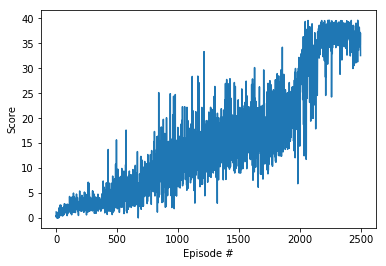

In [5]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from ddpg_agent import Agent
agent = Agent(state_size=state_size, action_size=action_size, random_seed=2)
def ddpg(n_episodes=2500, max_t=10000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores = []
    x=0
    last_reward = [0] 
    for i_episode in range(1, n_episodes+1):
        score = np.zeros(num_agents)
        env_info = env.reset(train_mode=True)[brain_name]  
        states = env_info.vector_observations
        agent.reset()
        actions = np.zeros((num_agents,action_size))
        for t in range(max_t):
            action = agent.act(states)
            env_info = env.step(action)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            score += rewards
            dones = env_info.local_done
            agent.step(states, action, rewards, next_states, dones)
            states = next_states
            if np.any(dones):
                break
        scores_deque.append(score)
        print(scores_deque)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [7]:
import torch
from ddpg_agent import Agent
agent = Agent(state_size, action_size, random_seed=2)
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))
scores = np.zeros(num_agents)
env_info = env.reset(train_mode=False)[brain_name]
state = env_info.vector_observations
while True:
    action = agent.act(state)
    env_info = env.step(action)[brain_name]
    next_state = env_info.vector_observations
    reward = env_info.rewards
    done = env_info.local_done
    scores += env_info.rewards
    state = next_state
    if np.any(done):
        break 

print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 35.569999204948545
